In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# How do the activity scores compare per each downsample to the total?

## Getting step 1 map csv from duck db. 

In [2]:
step1_map = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/GCN4/step1_AD_AD_BC_RPTR_BC_designed.csv")
step1_map = step1_map[["AD", "AD_BC", "RPTR_BC"]]
step1_map

AD        AD_BC  \
0       CCATTGTGTTCTCCTAAAGCTCCATCTGCTTTGATTACTCCAATGA...  AAAGTTATCAA   
1       TTTGATCCATCTAATGAAATTTCATTTGATGATCCAGTCTTGTTTC...  CAGTAACTATC   
2       TCTTCTTCTGTTCCATCTTCTGTTTCTAATATGGGTACTGTTTCTC...  GACCCCAACGT   
3       CCAACTTCTACTGCTACTACTAATTTGGCTTCTCCATTGTCTTTGT...  GGATCCAAGTT   
4       GCTGCTCATTACTTCTTGGCTTTGAGACAATCTCAAGAGTTCTCTG...  TCACTTGTTAT   
...                                                   ...          ...   
127403  ACTGCTTTGACTTCTCCATCTTTGTATGATGAATCTCCAGACTTTG...  CCTTCCCGCAG   
127404  GTTGCTAATATGGCTGATTTAAATTCTAATAATTCATTTGATTCTG...  TTCACTCCTTA   
127405  GCATTTACTAATTTGACTTCTCCATCTACTTATAATGAATCTCCAG...  CTCGGCAGAAG   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   
127407  GGTAAAGTTTATGAATTGATCTTGTCTTGGGATGAACAATTGTATC...  TCAGTATGAAT   

               RPTR_BC  
0       TTCGGTGCCATAAC  
1       ATACGACGCTTTAC  
2       CACCACGCTTAGCT  
3       ATGCGTATTATTTA  
4       CGAATGACTCGACC  
...                ...  
127403  TCGCAATTTCCTCT  
127404  CACGCAAGCCAAGG  
127405  TAACCCCAACACCG  
127406  GAGGACAATCATCG  
127407  CCCGAGATTTTATG  

[127408 rows x 3 columns]

## Full results for time point 30

In [4]:
# Getting RT results alone -- fixed at a 5% sample
RPTR_BC_umi_counts_t30 = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/GCN4/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_20/RPTR_1_30_S5_R1_001_20_chunks_part_20.fq_simple_umi_counts.tsv", sep="\t")
RPTR_BC_umi_counts_t30 = RPTR_BC_umi_counts_t30.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t30 = pd.read_csv("../../output/GCN4/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_30_1_chunk/AD_1_30_1_chunk.fq_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t30 = AD_BC_counts_t30.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t30 = pd.merge(step1_map, RPTR_BC_umi_counts_t30, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t30 = pd.merge(step1_map_with_RPTR_BC_t30, AD_BC_counts_t30, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_t30.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30

AD        AD_BC  \
7       GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...  CTCTGTTGCAG   
19      ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...  AAGATATGTCT   
37      TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...  TAATTCTTAAA   
42      AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...  GGGTAGAAGTA   
46      ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...  CGATTCGAGAA   
...                                                   ...          ...   
127373  GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...  TACAATTAACT   
127378  ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...  ACTAGTTTGCA   
127379  CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...  ACCCAGGACTT   
127388  GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...  TAAGCCCTCGC   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   

               RPTR_BC  RT_umi_count_full  AD_umi_count_full  activity_full  
7       TGGATACTAACCTG               87.0             3474.0       0.025043  
19      TGCCTATGGTACAA             1090.0             1035.0       1.053140  
37      AAAGCAACCGAAGA                6.0              278.0       0.021583  
42      TAGTAGATGGAATT                8.0               50.0       0.160000  
46      AACACAAACCATAG                8.0              280.0       0.028571  
...                ...                ...                ...            ...  
127373  TTCGATTAGTTTCA             1492.0             1522.0       0.980289  
127378  ACCCACGGCATTGT               25.0              914.0       0.027352  
127379  TGGCTTTATGCAAT               26.0              811.0       0.032059  
127388  TACACTGATACTGA               67.0                2.0      33.500000  
127406  GAGGACAATCATCG               77.0             2534.0       0.030387  

[14220 rows x 6 columns]

In [5]:
# step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30.to_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30.csv", index=False)

# Full results for time = 5

In [7]:
# Getting RT results alone
RPTR_BC_umi_counts_t5 = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/GCN4/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_20/RPTR_1_5_S2_R1_001_20_chunks_part_20.fq_simple_umi_counts.tsv", sep="\t")
RPTR_BC_umi_counts_t5 = RPTR_BC_umi_counts_t5.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t5 = pd.read_csv("../../output/GCN4/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_5_75_part_1/AD_1_5_75_part_1.fq_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t5 = AD_BC_counts_t5.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t5 = pd.merge(step1_map, RPTR_BC_umi_counts_t5, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t5 = pd.merge(step1_map_with_RPTR_BC_t5, AD_BC_counts_t5, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_t5.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5

AD        AD_BC  \
7       GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...  CTCTGTTGCAG   
19      ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...  AAGATATGTCT   
37      TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...  TAATTCTTAAA   
42      AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...  GGGTAGAAGTA   
46      ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...  CGATTCGAGAA   
...                                                   ...          ...   
127373  GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...  TACAATTAACT   
127378  ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...  ACTAGTTTGCA   
127379  CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...  ACCCAGGACTT   
127388  GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...  TAAGCCCTCGC   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   

               RPTR_BC  RT_umi_count_full  AD_umi_count_full  activity_full  
7       TGGATACTAACCTG               43.0             3051.0       0.014094  
19      TGCCTATGGTACAA              195.0              874.0       0.223112  
37      AAAGCAACCGAAGA               12.0              248.0       0.048387  
42      TAGTAGATGGAATT                7.0               36.0       0.194444  
46      AACACAAACCATAG                8.0              172.0       0.046512  
...                ...                ...                ...            ...  
127373  TTCGATTAGTTTCA              260.0             1468.0       0.177112  
127378  ACCCACGGCATTGT               13.0              783.0       0.016603  
127379  TGGCTTTATGCAAT               11.0              770.0       0.014286  
127388  TACACTGATACTGA               48.0                2.0      24.000000  
127406  GAGGACAATCATCG               39.0             1696.0       0.022995  

[13929 rows x 6 columns]

In [8]:
# step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5.to_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5.csv", index=False)

# For each downsample, save the activity scores

In [9]:
import os
import warnings
warnings.filterwarnings('ignore')
import tqdm

# Define the base directory
base_dir = "../../output/GCN4/downsampling"

# Iterate through all folders in the base directory
for folder in tqdm.tqdm(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path) and "AD" in folder:
        print(folder)
        # Process the AD_BC_umi_counts file
        umi_counts_path = next(
            (os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith("simple_umi_counts.tsv")),
            None
        )
        if umi_counts_path is None:
            continue
        AD_BC_umi_counts = pd.read_csv(umi_counts_path, sep="\t", encoding='latin-1')
        AD_BC_umi_counts = AD_BC_umi_counts.rename(columns={"count": "AD_umi_count"})

        # Merge with step1_map
        step1_map_with_AD_BC = pd.merge(step1_map, AD_BC_umi_counts, how="left")

        if "1_30" in folder:
            RT_BC_counts = RPTR_BC_umi_counts_t30
        else:
            RT_BC_counts = RPTR_BC_umi_counts_t5

        # Merge with RT_BC_counts
        step1_map_with_AD_BC_RT_BC = pd.merge(step1_map_with_AD_BC, RT_BC_counts, how="left")

        # Remove nulls
        step1_map_with_AD_BC_RT_BC_no_nulls = step1_map_with_AD_BC_RT_BC.dropna()

        step1_map_with_AD_BC_RT_BC_no_nulls = step1_map_with_AD_BC_RT_BC_no_nulls.rename(
            columns={
                "AD_umi_count": "AD_umi_count_downsampled",
                "RT_umi_count": "RT_umi_count_downsampled"
            }
        )

        # Calculate activity using downsampled AD and full RT
        step1_map_with_AD_BC_RT_BC_no_nulls["activity_downsampled"] = (
            step1_map_with_AD_BC_RT_BC_no_nulls["RT_umi_count_downsampled"].astype(int) /
            step1_map_with_AD_BC_RT_BC_no_nulls["AD_umi_count_downsampled"].astype(int)
        )

        if "1_30" in folder:
            step1_map_with_AD_BC_RT_BC_no_nulls = pd.merge(
                step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30,
                step1_map_with_AD_BC_RT_BC_no_nulls,
                on=["AD", "AD_BC", "RPTR_BC"],
                how="inner",
            )
        else:
            step1_map_with_AD_BC_RT_BC_no_nulls = pd.merge(
                step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5,
                step1_map_with_AD_BC_RT_BC_no_nulls,
                on=["AD", "AD_BC", "RPTR_BC"],
                how="inner",
            )

        # Save the processed file as a CSV
        output_path = os.path.join(folder_path, "processed_step1_map.csv")
        step1_map_with_AD_BC_RT_BC_no_nulls.to_csv(output_path, index=False)
        #print(f"Processed file saved to: {output_path}")

  0%|          | 0/215 [00:00<?, ?it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_6


  0%|          | 1/215 [00:01<06:08,  1.72s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_9


  1%|▏         | 3/215 [00:02<03:09,  1.12it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_8


  2%|▏         | 5/215 [00:04<02:34,  1.36it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_12


  3%|▎         | 7/215 [00:05<02:18,  1.50it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_8


  4%|▍         | 9/215 [00:07<02:37,  1.31it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_10


  6%|▌         | 12/215 [00:16<05:24,  1.60s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_5_chunks_part_3


  6%|▌         | 13/215 [00:19<06:23,  1.90s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_3_chunks_part_1


  7%|▋         | 16/215 [00:23<05:27,  1.65s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_9


  9%|▉         | 20/215 [00:25<03:40,  1.13s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_9


 10%|█         | 22/215 [00:27<03:27,  1.07s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_1_chunk


 11%|█         | 24/215 [00:36<06:20,  1.99s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_3


 12%|█▏        | 25/215 [00:38<06:17,  1.99s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_5


 13%|█▎        | 27/215 [00:40<05:08,  1.64s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_2


 13%|█▎        | 28/215 [00:42<05:20,  1.72s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_4


 14%|█▍        | 30/215 [00:43<04:04,  1.32s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_1


 15%|█▍        | 32/215 [00:58<10:06,  3.31s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_4


 15%|█▌        | 33/215 [01:00<09:27,  3.12s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_4_chunks_part_2


 16%|█▌        | 34/215 [01:03<09:33,  3.17s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_4_chunks_part_3


 16%|█▋        | 35/215 [01:13<13:45,  4.58s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_4_chunks_part_2


 17%|█▋        | 37/215 [01:16<10:02,  3.39s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_18


 18%|█▊        | 38/215 [01:17<08:34,  2.91s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_5_chunks_part_4


 19%|█▉        | 41/215 [01:20<05:35,  1.93s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_8


 21%|██▏       | 46/215 [01:21<03:03,  1.08s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_8


 22%|██▏       | 47/215 [01:23<03:21,  1.20s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_2


 23%|██▎       | 50/215 [01:25<02:42,  1.01it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_15


 24%|██▎       | 51/215 [01:26<02:45,  1.01s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_3


 24%|██▍       | 52/215 [01:53<14:42,  5.42s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_11


 26%|██▌       | 55/215 [01:54<08:46,  3.29s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_20


 26%|██▌       | 56/215 [01:56<07:54,  2.98s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_13


 27%|██▋       | 58/215 [01:57<05:44,  2.20s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_6


 27%|██▋       | 59/215 [01:58<05:15,  2.02s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_15


 28%|██▊       | 60/215 [01:59<04:44,  1.84s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_14


 28%|██▊       | 61/215 [02:00<04:18,  1.68s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_3


 29%|██▉       | 62/215 [02:01<03:57,  1.55s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_7


 31%|███       | 67/215 [02:03<01:58,  1.25it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_5


 33%|███▎      | 70/215 [02:05<01:35,  1.52it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_75_part_2


 33%|███▎      | 71/215 [02:10<03:10,  1.32s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_20


 34%|███▍      | 73/215 [02:11<02:40,  1.13s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_1


 34%|███▍      | 74/215 [02:13<02:56,  1.25s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_5


 35%|███▌      | 76/215 [02:31<08:47,  3.79s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_1


 36%|███▌      | 77/215 [02:32<07:46,  3.38s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_5


 37%|███▋      | 80/215 [03:04<14:46,  6.56s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_7


 40%|████      | 87/215 [03:06<05:56,  2.78s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_6


 41%|████      | 88/215 [03:09<05:55,  2.80s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_19


 41%|████▏     | 89/215 [03:10<05:25,  2.58s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_4


 42%|████▏     | 90/215 [03:11<05:04,  2.43s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_1


 43%|████▎     | 93/215 [03:14<03:30,  1.73s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_5_chunks_part_2


 44%|████▎     | 94/215 [03:16<03:50,  1.91s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_4


 44%|████▍     | 95/215 [03:18<03:50,  1.92s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_6


 45%|████▍     | 96/215 [03:20<03:45,  1.89s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_7


 46%|████▌     | 99/215 [03:22<02:26,  1.26s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_2


 47%|████▋     | 100/215 [03:23<02:24,  1.25s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_2


 48%|████▊     | 103/215 [03:25<01:46,  1.05it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_4_chunks_part_4


 48%|████▊     | 104/215 [03:28<02:25,  1.31s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_1


 49%|████▉     | 106/215 [03:29<01:59,  1.09s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_5_chunks_part_2


 50%|████▉     | 107/215 [03:54<10:12,  5.67s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_4


 52%|█████▏    | 111/215 [03:56<05:07,  2.95s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_1


 53%|█████▎    | 113/215 [03:58<04:07,  2.43s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_3_chunks_part_2


 53%|█████▎    | 115/215 [04:02<03:47,  2.28s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_75_part_1


 56%|█████▋    | 121/215 [04:07<02:20,  1.49s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_8


 57%|█████▋    | 122/215 [04:08<02:17,  1.48s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_5_chunks_part_4


 57%|█████▋    | 123/215 [04:11<02:34,  1.68s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_3_chunks_part_1


 58%|█████▊    | 125/215 [04:16<02:44,  1.83s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_1_chunk


 60%|█████▉    | 128/215 [04:40<06:12,  4.28s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_3


 60%|██████    | 129/215 [04:42<05:38,  3.94s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_6


 60%|██████    | 130/215 [04:44<05:05,  3.59s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_13


 61%|██████    | 131/215 [04:46<04:21,  3.11s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_4


 61%|██████▏   | 132/215 [04:47<03:42,  2.68s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_2_chunks_part_2


 62%|██████▏   | 133/215 [04:52<04:33,  3.34s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_5_chunks_part_1


 62%|██████▏   | 134/215 [04:55<04:19,  3.21s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_5_chunks_part_5


 63%|██████▎   | 135/215 [04:58<04:01,  3.02s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_17


 65%|██████▍   | 139/215 [04:59<01:46,  1.40s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_7


 66%|██████▌   | 142/215 [05:01<01:19,  1.09s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_2_chunks_part_1


 67%|██████▋   | 145/215 [05:06<01:34,  1.35s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_5_chunks_part_3


 68%|██████▊   | 146/215 [05:09<01:48,  1.57s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_7


 68%|██████▊   | 147/215 [05:12<01:58,  1.74s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_9


 69%|██████▉   | 148/215 [05:13<01:48,  1.61s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_3_chunks_part_2


 70%|██████▉   | 150/215 [05:16<01:49,  1.68s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_19


 70%|███████   | 151/215 [05:18<01:42,  1.60s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_75_part_2


 72%|███████▏  | 154/215 [05:22<01:35,  1.56s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_4_chunks_part_3


 74%|███████▍  | 160/215 [05:32<01:28,  1.61s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_17


 75%|███████▍  | 161/215 [05:33<01:24,  1.56s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_3


 75%|███████▌  | 162/215 [05:35<01:23,  1.58s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_3


 76%|███████▌  | 163/215 [05:36<01:21,  1.57s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_2_chunks_part_2


 76%|███████▋  | 164/215 [05:42<01:55,  2.26s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_16


 78%|███████▊  | 167/215 [05:43<01:07,  1.41s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_75_part_1


 79%|███████▊  | 169/215 [05:48<01:20,  1.74s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_14


 80%|████████  | 172/215 [05:49<00:53,  1.25s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_3_chunks_part_3


 81%|████████  | 174/215 [05:53<00:59,  1.45s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_8_chunks_part_2


 82%|████████▏ | 176/215 [05:55<00:51,  1.31s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_2_chunks_part_1


 82%|████████▏ | 177/215 [06:00<01:14,  1.97s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_7


 83%|████████▎ | 179/215 [06:02<00:55,  1.53s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_4_chunks_part_1


 84%|████████▎ | 180/215 [06:05<01:03,  1.82s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_12


 87%|████████▋ | 186/215 [06:06<00:23,  1.21it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_5


 87%|████████▋ | 188/215 [06:08<00:22,  1.19it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_10_chunks_part_10


 88%|████████▊ | 189/215 [06:10<00:25,  1.02it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_8_chunks_part_8


 88%|████████▊ | 190/215 [06:11<00:28,  1.13s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_18


 90%|█████████ | 194/215 [06:13<00:15,  1.40it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_2


 92%|█████████▏| 197/215 [06:14<00:10,  1.65it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_10


 93%|█████████▎| 199/215 [06:15<00:09,  1.67it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_16


 93%|█████████▎| 200/215 [06:16<00:10,  1.45it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_10


 94%|█████████▍| 202/215 [06:18<00:09,  1.36it/s]

trebl_experiment_yeast_pool_C_umi_AD_1_5_3_chunks_part_3


 94%|█████████▍| 203/215 [06:22<00:16,  1.38s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_4_chunks_part_1


 96%|█████████▋| 207/215 [06:25<00:08,  1.08s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_11


 97%|█████████▋| 208/215 [06:27<00:07,  1.10s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_5_chunks_part_5


 97%|█████████▋| 209/215 [06:29<00:08,  1.38s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_20_chunks_part_6


 98%|█████████▊| 210/215 [06:30<00:06,  1.36s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_5_chunks_part_1


 99%|█████████▊| 212/215 [06:33<00:03,  1.33s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_30_4_chunks_part_4


 99%|█████████▉| 213/215 [06:36<00:03,  1.75s/it]

trebl_experiment_yeast_pool_C_umi_AD_1_5_20_chunks_part_5


100%|██████████| 215/215 [06:38<00:00,  1.85s/it]


# Calculating correlations of each downsample with full

In [11]:
import pandas as pd
import os
from scipy.stats import pearsonr, spearmanr

# Initialize an empty list to store correlation results
correlation_results = []

# Loop through the base directory
for folder in tqdm.tqdm(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path) and "AD" in folder:
        processed_file_path = os.path.join(folder_path, "processed_step1_map.csv")
        if os.path.exists(processed_file_path):
            # Read the processed_step1_map.csv file
            df = pd.read_csv(processed_file_path)
            
            # Check if the required columns exist
            if "activity_full" in df.columns and "activity_downsampled" in df.columns:
                # Calculate Pearson and Spearman correlations
                pearson_corr, _ = pearsonr(df["activity_full"], df["activity_downsampled"])
                spearman_corr, _ = spearmanr(df["activity_full"], df["activity_downsampled"])
                
                # Append the results to the list
                correlation_results.append({
                    "folder_path": folder_path,
                    "pearson_corr": pearson_corr,
                    "spearman_corr": spearman_corr,
                    "num_rows": len(df)  # Track the number of rows
                })

                # Save scatterplot
                plt.figure(figsize=(8, 6), dpi=300)
                sns.set_context('talk')
                plt.scatter(df["activity_full"], df["activity_downsampled"], alpha=0.5)
                plt.title("Activity Full vs Activity Downsampled")
                plt.xlabel("Activity Full")
                plt.ylabel("Activity Downsampled")
                plt.grid(False)
                sns.despine()

                # Add correlations as text on the plot
                plt.text(0.05, 0.95, f"Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}",
                         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

                scatterplot_path = os.path.join(folder_path, "activity_scatterplot.png")
                plt.savefig(scatterplot_path, bbox_inches='tight')
                plt.close()

# Convert the results into a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation DataFrame
correlation_df

100%|██████████| 215/215 [06:49<00:00,  1.91s/it]


folder_path  pearson_corr  \
0    ../../output/GCN4/downsampling/trebl_experimen...      0.998678   
1    ../../output/GCN4/downsampling/trebl_experimen...      0.997604   
2    ../../output/GCN4/downsampling/trebl_experimen...      0.998062   
3    ../../output/GCN4/downsampling/trebl_experimen...      0.998409   
4    ../../output/GCN4/downsampling/trebl_experimen...      0.998433   
..                                                 ...           ...   
105  ../../output/GCN4/downsampling/trebl_experimen...      0.999386   
106  ../../output/GCN4/downsampling/trebl_experimen...      0.997270   
107  ../../output/GCN4/downsampling/trebl_experimen...      0.999298   
108  ../../output/GCN4/downsampling/trebl_experimen...      0.999560   
109  ../../output/GCN4/downsampling/trebl_experimen...      0.997322   

     spearman_corr  num_rows  
0         0.997814     13921  
1         0.996707     14178  
2         0.995191     13903  
3         0.995215     13906  
4         0.997799     13919  
..             ...       ...  
105       0.999451     14207  
106       0.996823     14180  
107       0.999099     13925  
108       0.999591     14214  
109       0.995321     13906  

[110 rows x 4 columns]

In [20]:
correlation_df['num_splits'] = correlation_df['folder_path'].str.extract(r'_(\d+)_chunks')#.astype(int)

correlation_df.loc[correlation_df['folder_path'].str.contains('_75'), 'num_splits'] = 4 / 3
correlation_df.loc[correlation_df['folder_path'].str.contains('_1_chunk'), 'num_splits'] = 1

correlation_df
#[correlation_df["num_splits"].isna()]["folder_path"]

folder_path  pearson_corr  \
0    ../../output/GCN4/downsampling/trebl_experimen...      0.998678   
1    ../../output/GCN4/downsampling/trebl_experimen...      0.997604   
2    ../../output/GCN4/downsampling/trebl_experimen...      0.998062   
3    ../../output/GCN4/downsampling/trebl_experimen...      0.998409   
4    ../../output/GCN4/downsampling/trebl_experimen...      0.998433   
..                                                 ...           ...   
105  ../../output/GCN4/downsampling/trebl_experimen...      0.999386   
106  ../../output/GCN4/downsampling/trebl_experimen...      0.997270   
107  ../../output/GCN4/downsampling/trebl_experimen...      0.999298   
108  ../../output/GCN4/downsampling/trebl_experimen...      0.999560   
109  ../../output/GCN4/downsampling/trebl_experimen...      0.997322   

     spearman_corr  num_rows num_splits  percent_reads  
0         0.997814     13921         10           10.0  
1         0.996707     14178         20            5.0  
2         0.995191     13903         20            5.0  
3         0.995215     13906         20            5.0  
4         0.997799     13919         10           10.0  
..             ...       ...        ...            ...  
105       0.999451     14207          5           20.0  
106       0.996823     14180         20            5.0  
107       0.999099     13925          5           20.0  
108       0.999591     14214          4           25.0  
109       0.995321     13906         20            5.0  

[110 rows x 6 columns]

In [23]:
correlation_df["folder_path"].iloc[0]

'../../output/GCN4/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_5_10_chunks_part_6'

In [25]:
correlation_df["percent_reads"] = 100 / correlation_df["num_splits"].astype(float)
correlation_df["time"] = correlation_df["folder_path"].str.extract("AD_\d+_(\d+)_").astype(int)
correlation_df

folder_path  pearson_corr  \
0    ../../output/GCN4/downsampling/trebl_experimen...      0.998678   
1    ../../output/GCN4/downsampling/trebl_experimen...      0.997604   
2    ../../output/GCN4/downsampling/trebl_experimen...      0.998062   
3    ../../output/GCN4/downsampling/trebl_experimen...      0.998409   
4    ../../output/GCN4/downsampling/trebl_experimen...      0.998433   
..                                                 ...           ...   
105  ../../output/GCN4/downsampling/trebl_experimen...      0.999386   
106  ../../output/GCN4/downsampling/trebl_experimen...      0.997270   
107  ../../output/GCN4/downsampling/trebl_experimen...      0.999298   
108  ../../output/GCN4/downsampling/trebl_experimen...      0.999560   
109  ../../output/GCN4/downsampling/trebl_experimen...      0.997322   

     spearman_corr  num_rows num_splits  percent_reads  time  
0         0.997814     13921         10           10.0     5  
1         0.996707     14178         20            5.0    30  
2         0.995191     13903         20            5.0     5  
3         0.995215     13906         20            5.0     5  
4         0.997799     13919         10           10.0     5  
..             ...       ...        ...            ...   ...  
105       0.999451     14207          5           20.0    30  
106       0.996823     14180         20            5.0    30  
107       0.999099     13925          5           20.0     5  
108       0.999591     14214          4           25.0    30  
109       0.995321     13906         20            5.0     5  

[110 rows x 7 columns]

In [26]:
correlation_df.sort_values(by = 'pearson_corr')

folder_path  pearson_corr  \
33  ../../output/GCN4/downsampling/trebl_experimen...      0.996308   
71  ../../output/GCN4/downsampling/trebl_experimen...      0.996467   
20  ../../output/GCN4/downsampling/trebl_experimen...      0.996528   
75  ../../output/GCN4/downsampling/trebl_experimen...      0.996700   
67  ../../output/GCN4/downsampling/trebl_experimen...      0.996910   
..                                                ...           ...   
36  ../../output/GCN4/downsampling/trebl_experimen...      0.999933   
90  ../../output/GCN4/downsampling/trebl_experimen...      0.999943   
68  ../../output/GCN4/downsampling/trebl_experimen...      0.999952   
59  ../../output/GCN4/downsampling/trebl_experimen...      1.000000   
63  ../../output/GCN4/downsampling/trebl_experimen...      1.000000   

    spearman_corr  num_rows num_splits  percent_reads  time  
33       0.996758     14185         20            5.0    30  
71       0.996665     14186         20            5.0    30  
20       0.996658     14176         20            5.0    30  
75       0.996677     14180         20            5.0    30  
67       0.996728     14187         20            5.0    30  
..            ...       ...        ...            ...   ...  
36       0.999840     14218   1.333333           75.0    30  
90       0.999886     13929          2           50.0     5  
68       0.999880     14218          2           50.0    30  
59       1.000000     13929   1.333333           75.0     5  
63       1.000000     14220          1          100.0    30  

[110 rows x 7 columns]

In [27]:
correlation_df.to_csv("../../output/GCN4_AD_downsampling_correlation_results.csv", index=False)

In [28]:
correlation_df

folder_path  pearson_corr  \
0    ../../output/GCN4/downsampling/trebl_experimen...      0.998678   
1    ../../output/GCN4/downsampling/trebl_experimen...      0.997604   
2    ../../output/GCN4/downsampling/trebl_experimen...      0.998062   
3    ../../output/GCN4/downsampling/trebl_experimen...      0.998409   
4    ../../output/GCN4/downsampling/trebl_experimen...      0.998433   
..                                                 ...           ...   
105  ../../output/GCN4/downsampling/trebl_experimen...      0.999386   
106  ../../output/GCN4/downsampling/trebl_experimen...      0.997270   
107  ../../output/GCN4/downsampling/trebl_experimen...      0.999298   
108  ../../output/GCN4/downsampling/trebl_experimen...      0.999560   
109  ../../output/GCN4/downsampling/trebl_experimen...      0.997322   

     spearman_corr  num_rows num_splits  percent_reads  time  
0         0.997814     13921         10           10.0     5  
1         0.996707     14178         20            5.0    30  
2         0.995191     13903         20            5.0     5  
3         0.995215     13906         20            5.0     5  
4         0.997799     13919         10           10.0     5  
..             ...       ...        ...            ...   ...  
105       0.999451     14207          5           20.0    30  
106       0.996823     14180         20            5.0    30  
107       0.999099     13925          5           20.0     5  
108       0.999591     14214          4           25.0    30  
109       0.995321     13906         20            5.0     5  

[110 rows x 7 columns]

In [29]:
# Filter data for time = 5 and time = 30
correlation_df_5 = correlation_df[correlation_df["time"] == 5]
correlation_df_30 = correlation_df[correlation_df["time"] == 30]


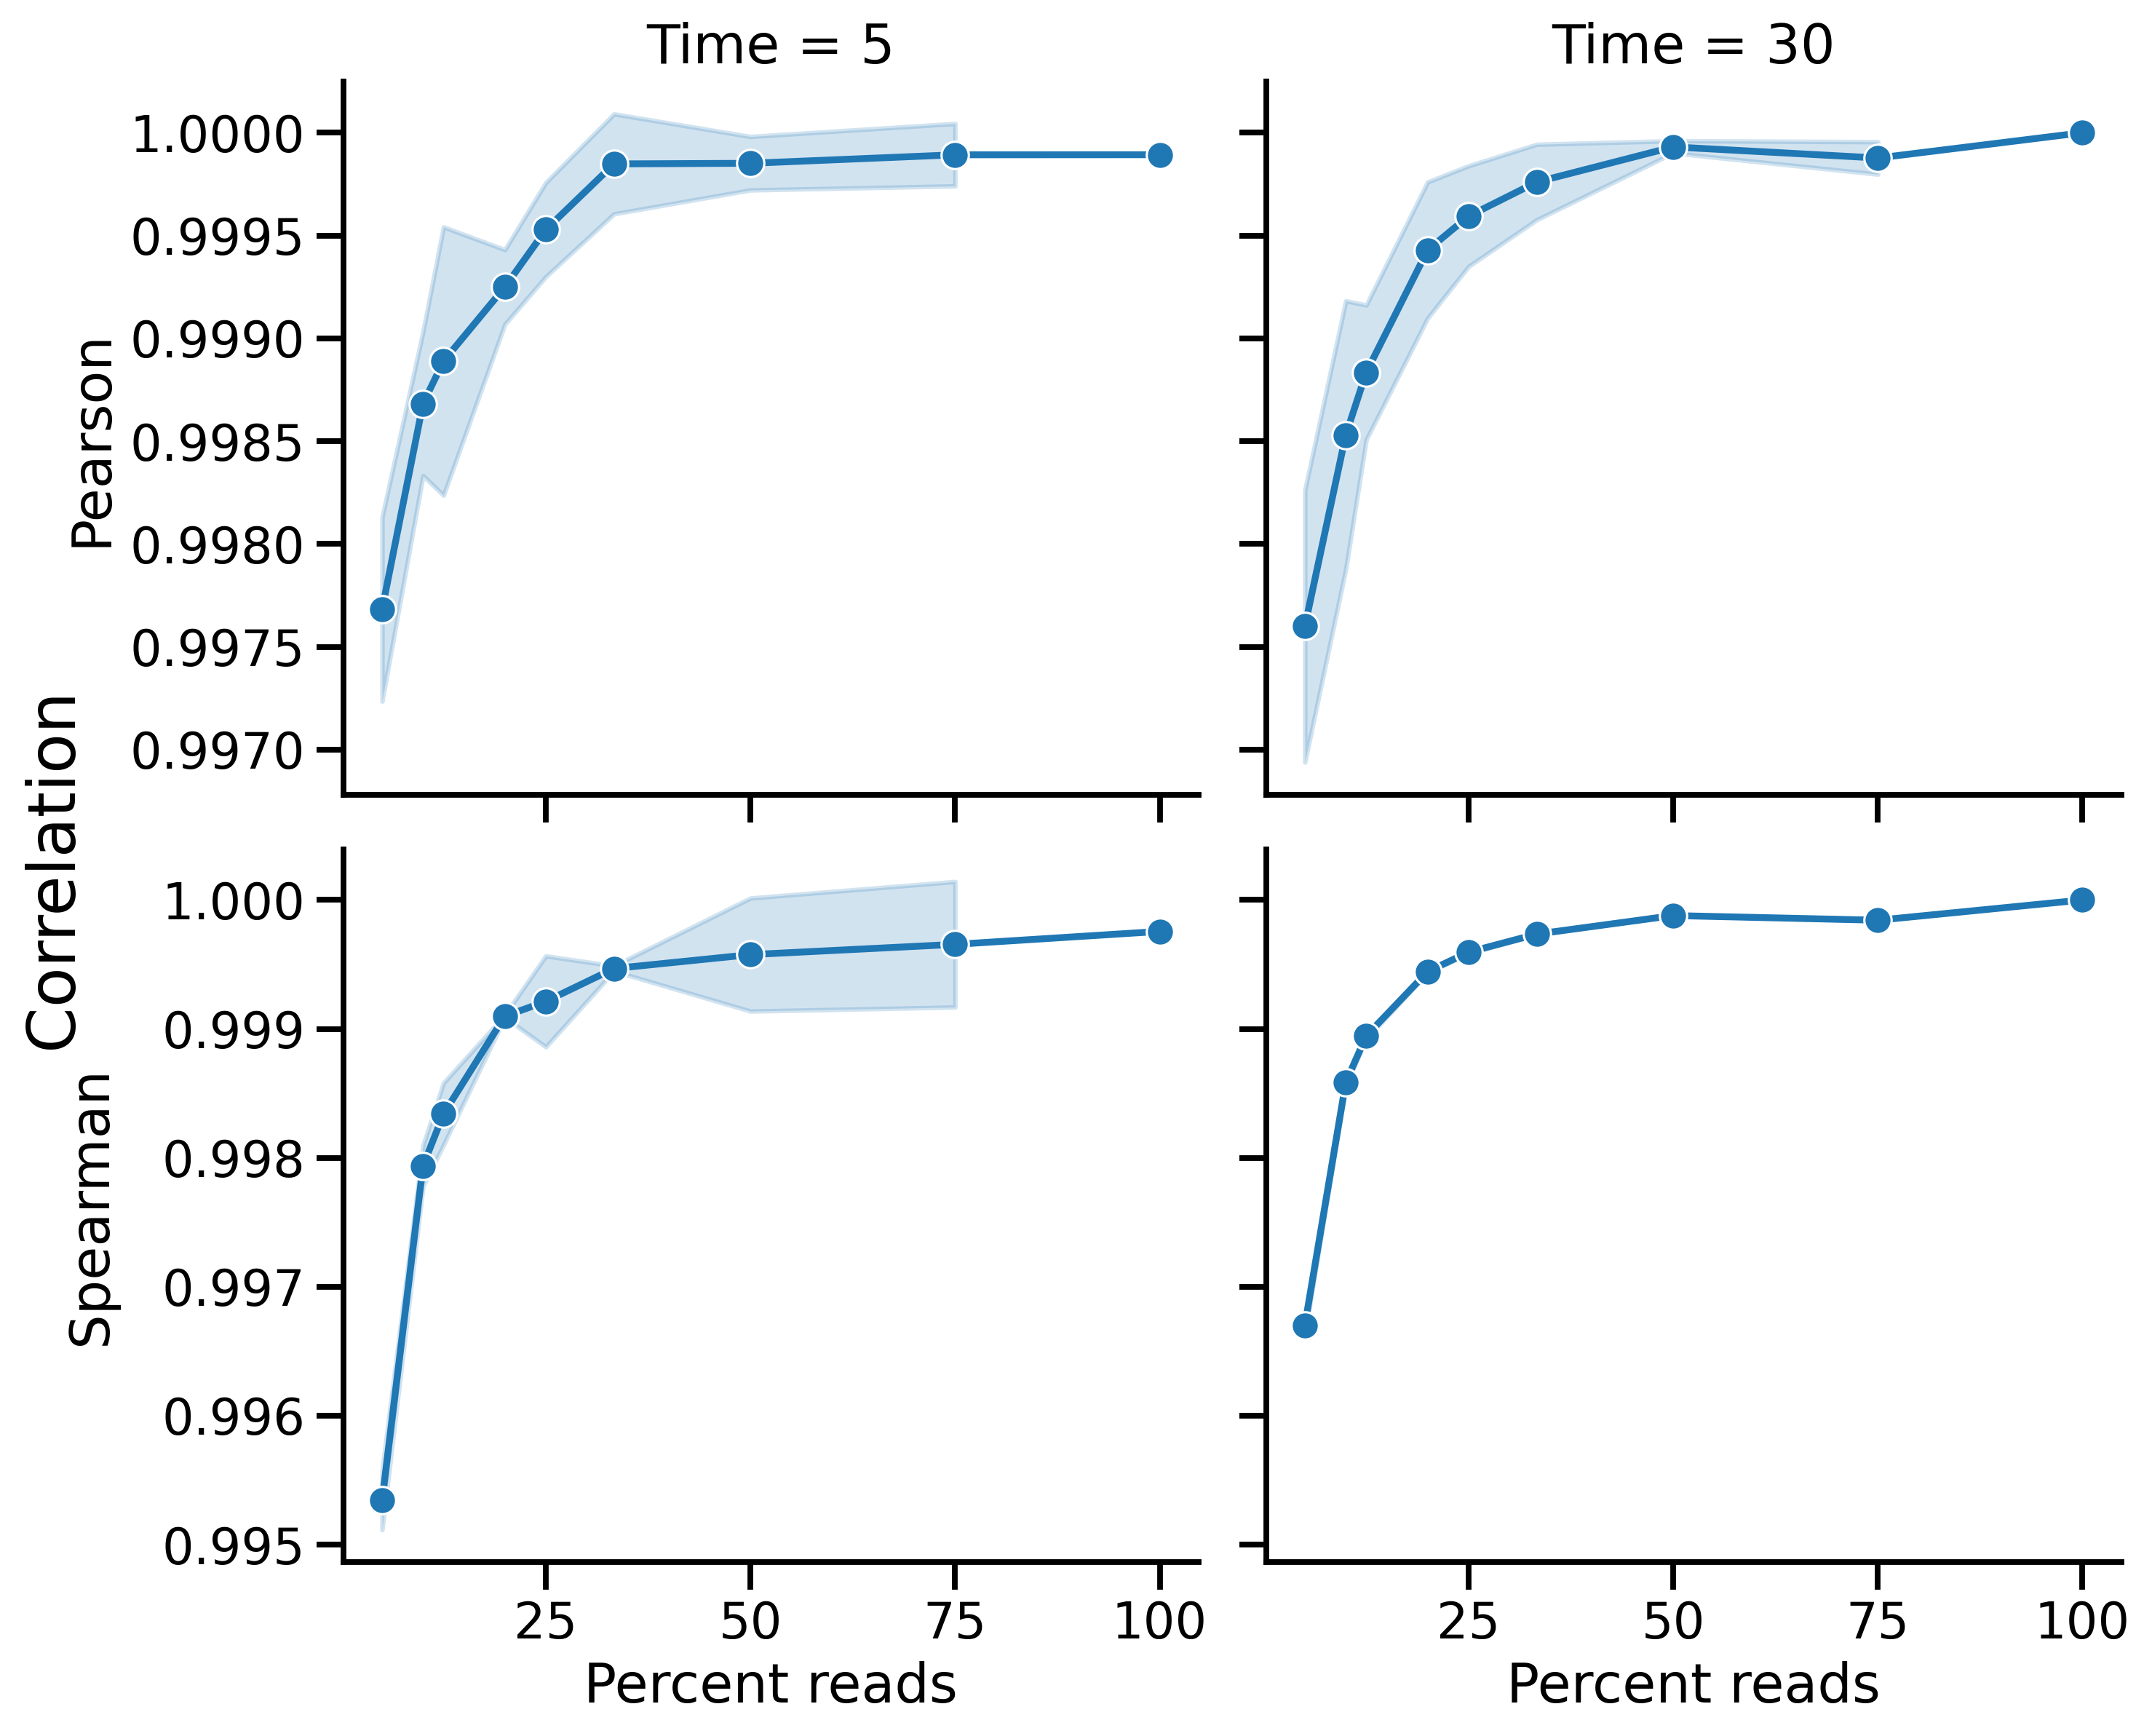

In [30]:
fig, axes = plt.subplots(
    2, 2, figsize=(10,8), dpi=300, sharex=True, sharey='row'
)
sns.set_context("talk")

# ---------- Pearson (row 0) ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Time = 5")
axes[0, 0].set_ylabel("Pearson")
axes[0, 0].set_xlabel("")
sns.despine(ax=axes[0, 0])

sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Time = 30")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")
sns.despine(ax=axes[0, 1])

# ---------- Spearman (row 1) ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 0]
)
axes[1, 0].set_ylabel("Spearman")
axes[1, 0].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 0])

sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 1]
)
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 1])
fig.align_ylabels(axes)
fig.supylabel("Correlation")
plt.tight_layout(pad = 0.5)
plt.show()

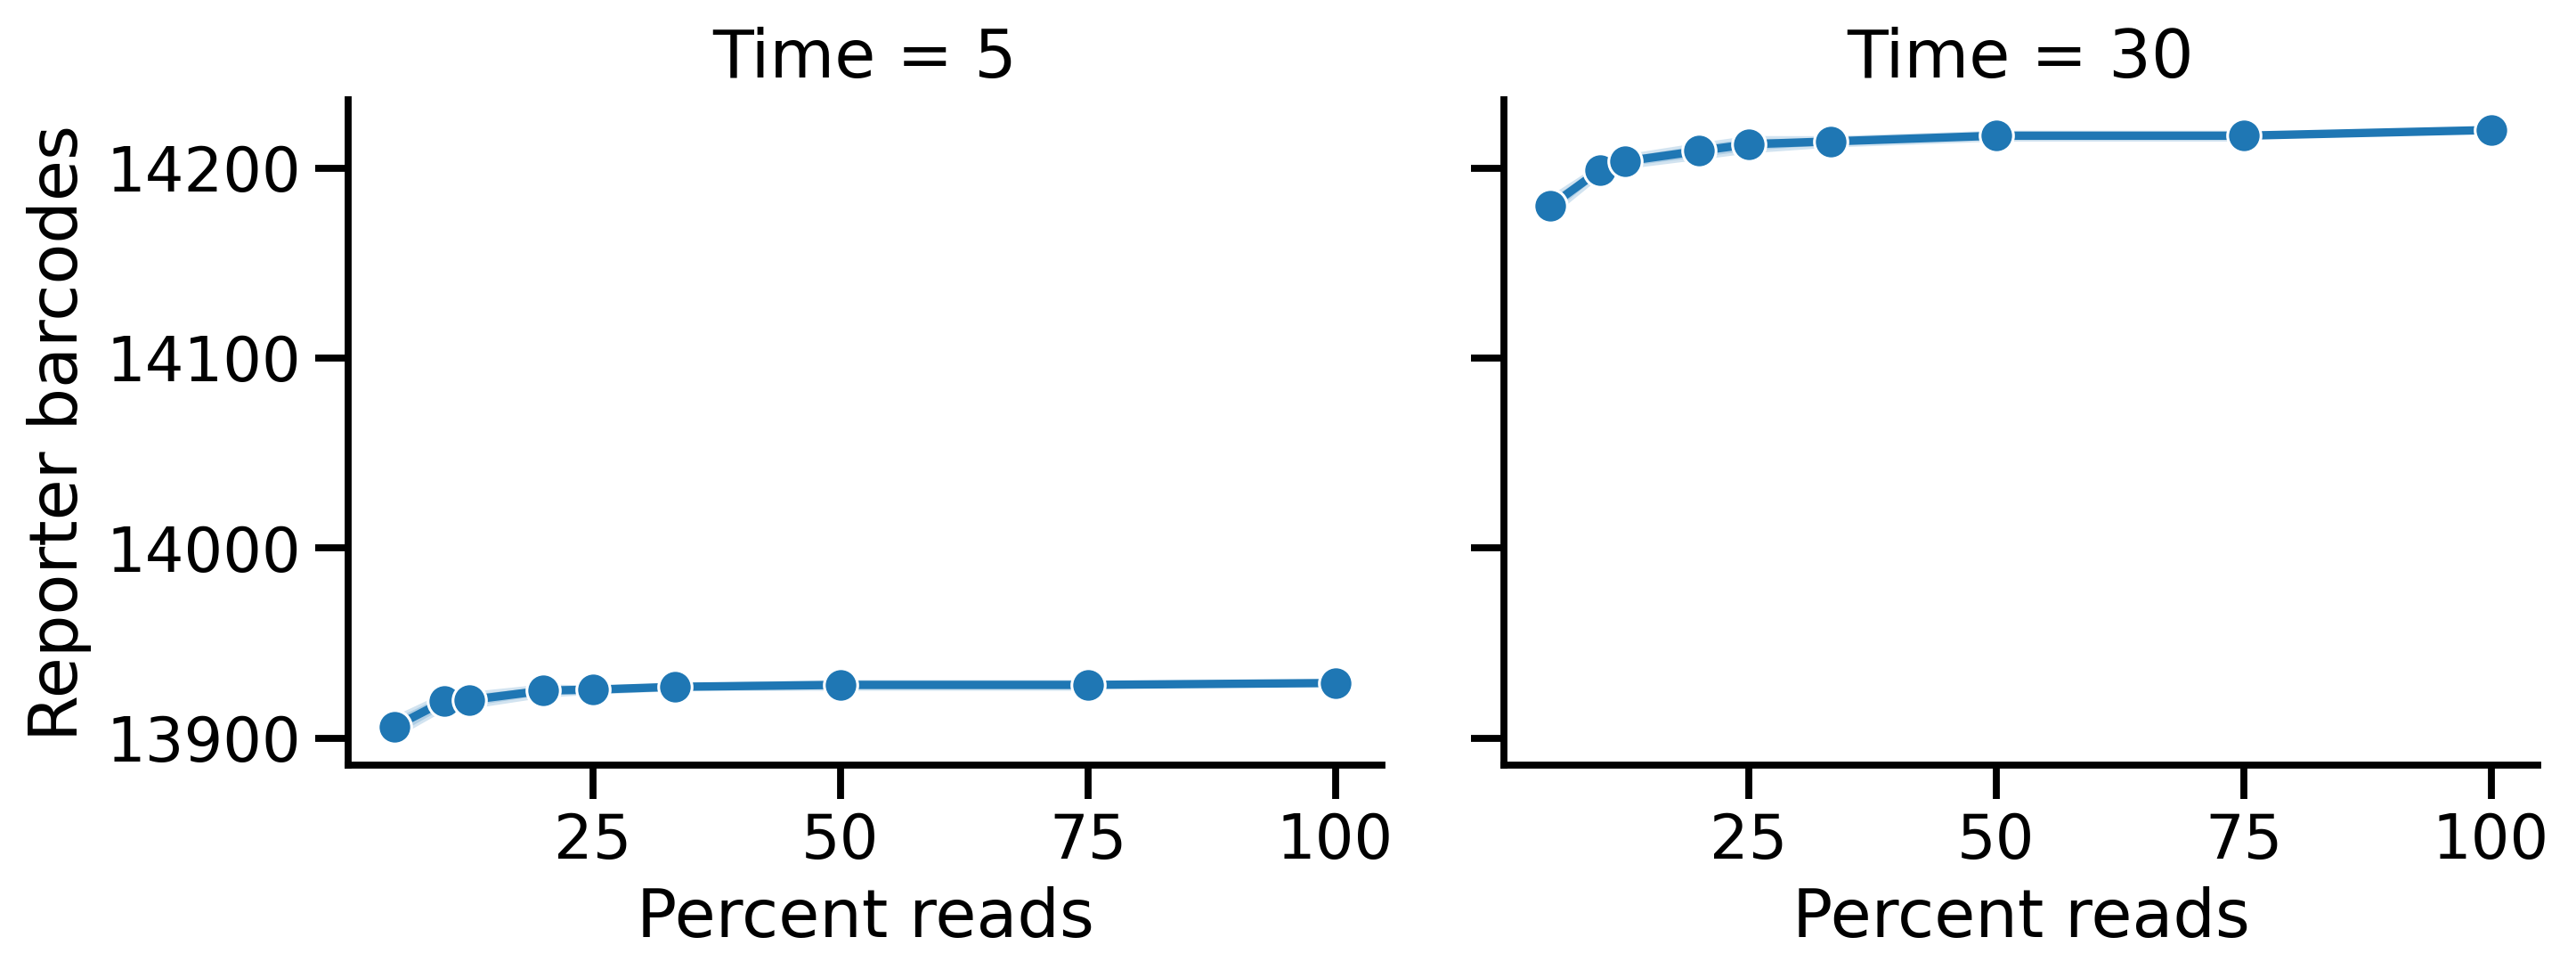

In [31]:

# Create subplots
fig, axes = plt.subplots(
    1, 2,
    figsize=(10,4),
    dpi=300,
    sharey=True
)
sns.set_context("talk")

# ---------- Time = 5 ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="num_rows",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Time = 5")
axes[0].set_ylabel("Reporter barcodes")
axes[0].set_xlabel("Percent reads")
sns.despine(ax=axes[0])

# ---------- Time = 30 ----------
sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="num_rows",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Time = 30")
axes[1].set_ylabel("")
axes[1].set_xlabel("Percent reads")
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

# Reads per UMI for each downsample?

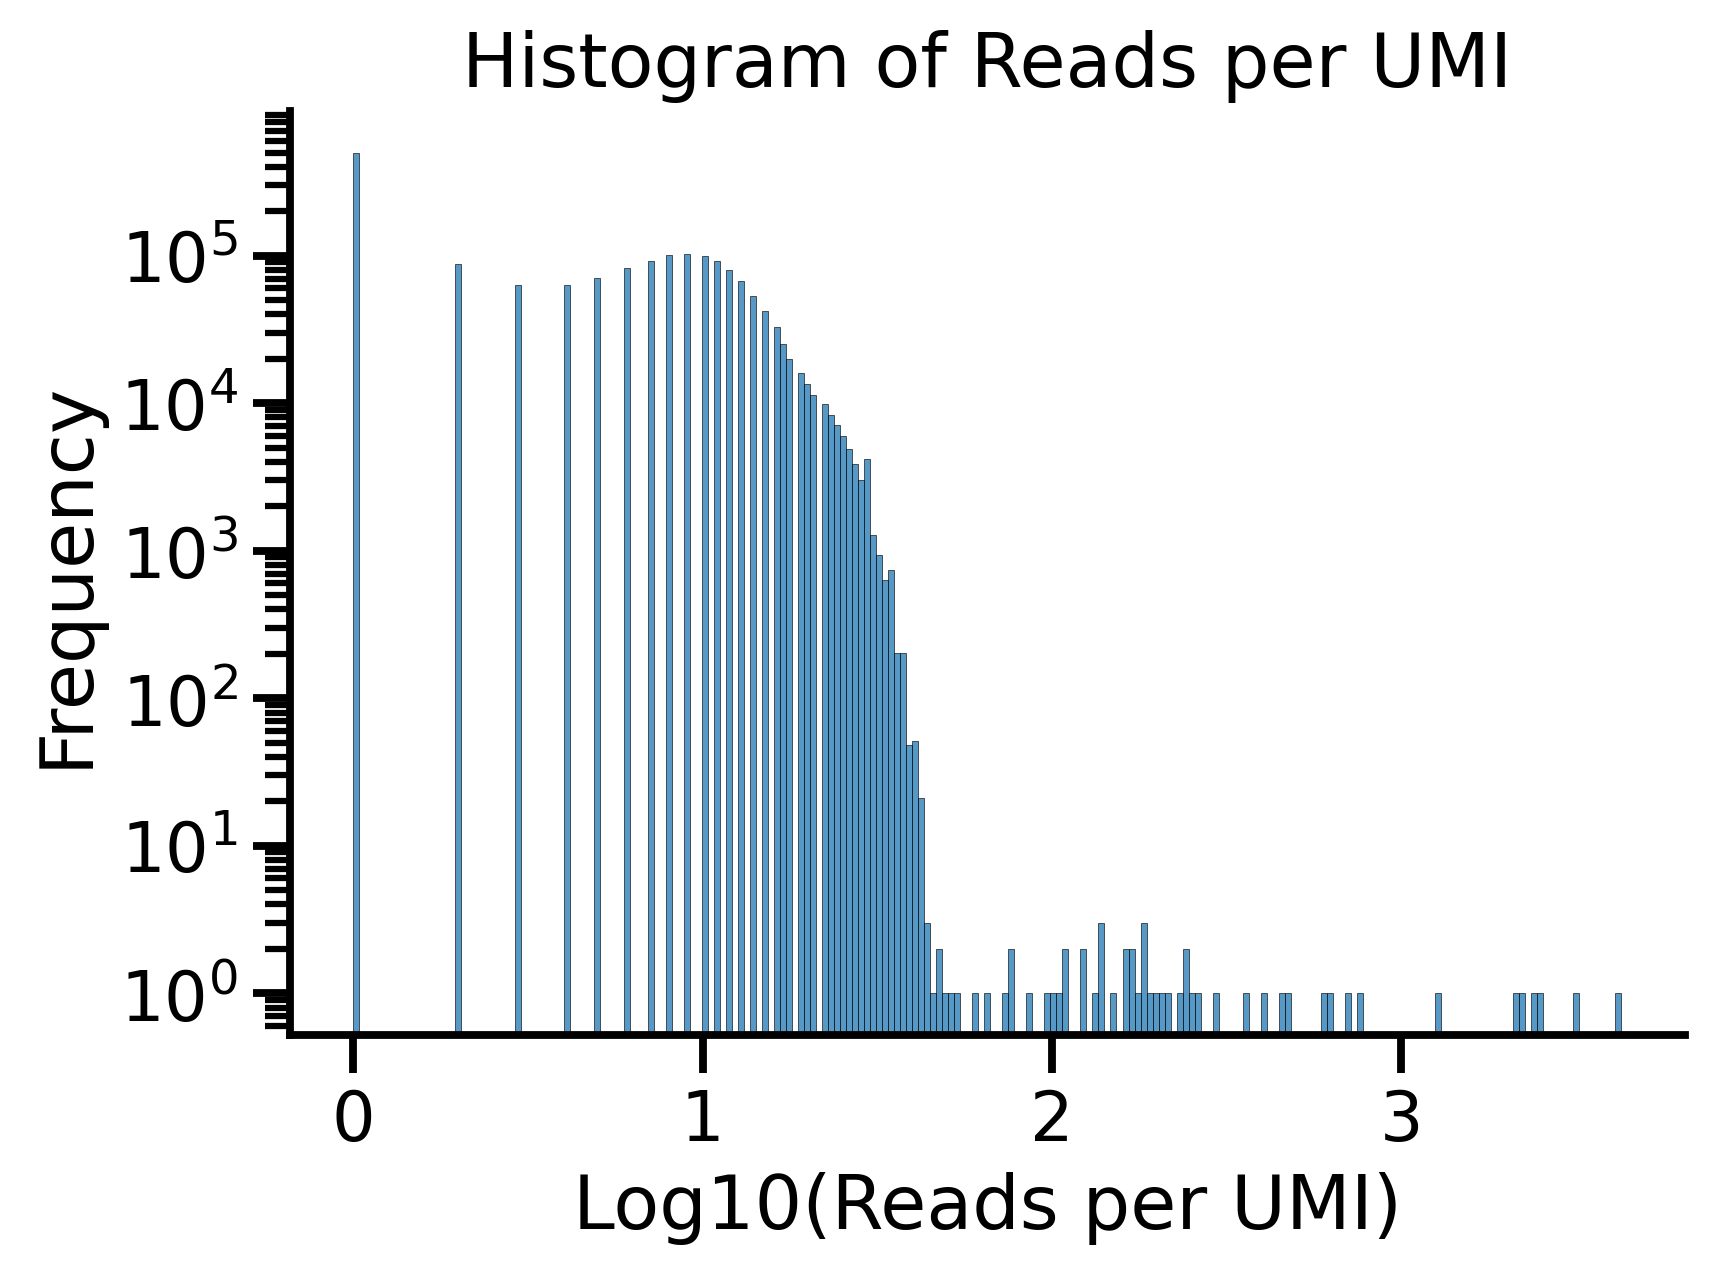

In [16]:
# Read the reads_per_umi file
reads_per_umi_df = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_1/RPTR_1_5_S2_R1_001_20_chunks_part_1.fq_reads_per_umi.tsv", sep="\t")

import numpy as np

# Plot the histogram
plt.figure(figsize=(6, 4), dpi=300)
sns.set_context('talk')
ax = sns.histplot(np.log10(reads_per_umi_df['reads']))
ax.set_yscale('log')
plt.title("Histogram of Reads per UMI")
plt.xlabel("Log10(Reads per UMI)")
plt.ylabel("Frequency")
sns.despine()

# Save the histogram in the folder
plt.show()

  0%|          | 0/113 [00:00<?, ?it/s]

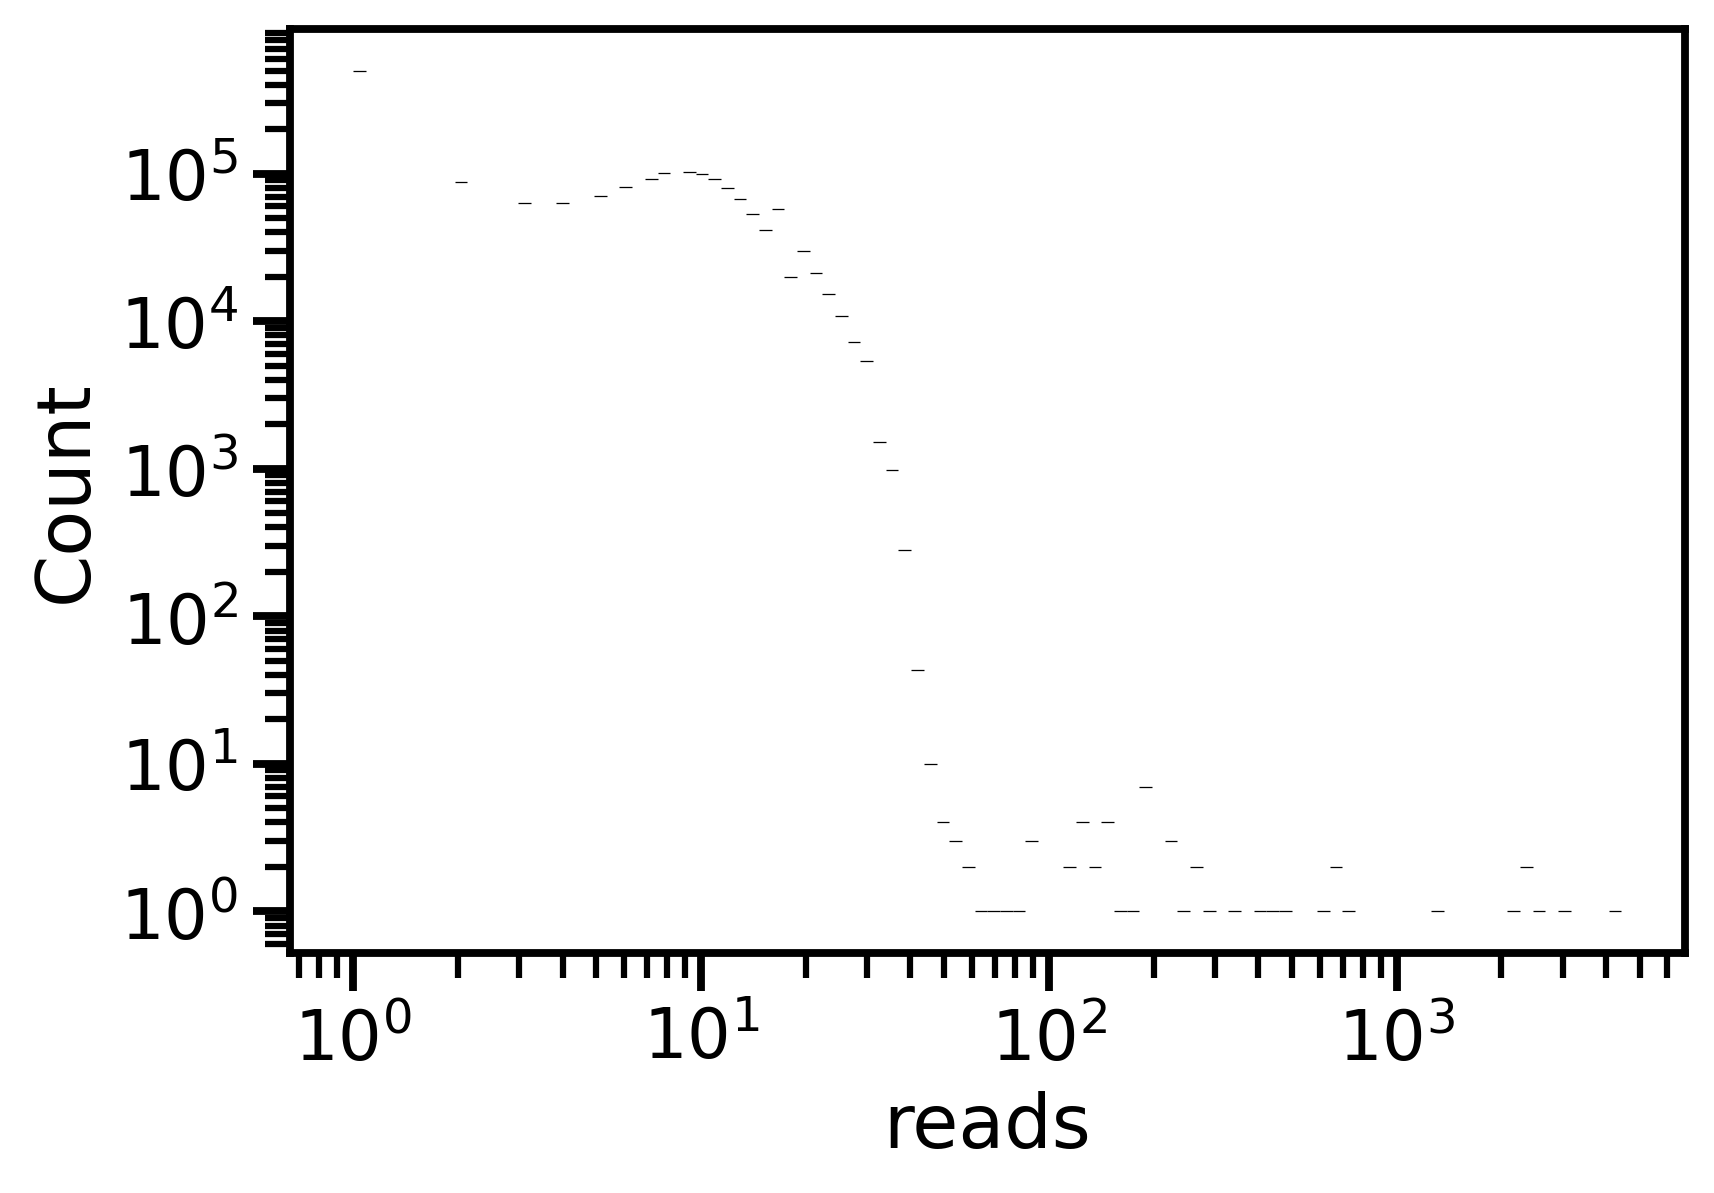

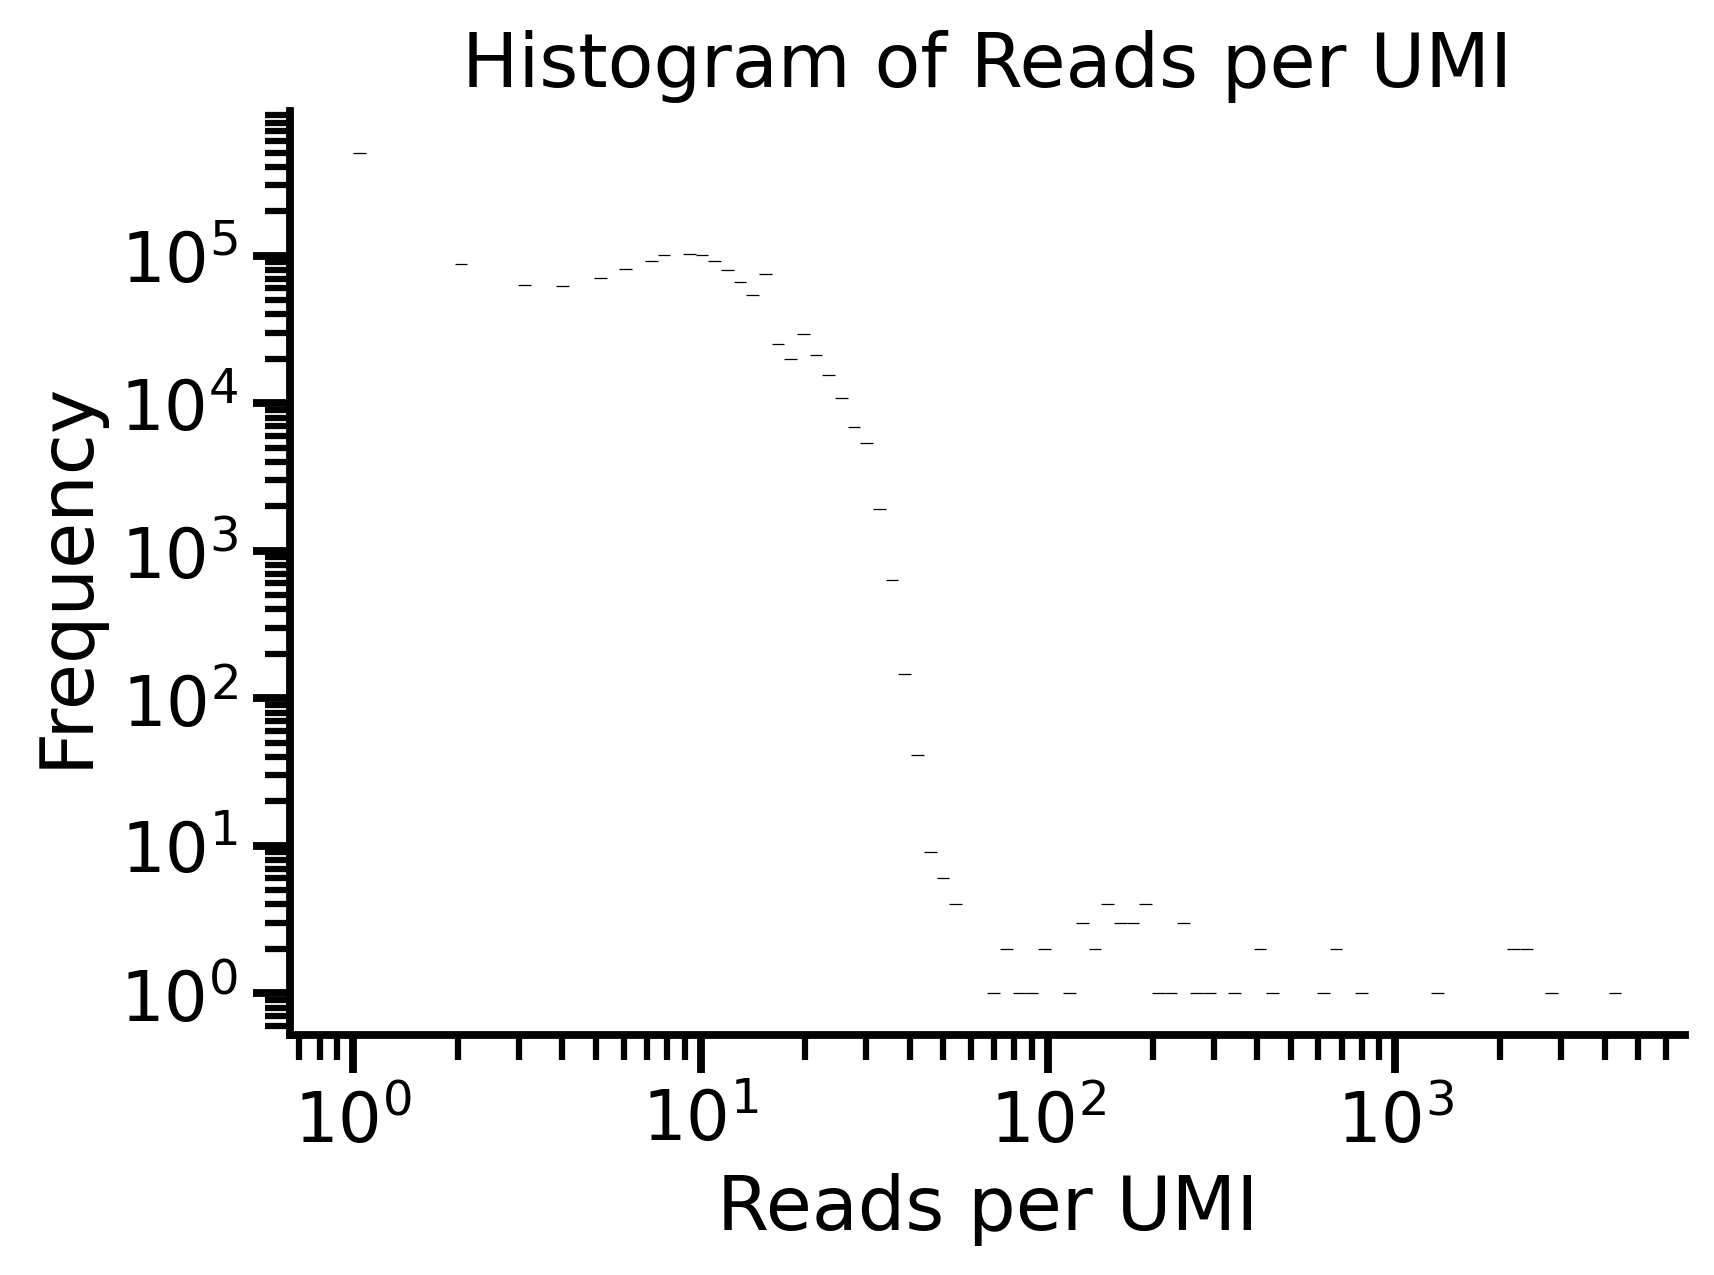

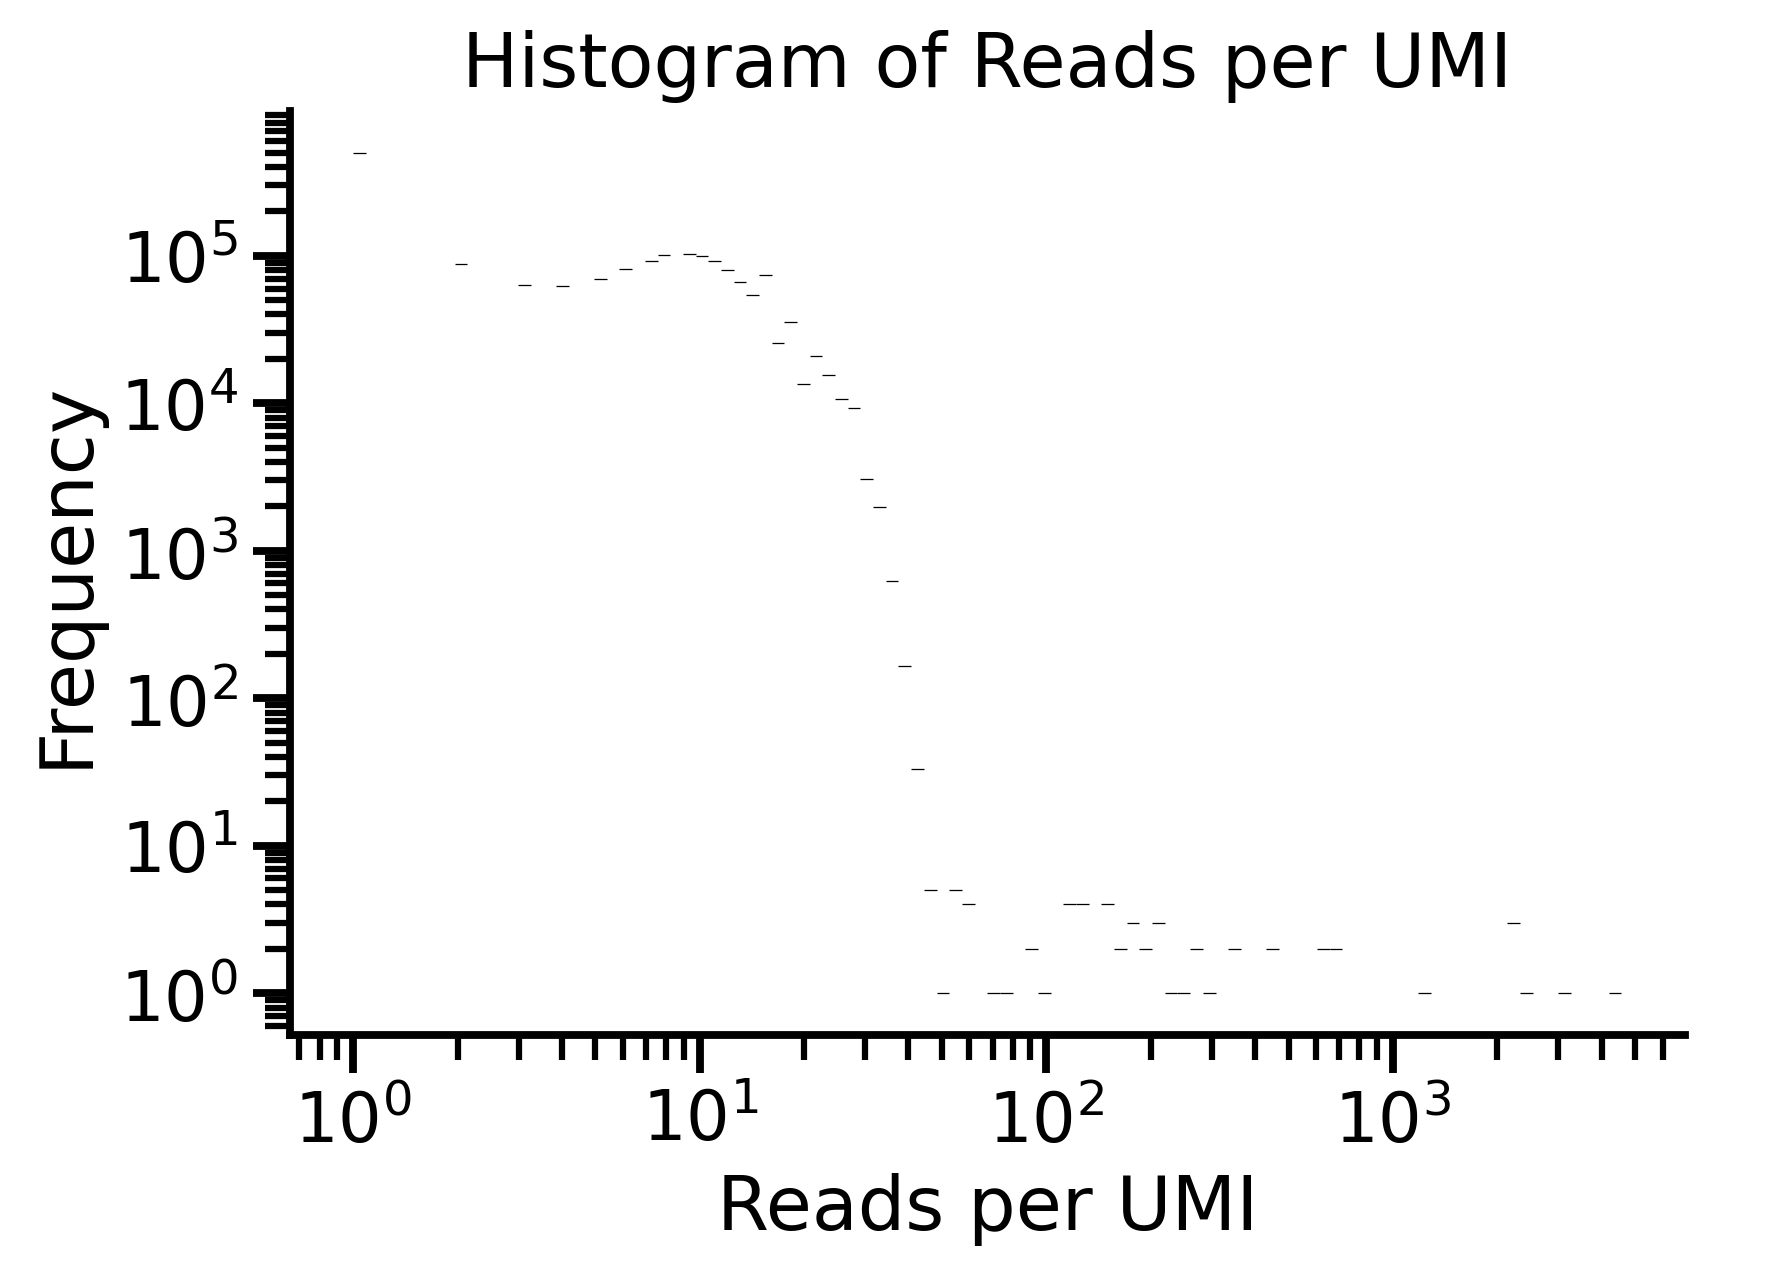

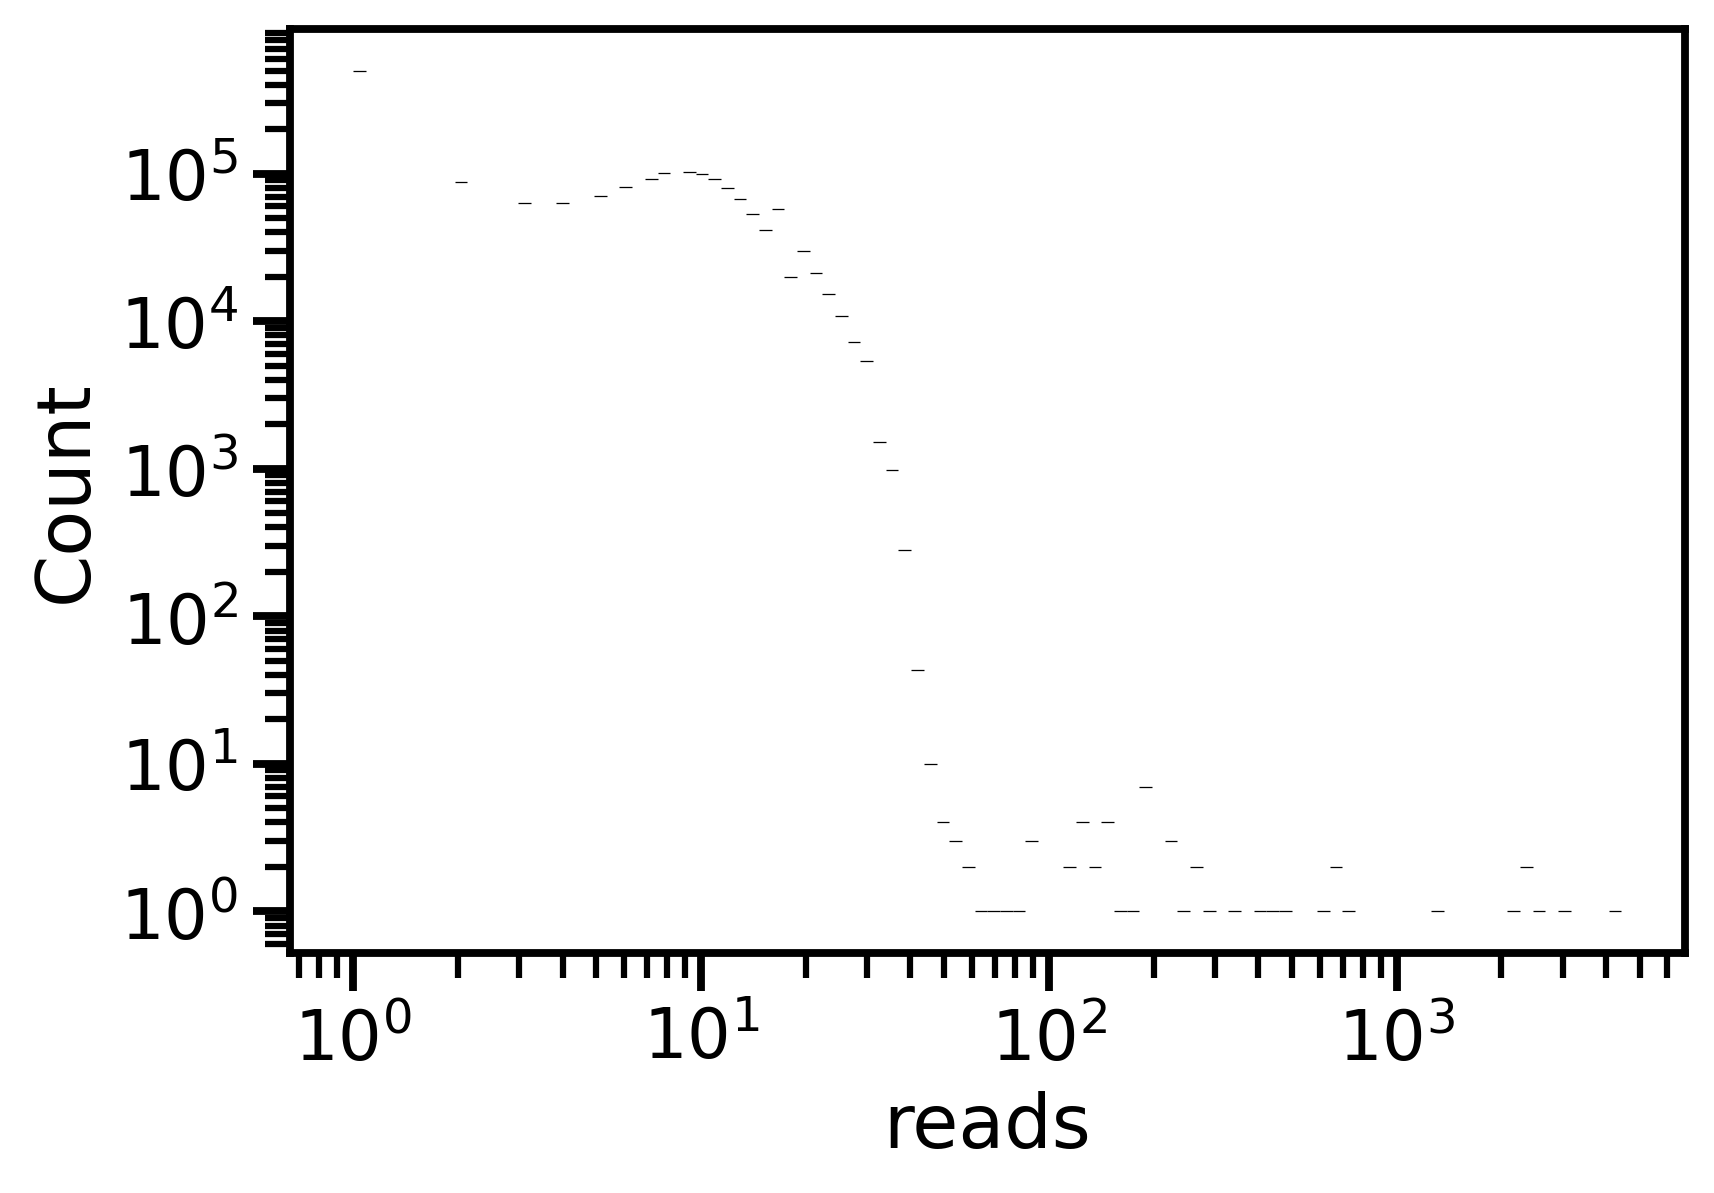

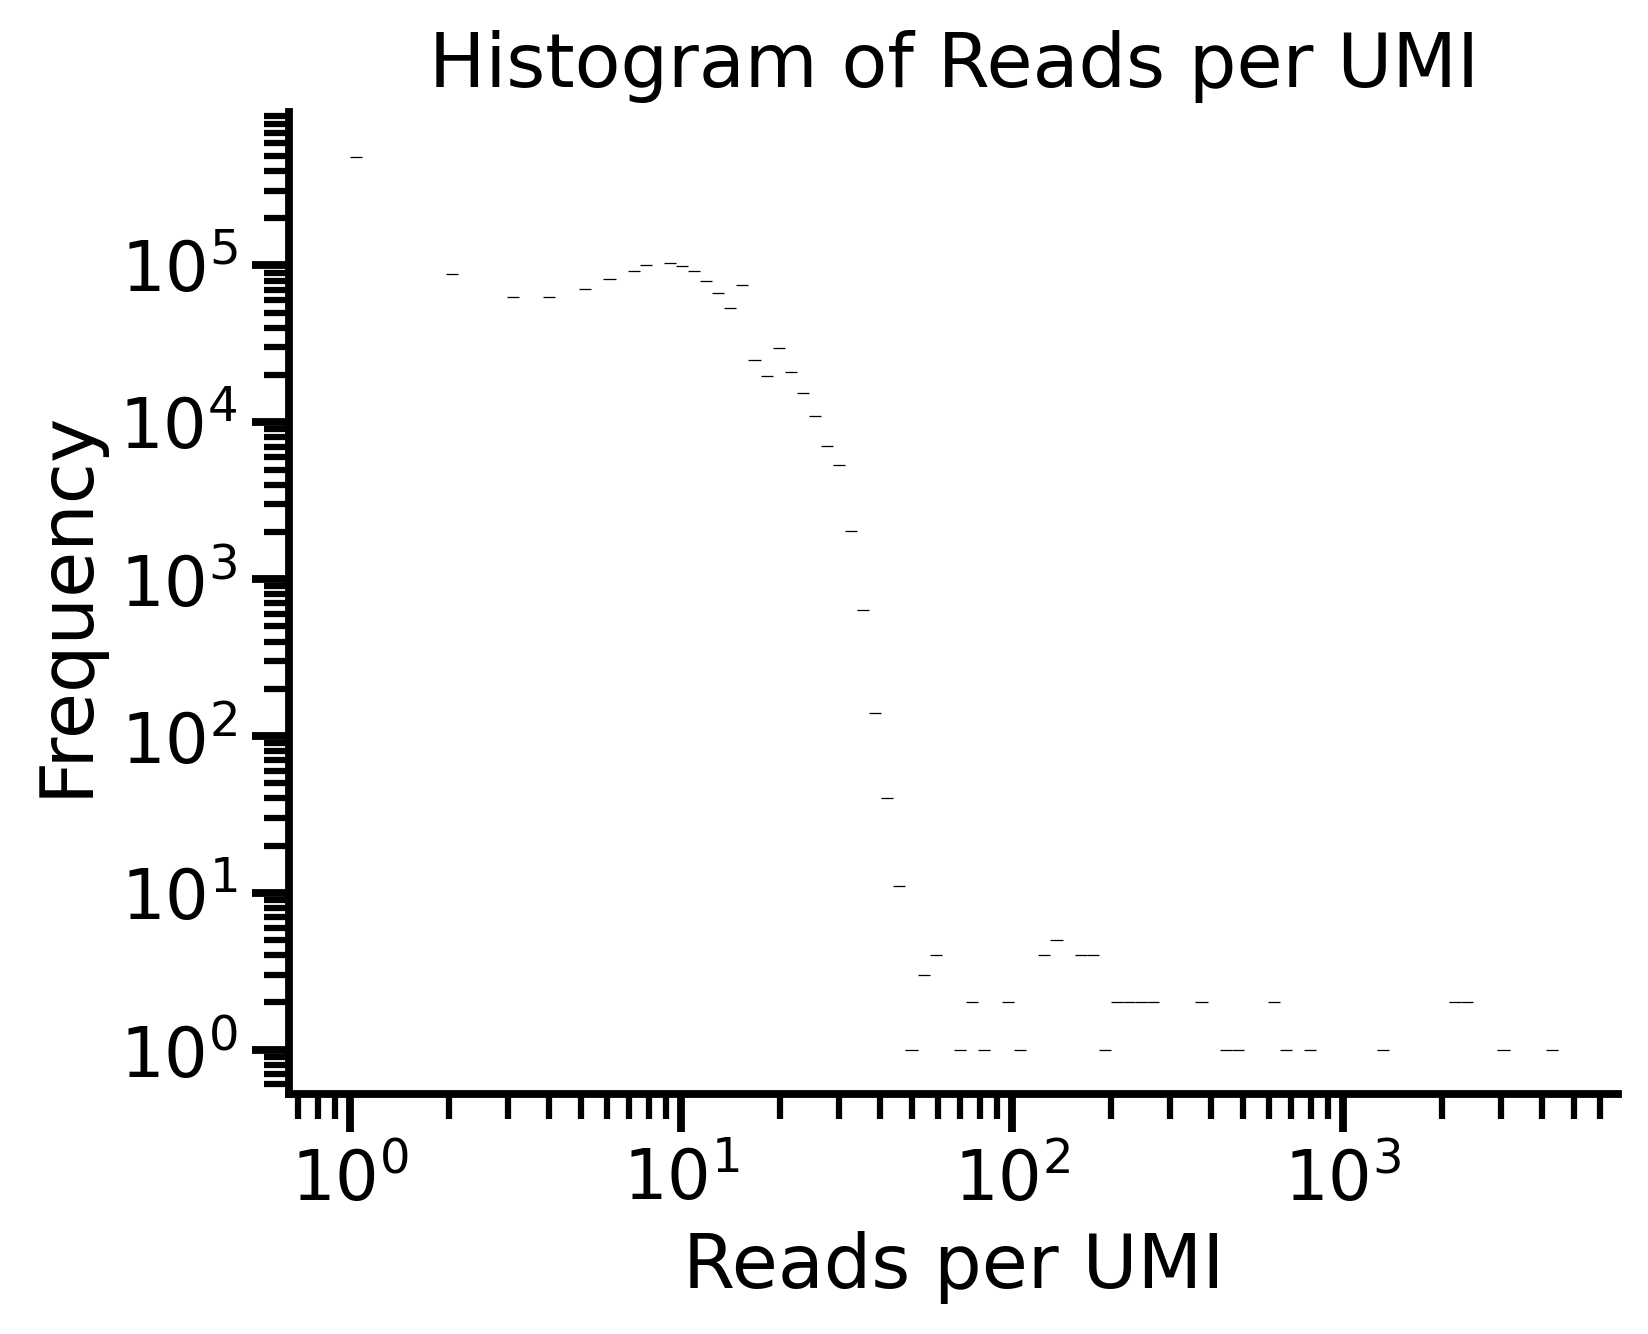

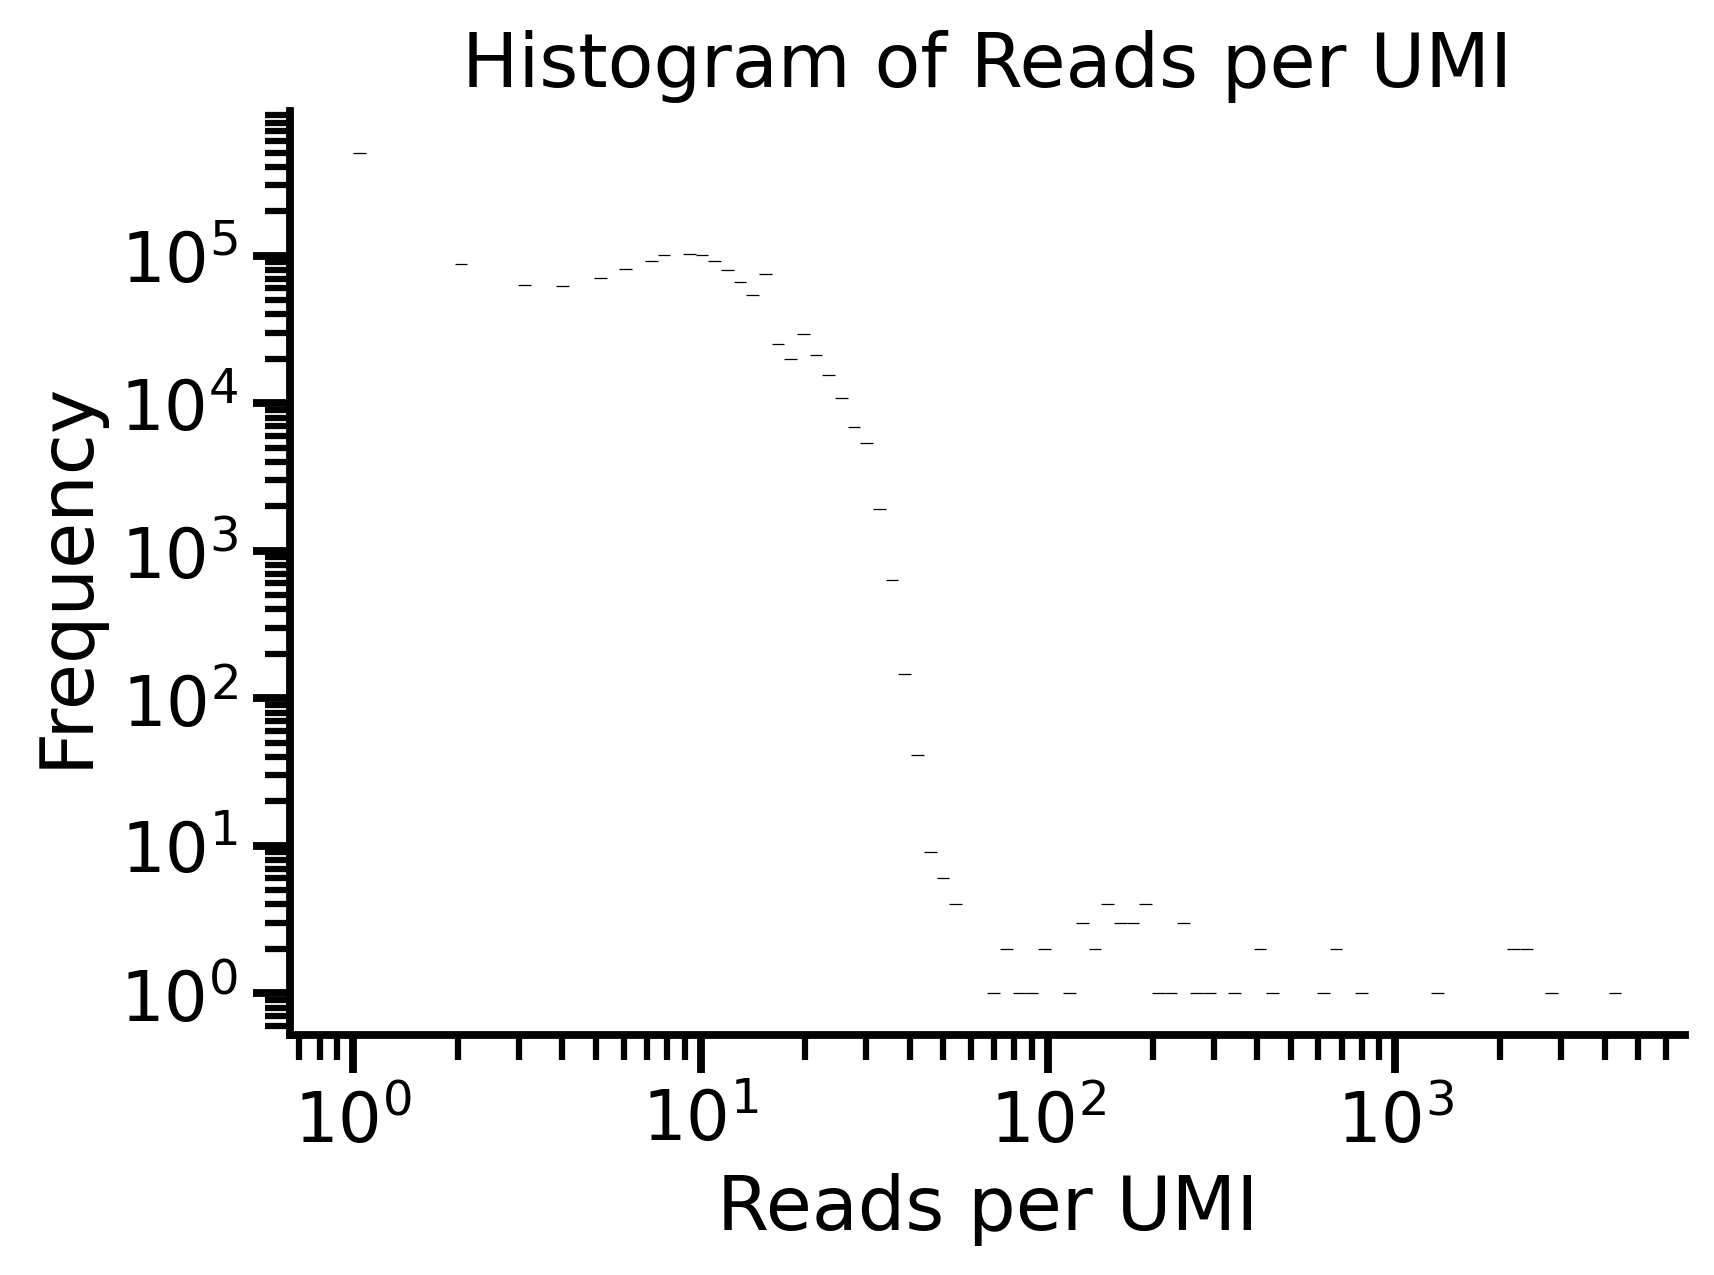

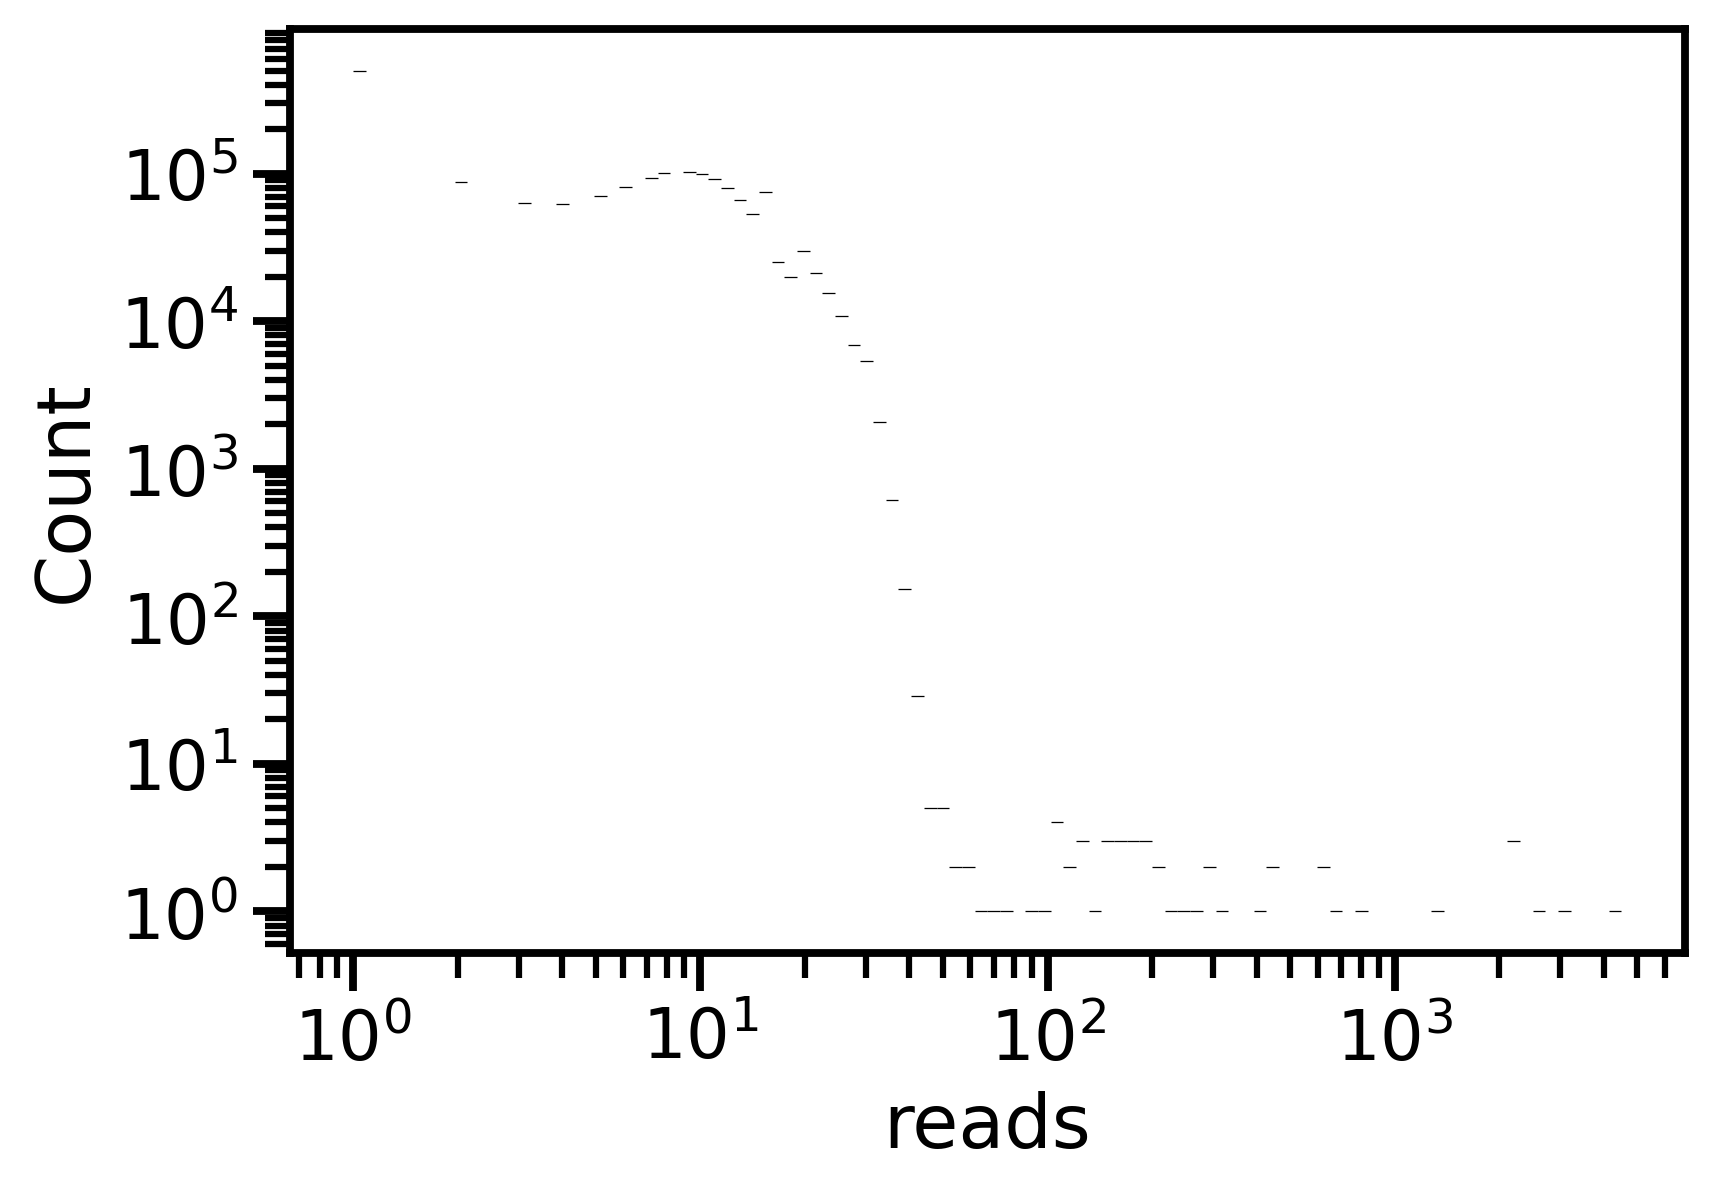

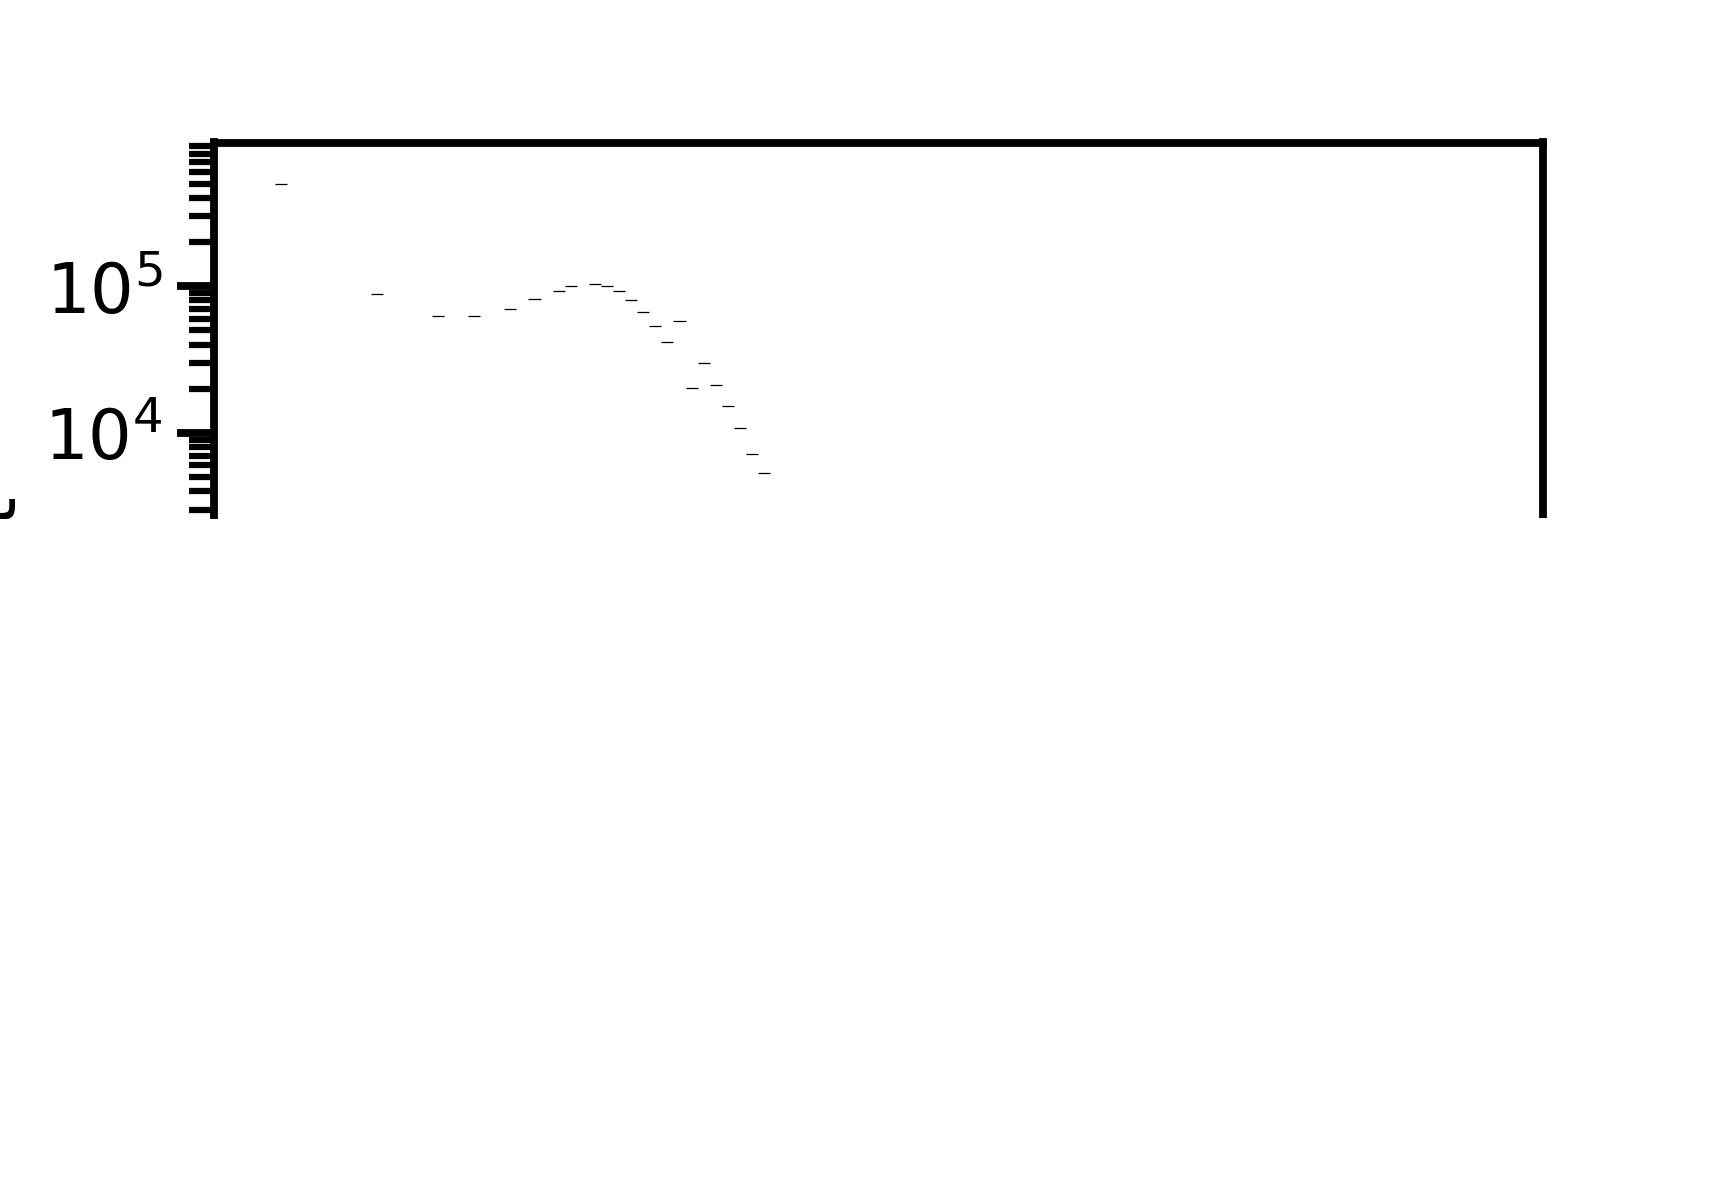

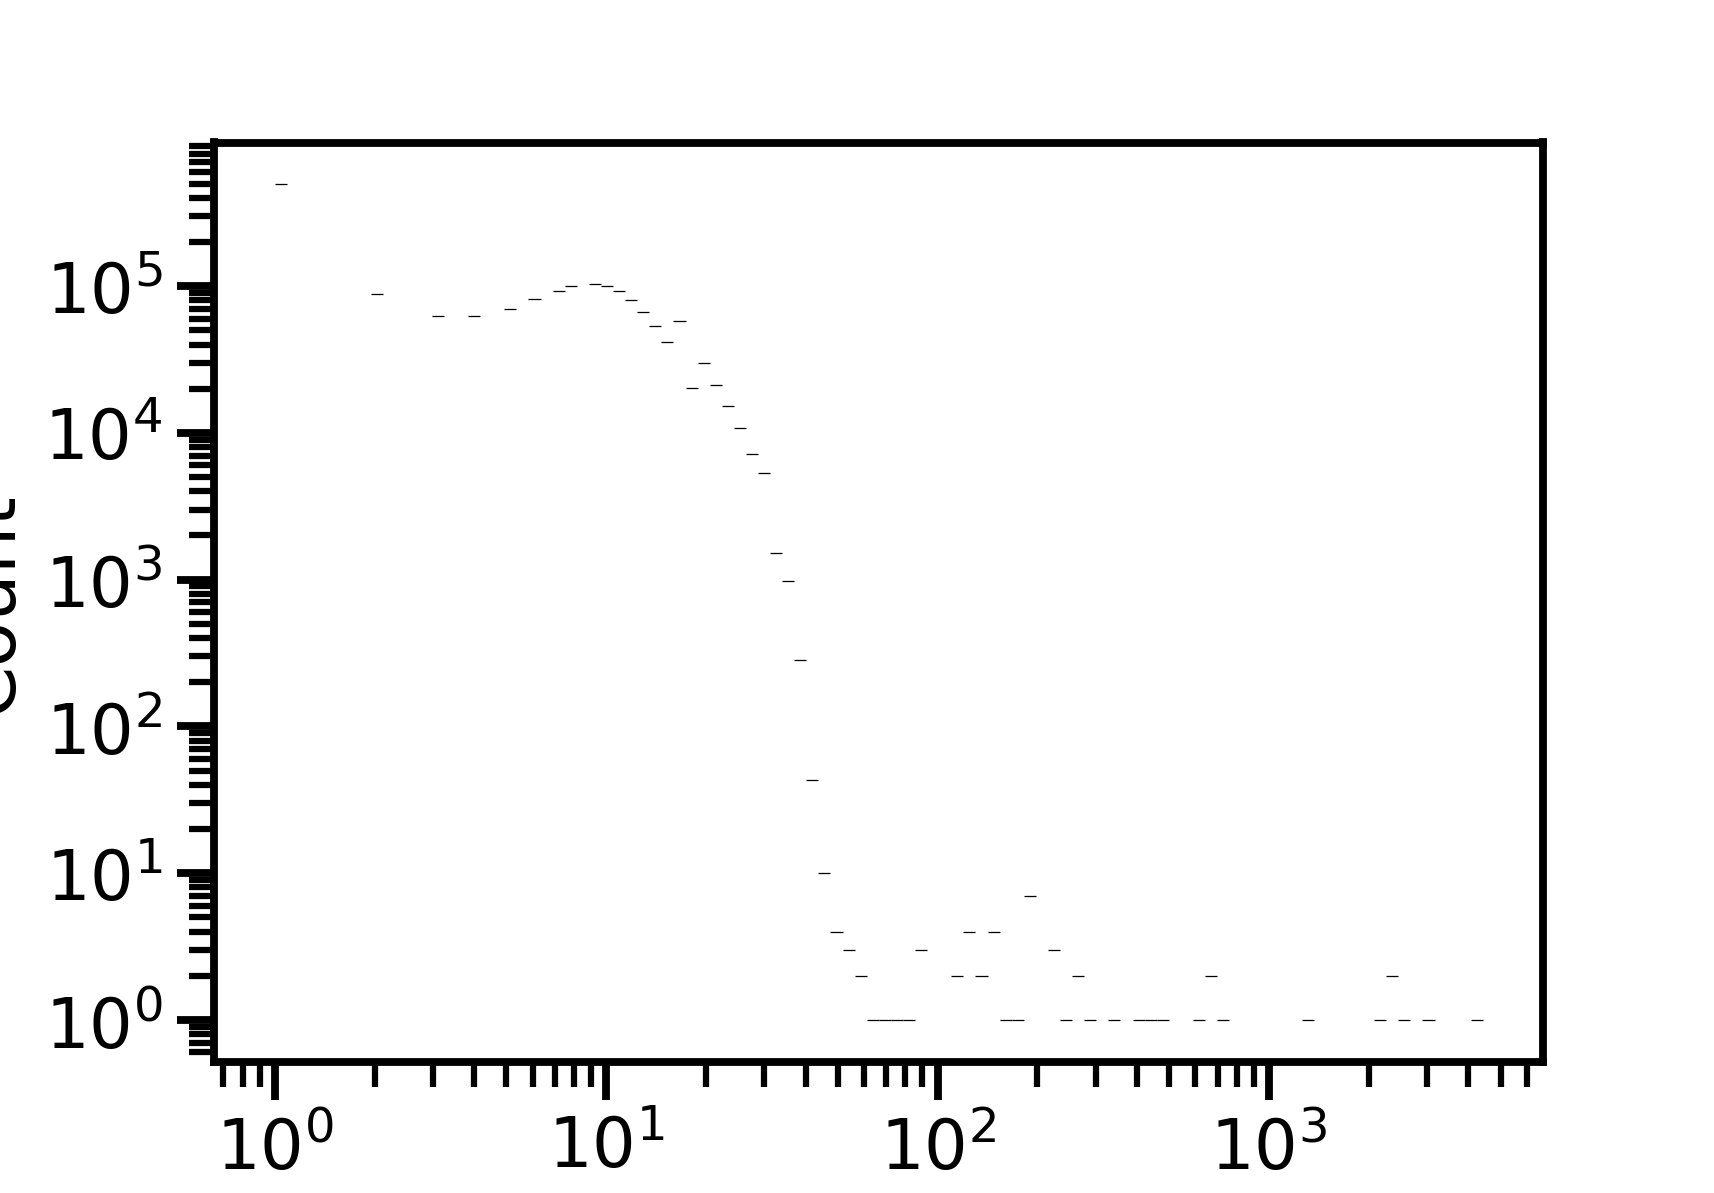

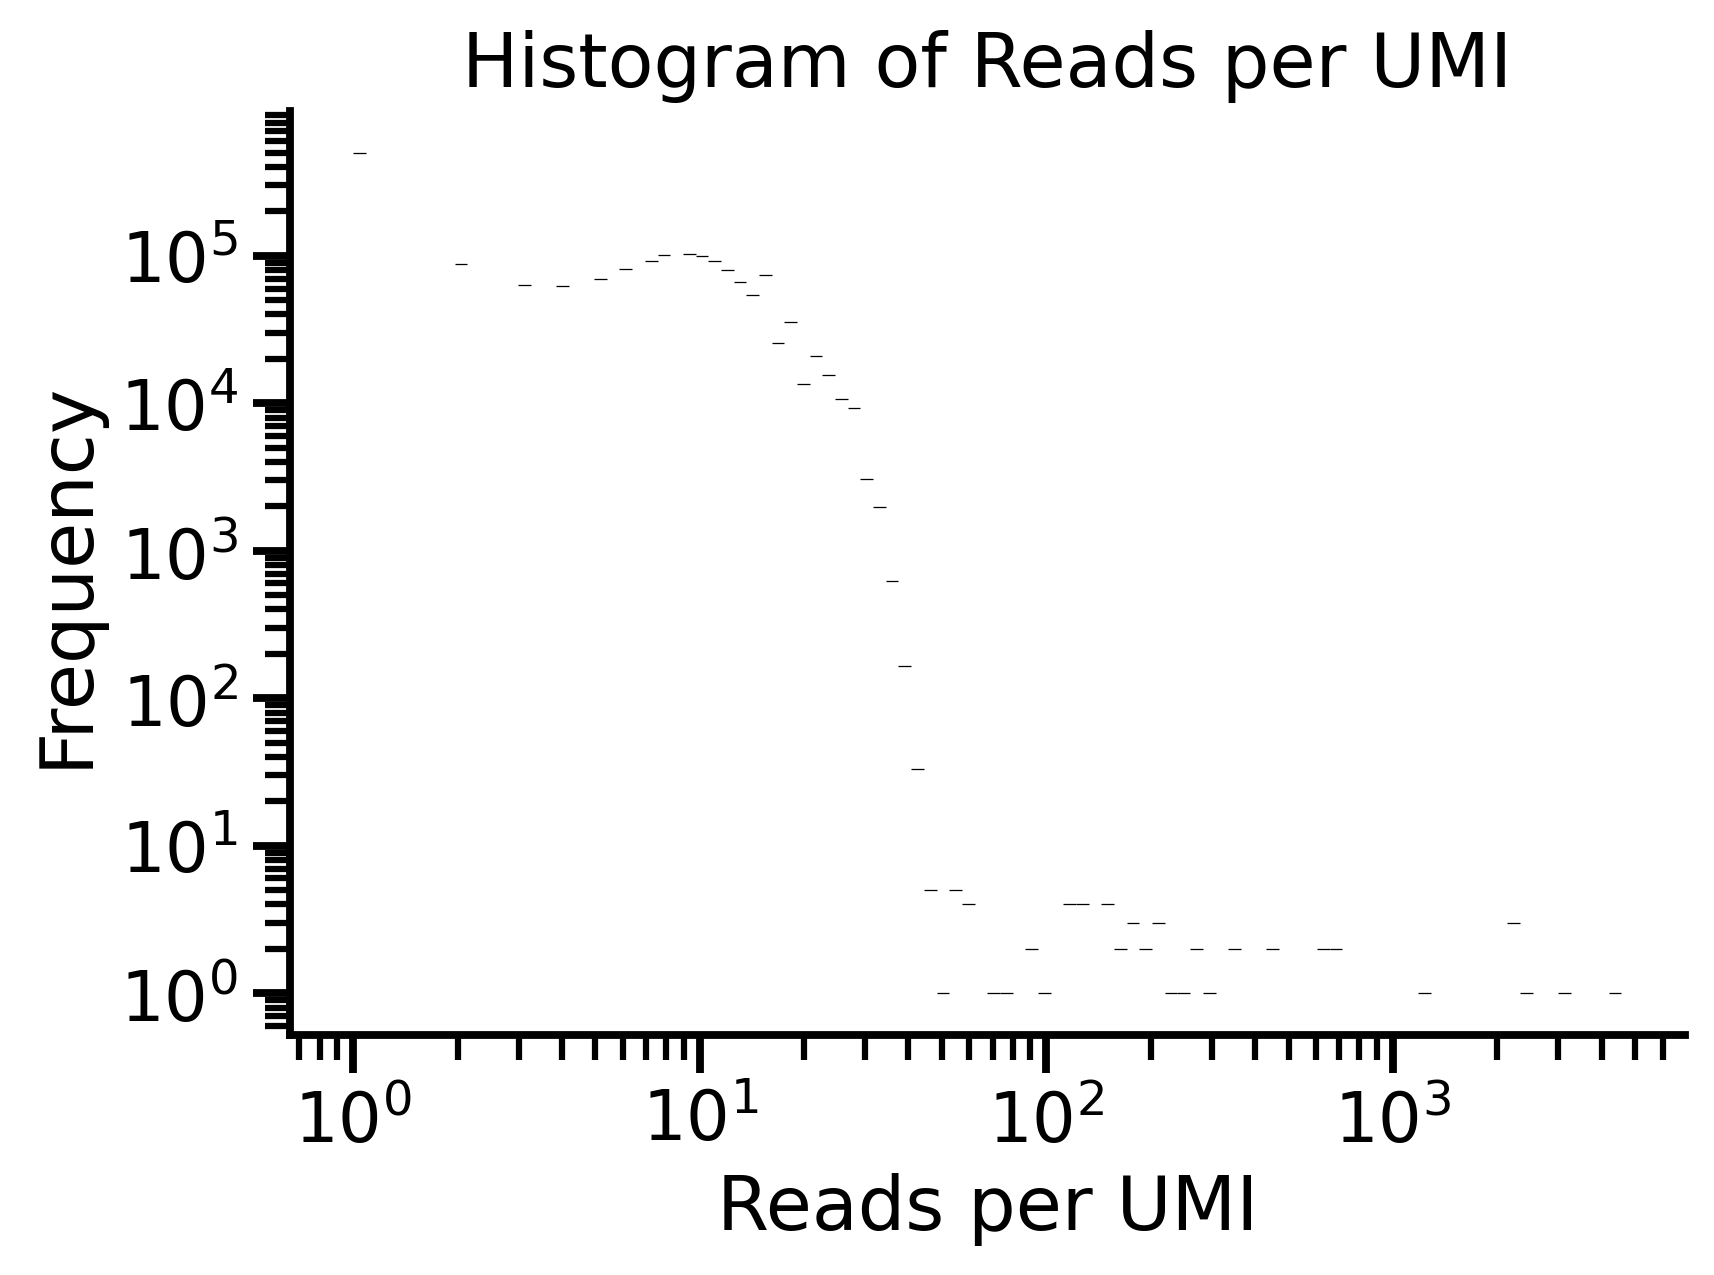

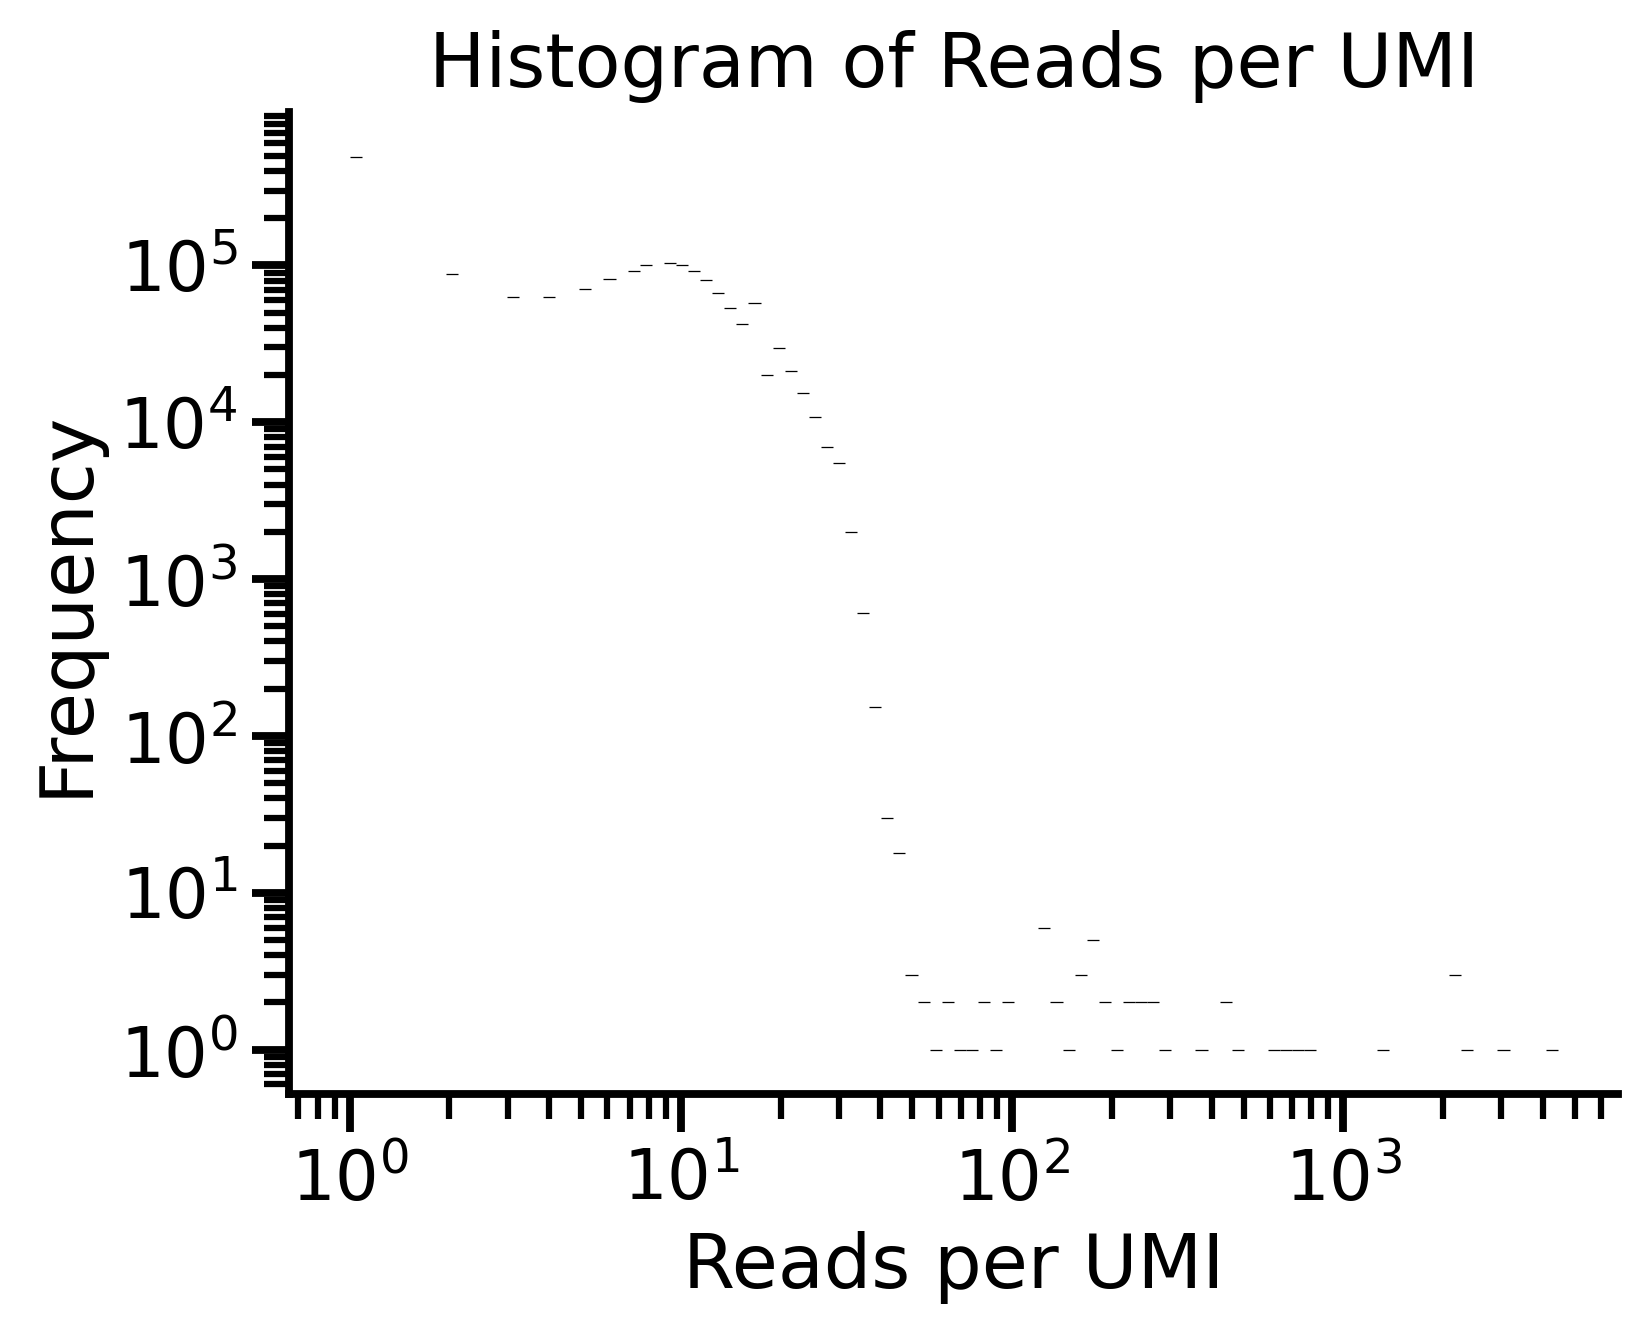

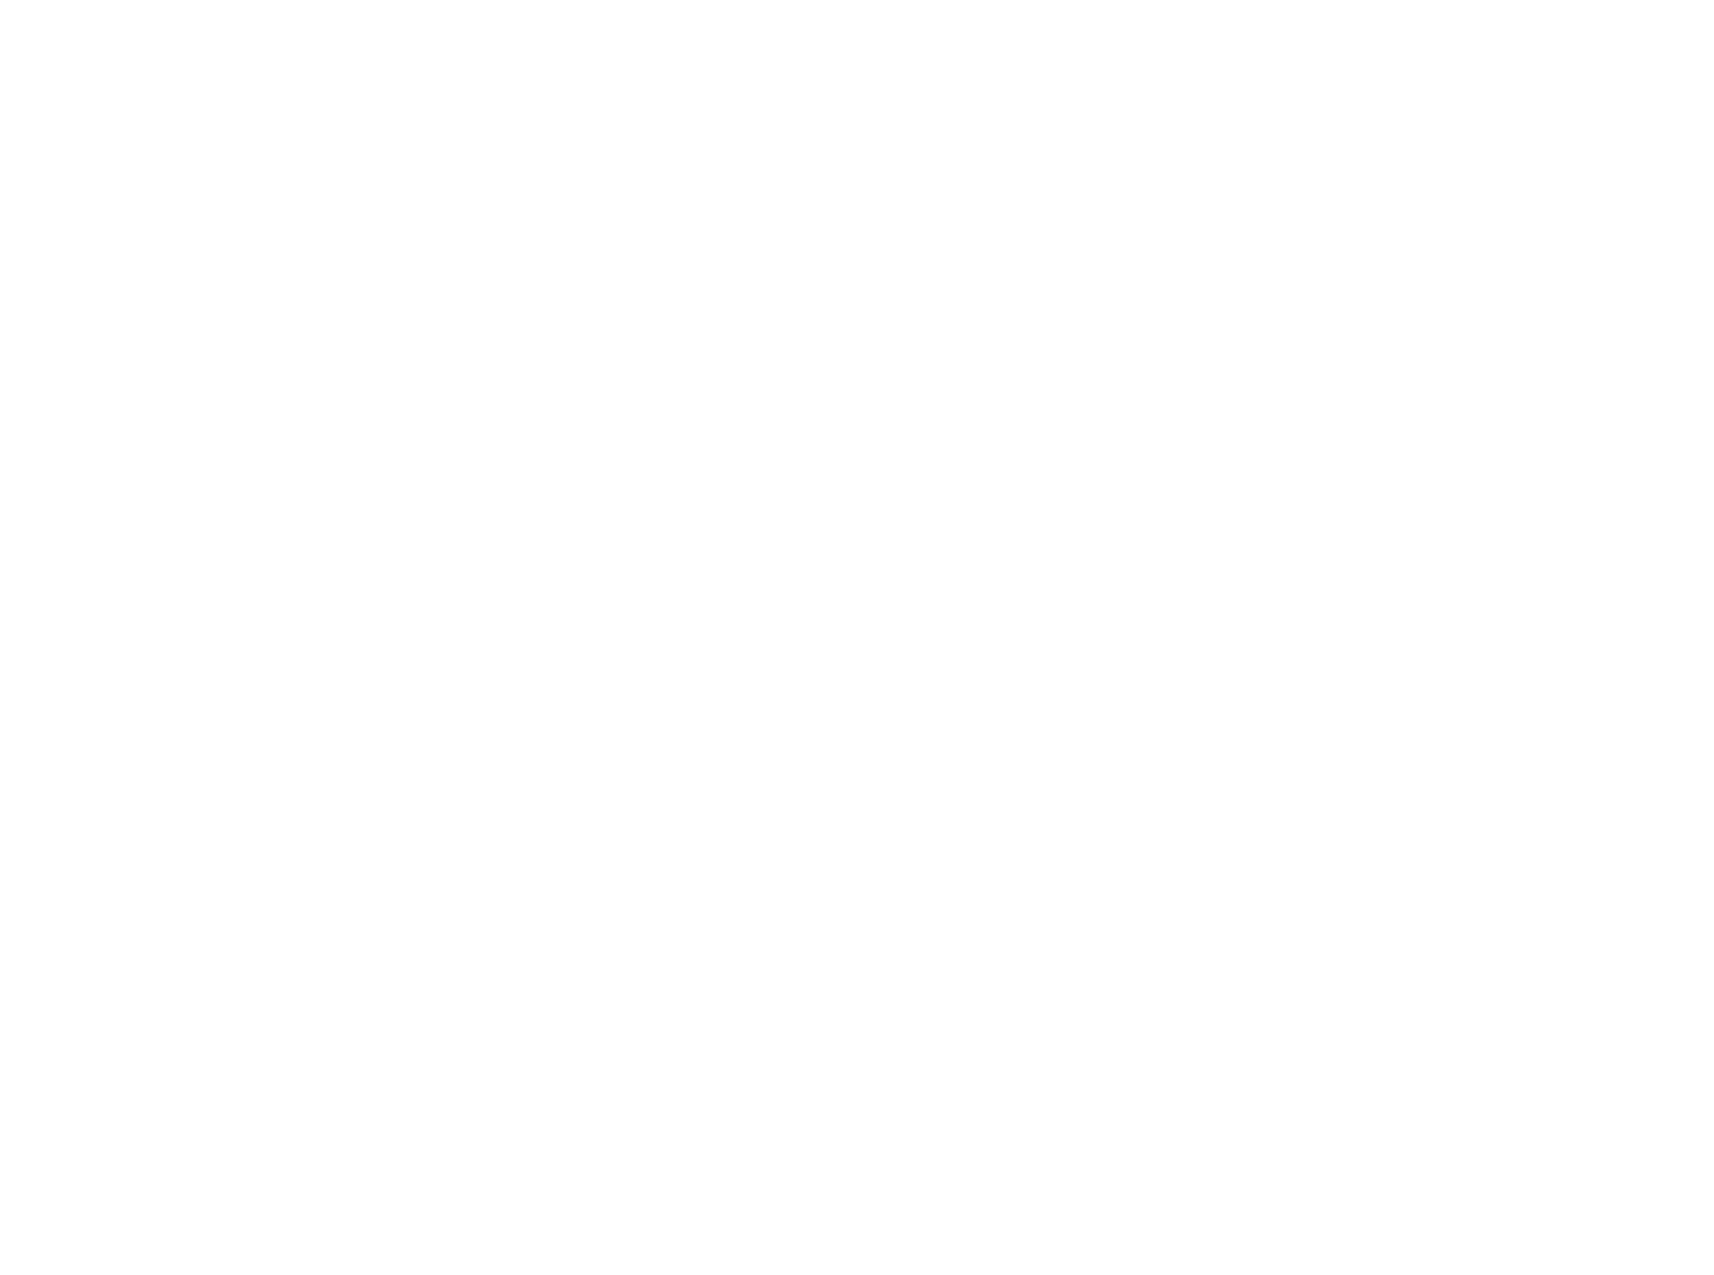

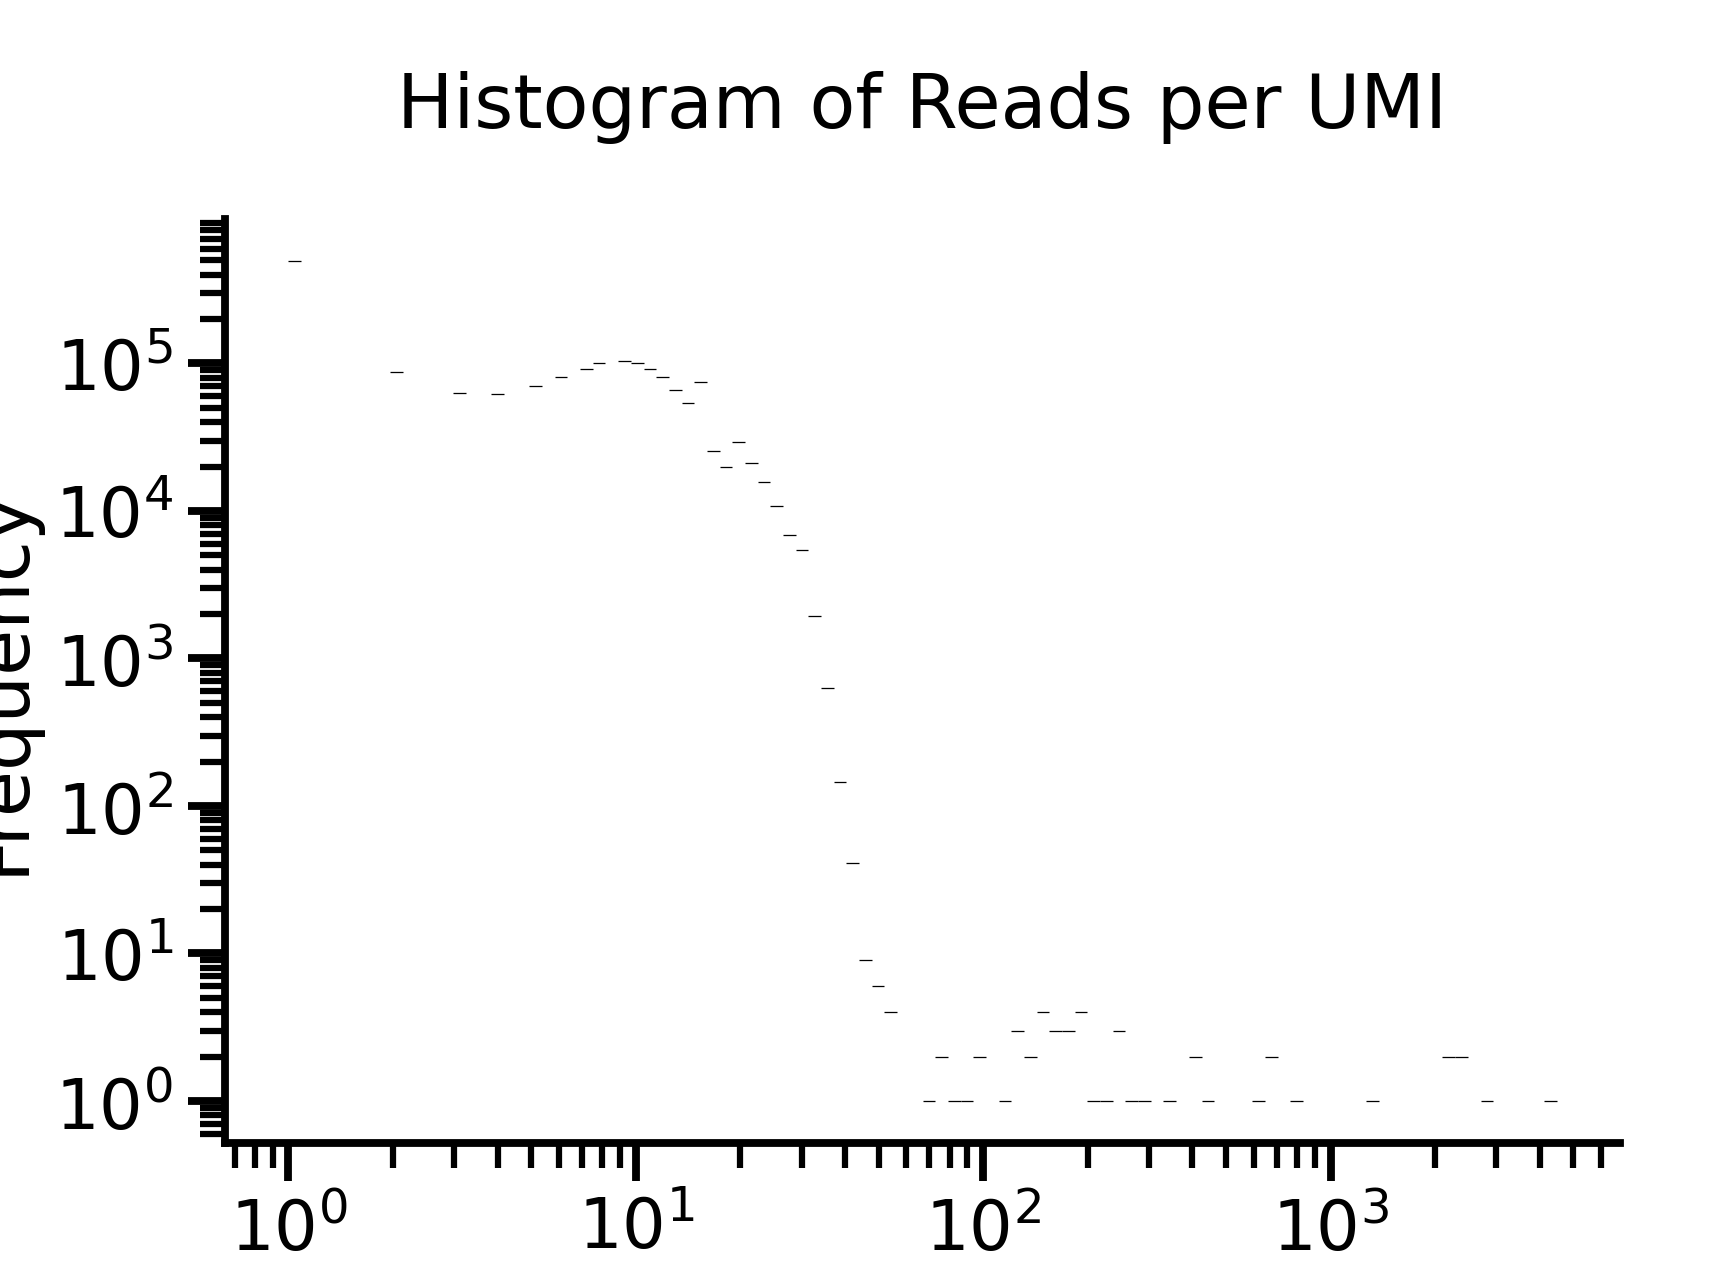

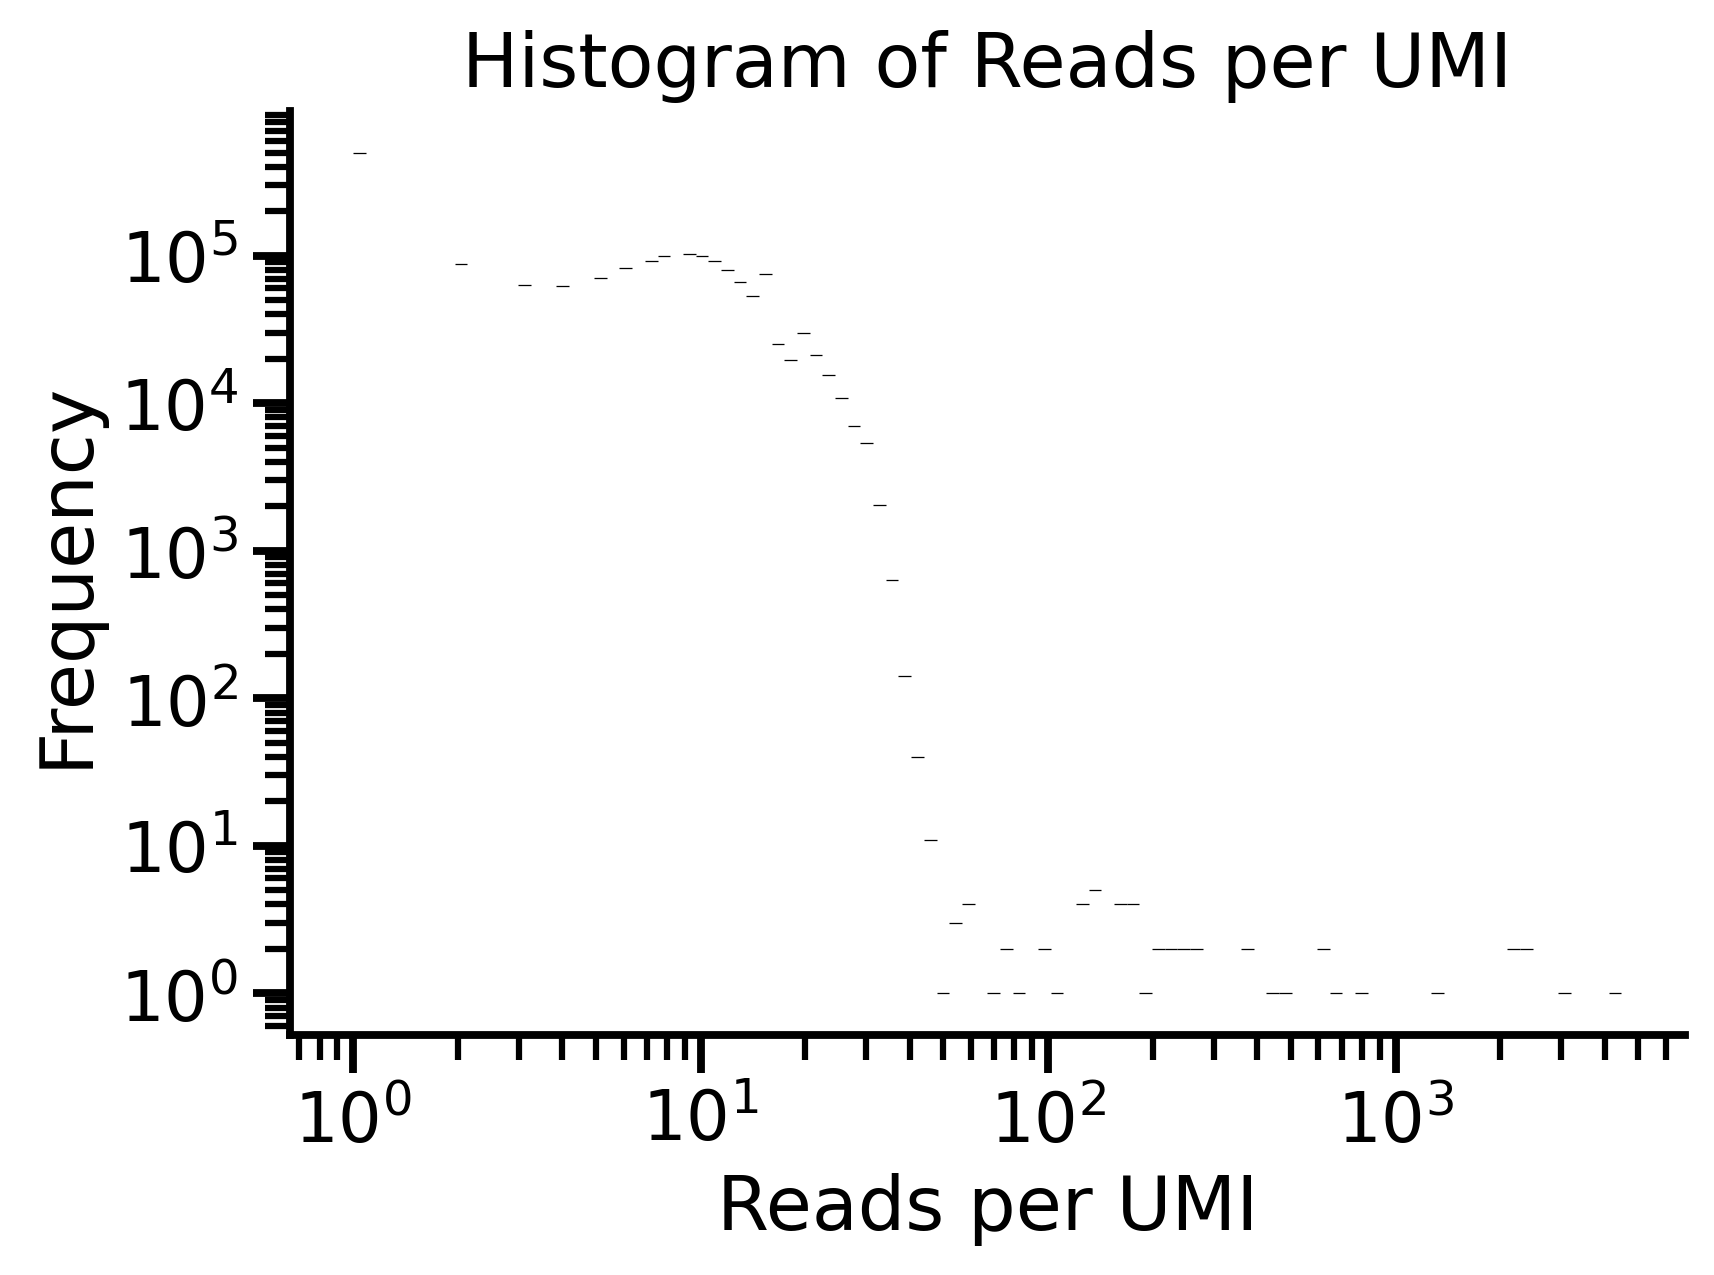

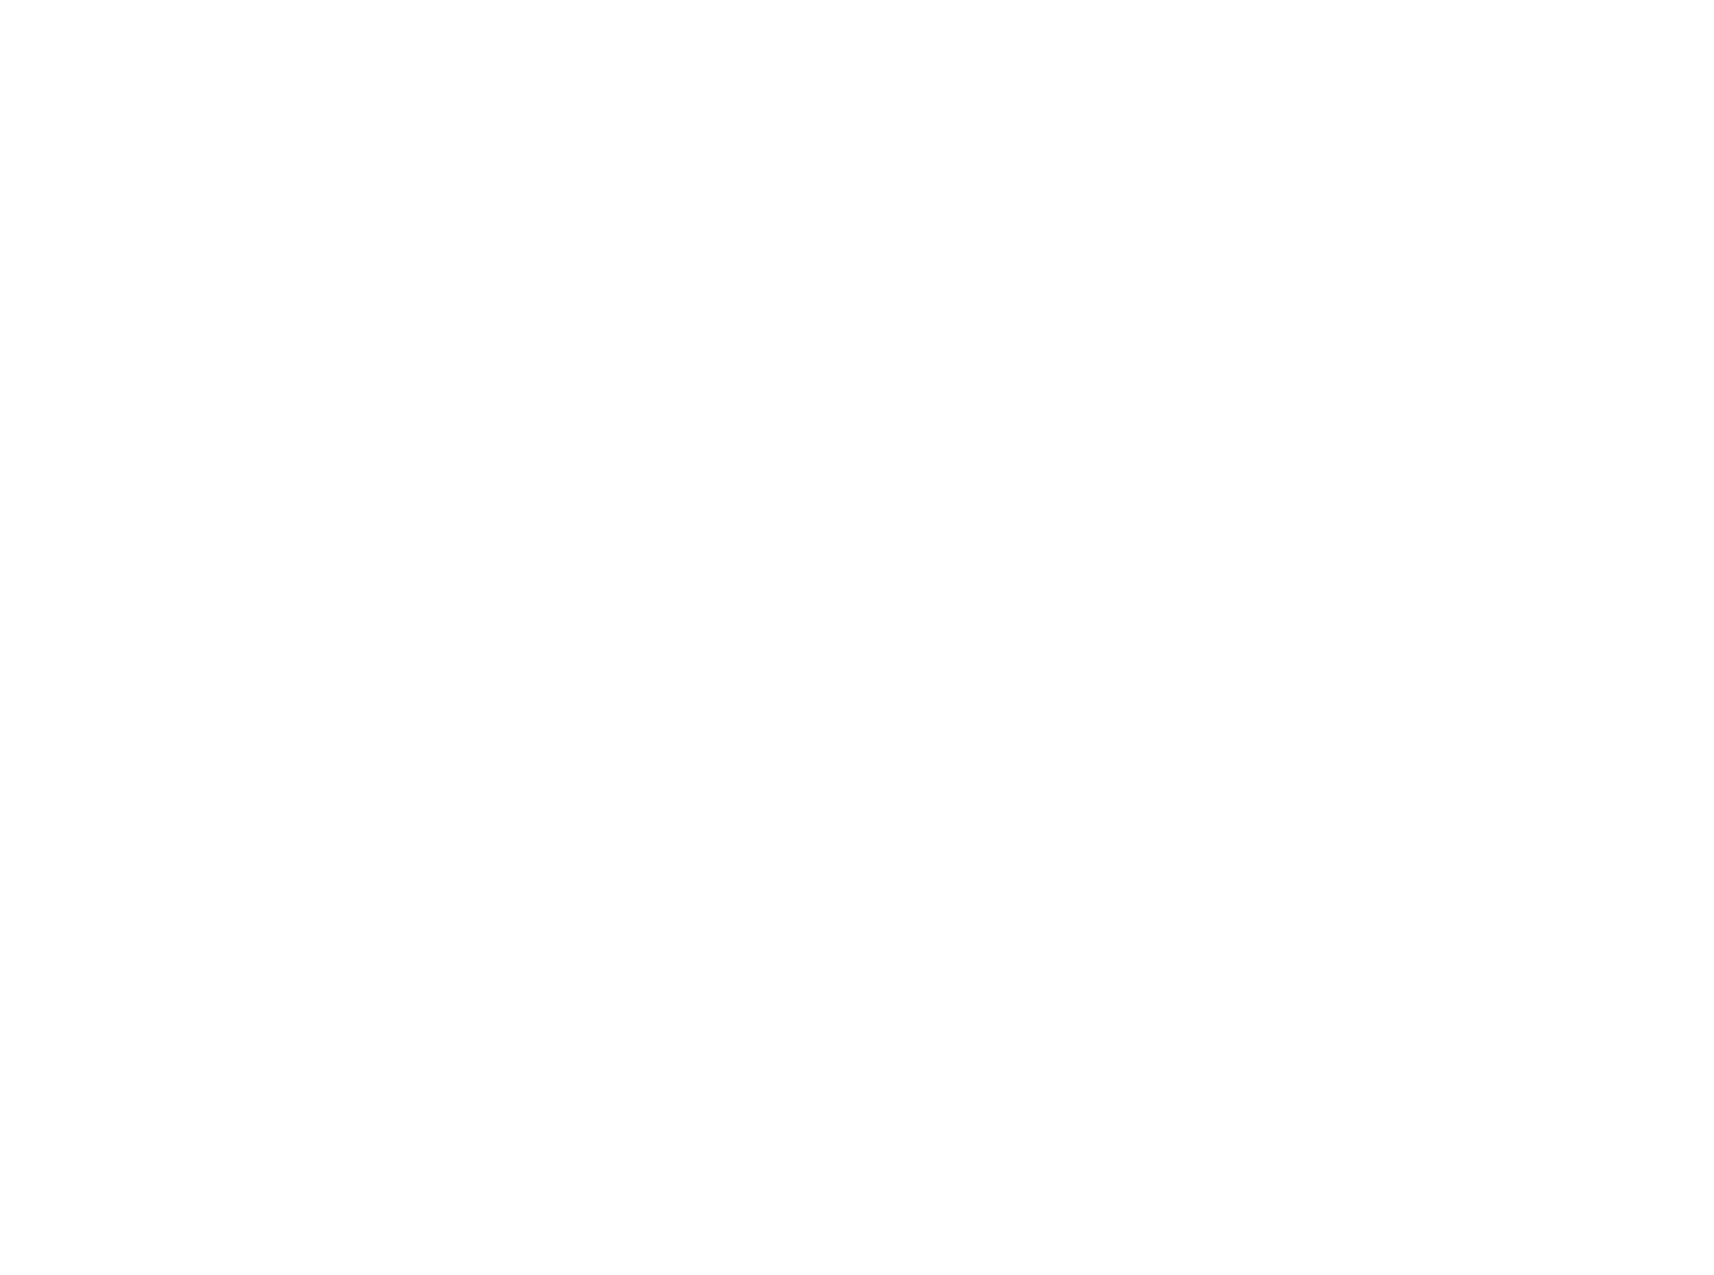

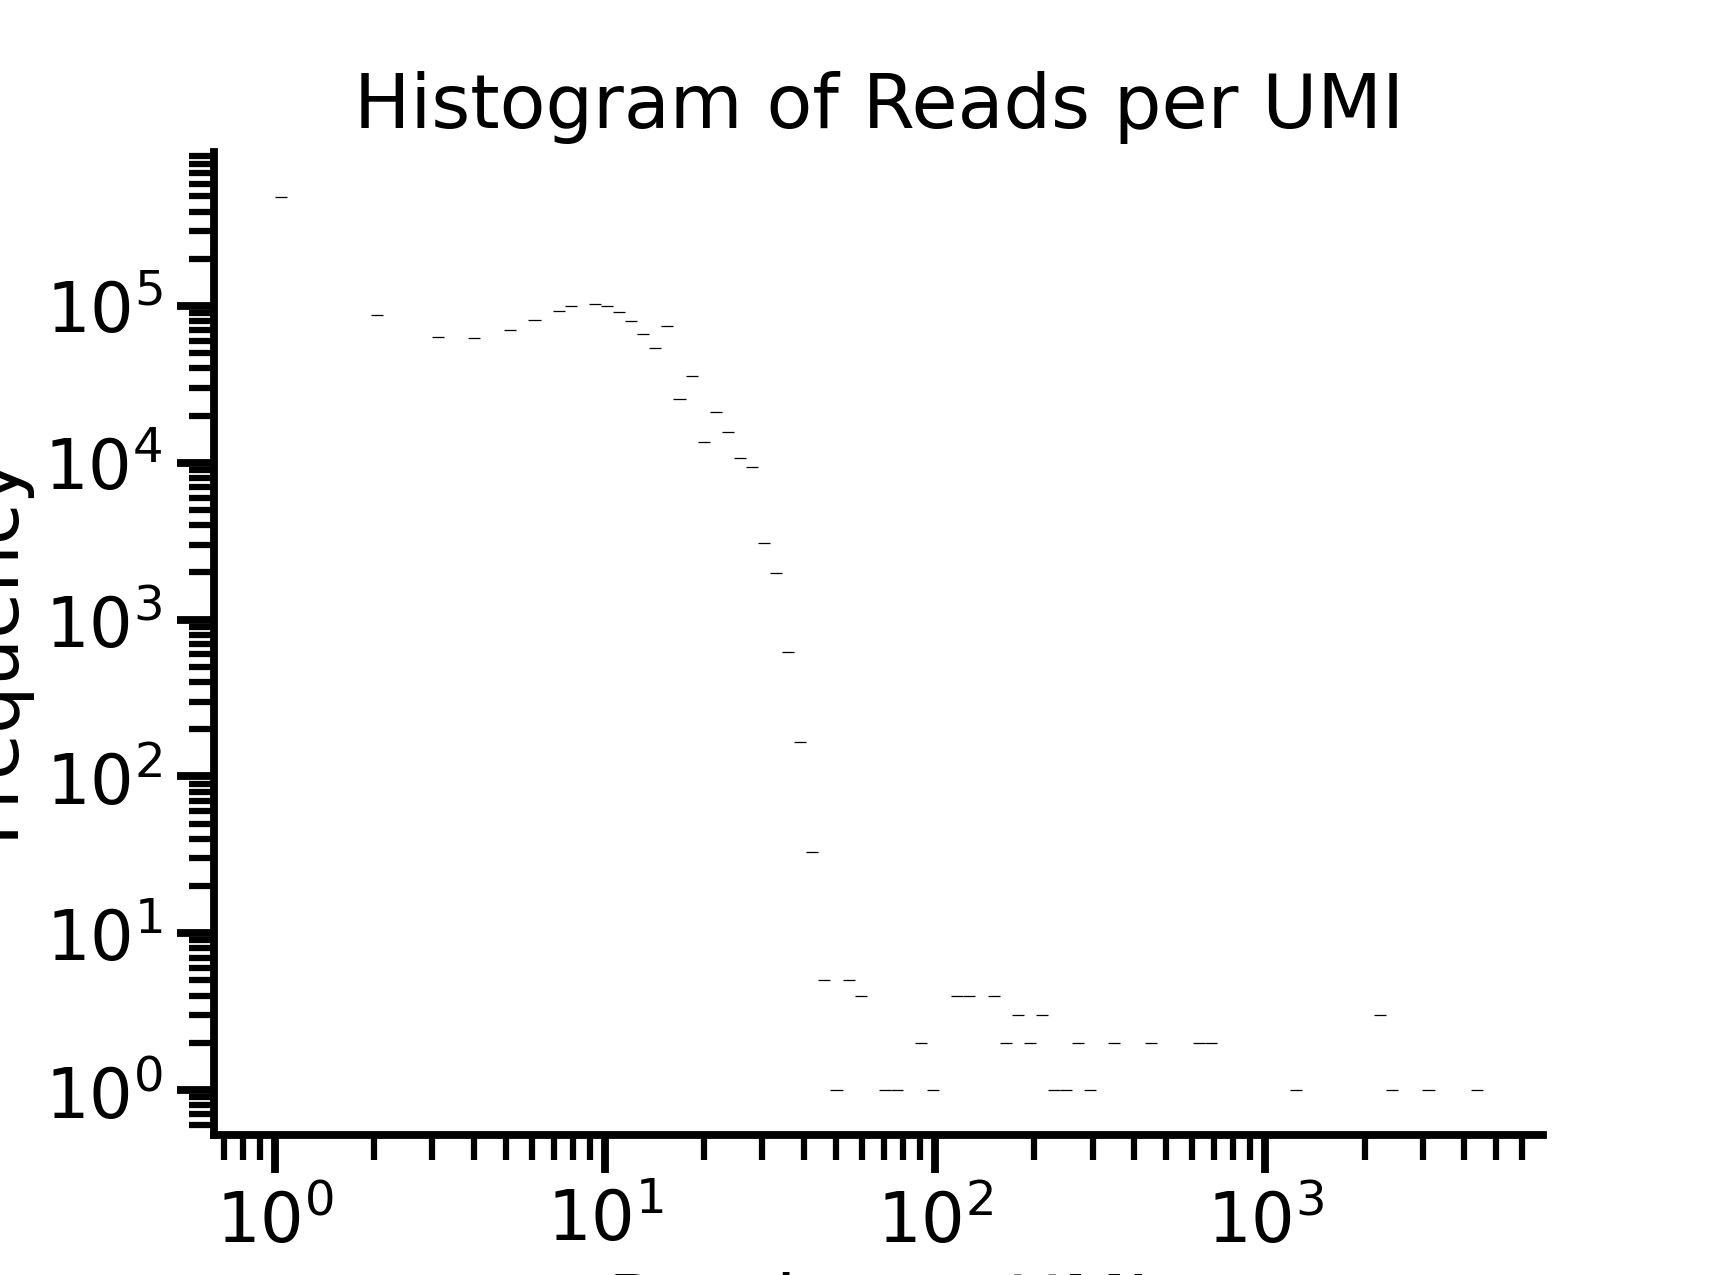

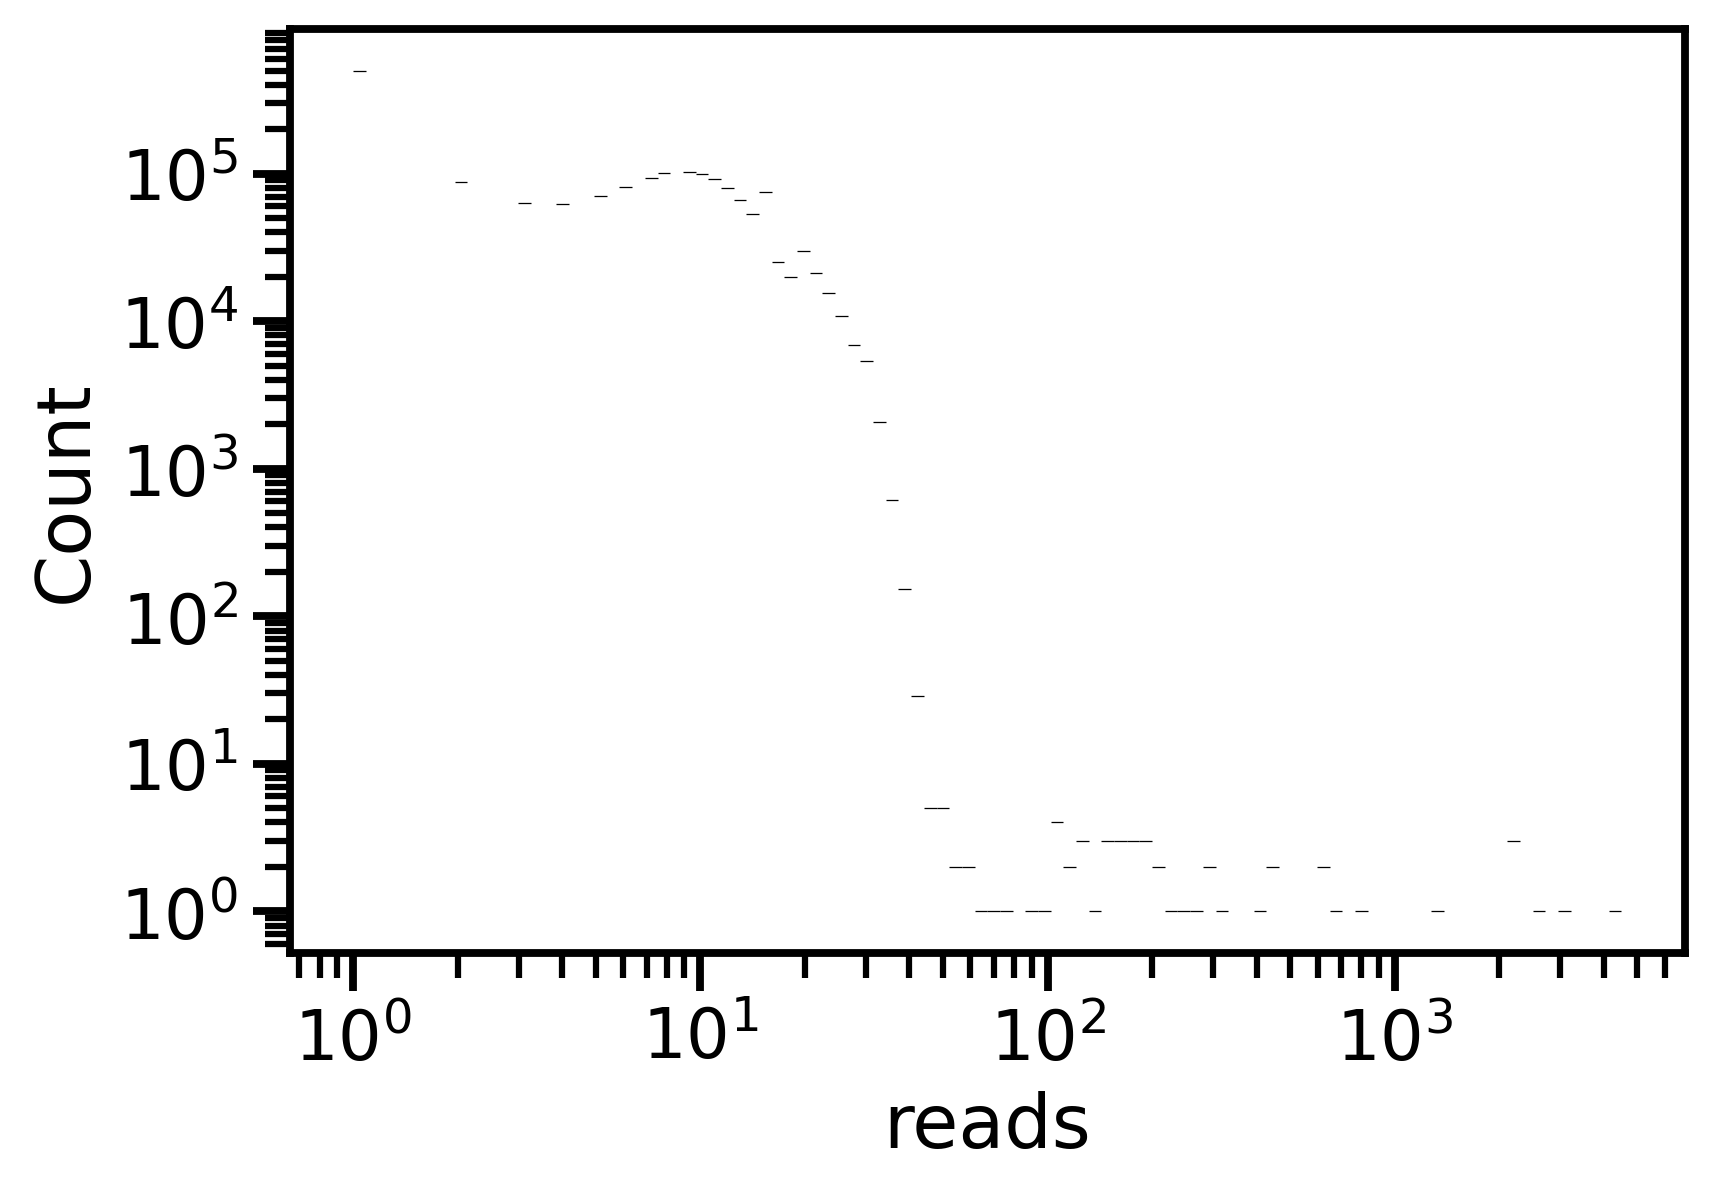

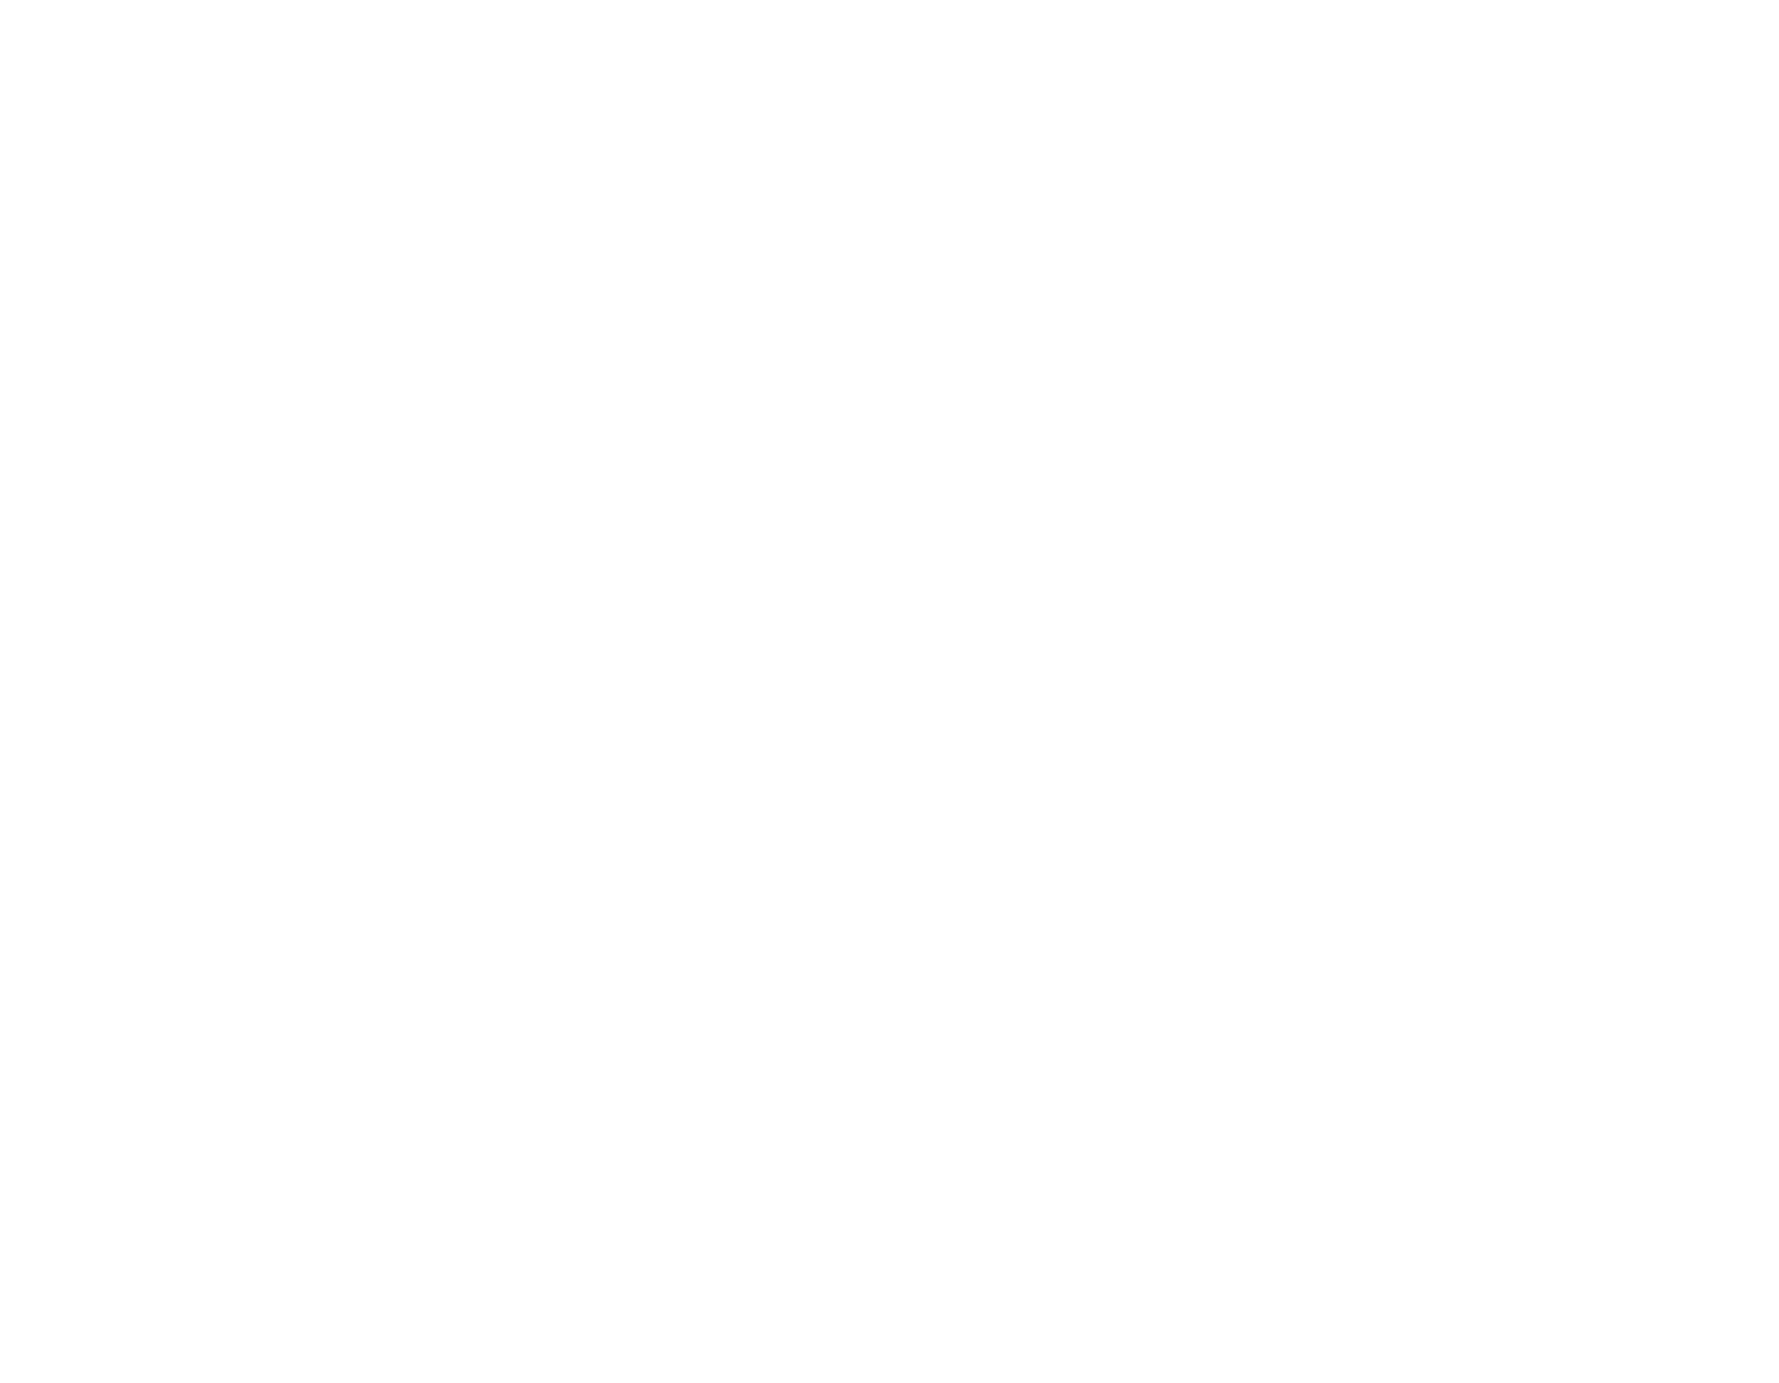

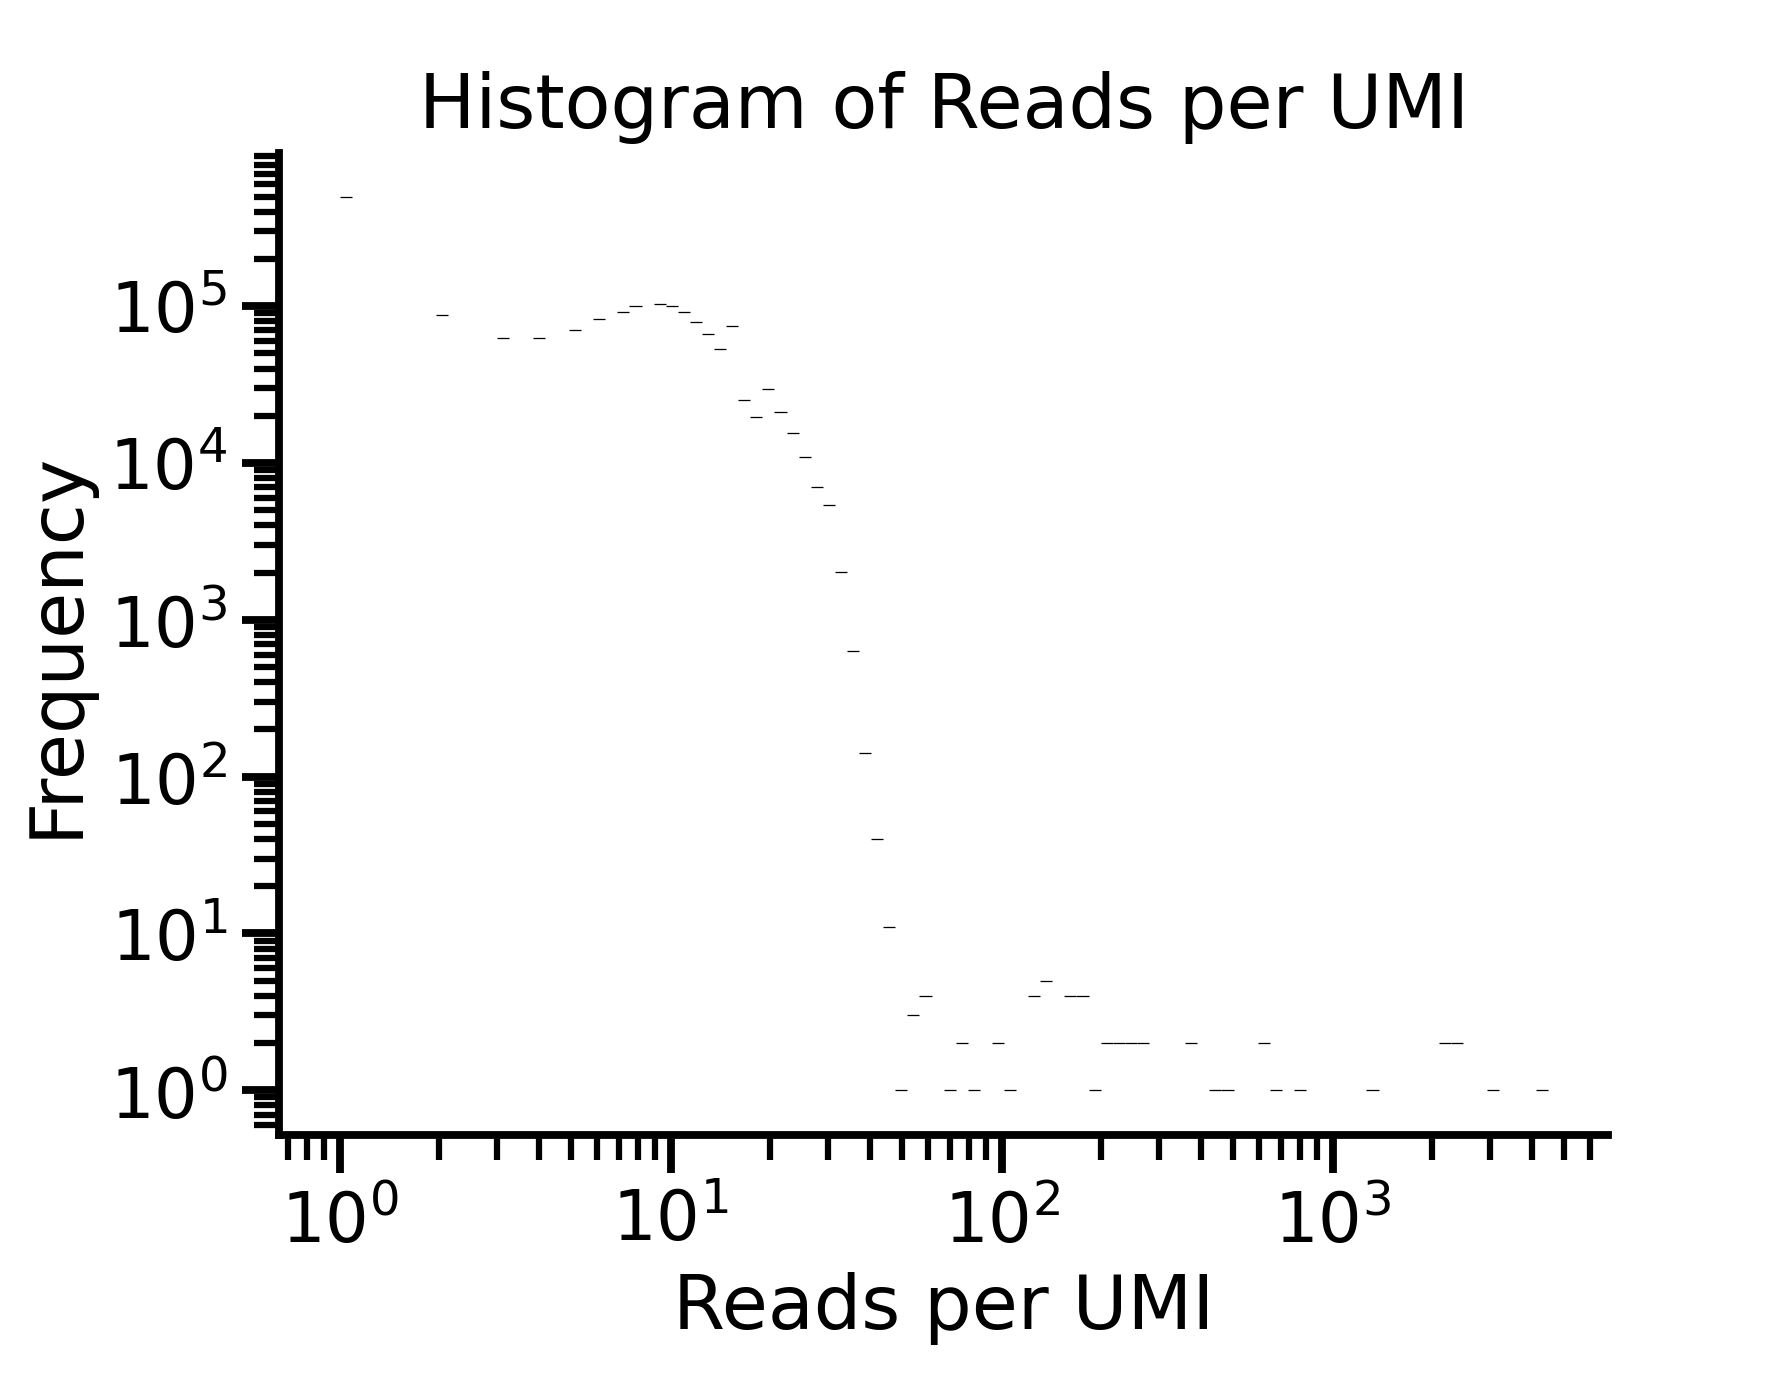

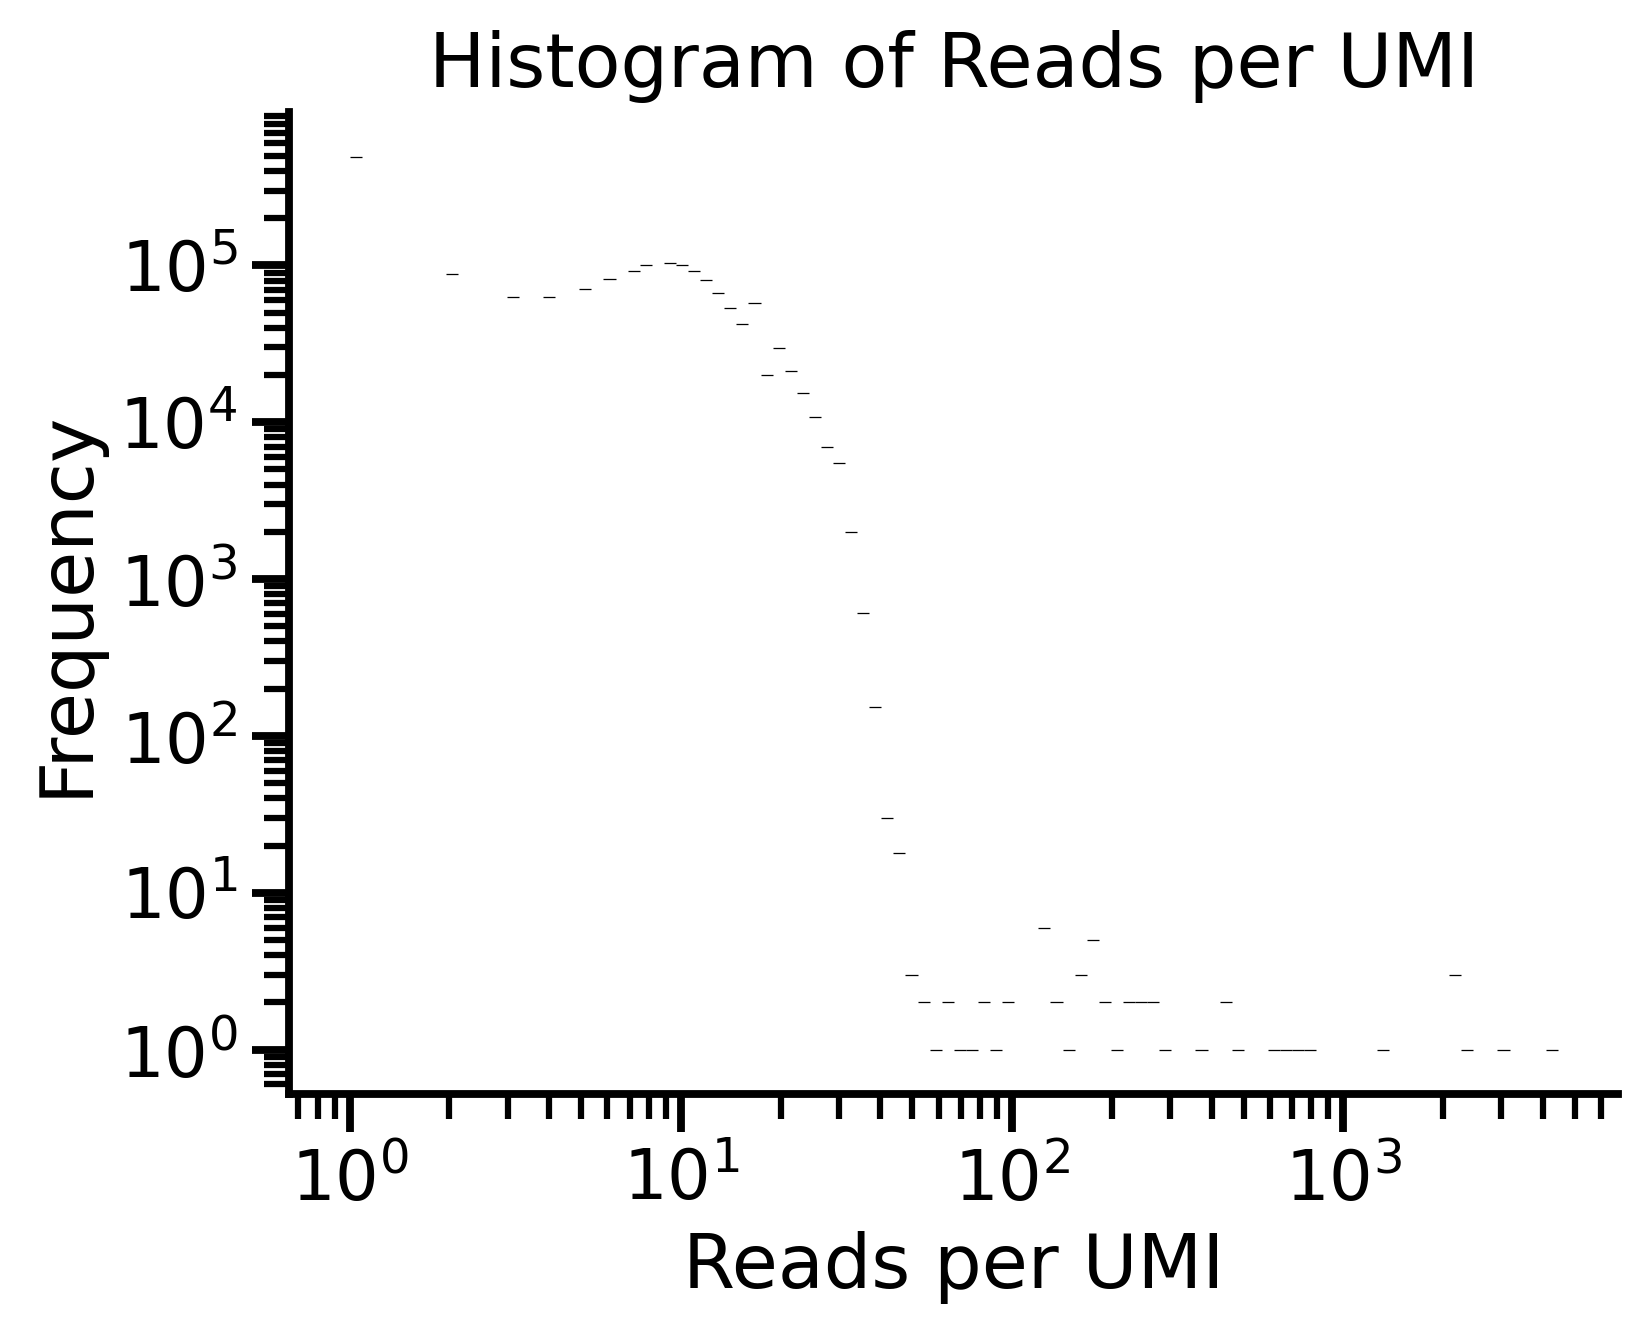

<Figure size 1800x1200 with 0 Axes>

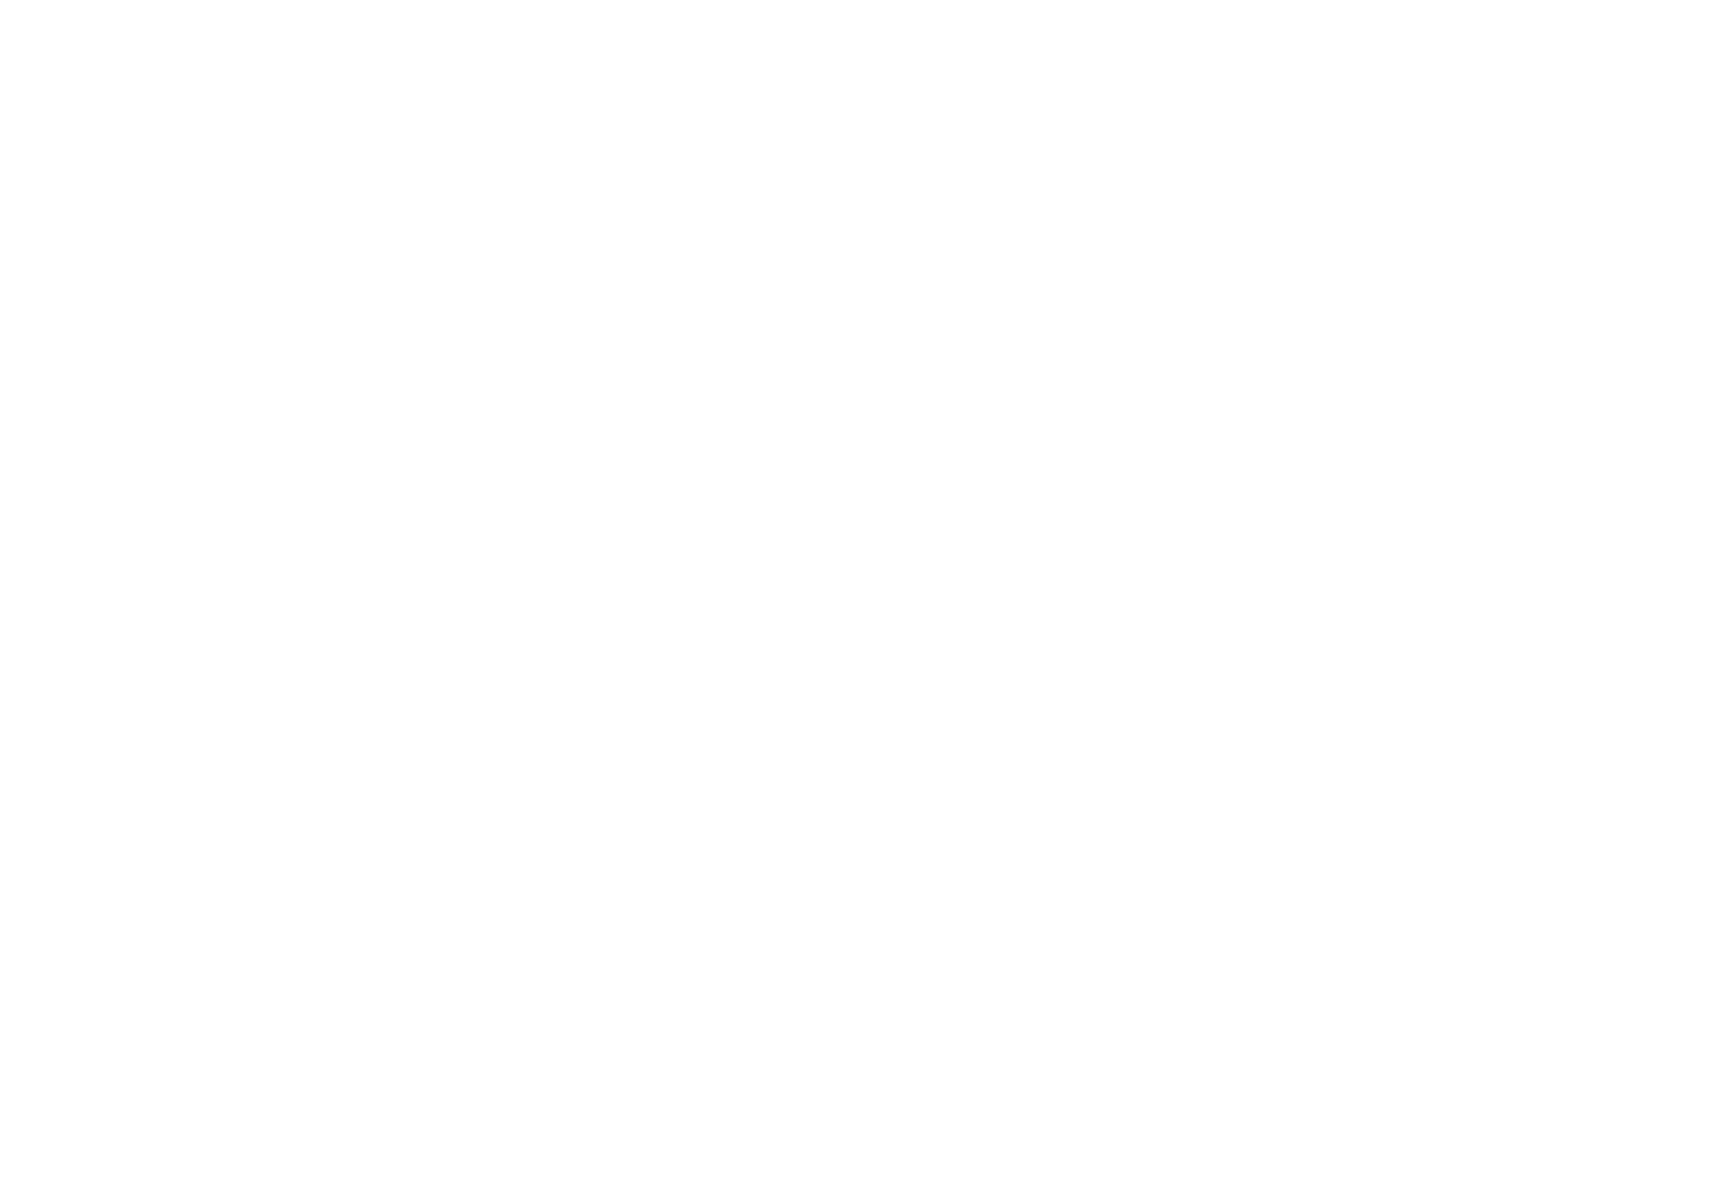

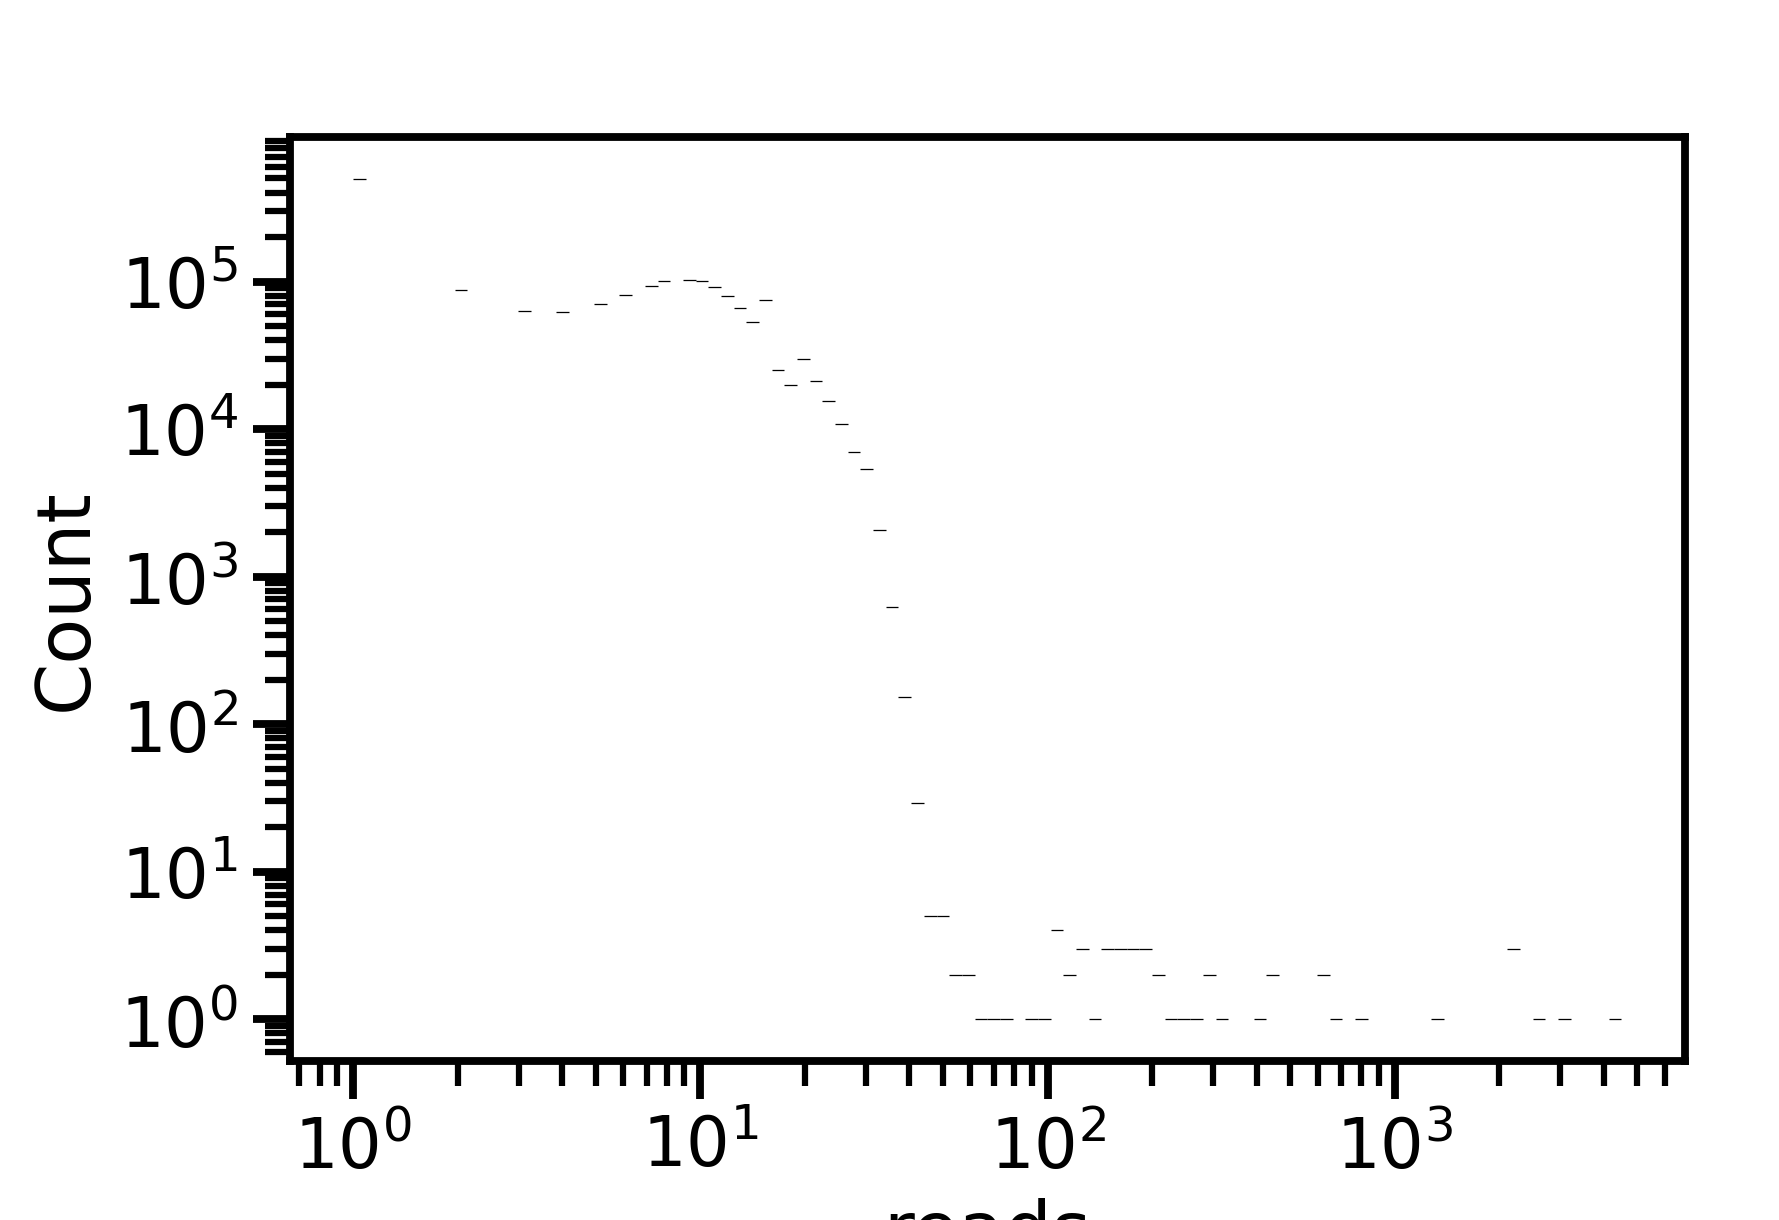

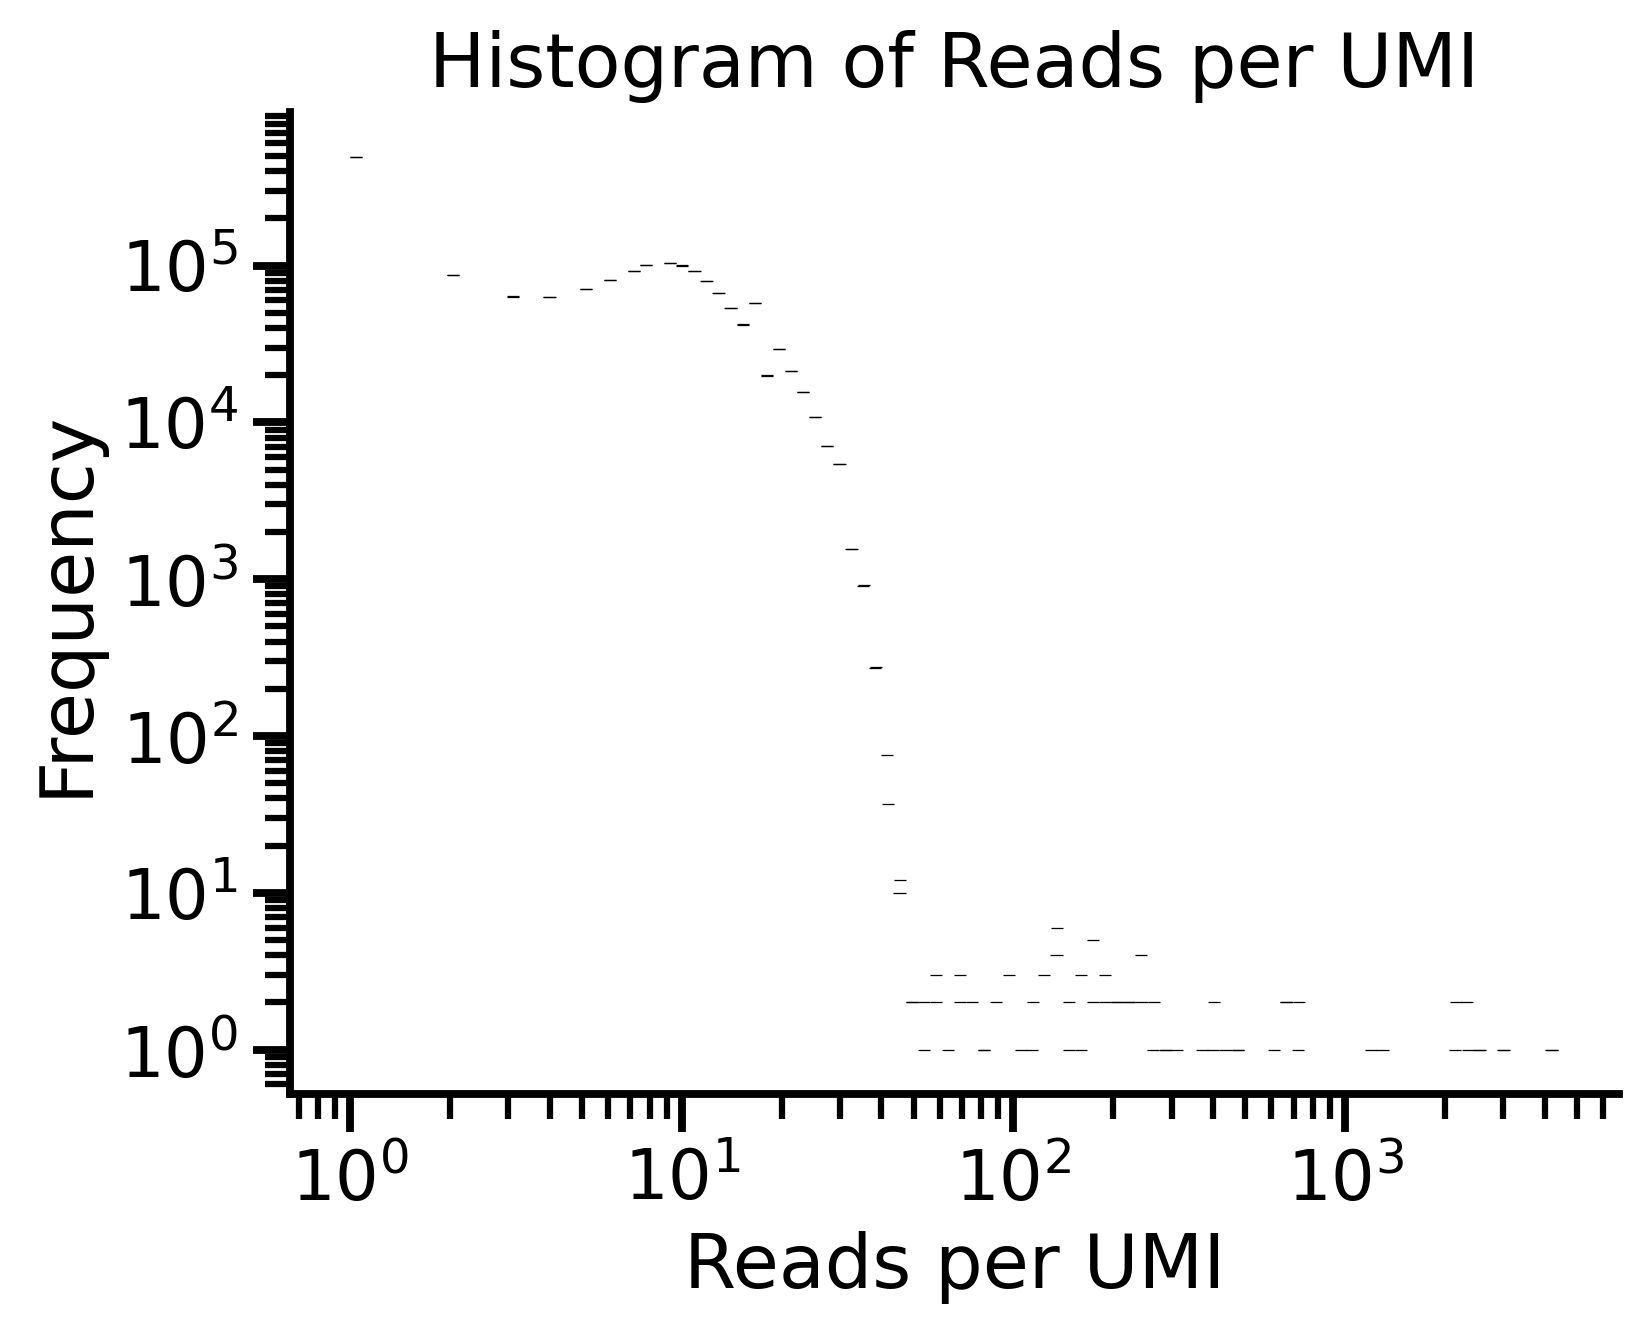

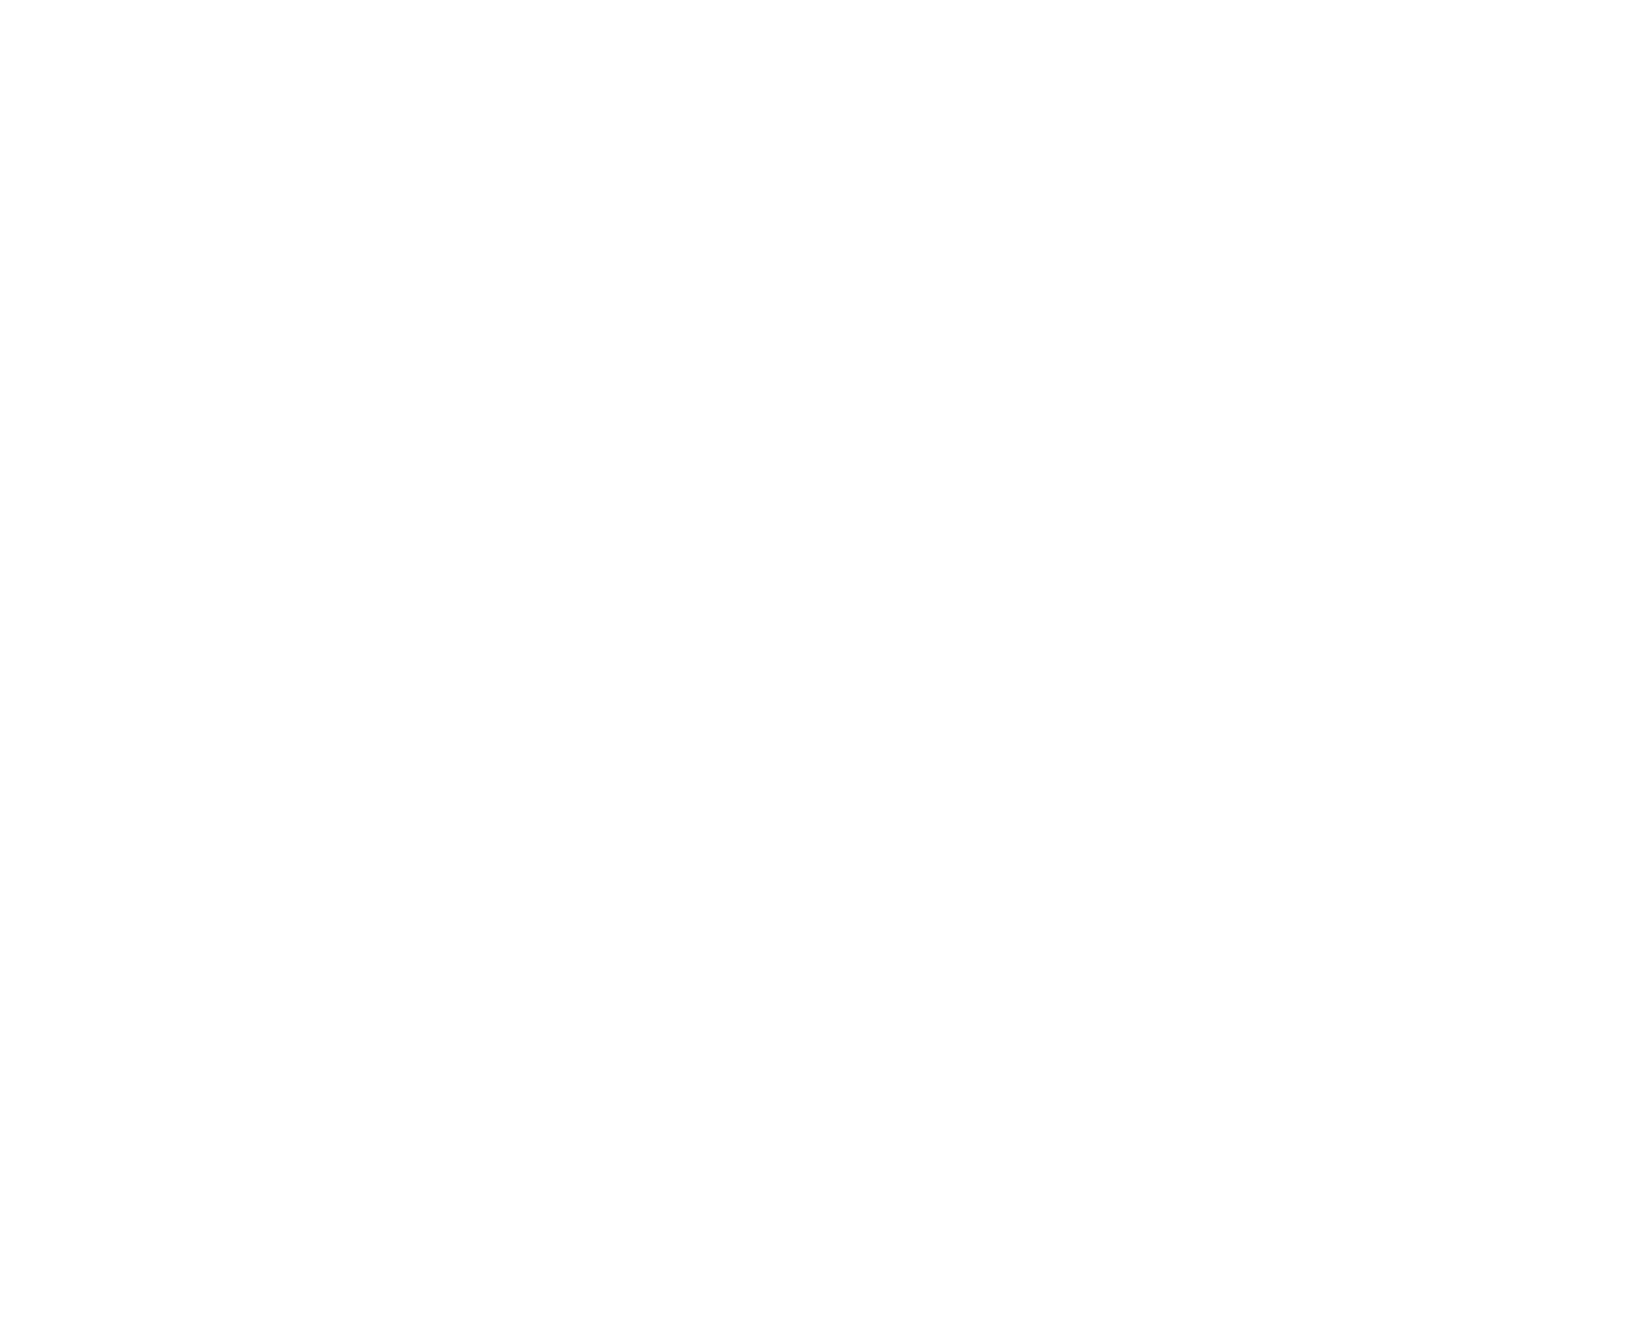

<Figure size 1800x1200 with 0 Axes>

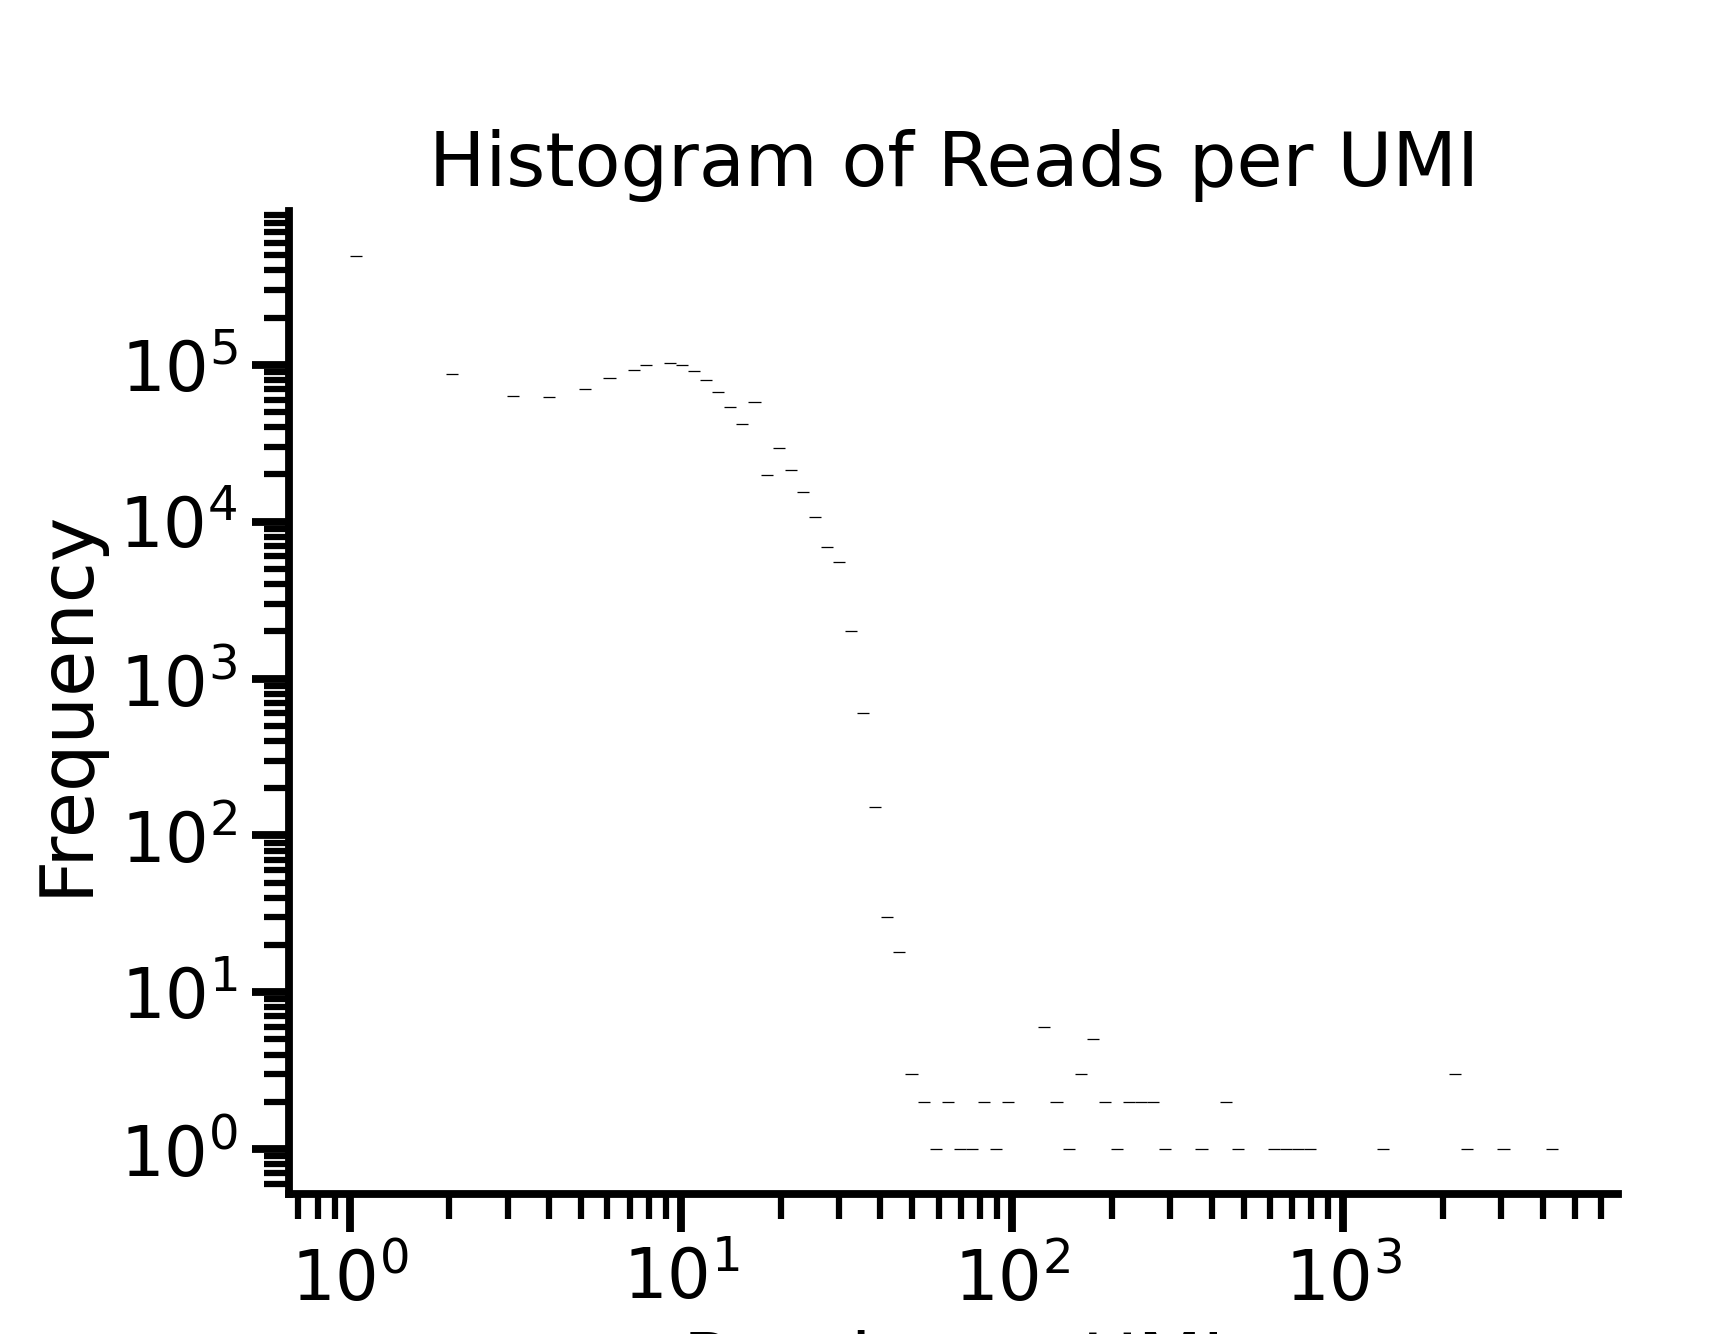

<Figure size 1800x1200 with 0 Axes>

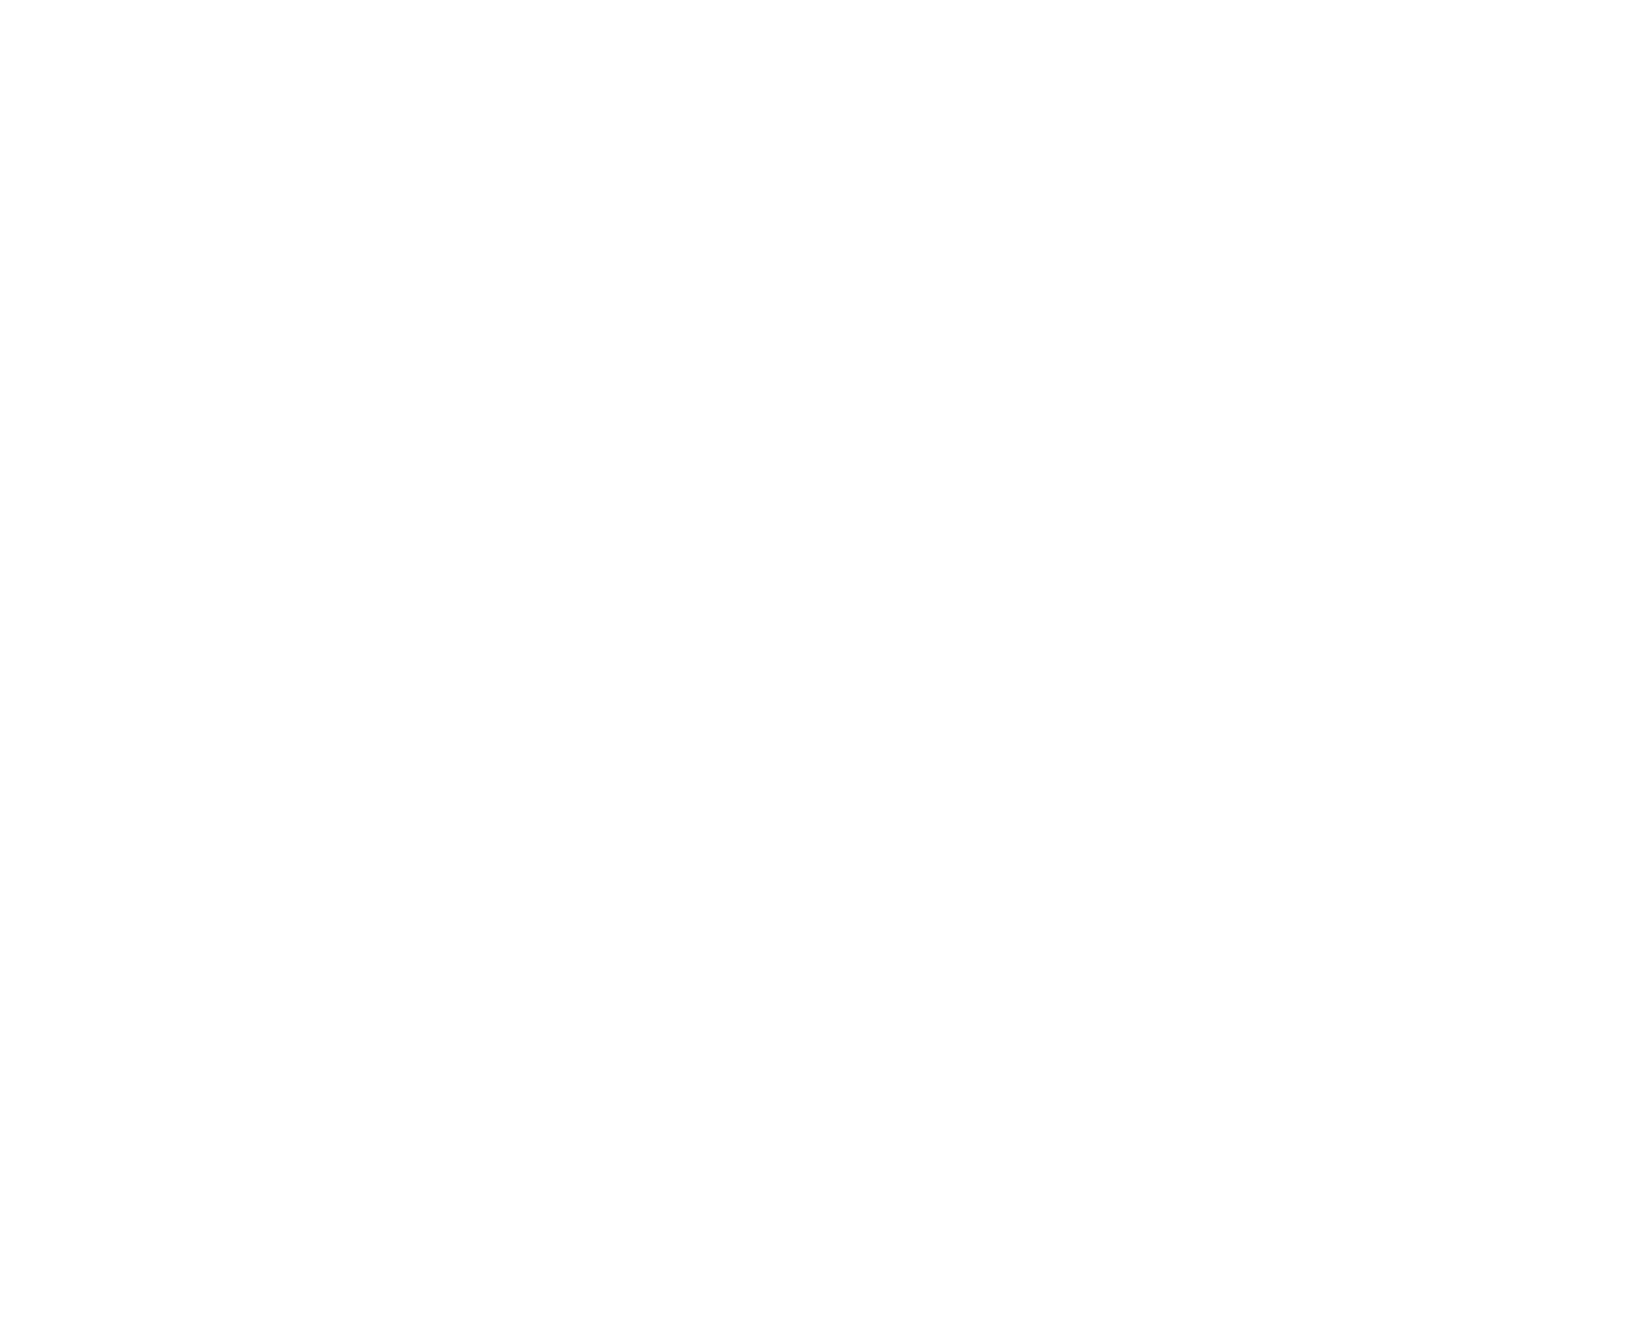

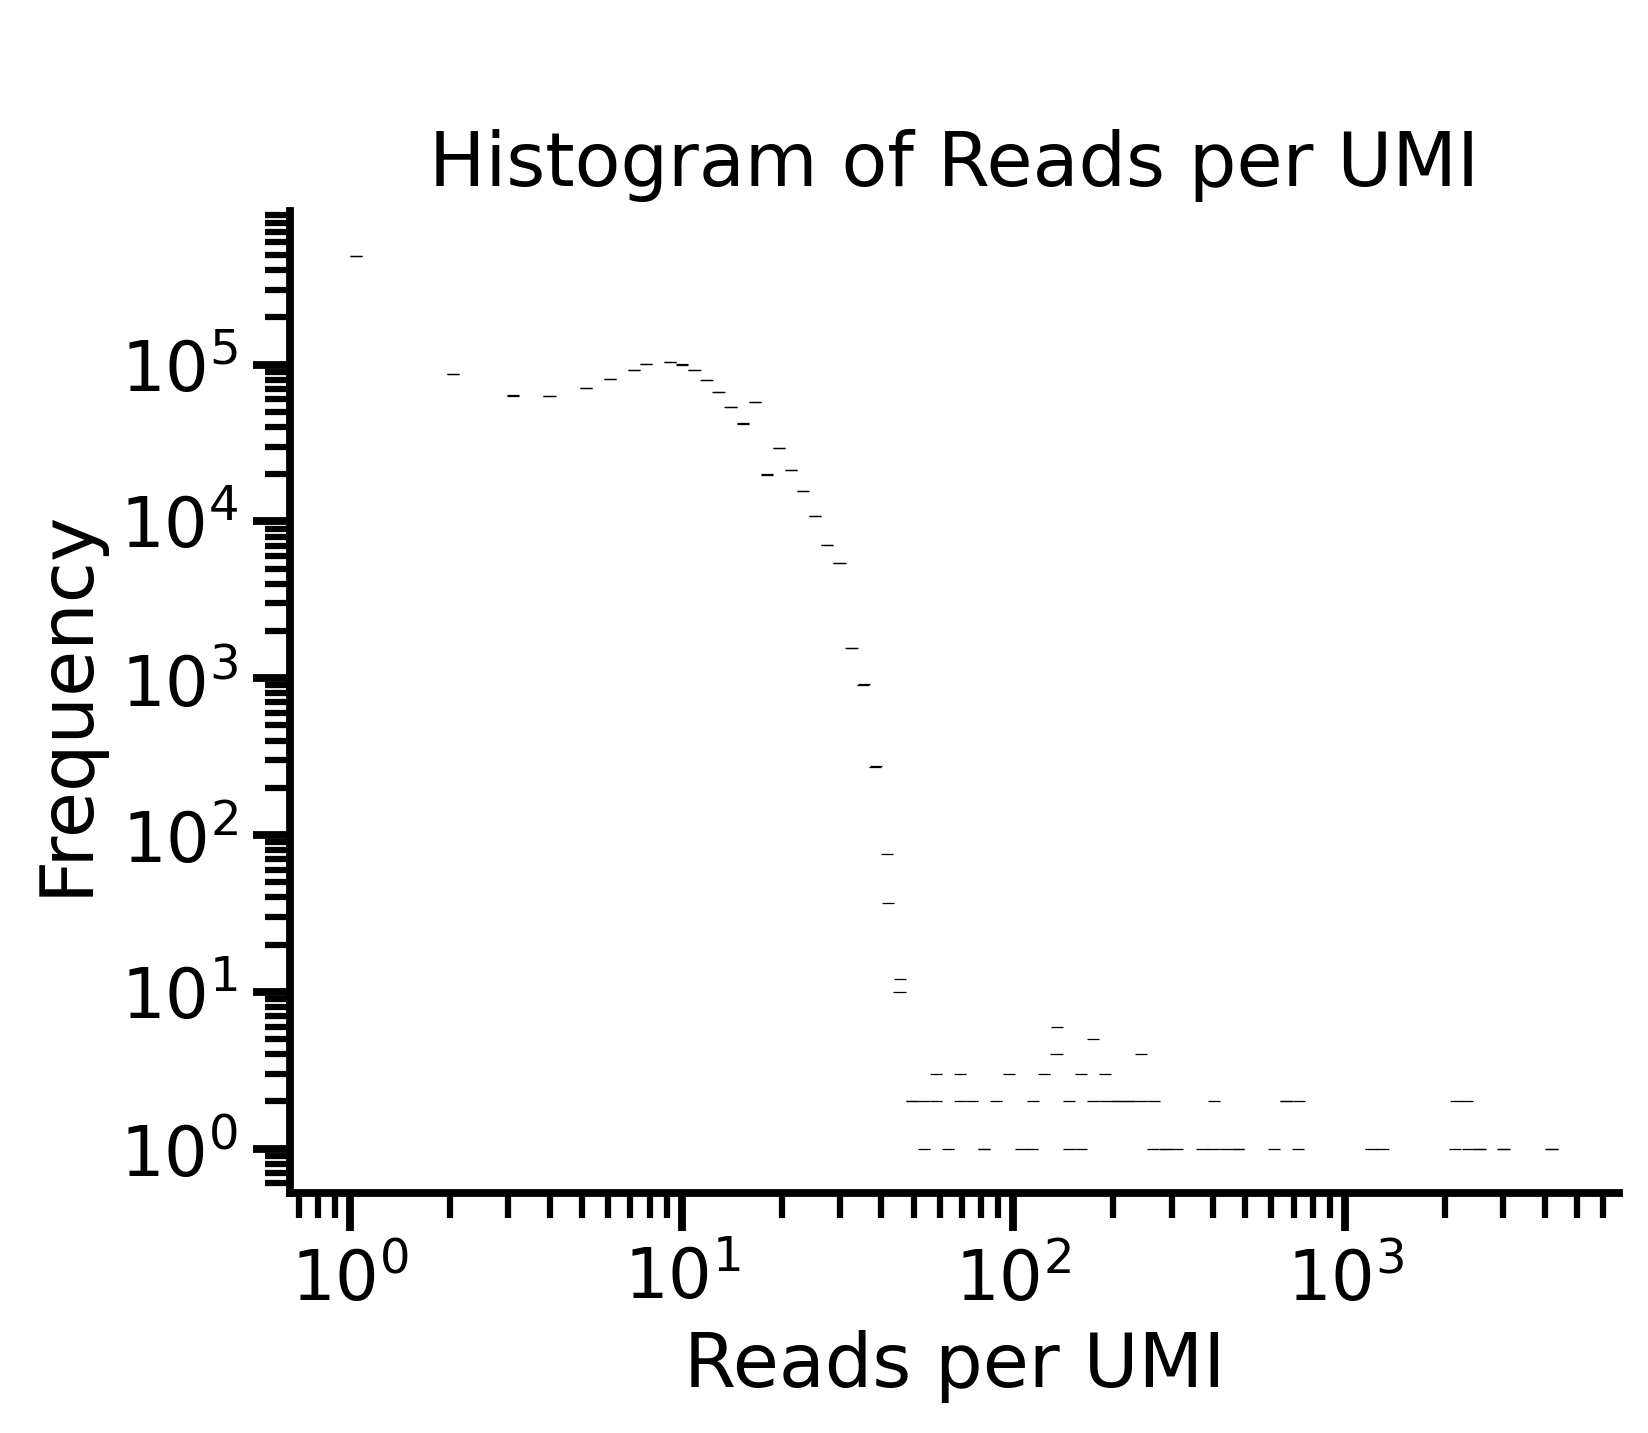

<Figure size 1800x1200 with 0 Axes>

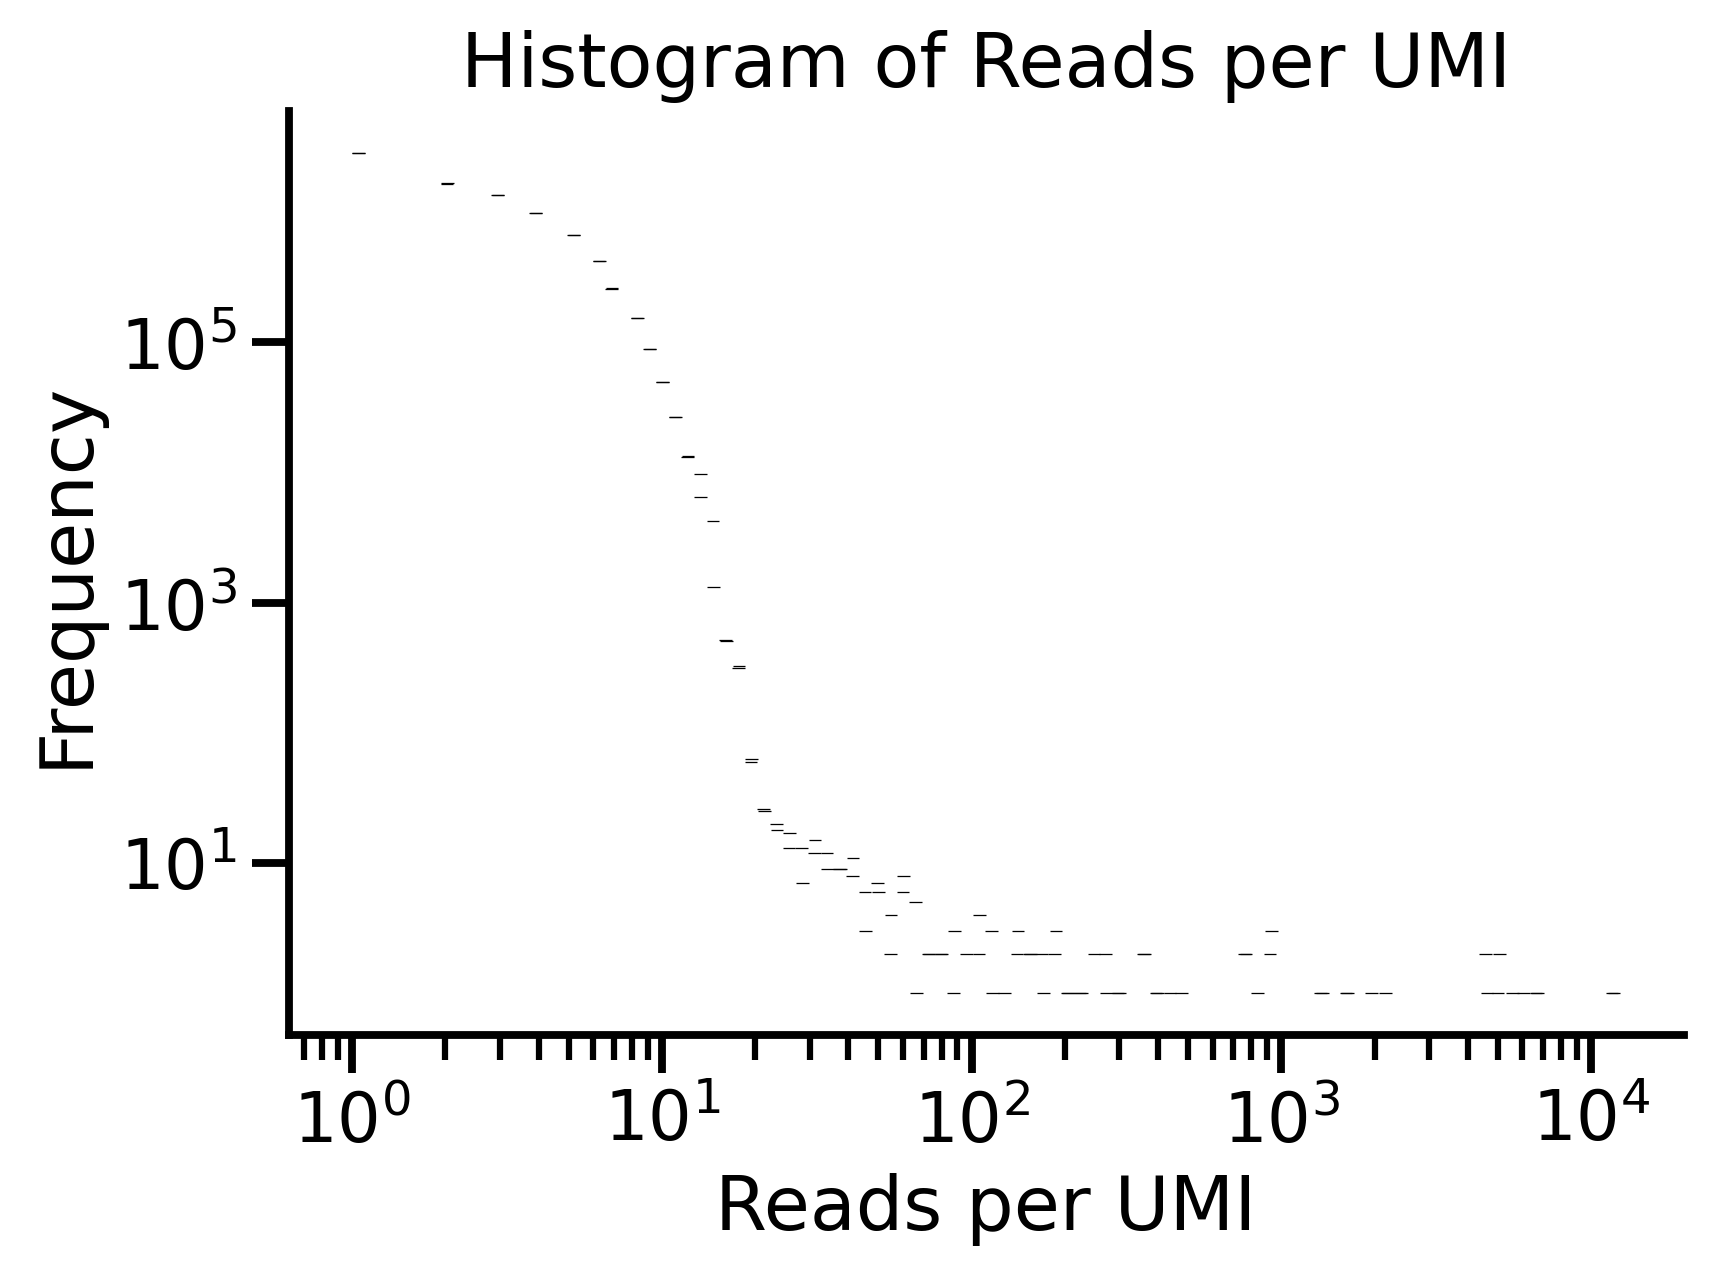

<Figure size 1800x1200 with 0 Axes>

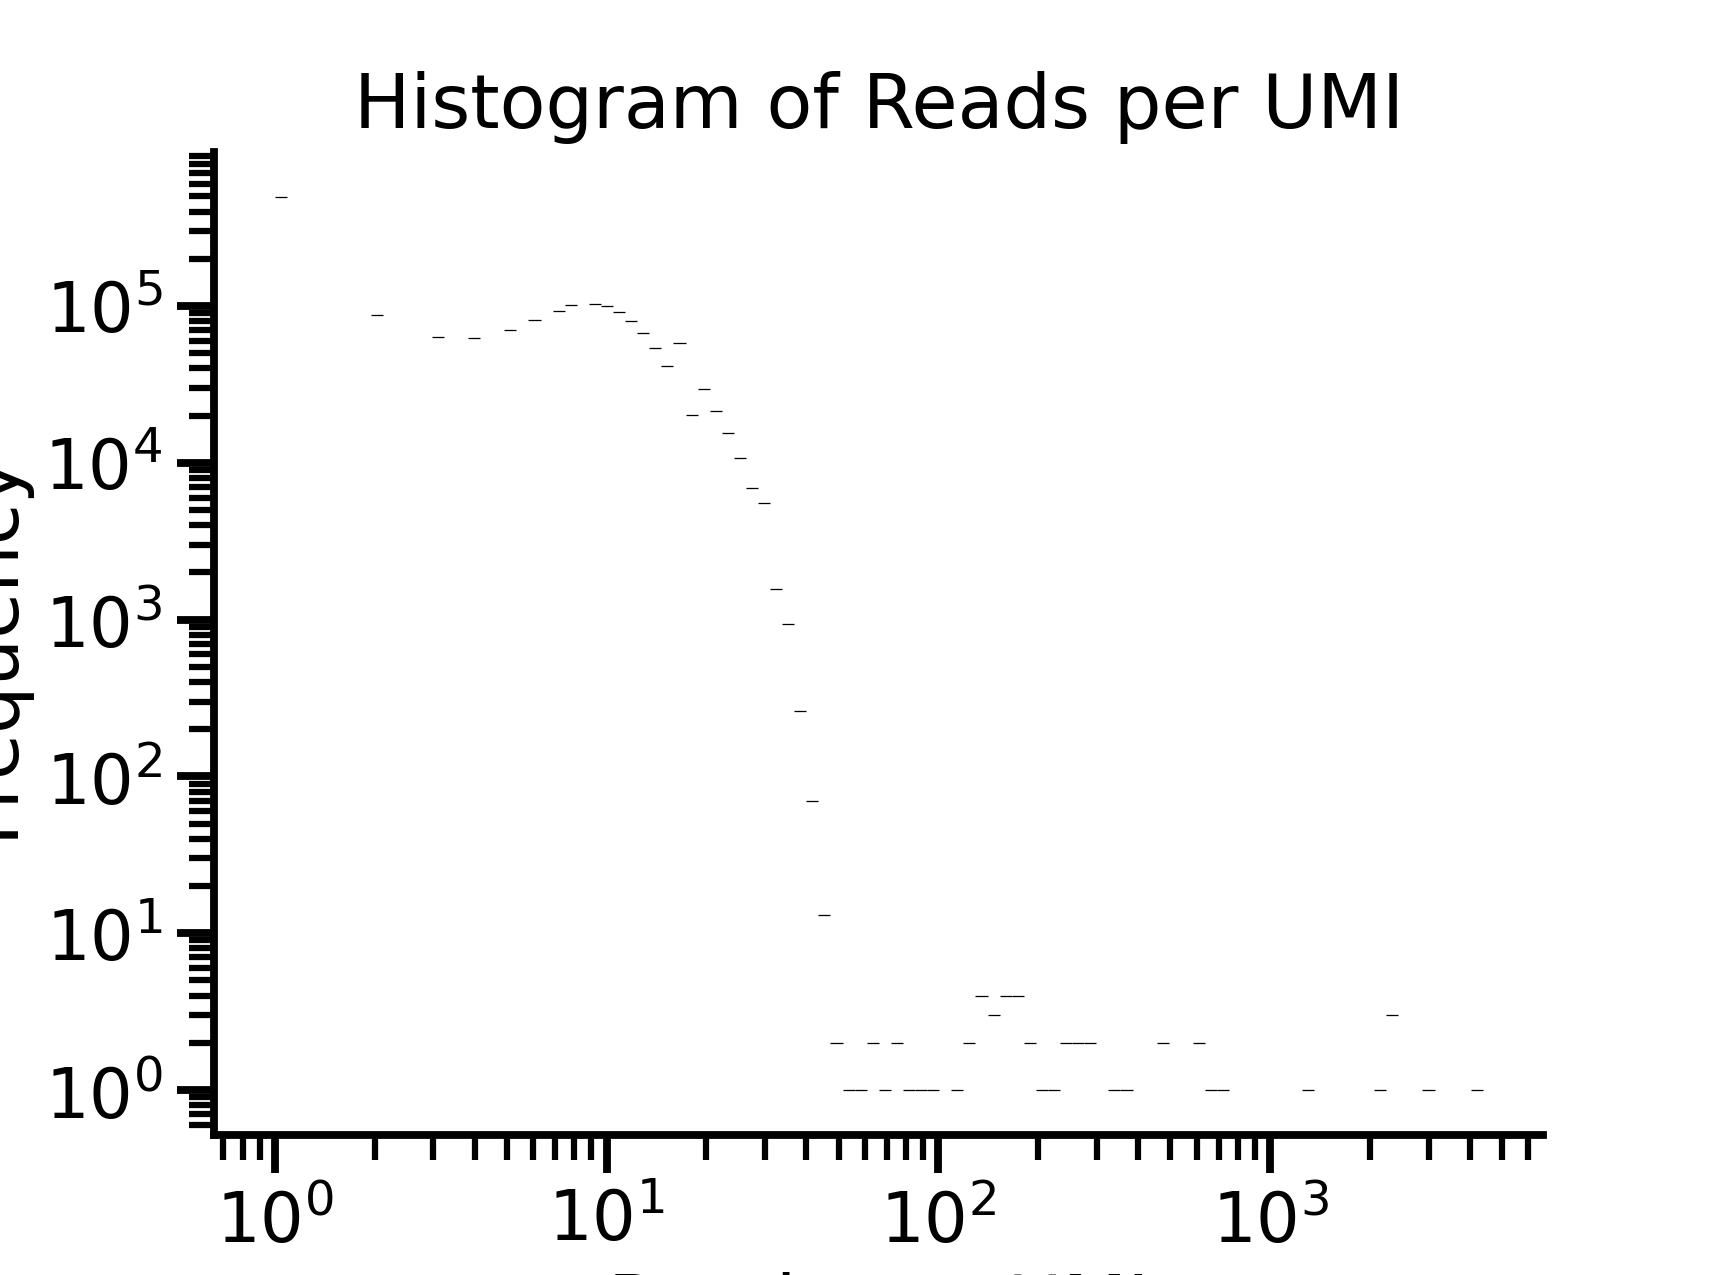

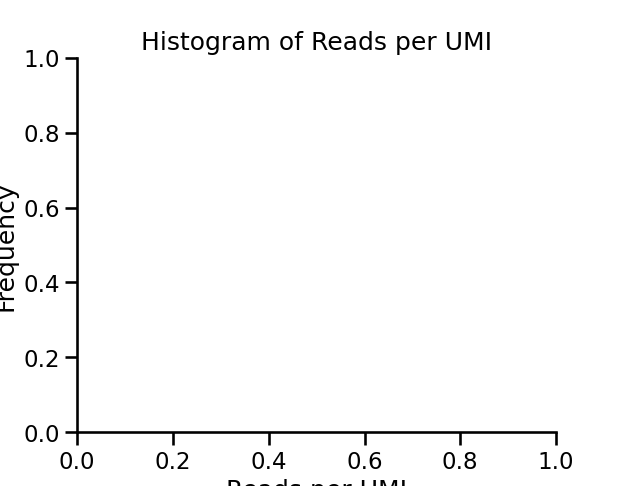

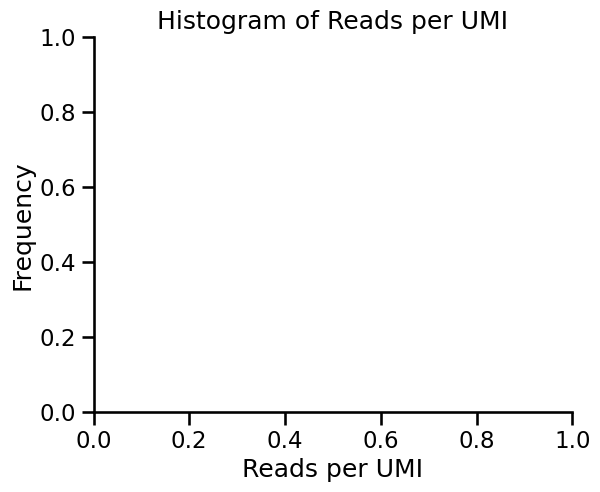

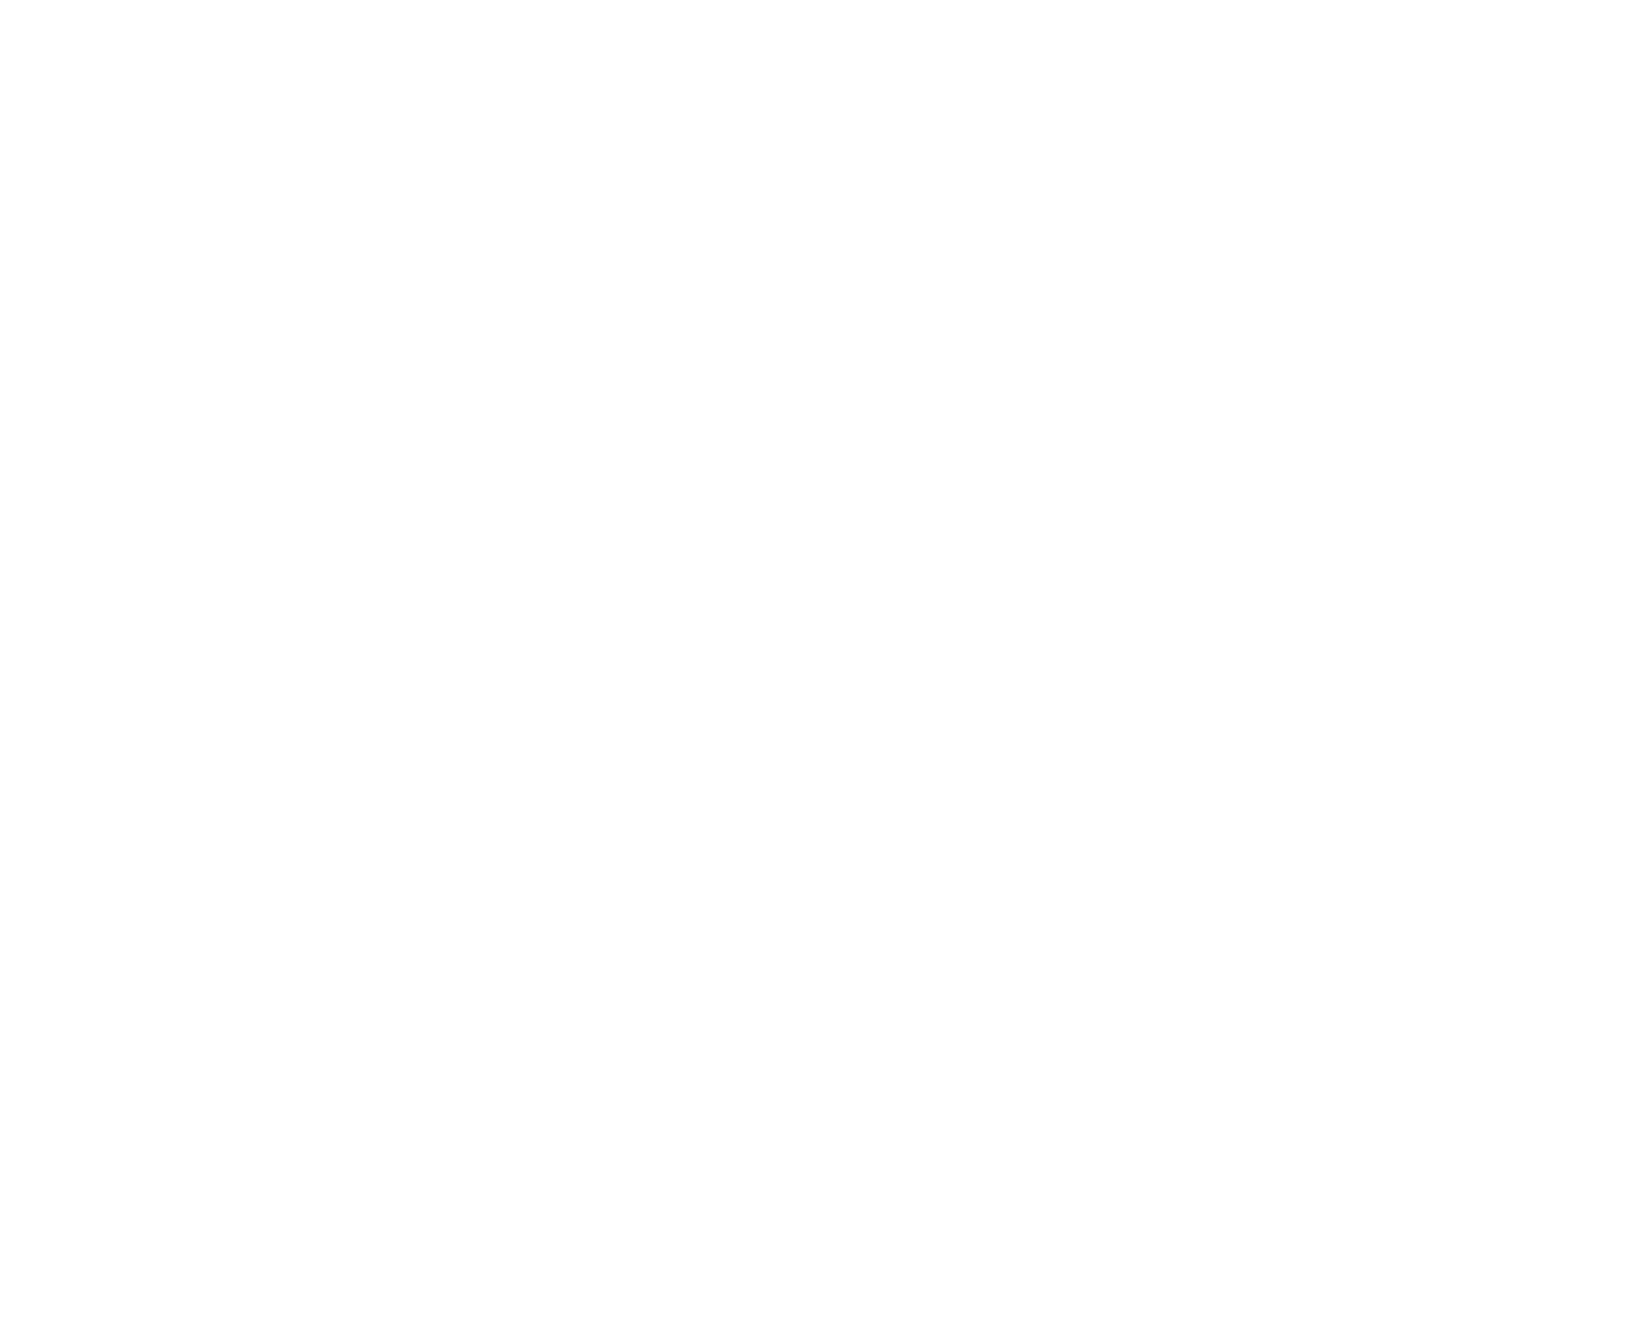

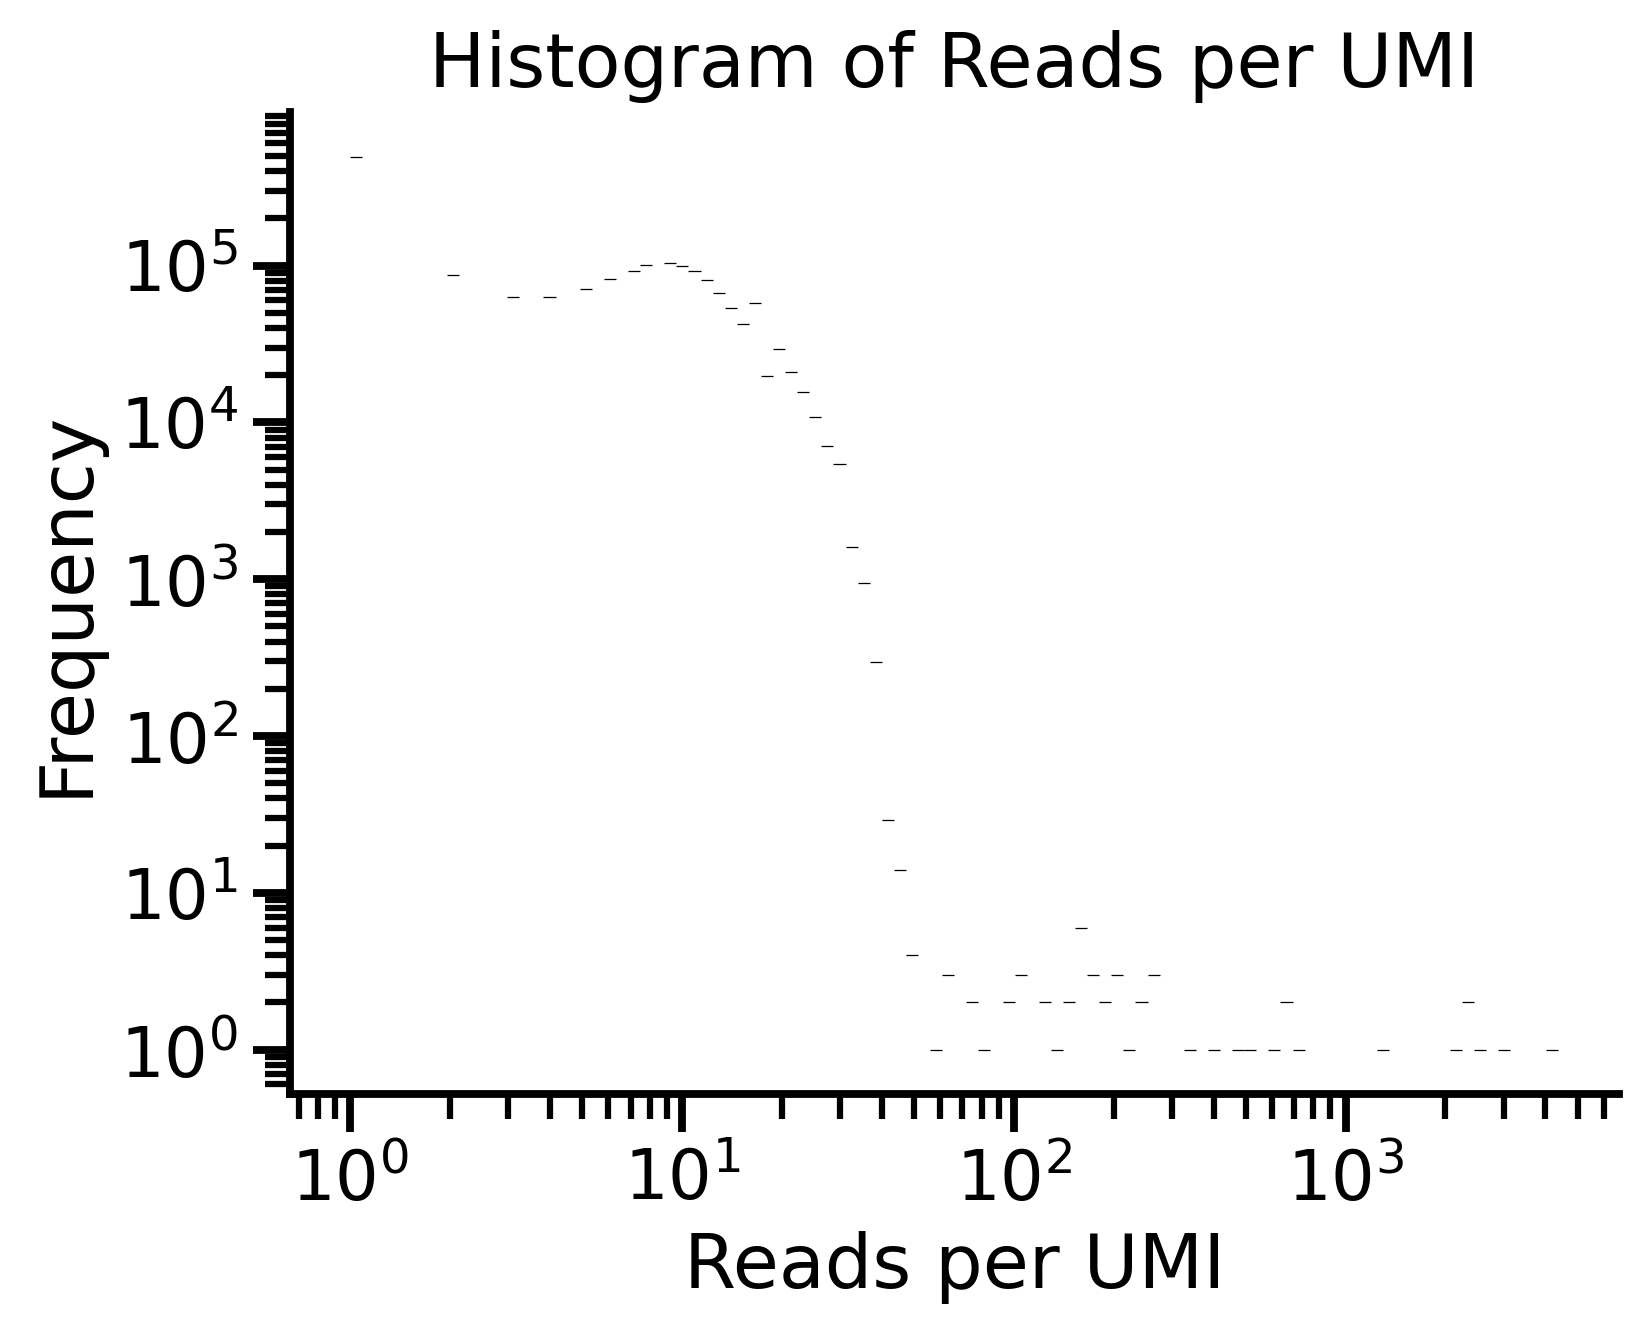

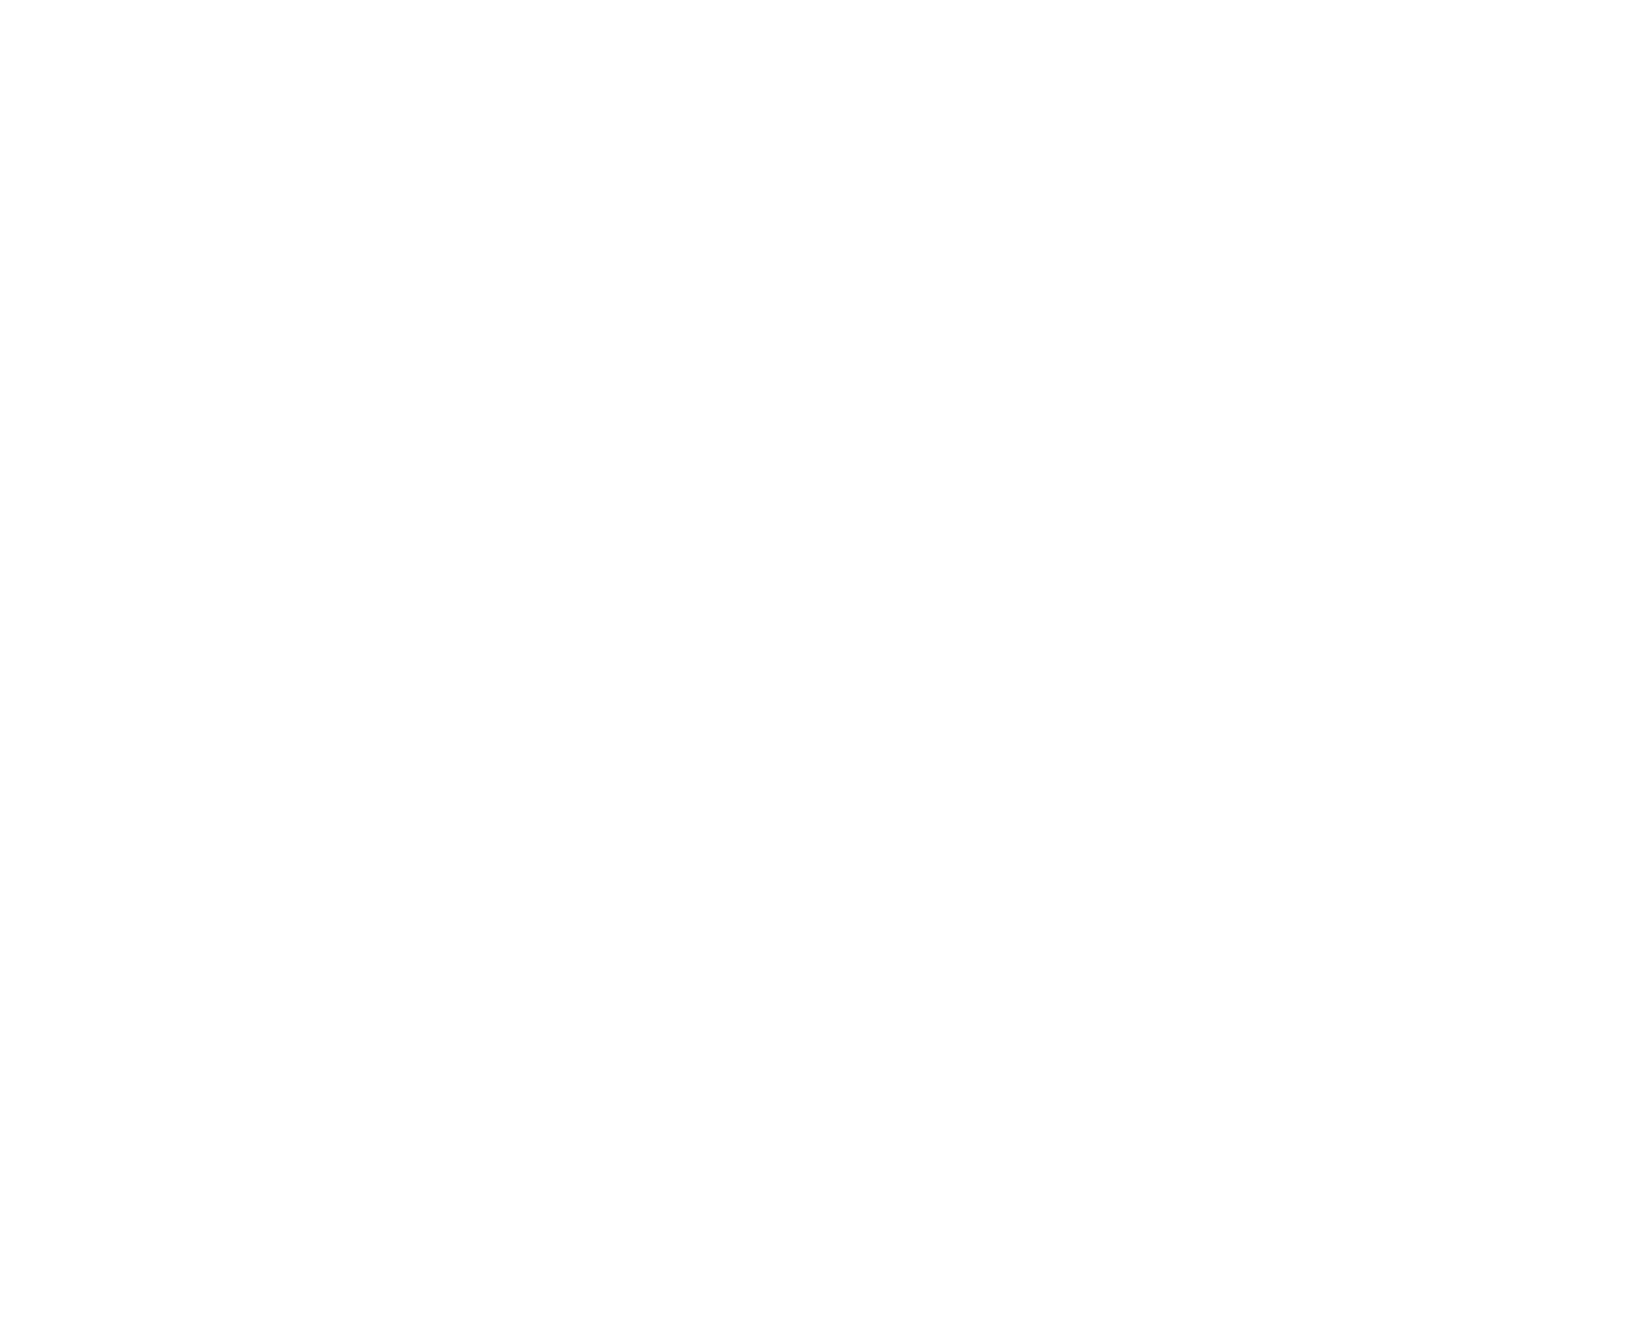

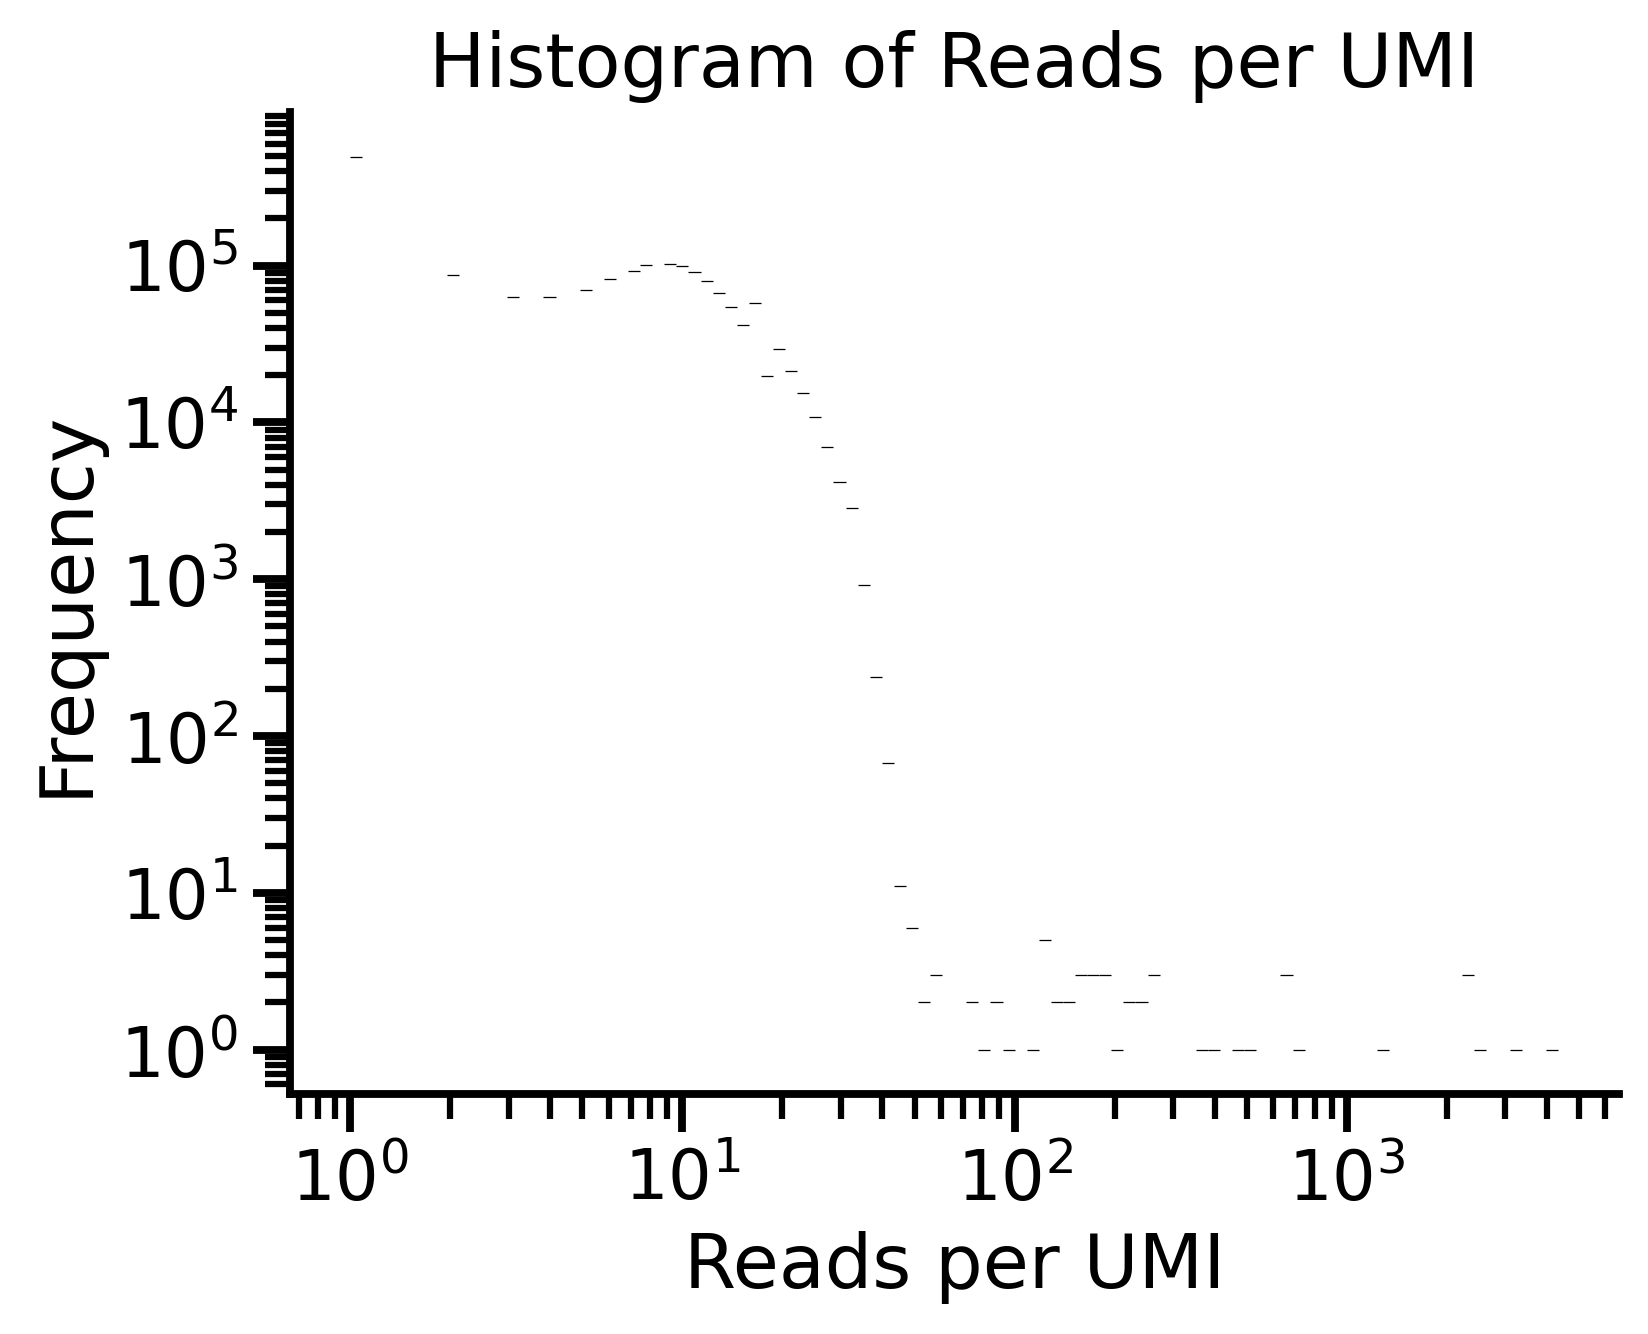

  2%|▏         | 2/113 [00:40<37:24, 20.22s/it]

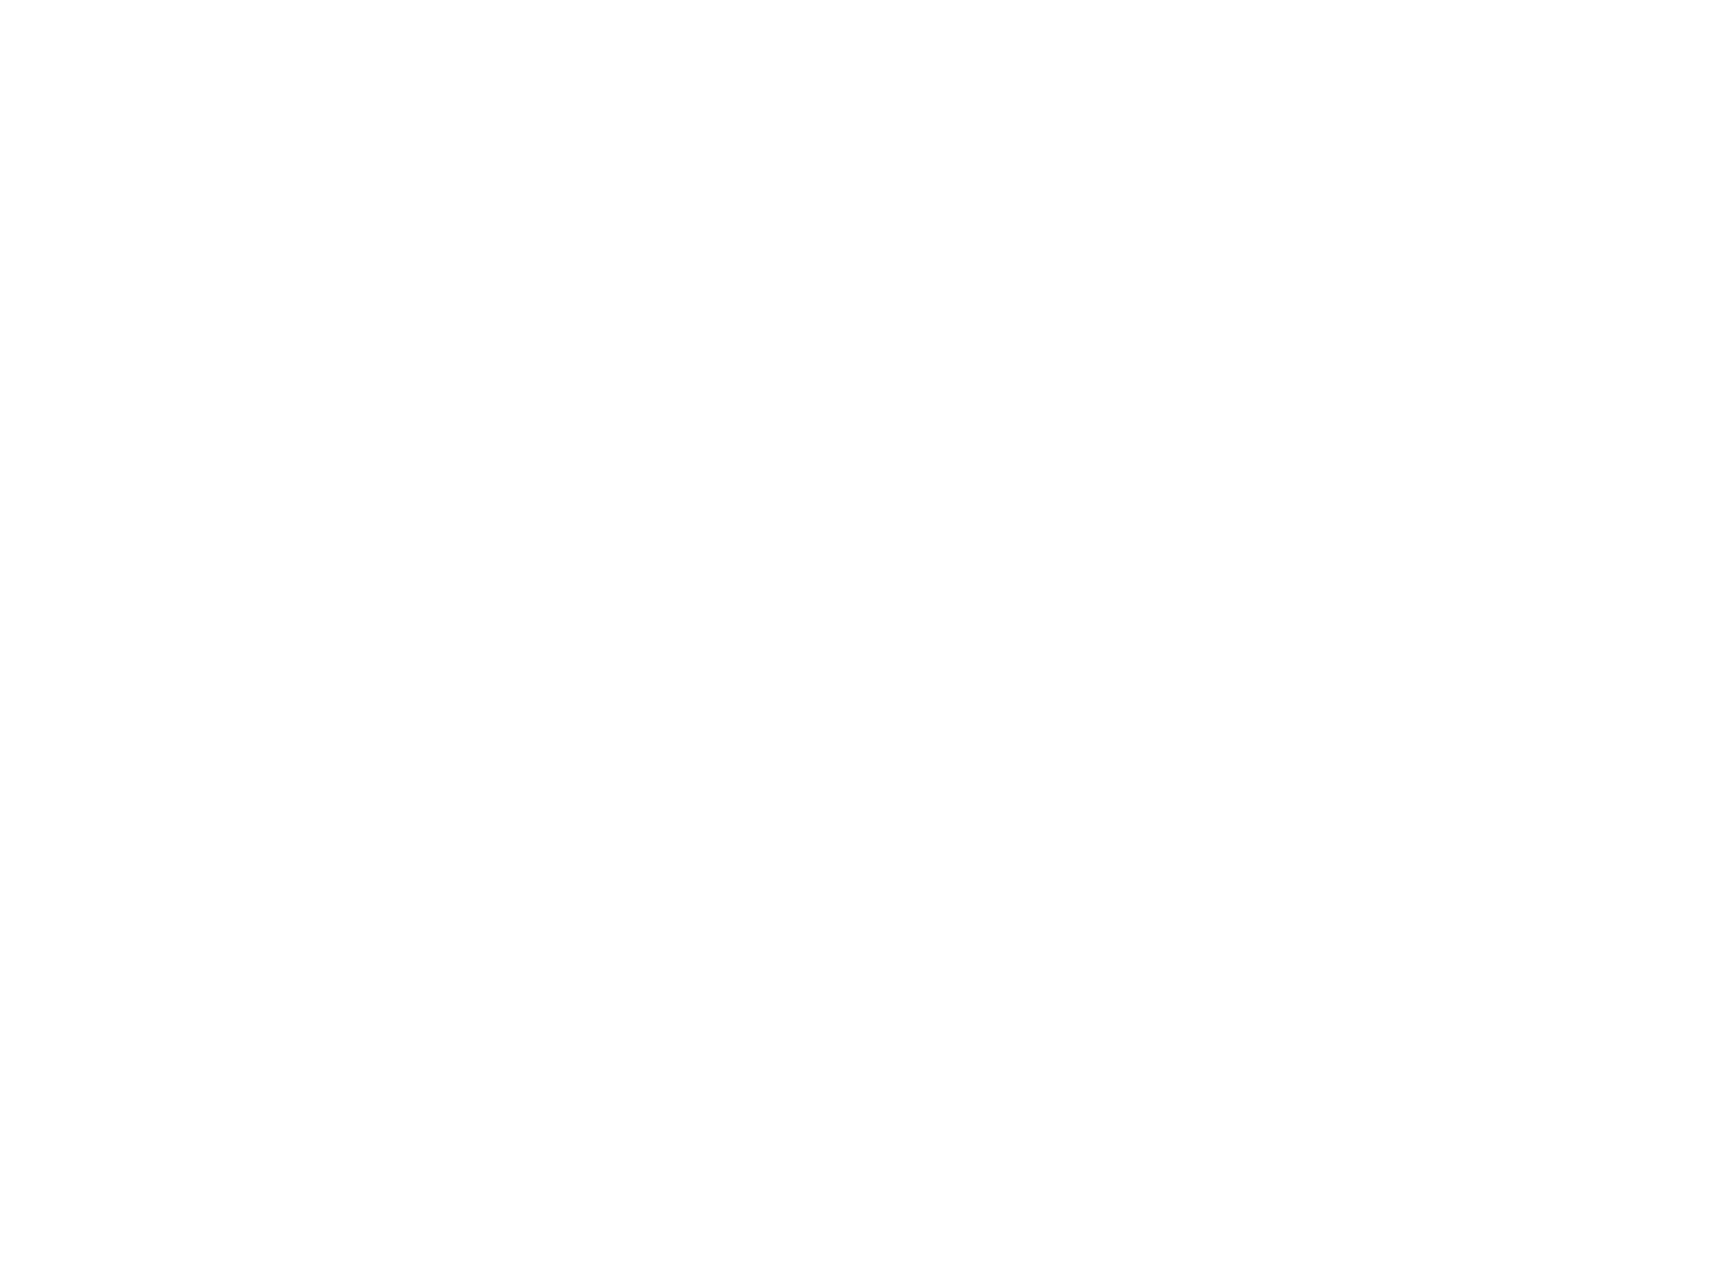

 24%|██▍       | 27/113 [00:50<02:04,  1.44s/it]

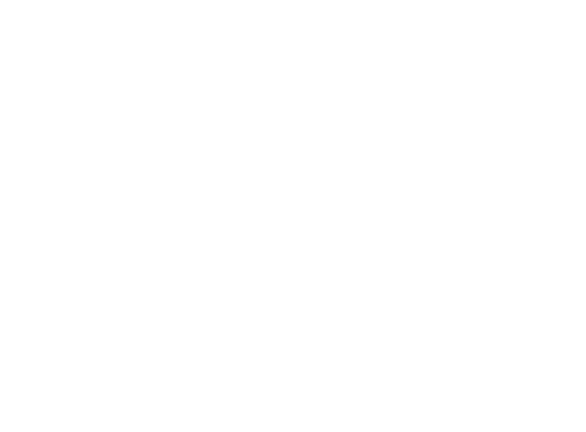

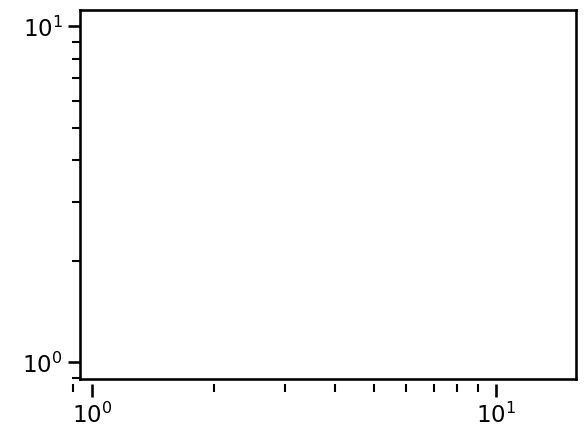

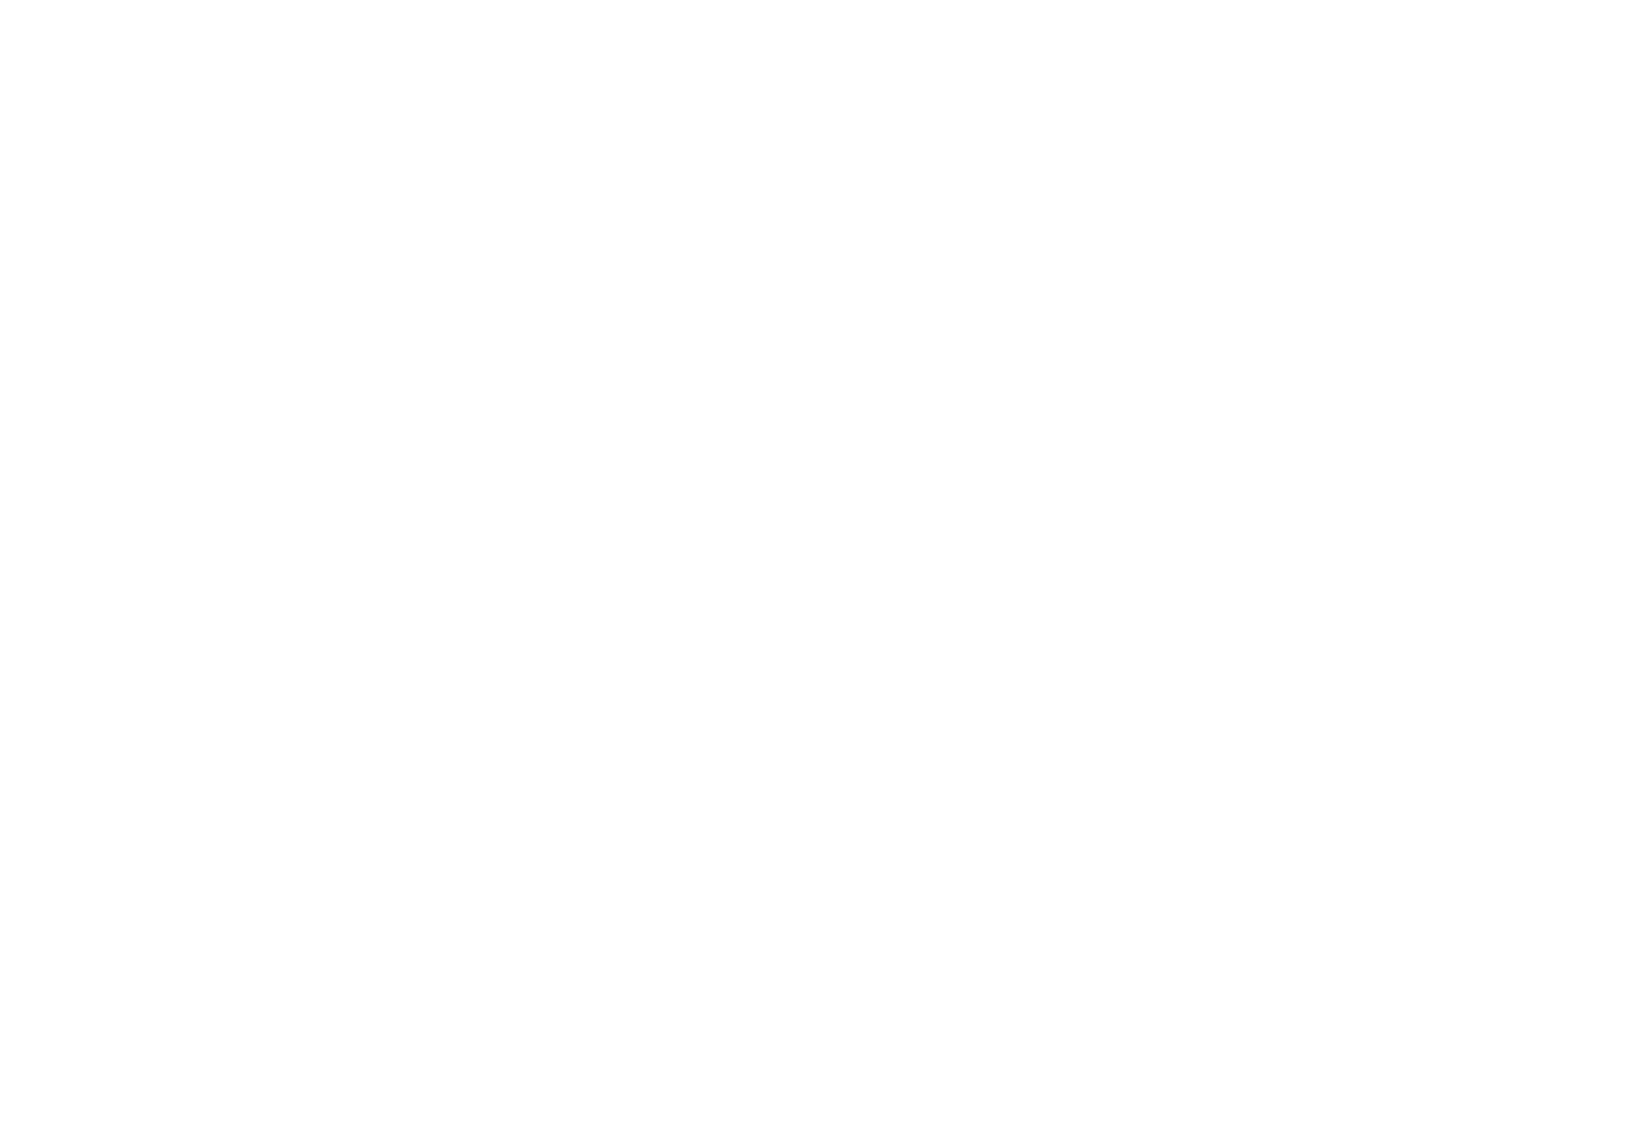

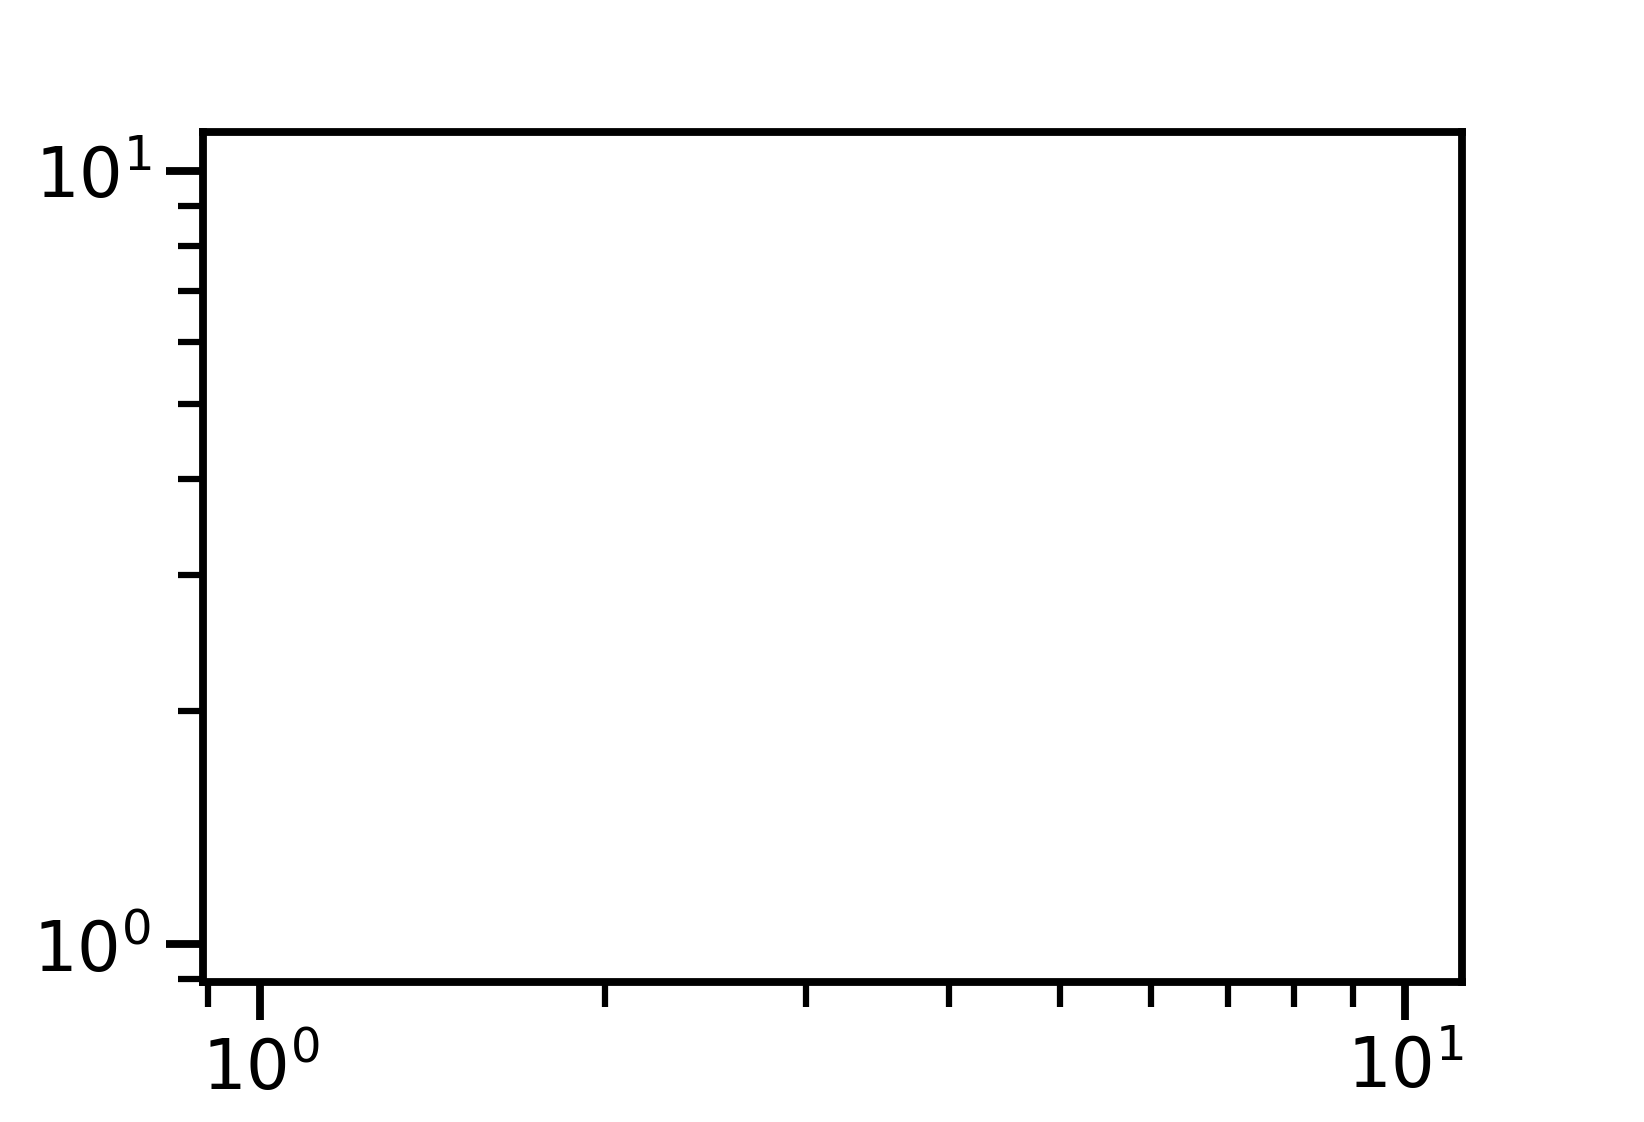

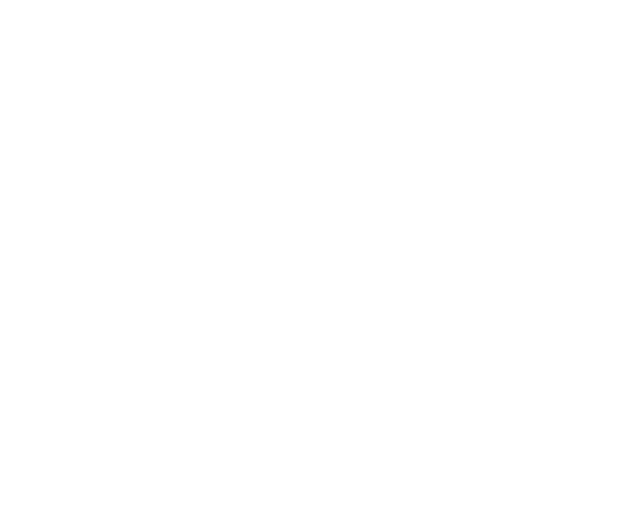

<Figure size 1800x1200 with 0 Axes>

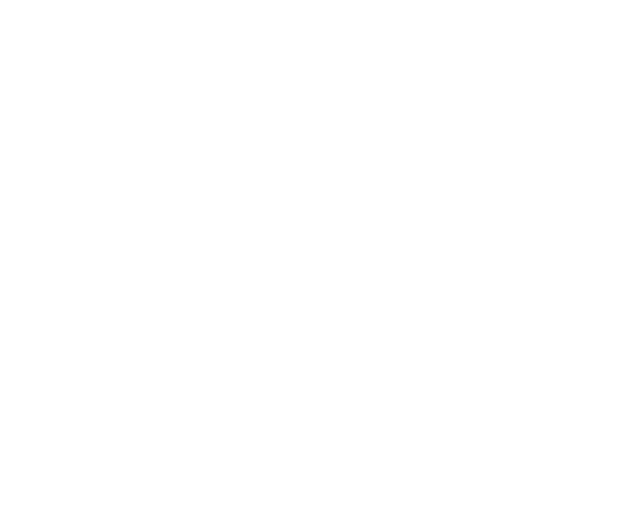

<Figure size 1800x1200 with 0 Axes>

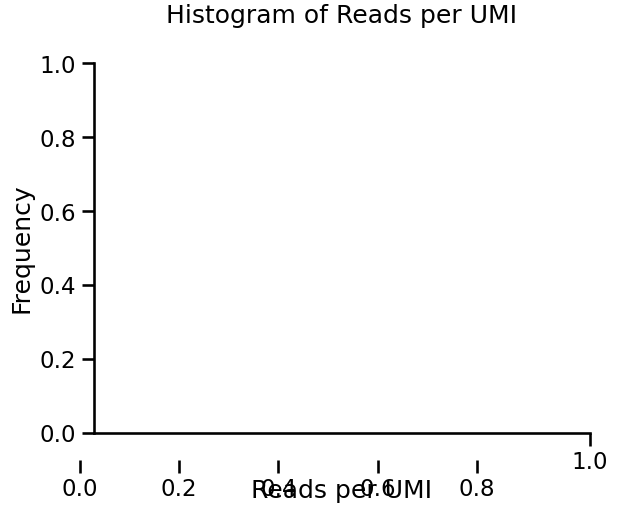

<Figure size 1800x1200 with 0 Axes>

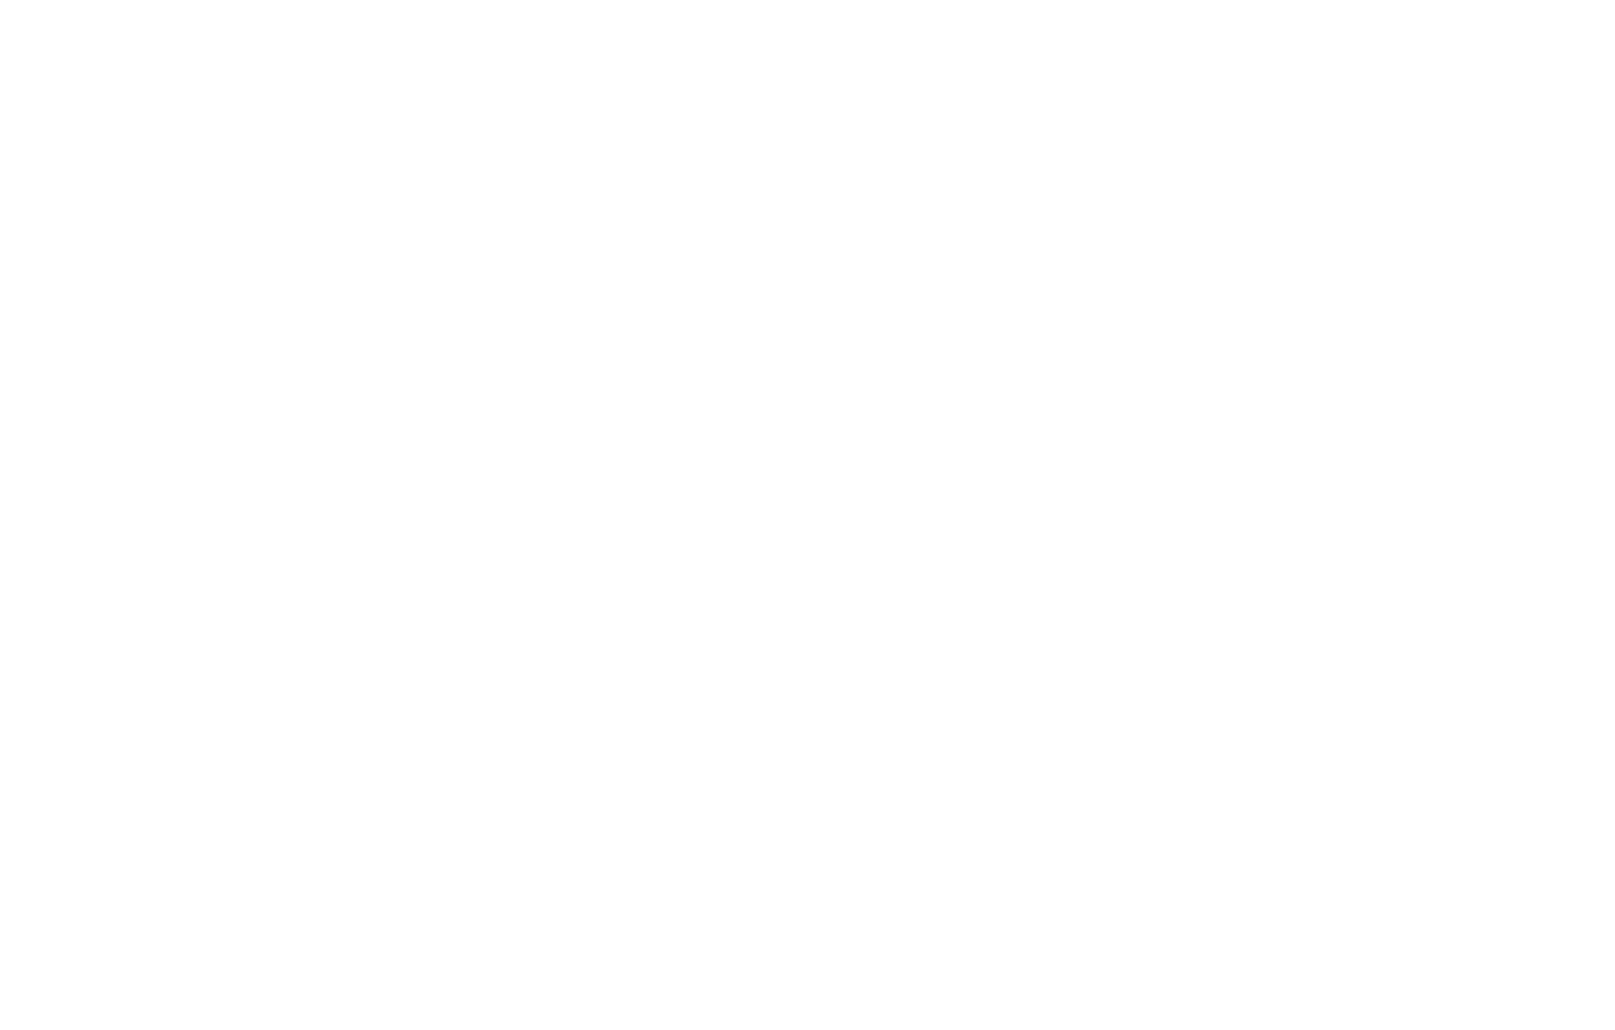

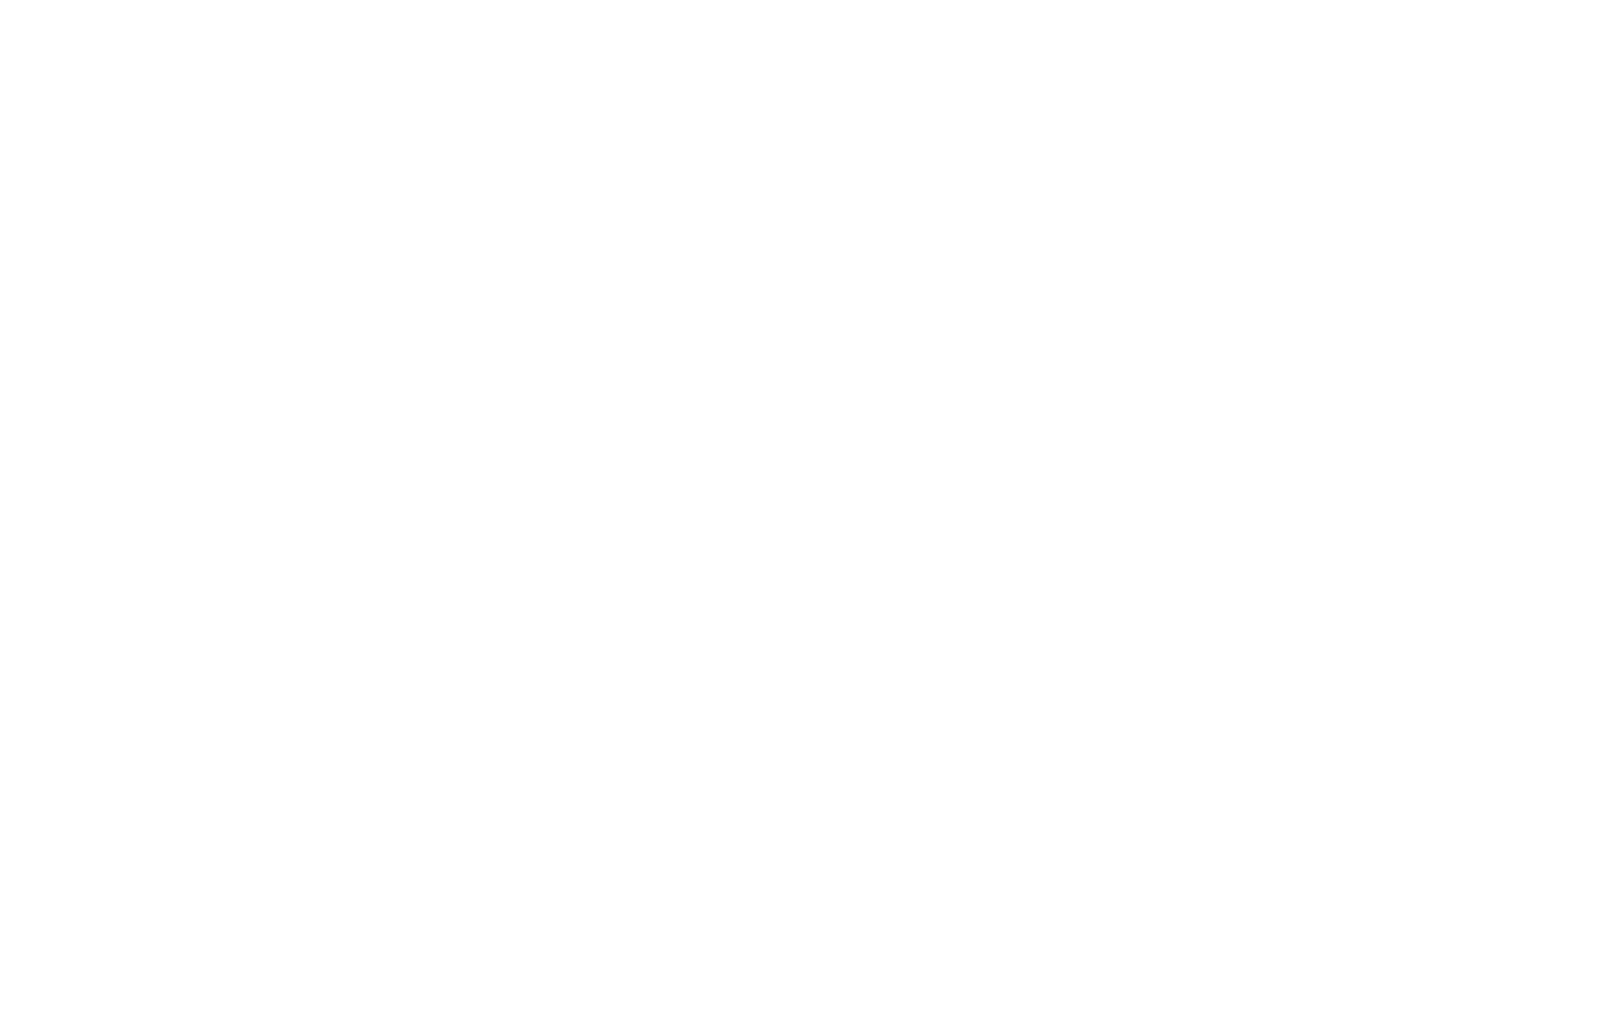

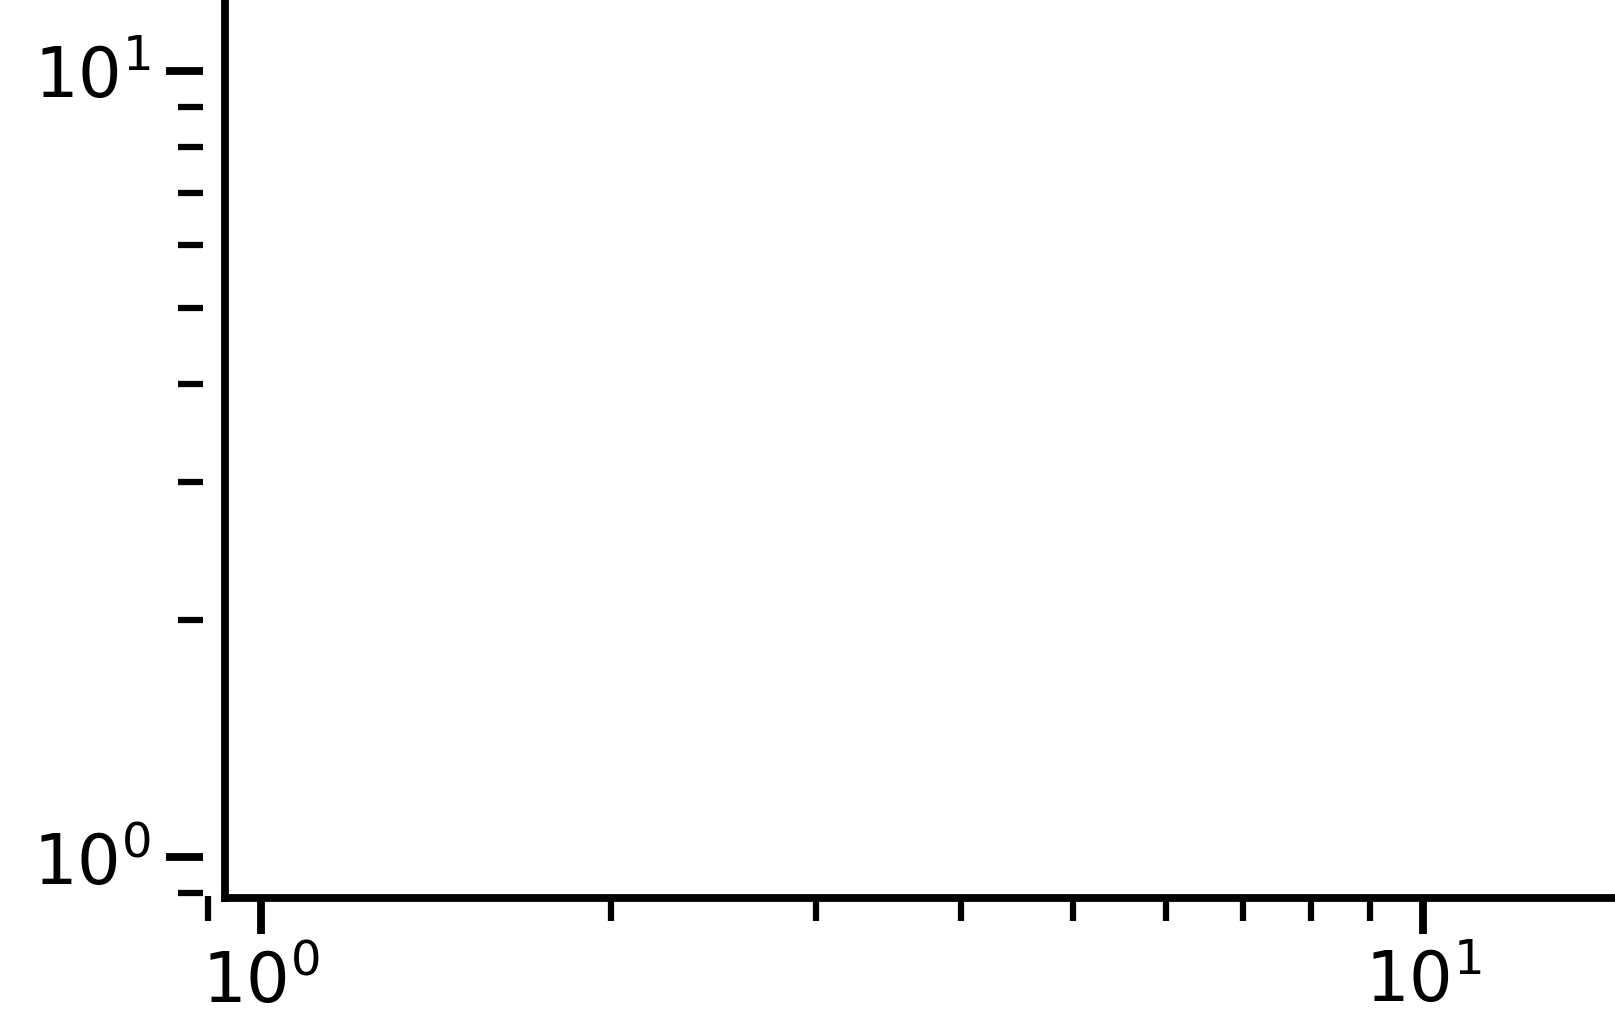

 26%|██▌       | 29/113 [01:02<02:39,  1.90s/it]

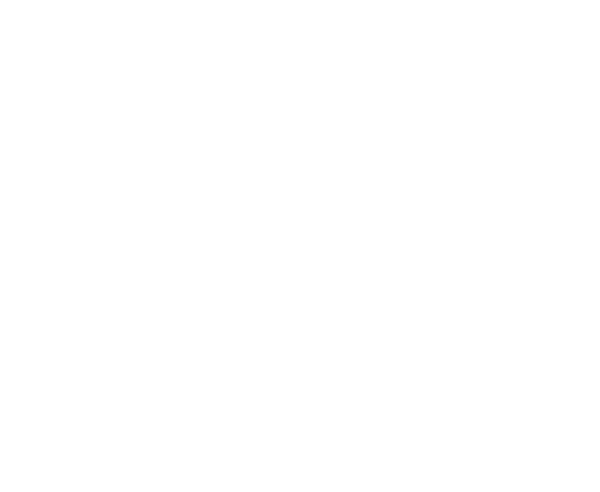

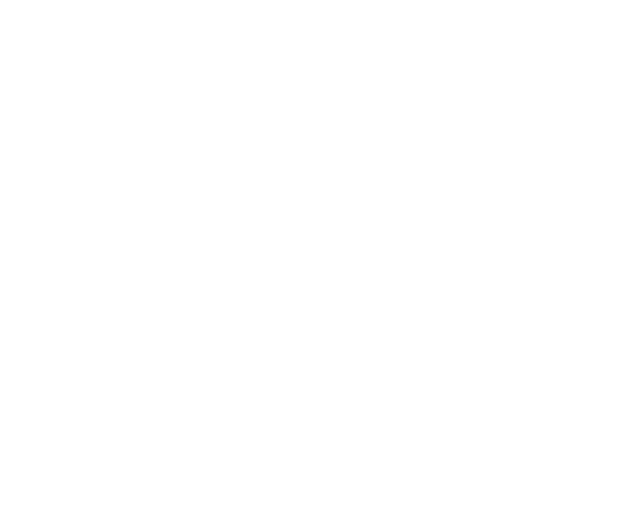

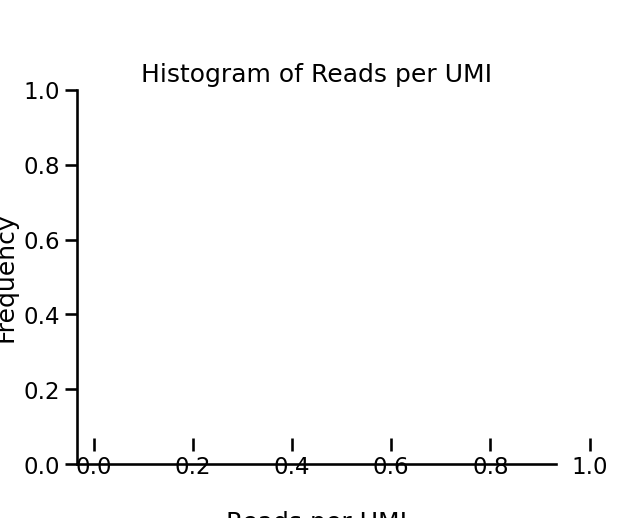

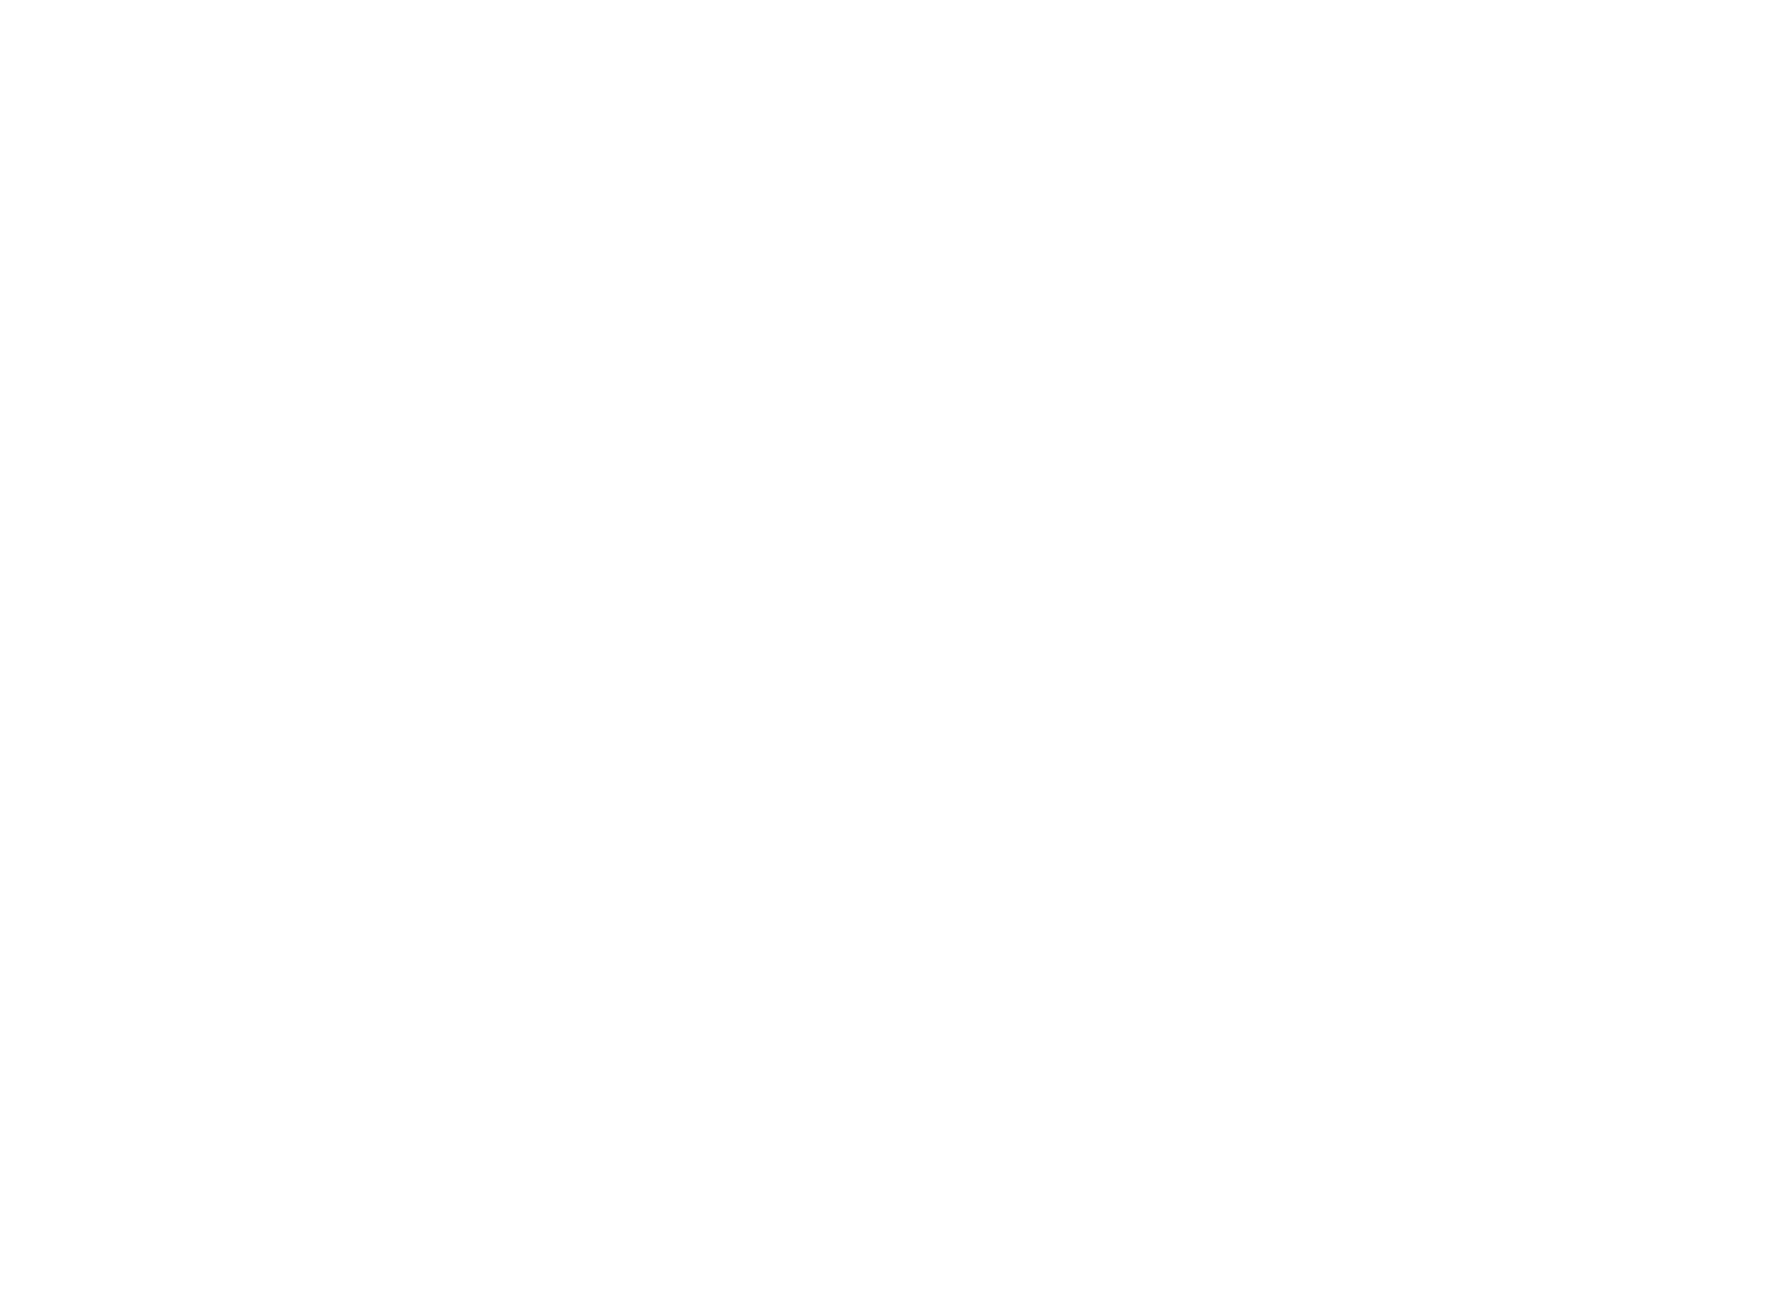

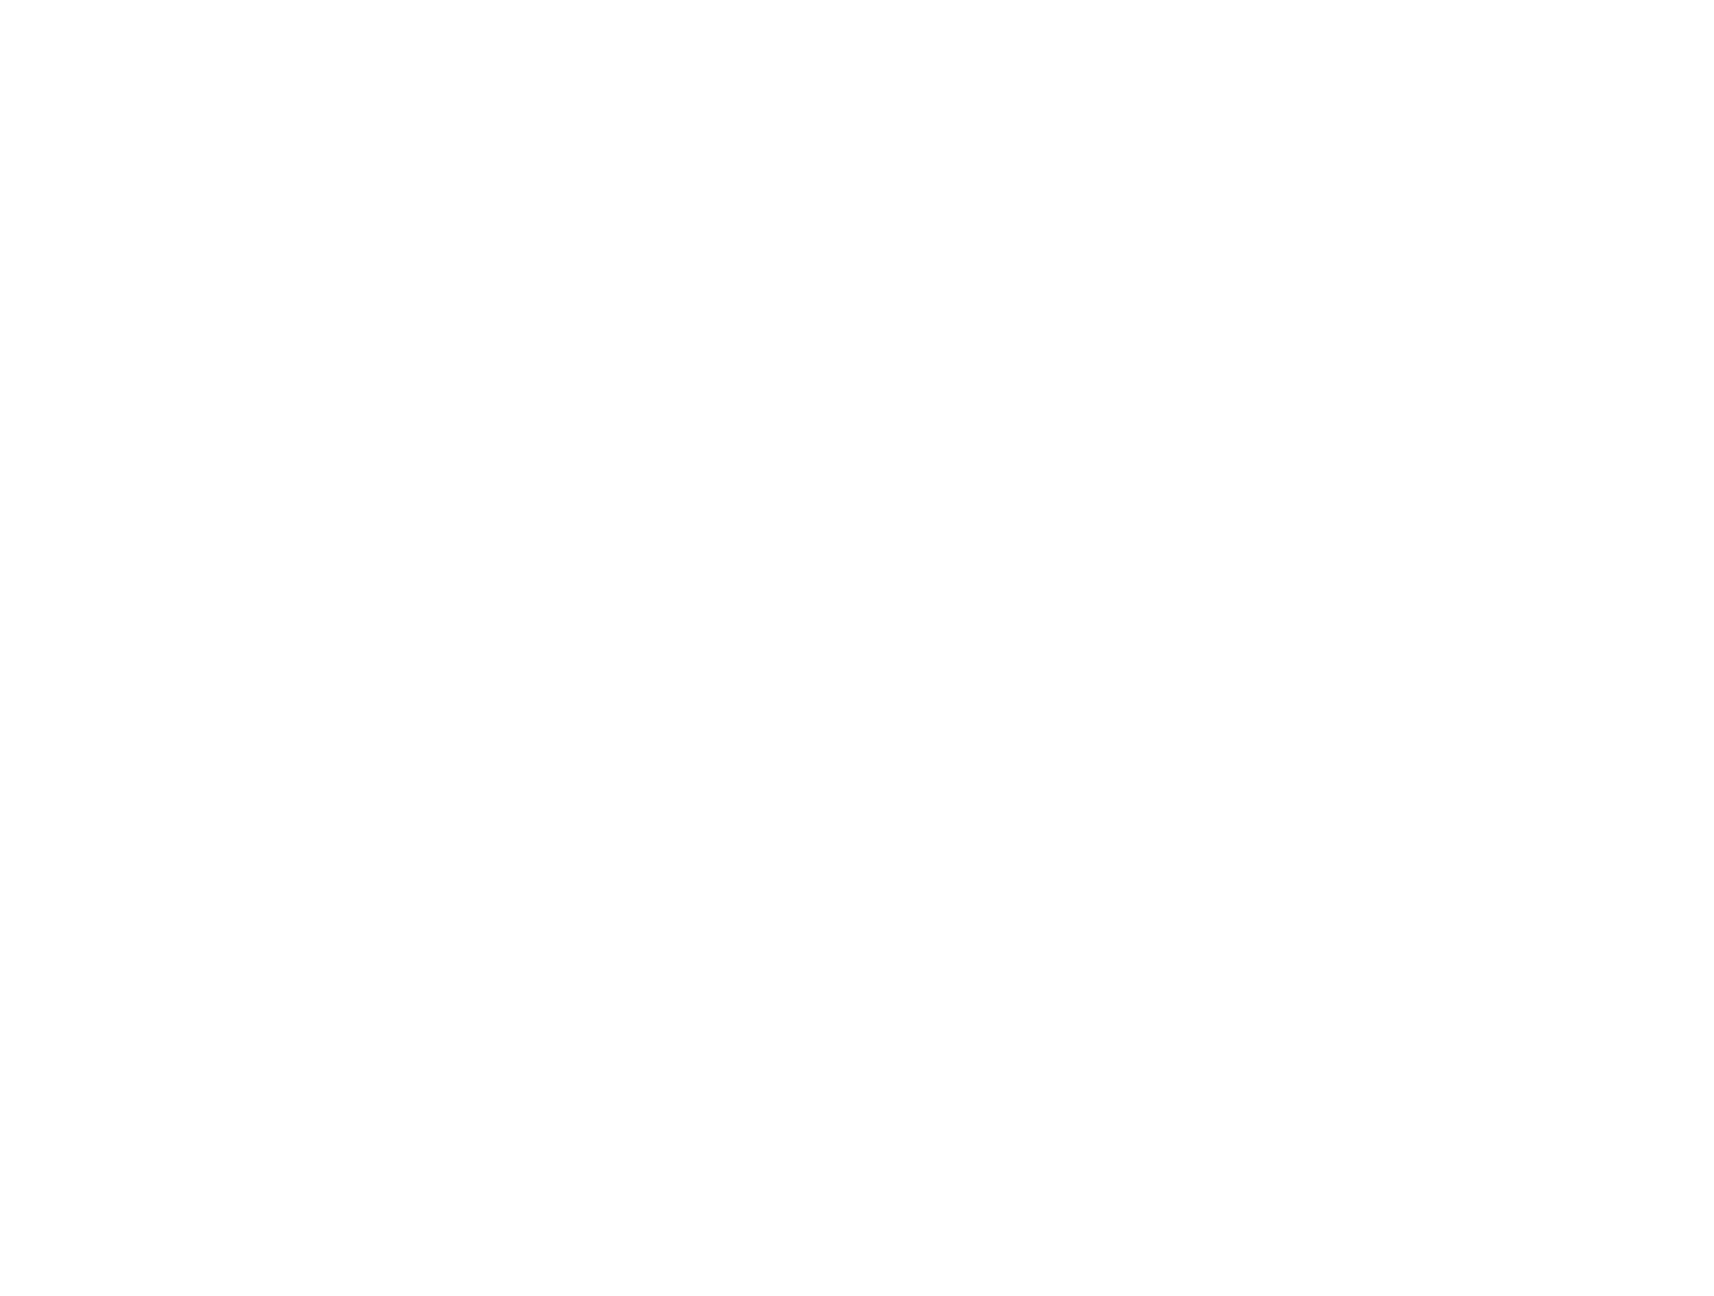

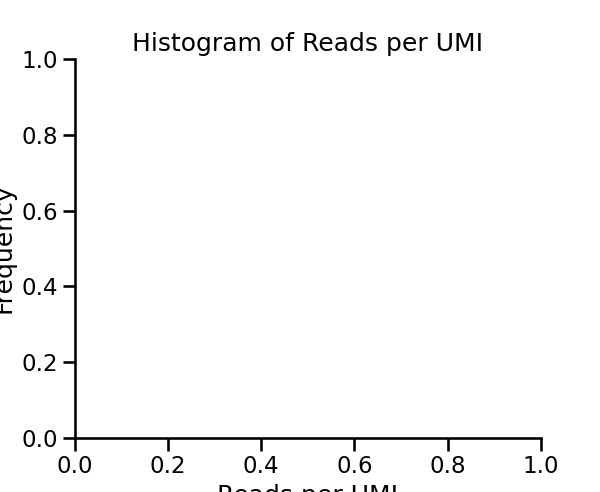

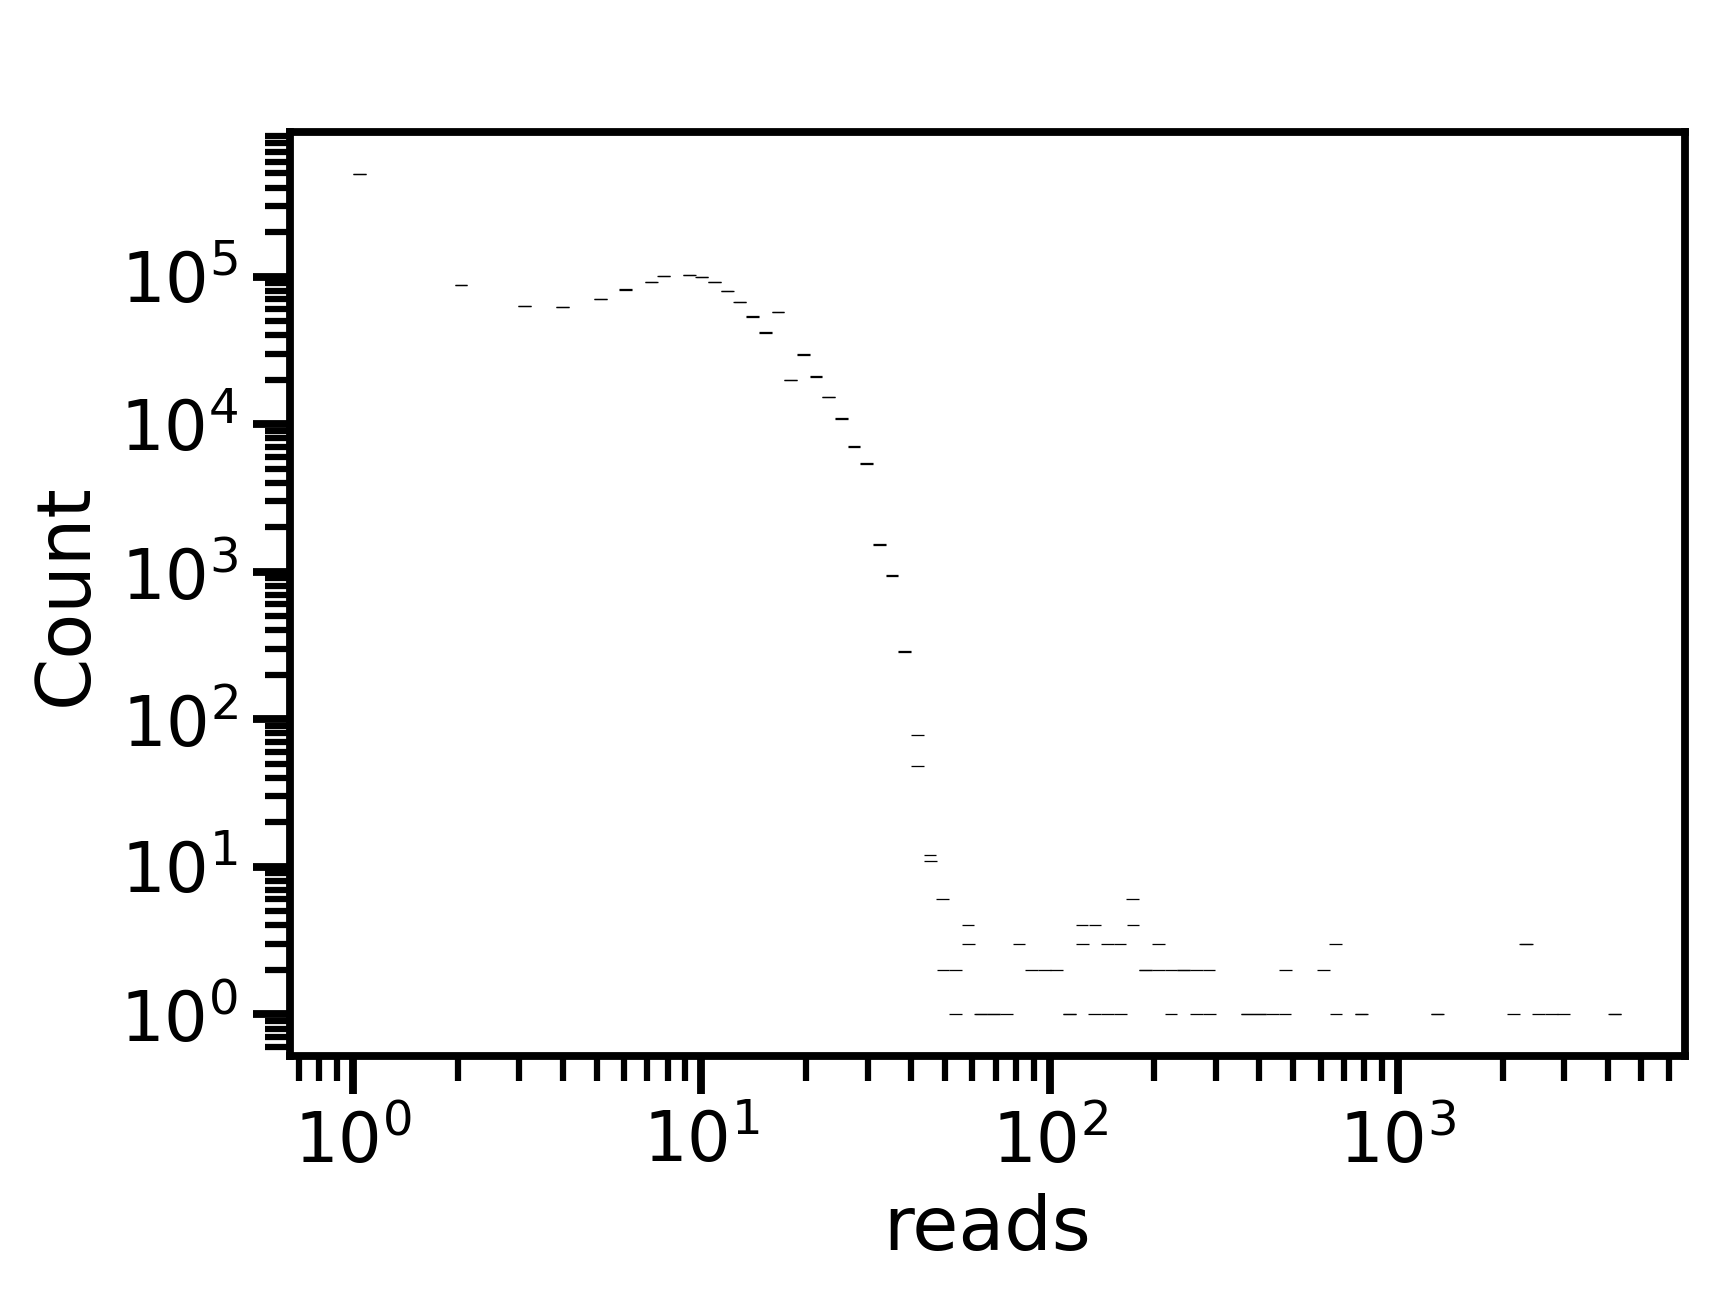

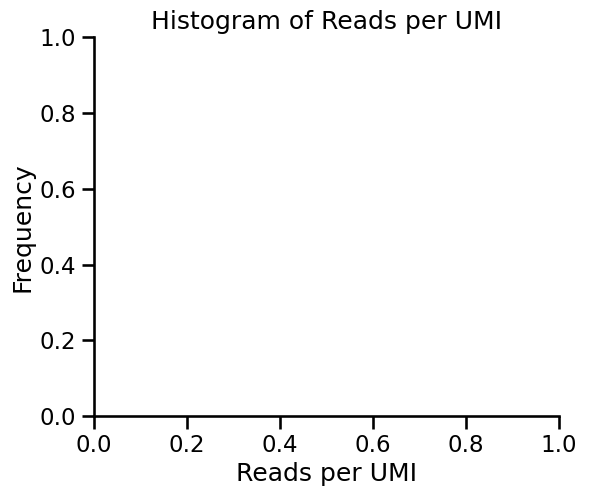

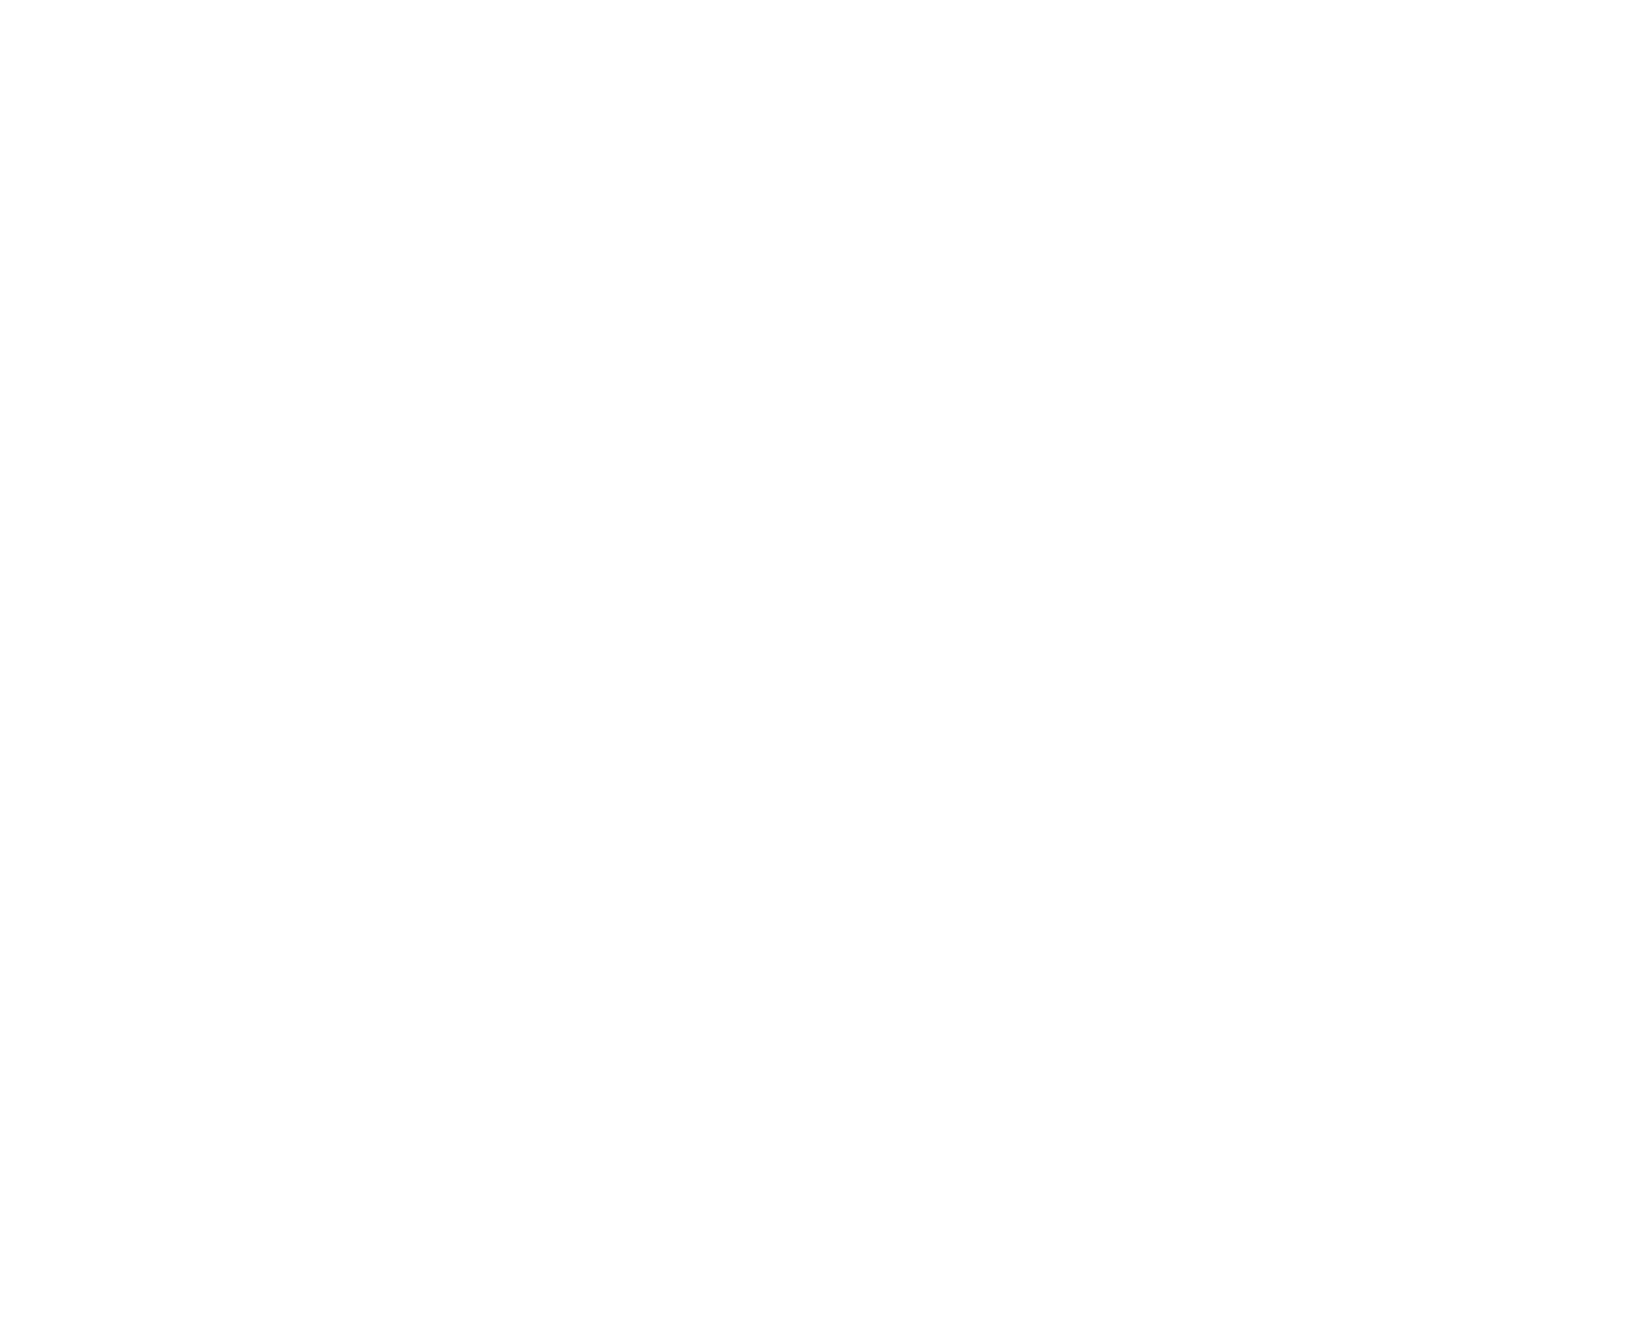

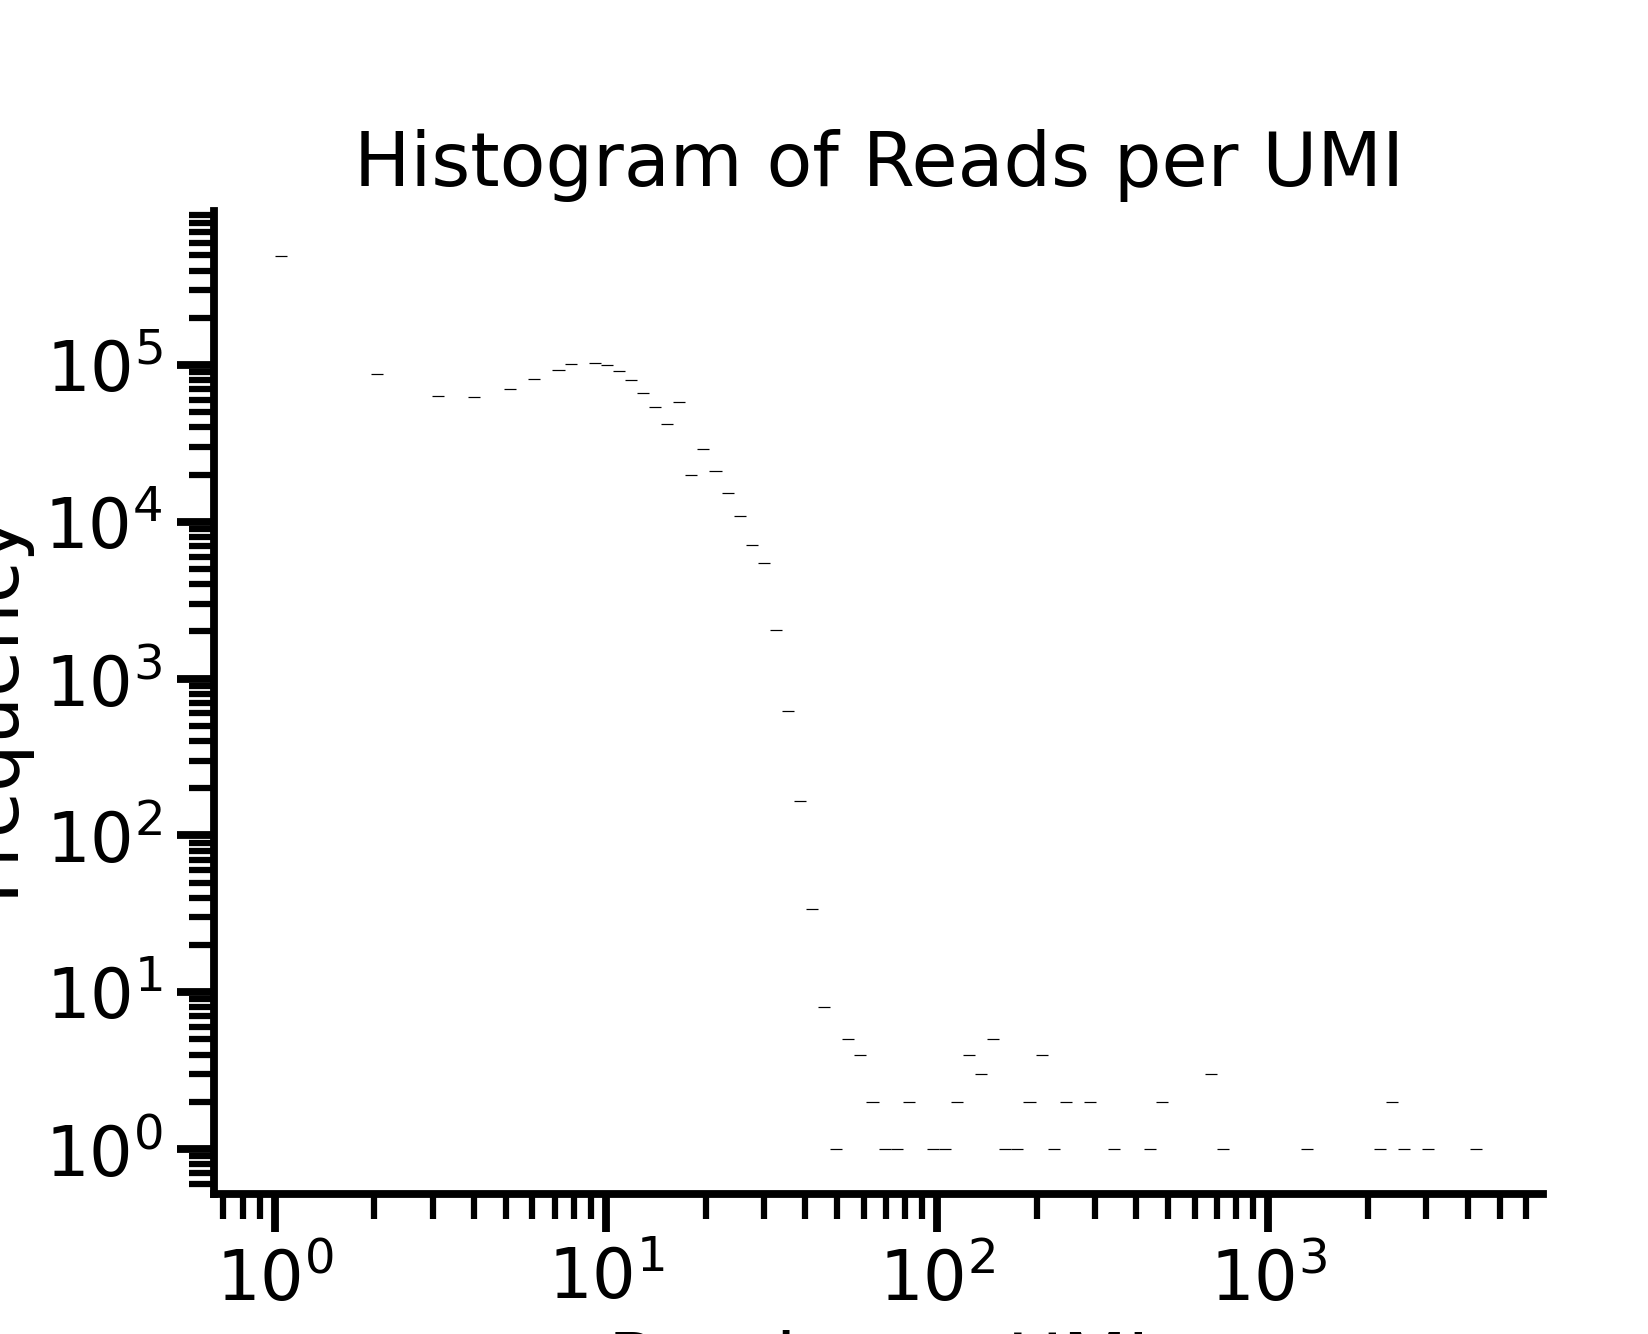

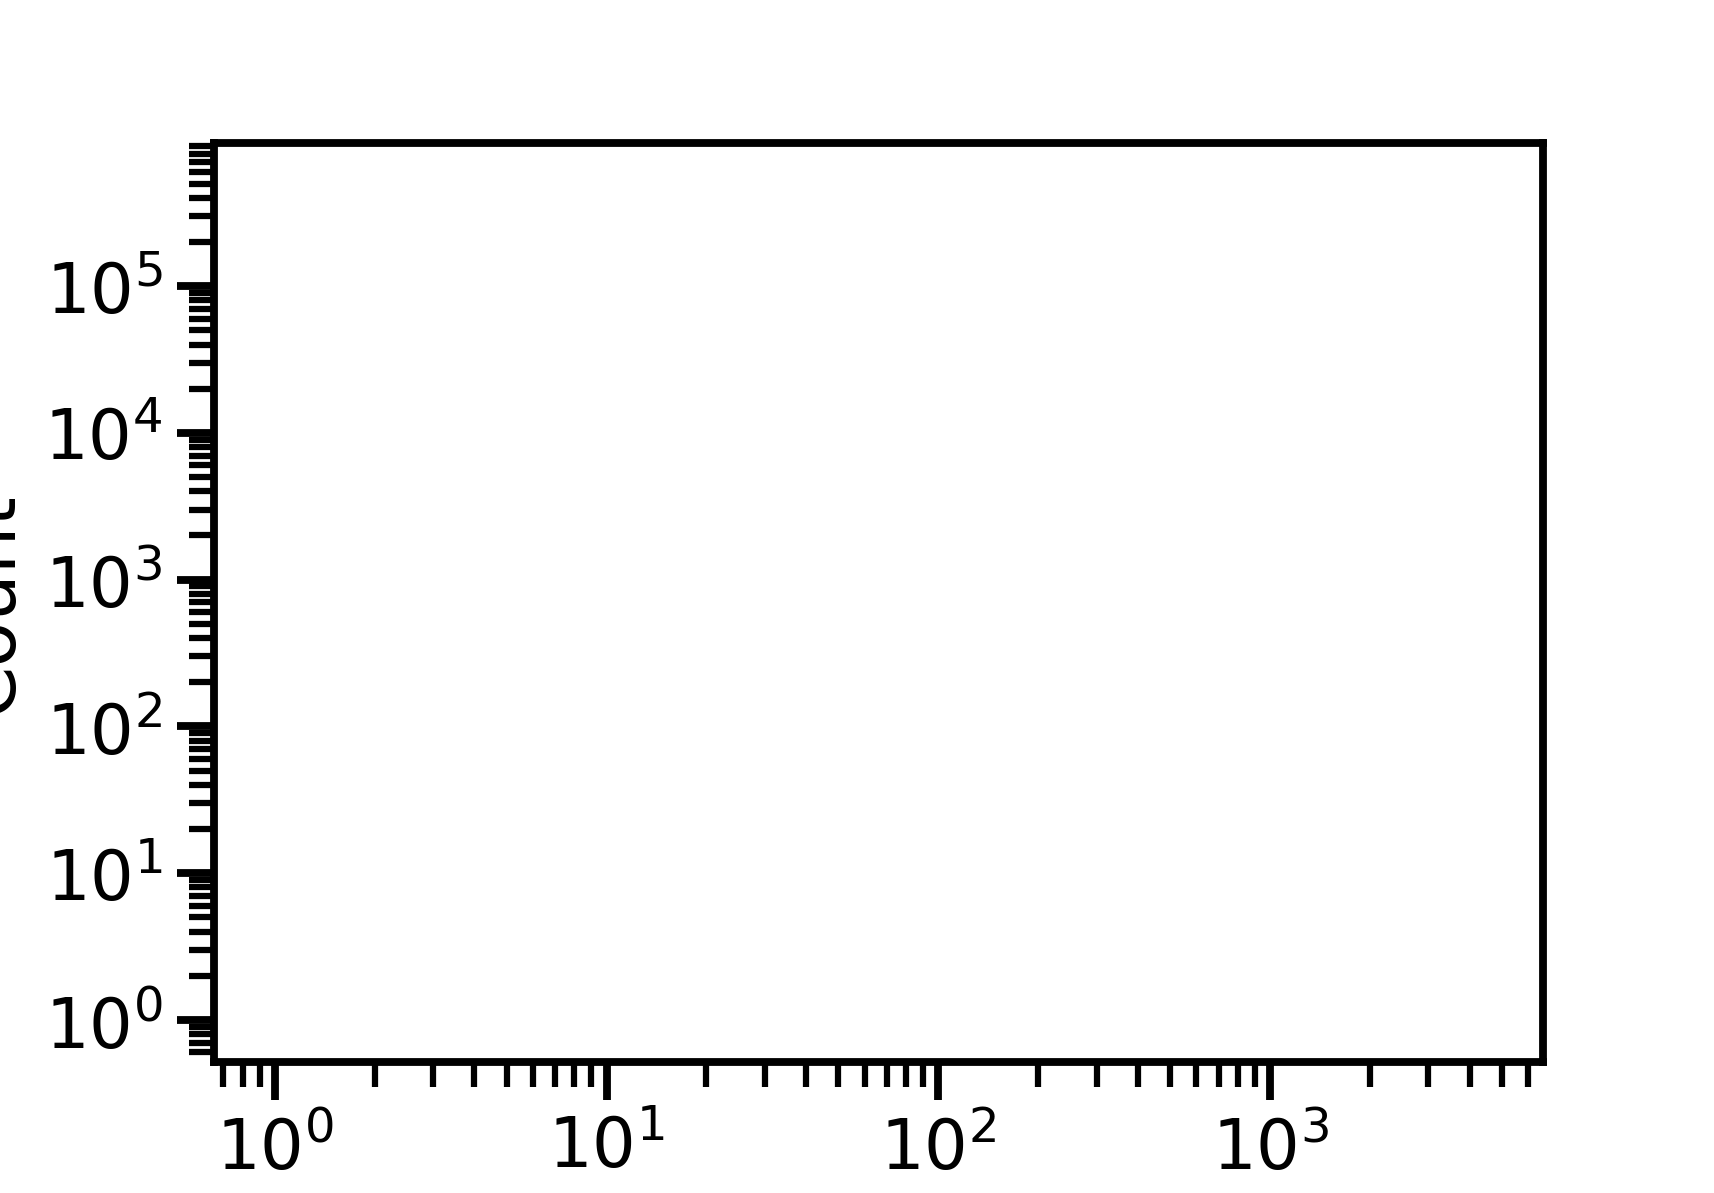

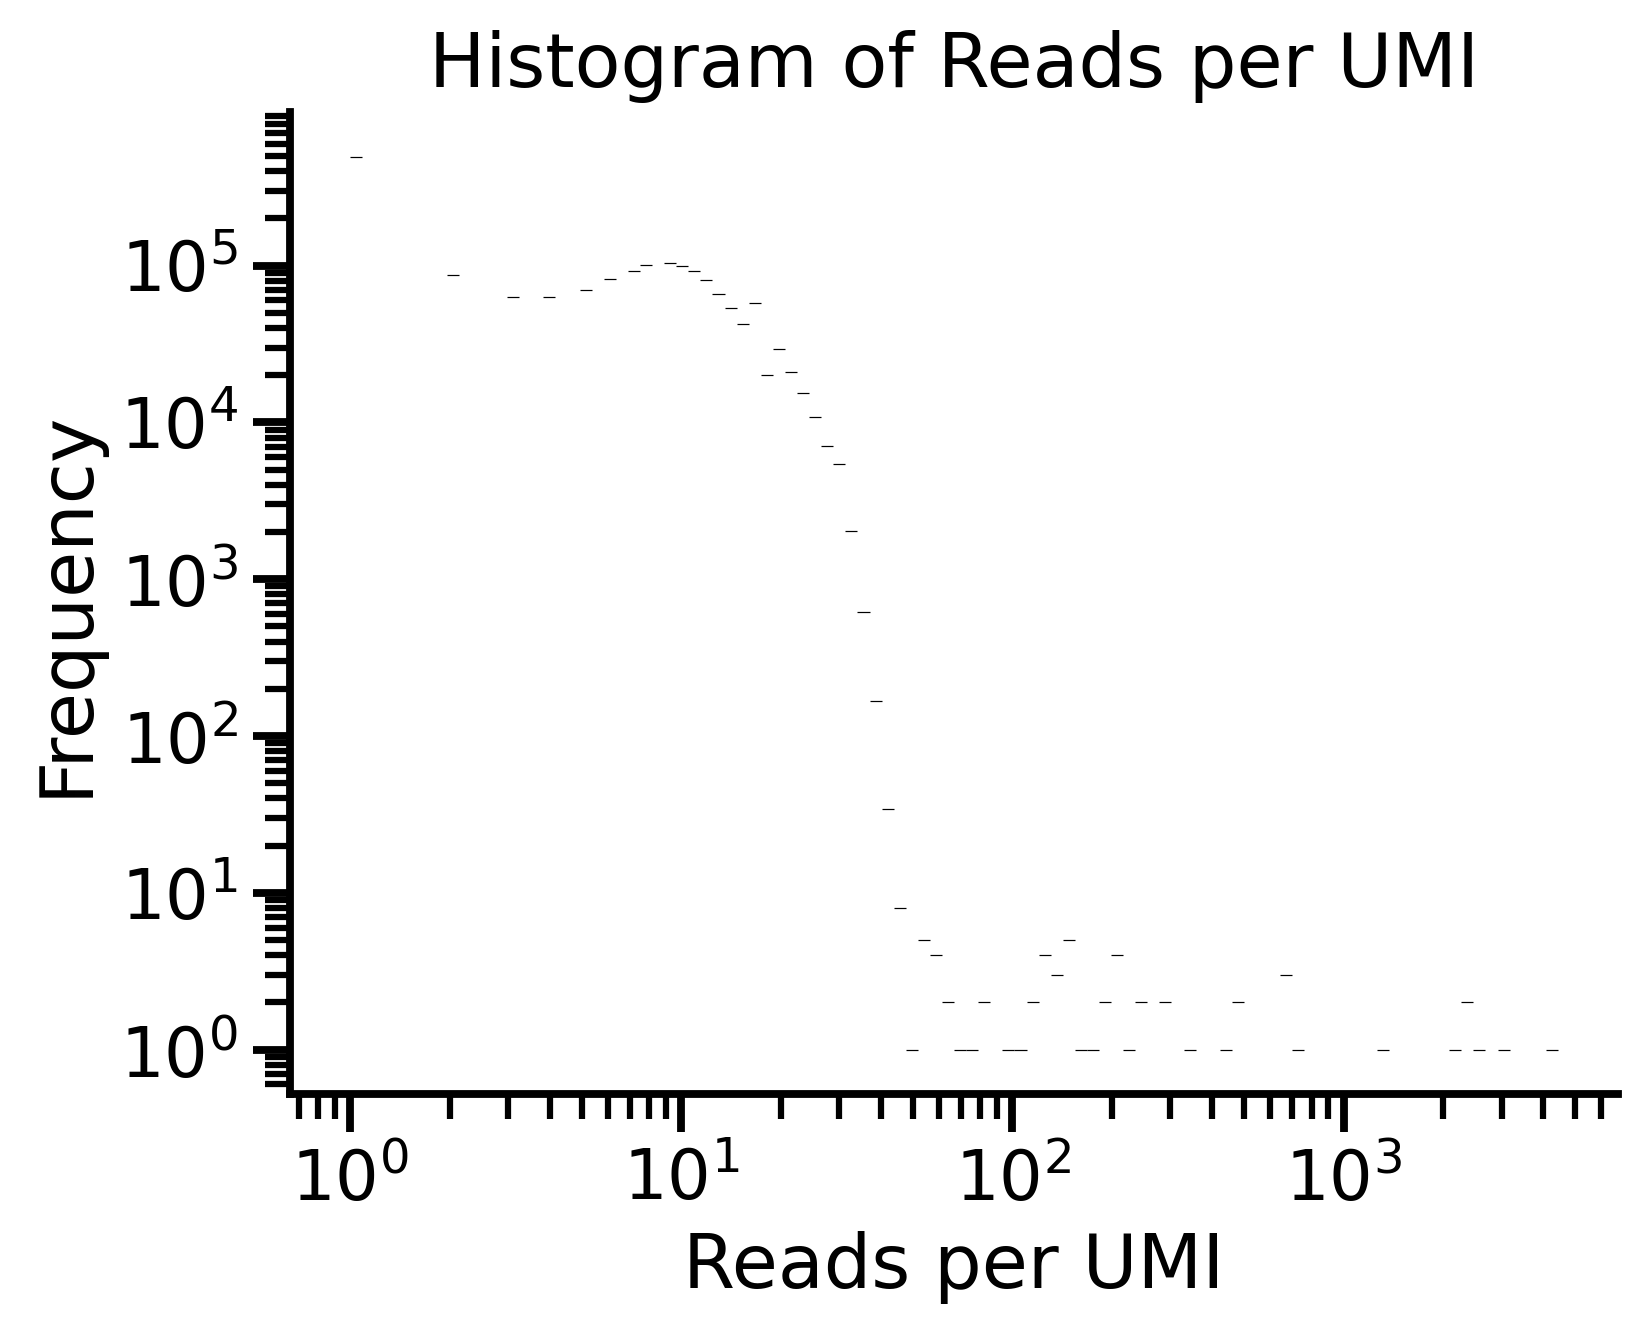

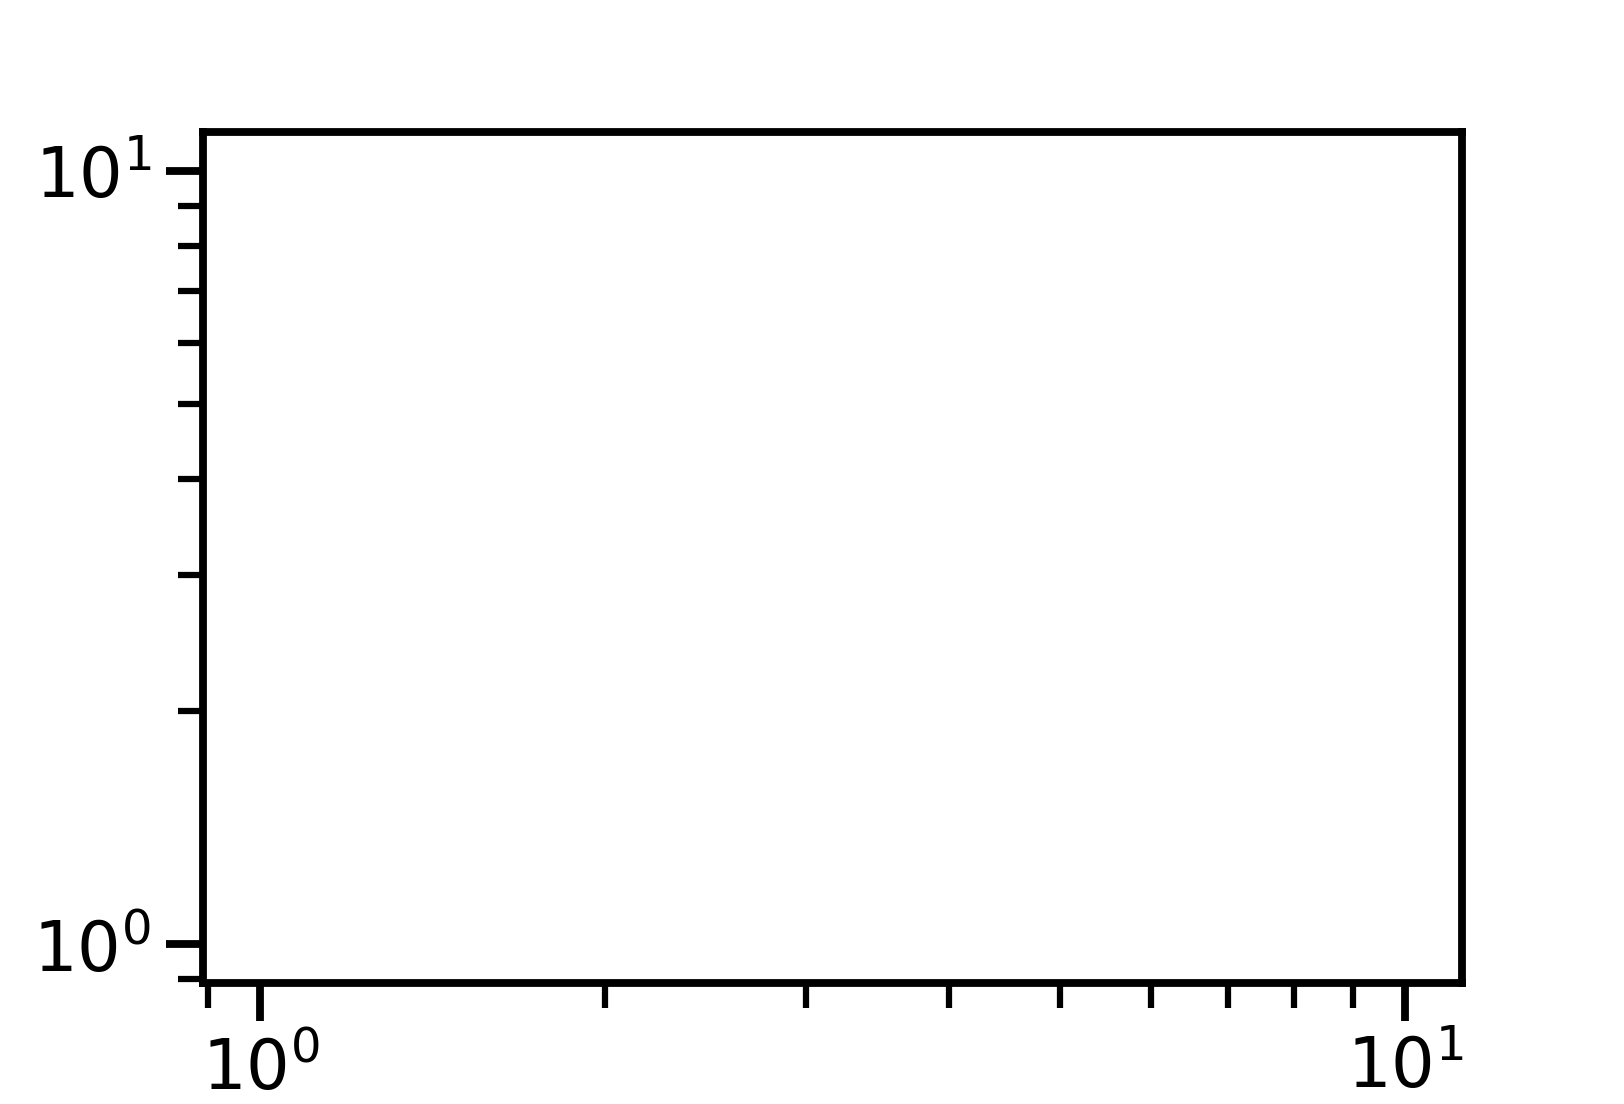

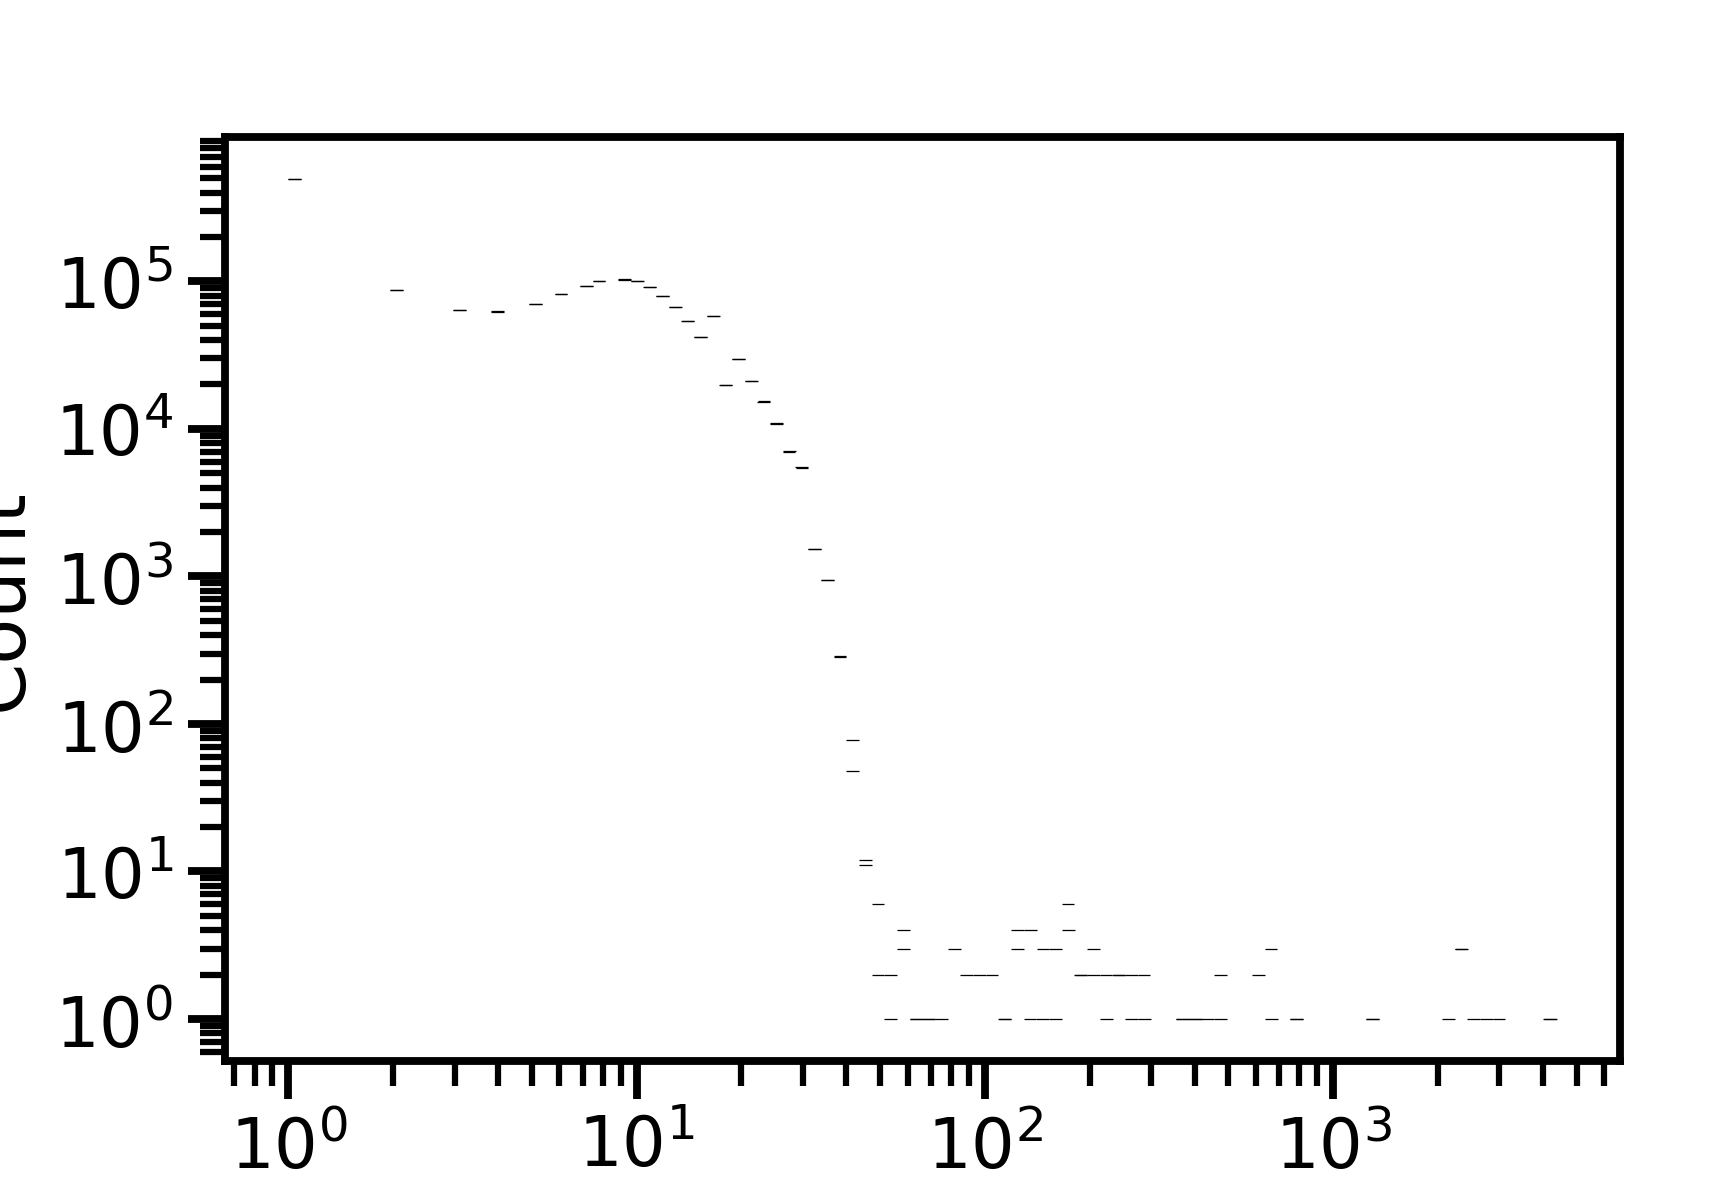

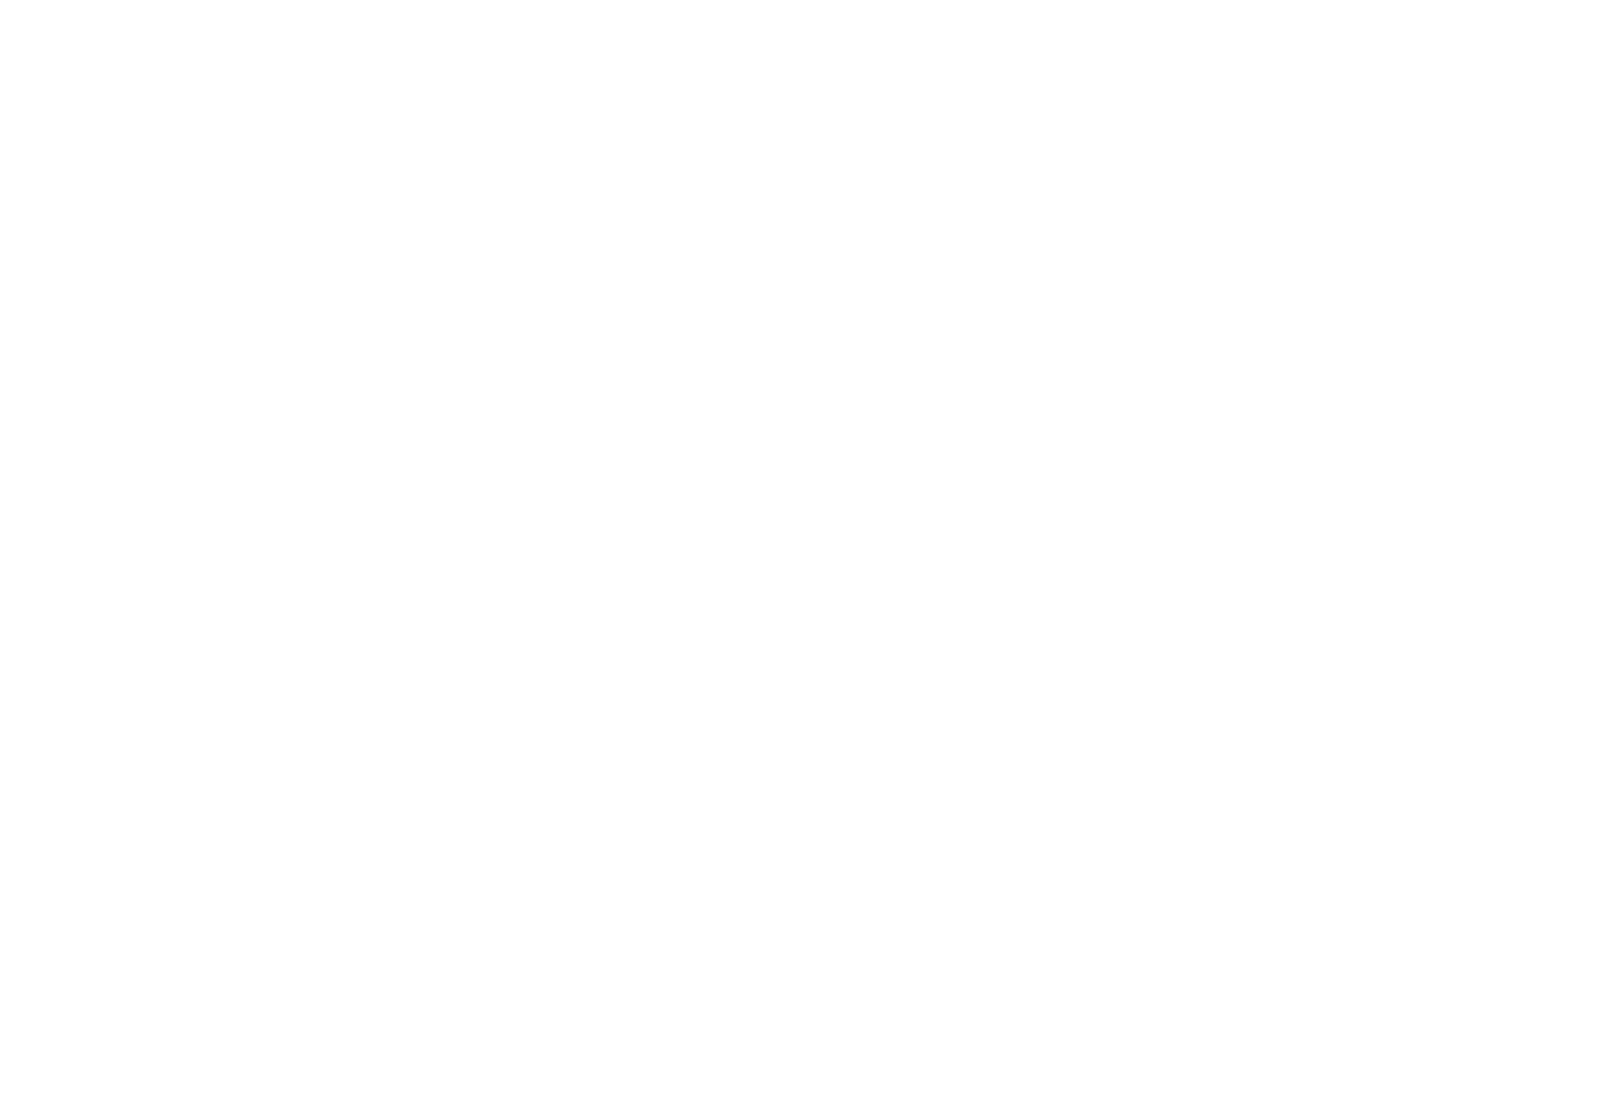

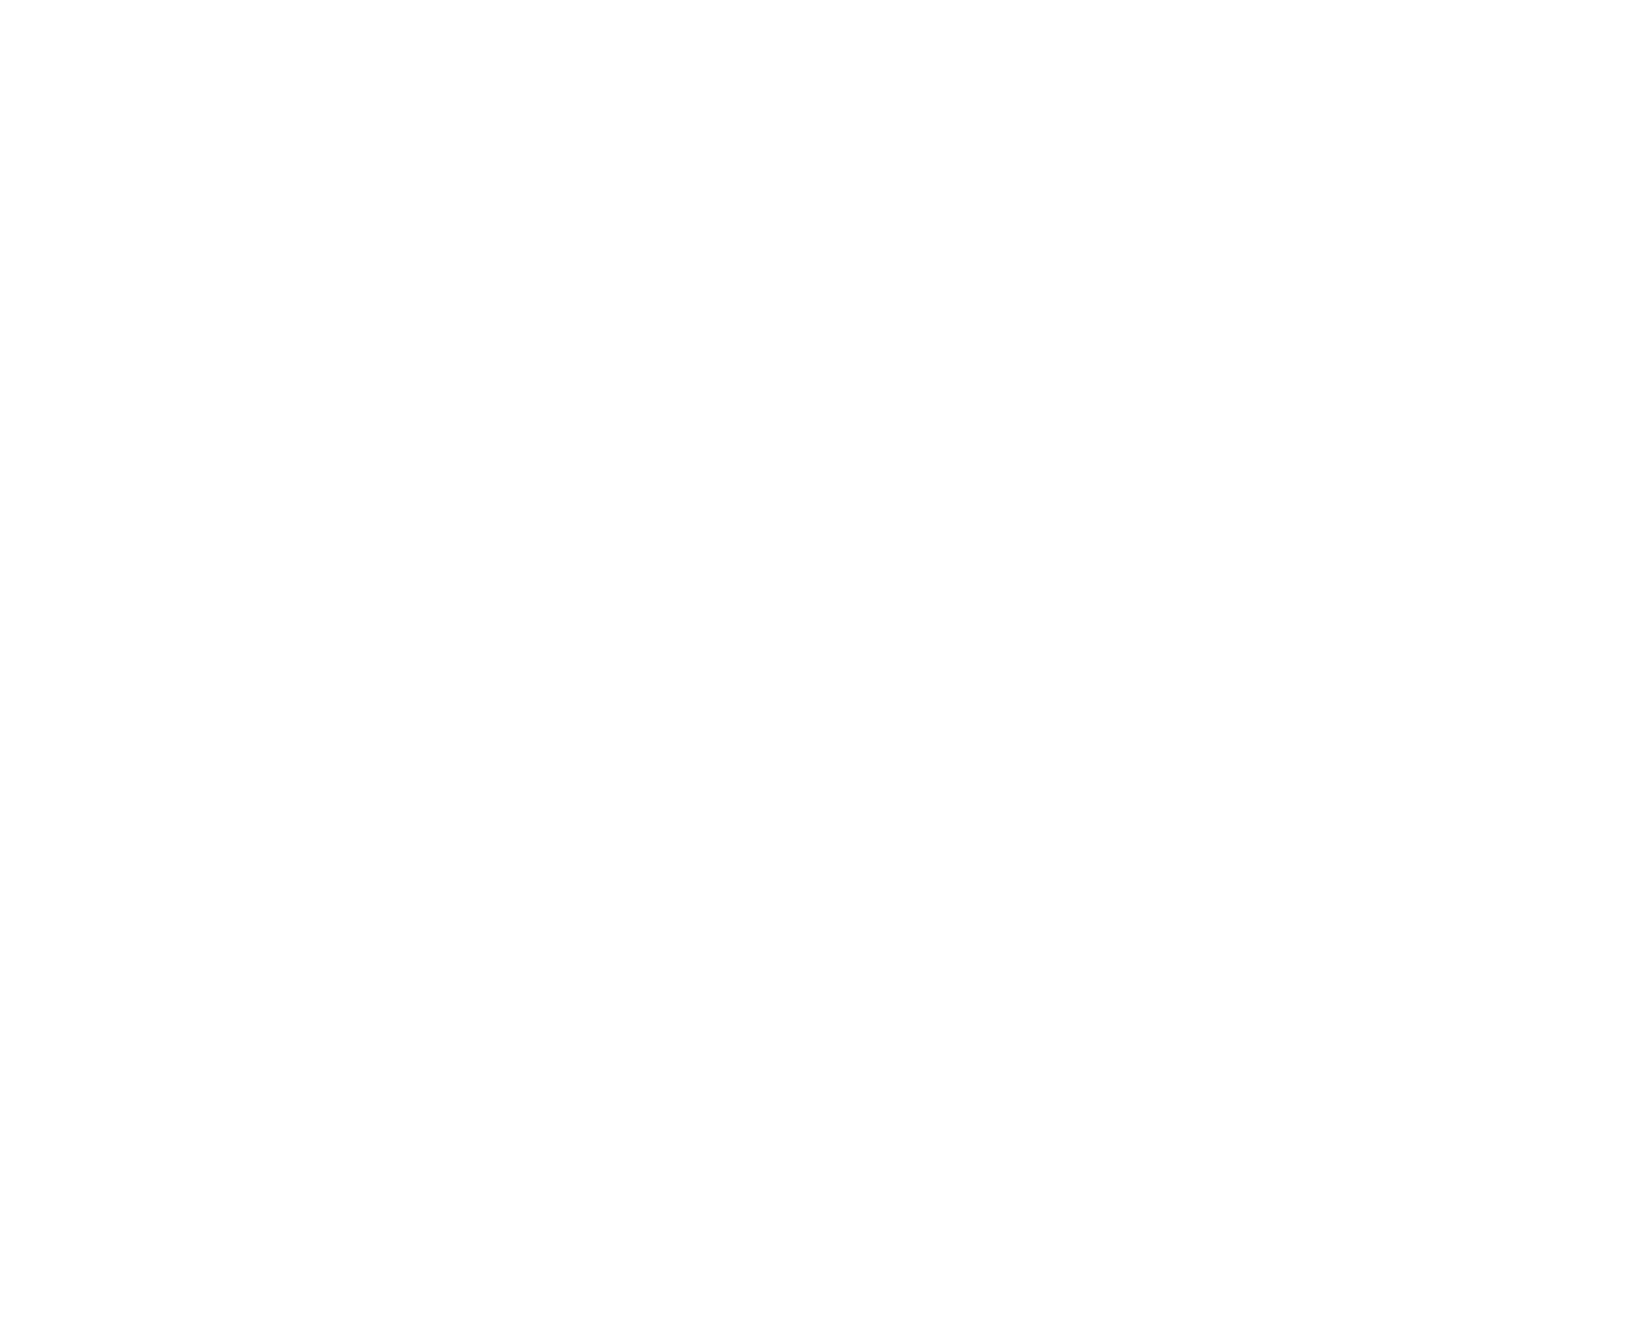

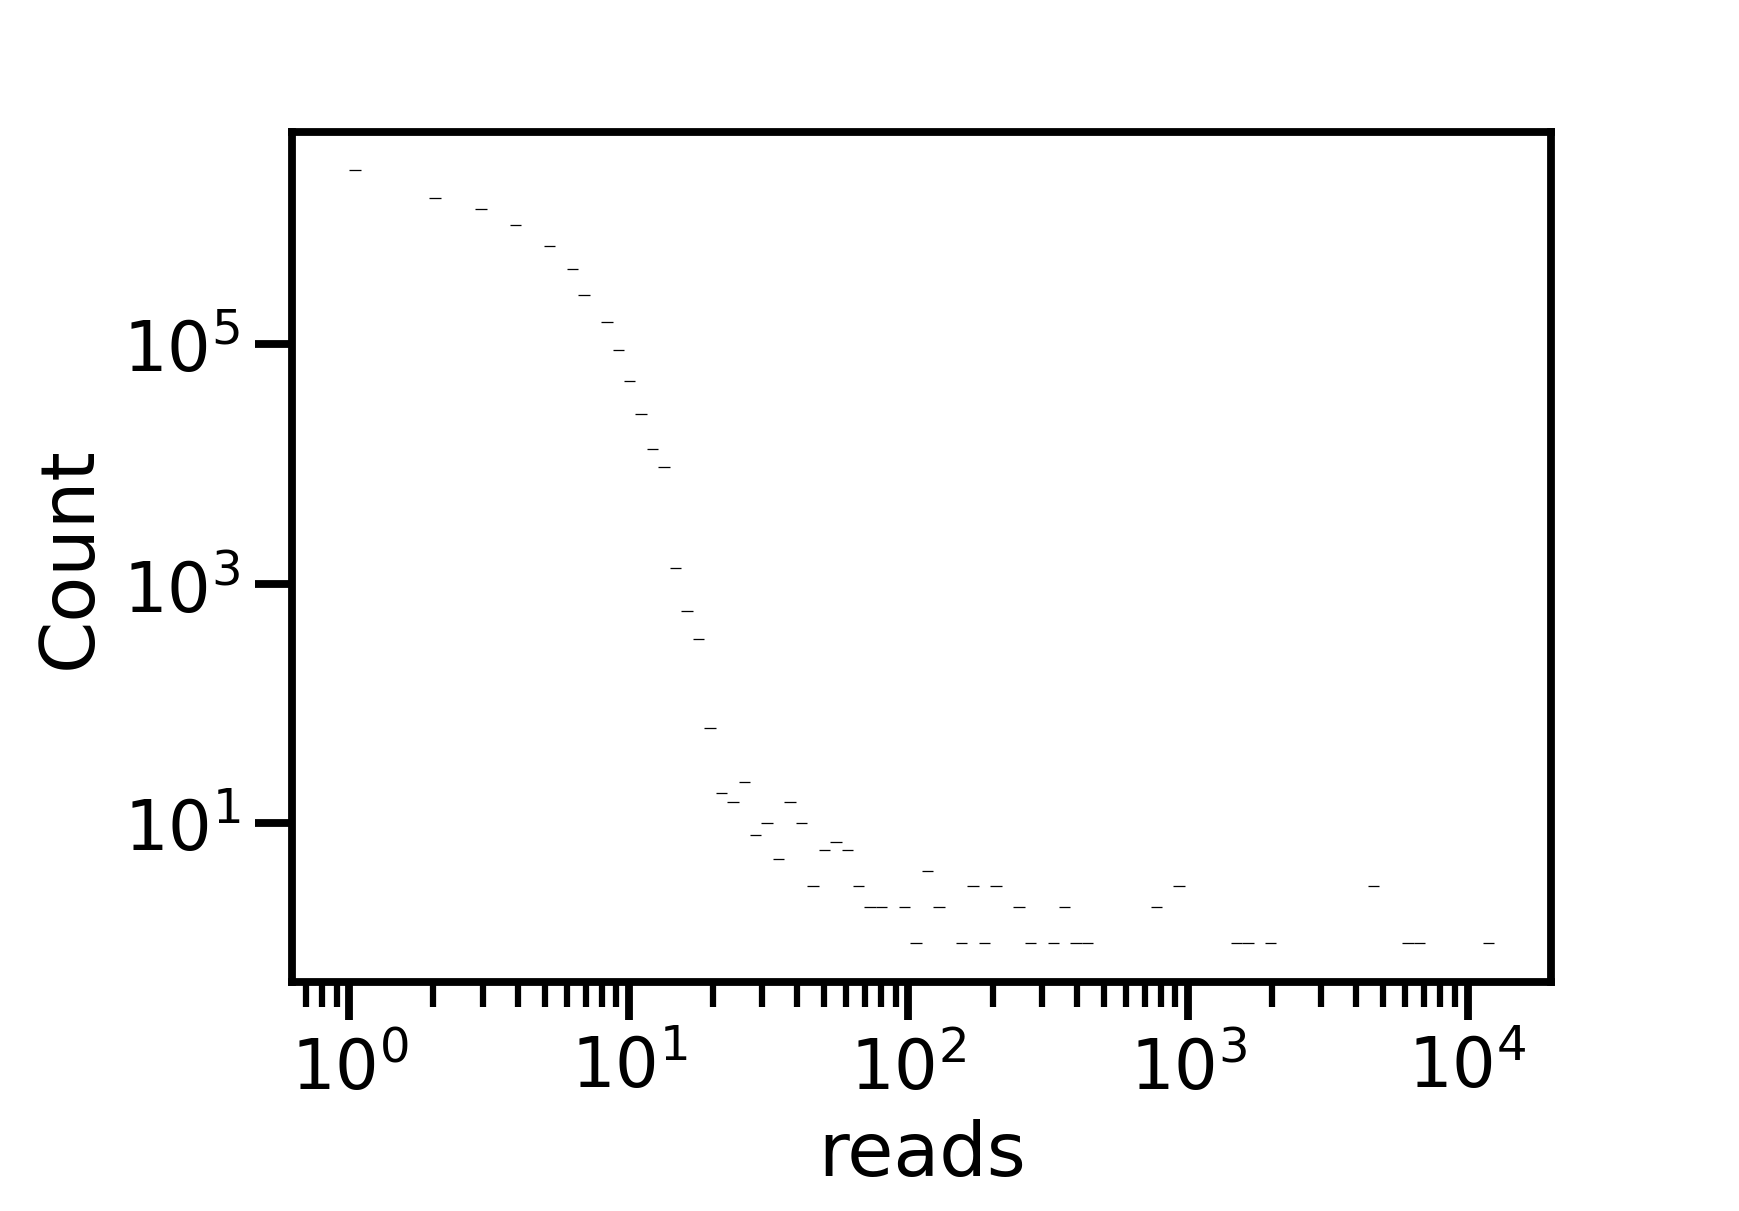

 34%|███▎      | 38/113 [01:20<02:25,  1.94s/it]

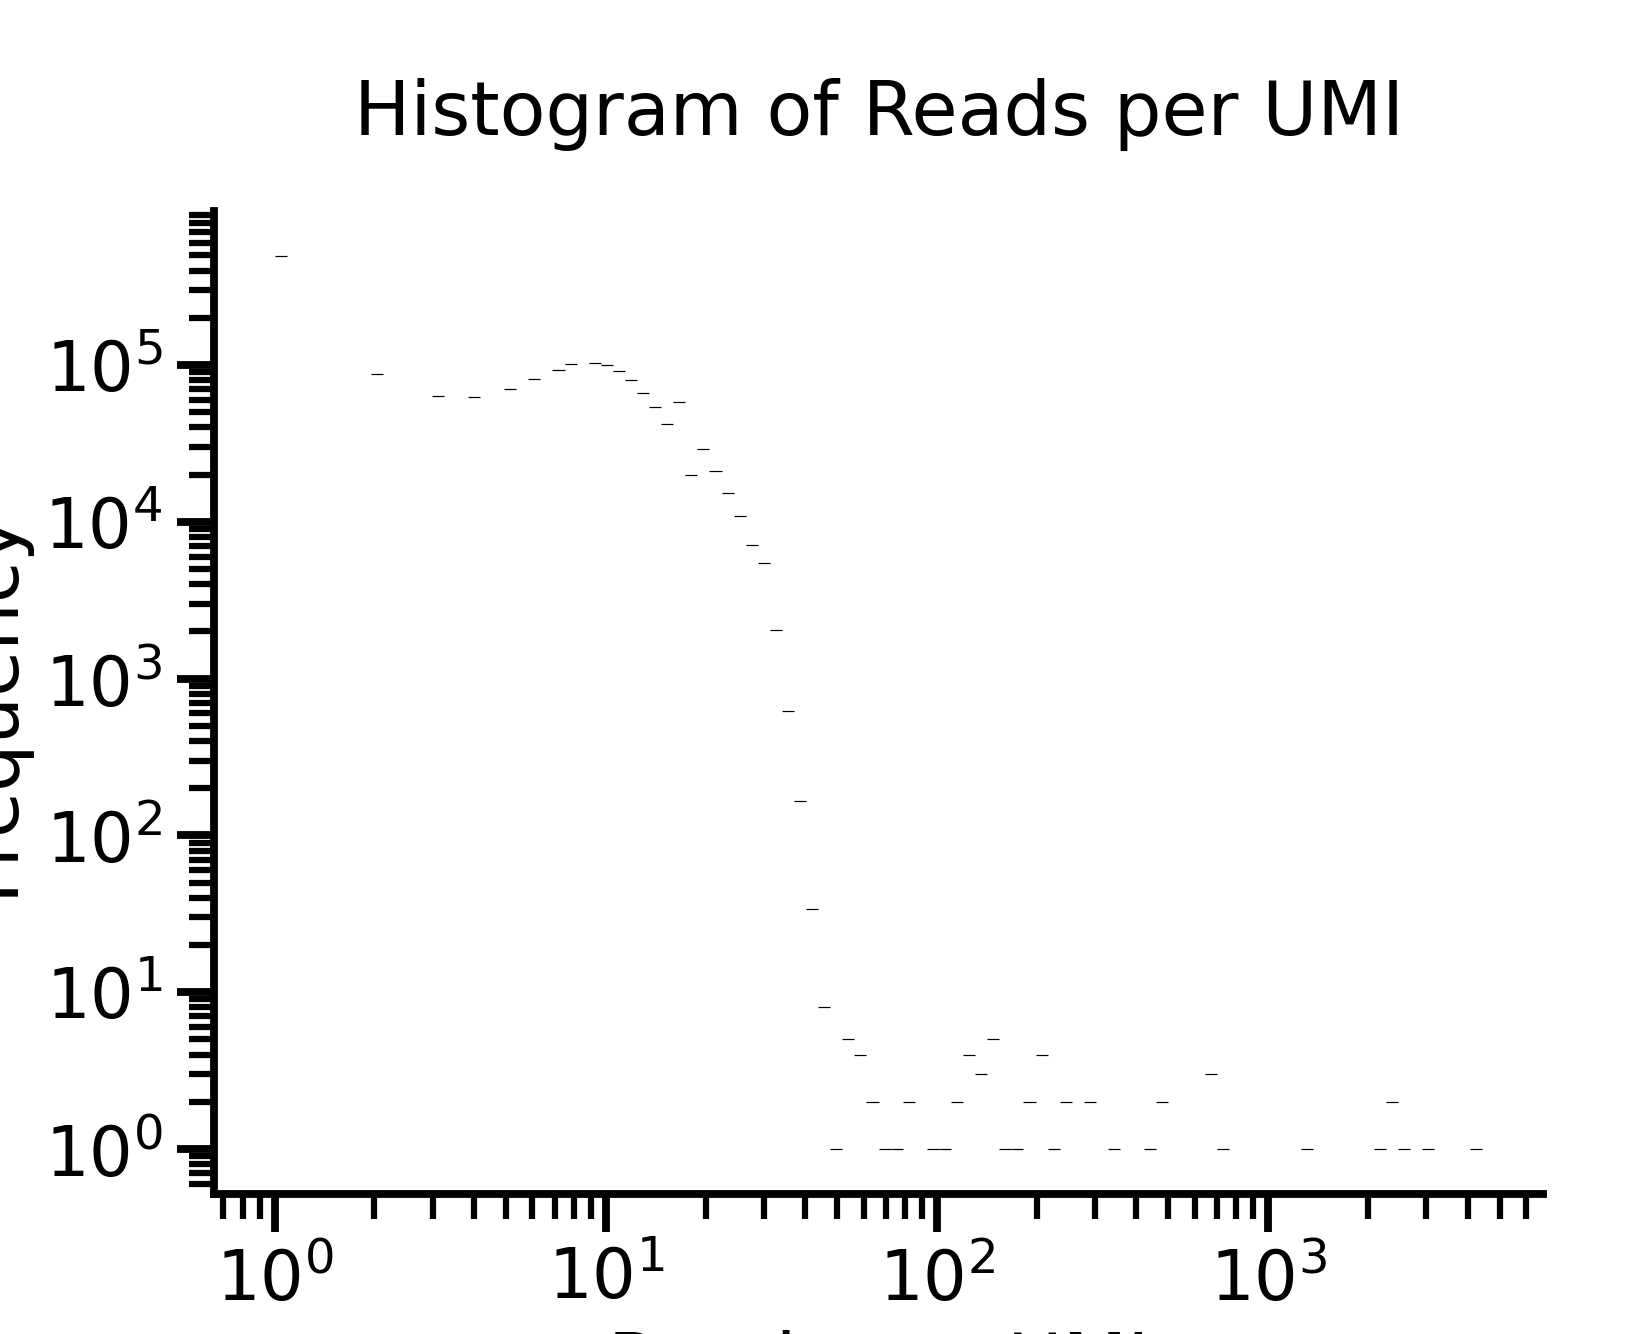

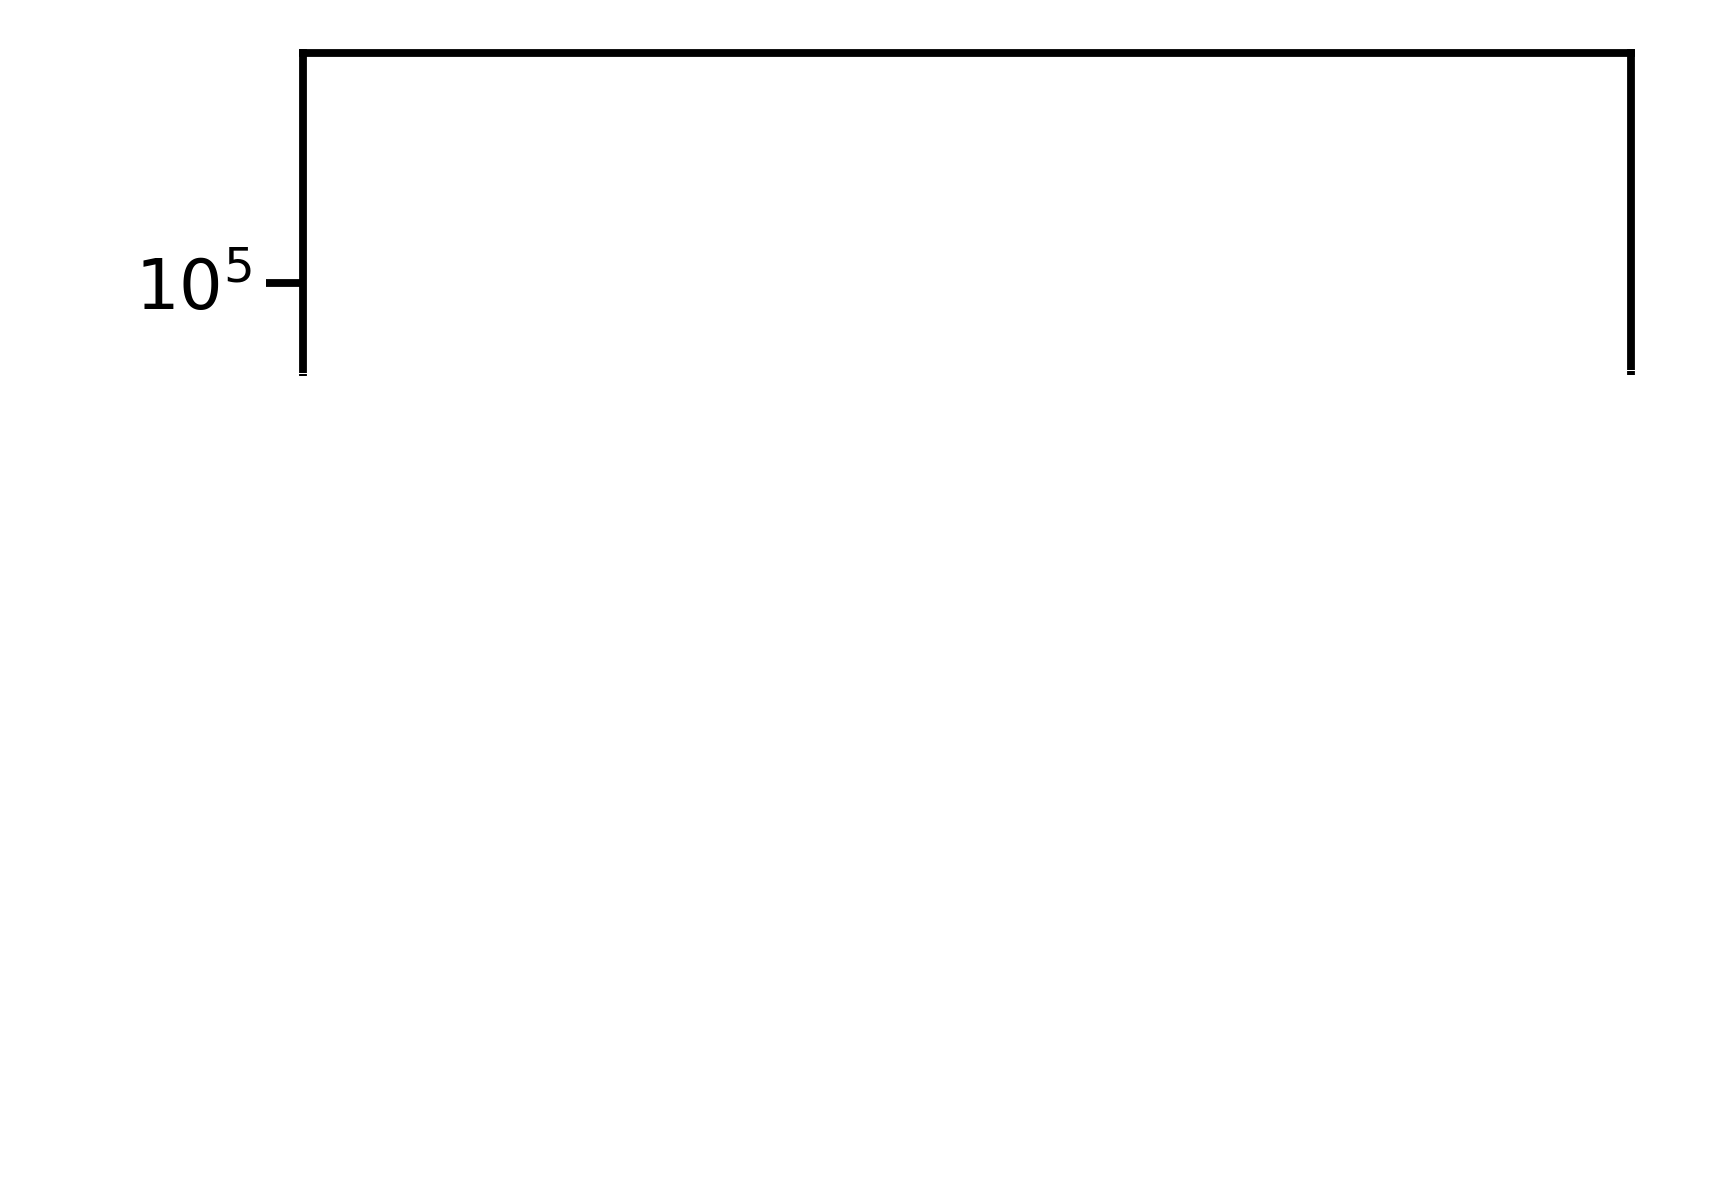

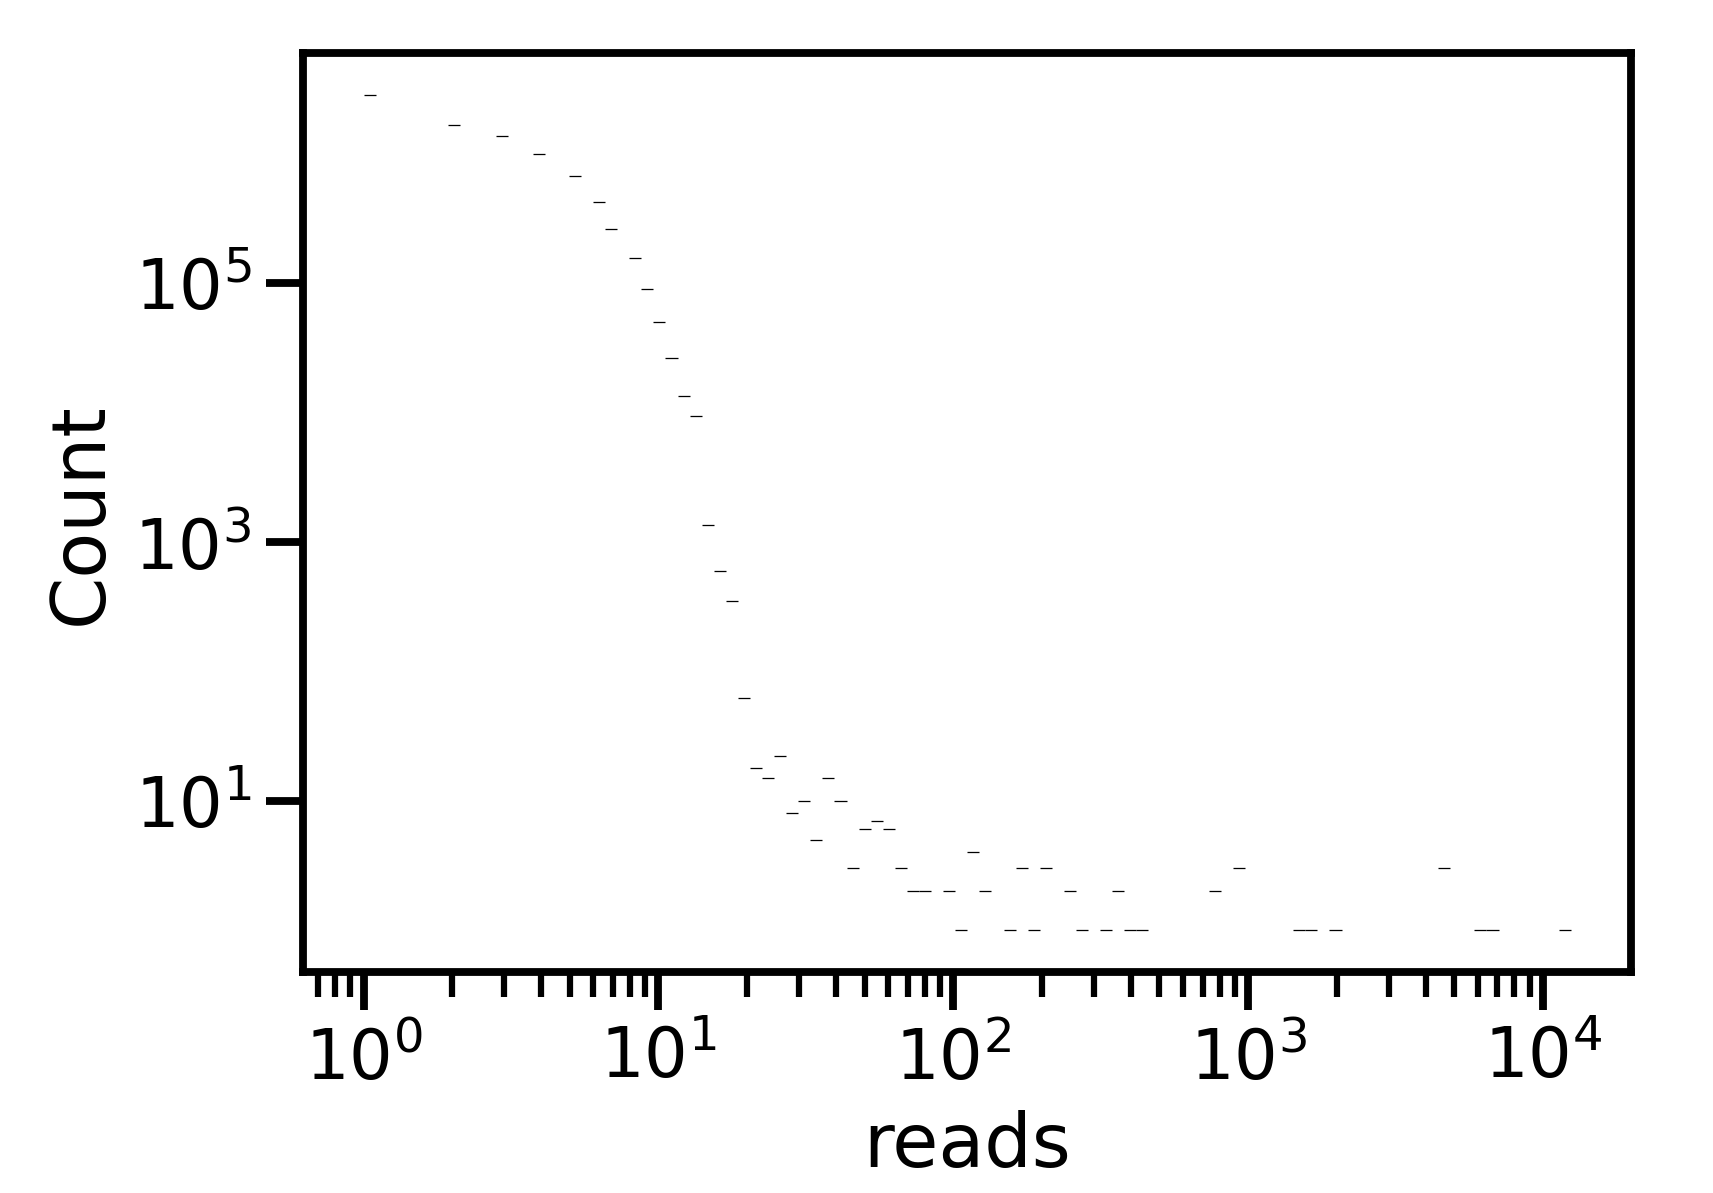

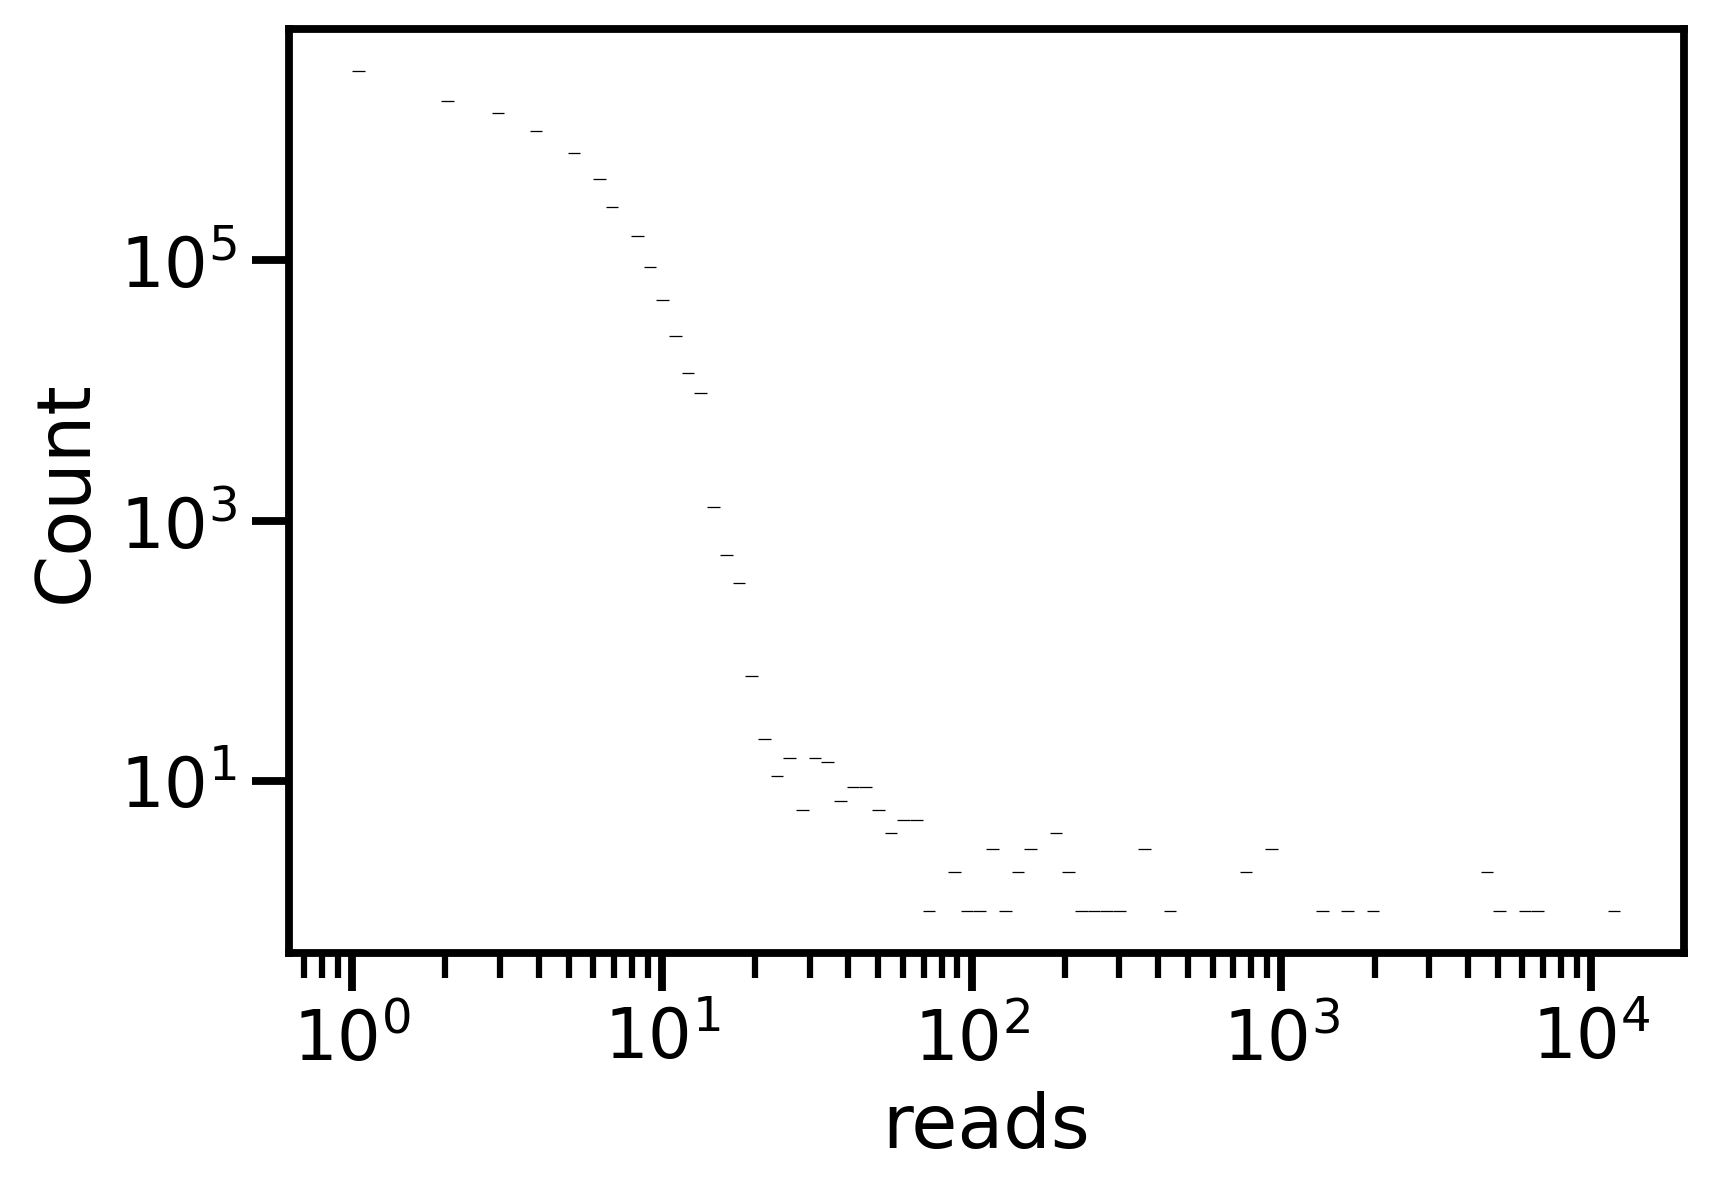

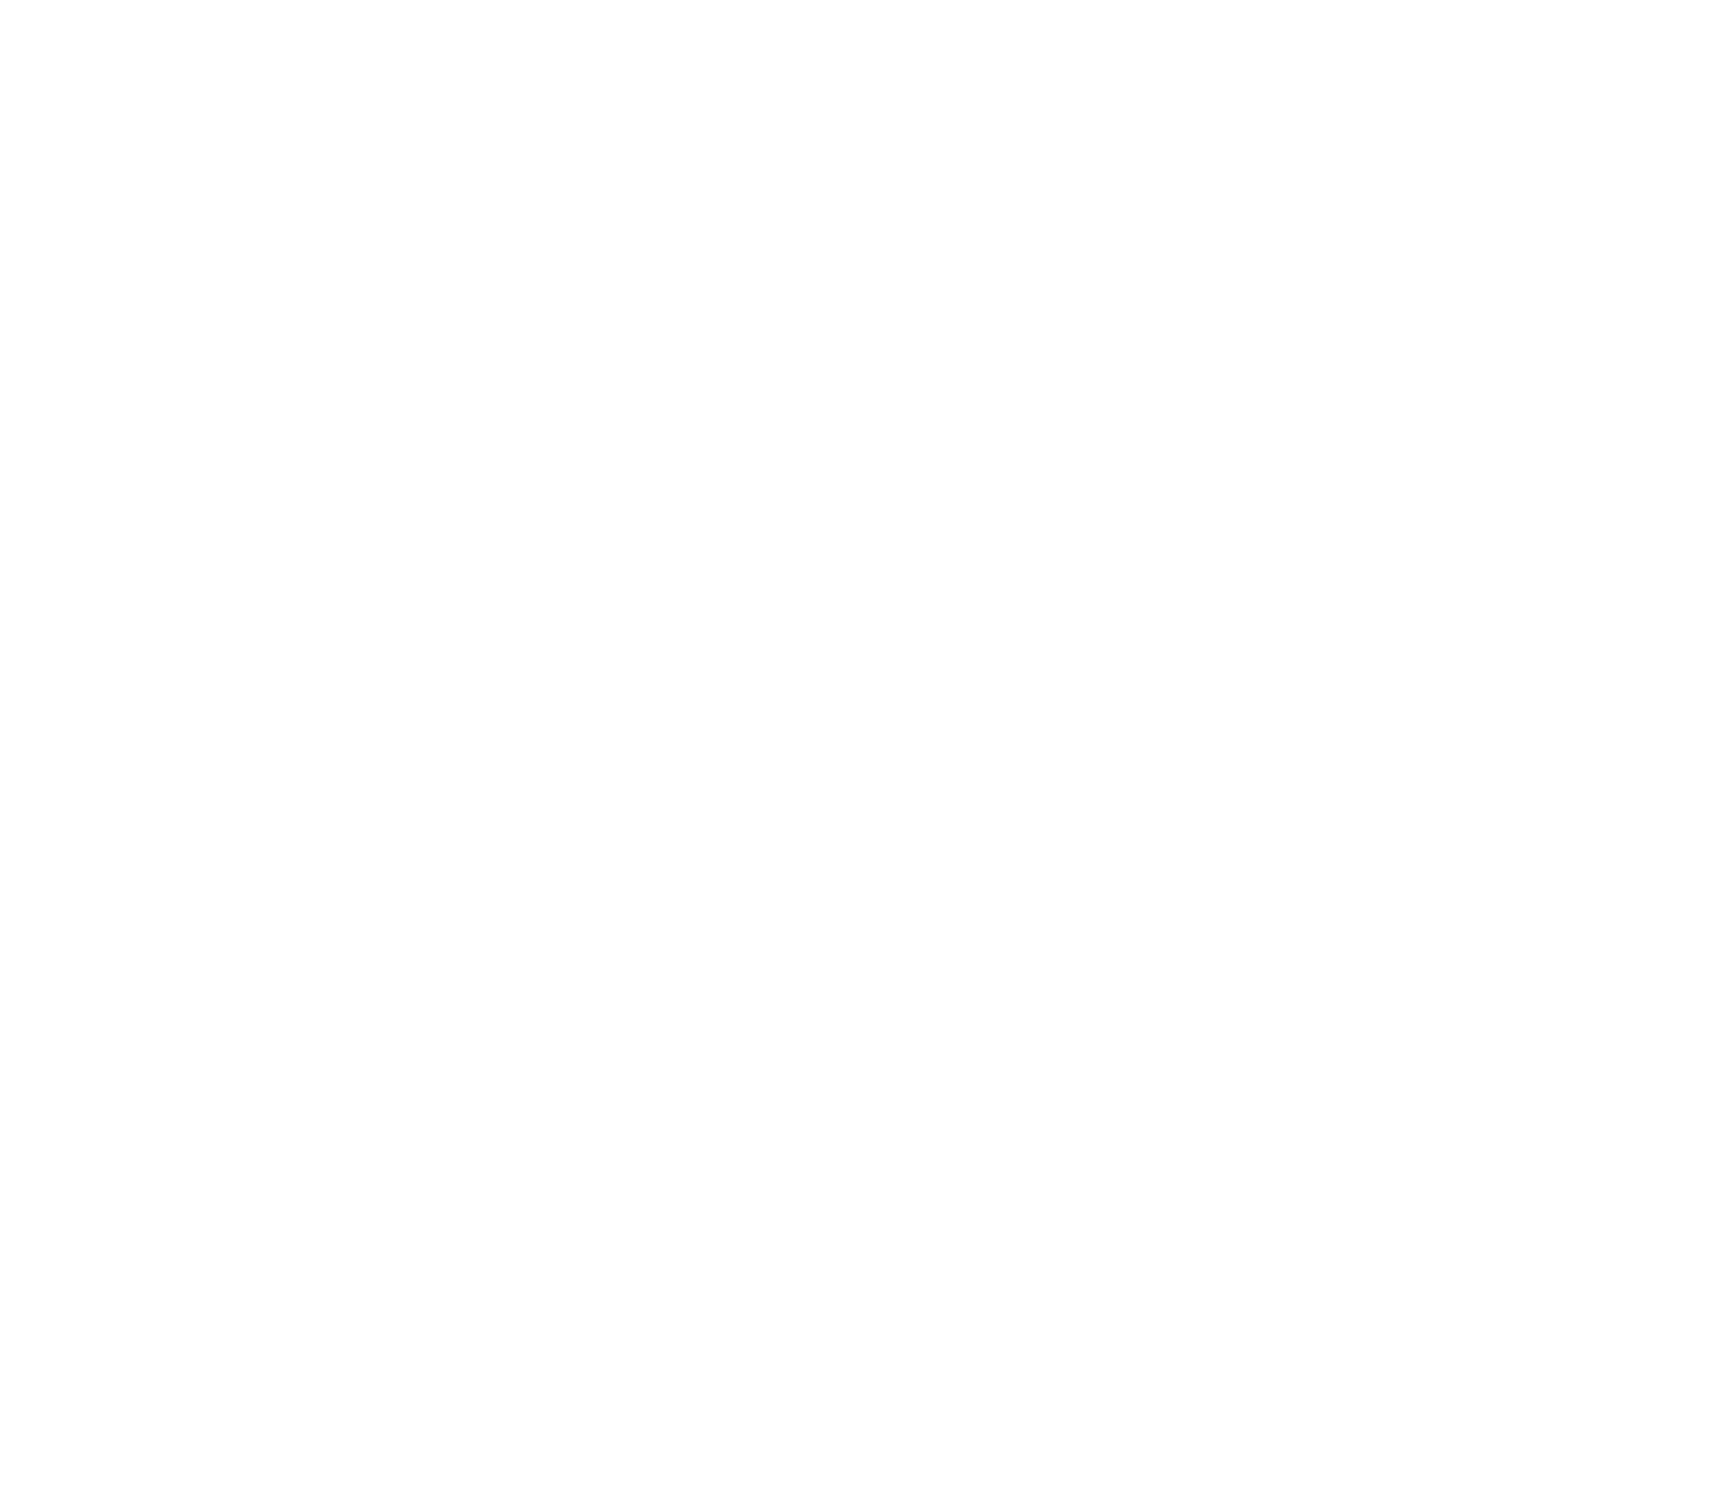

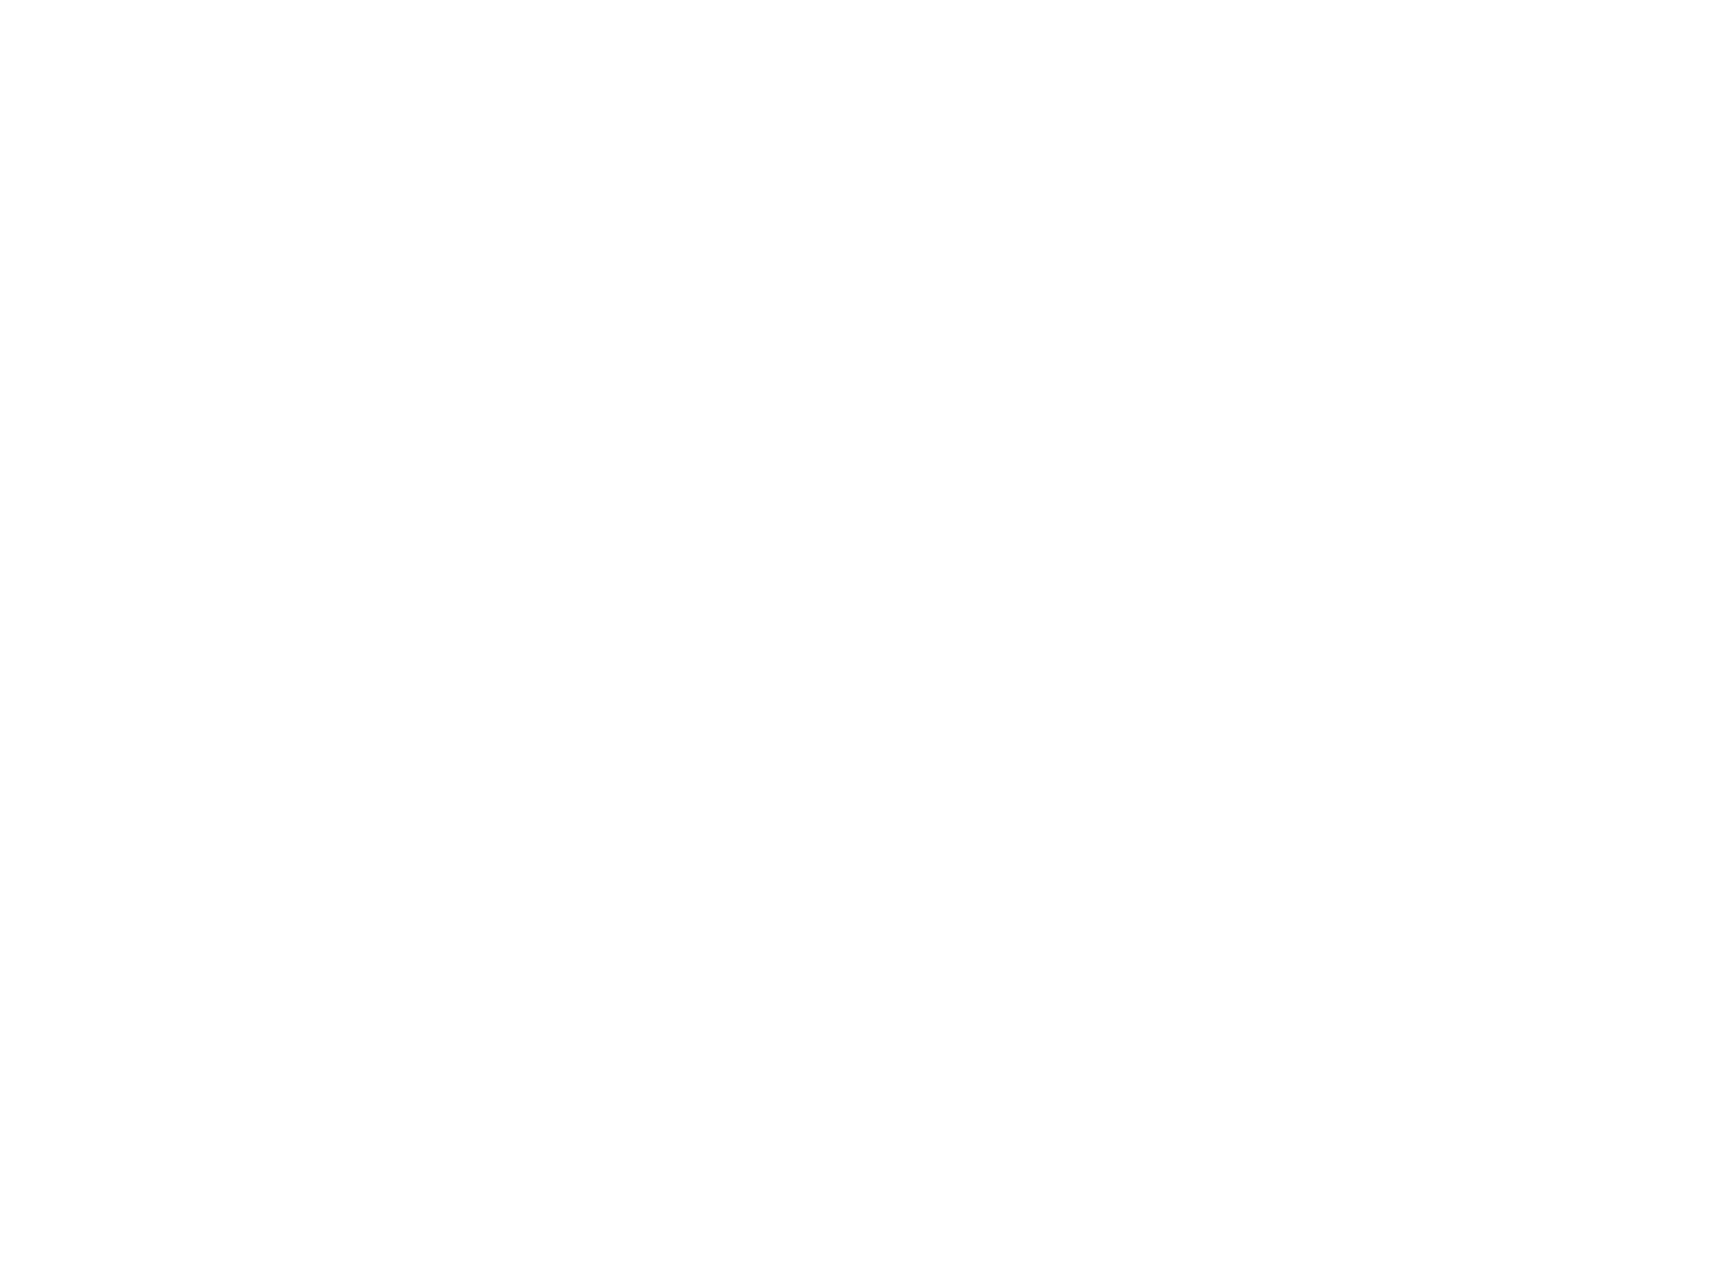

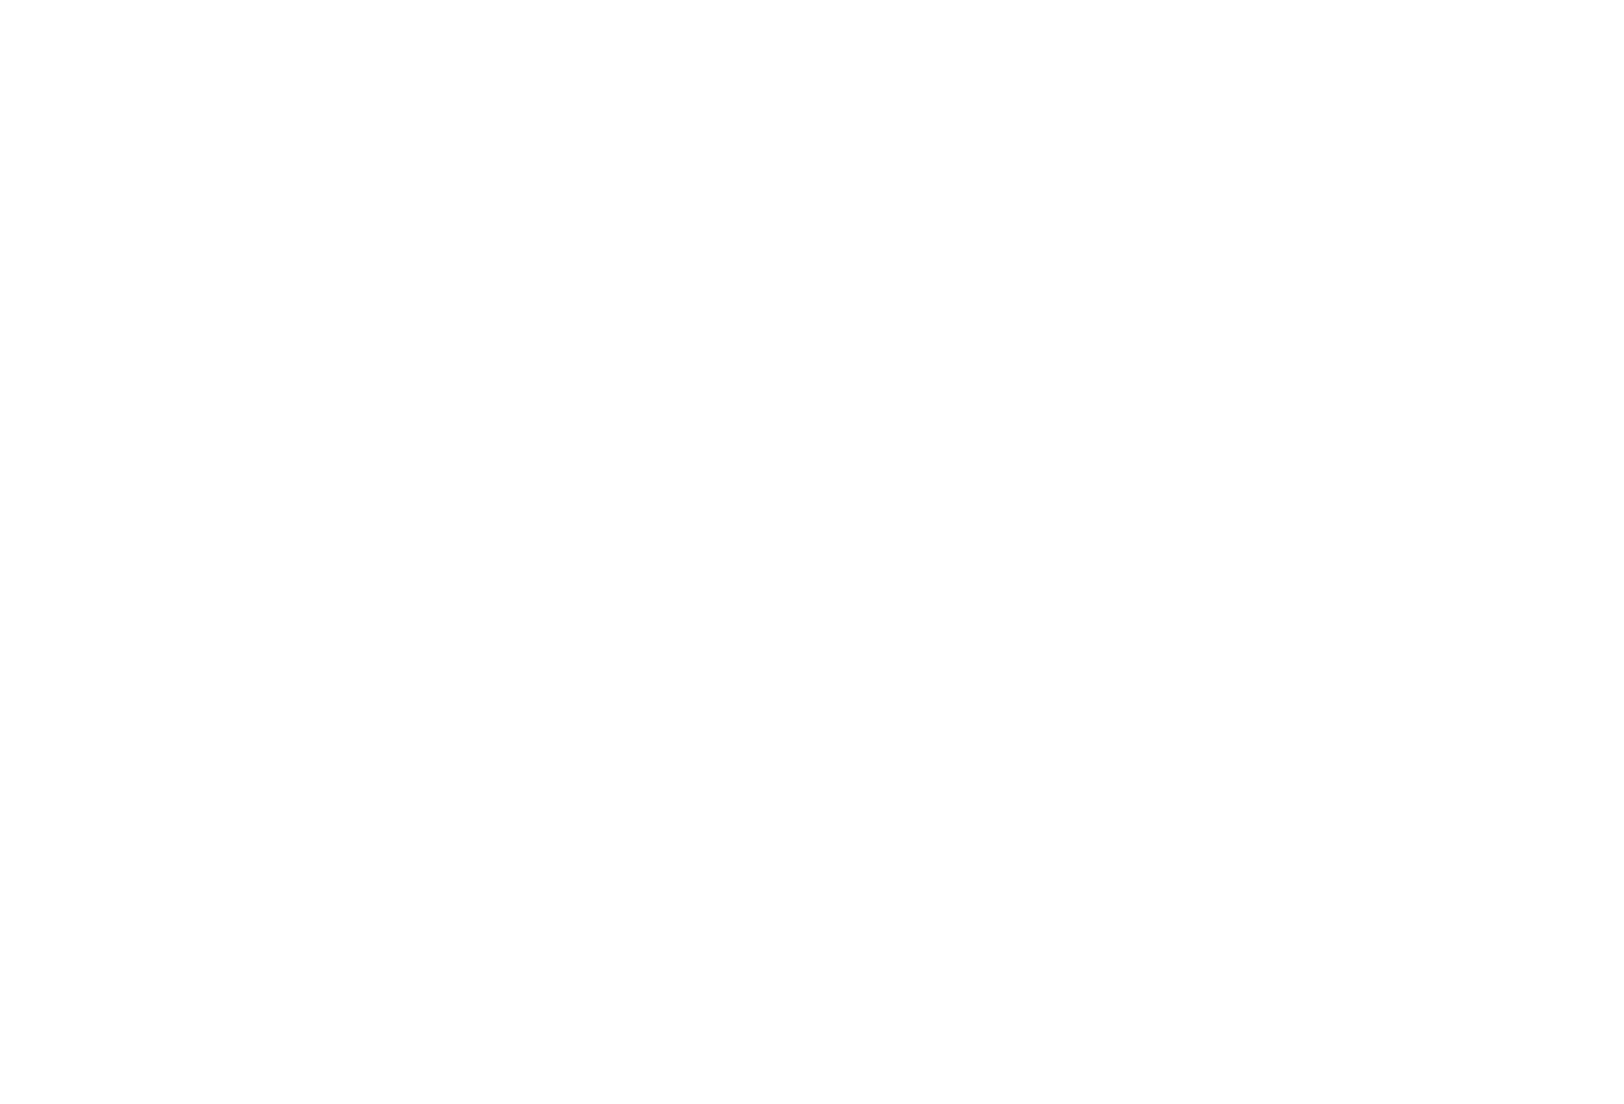

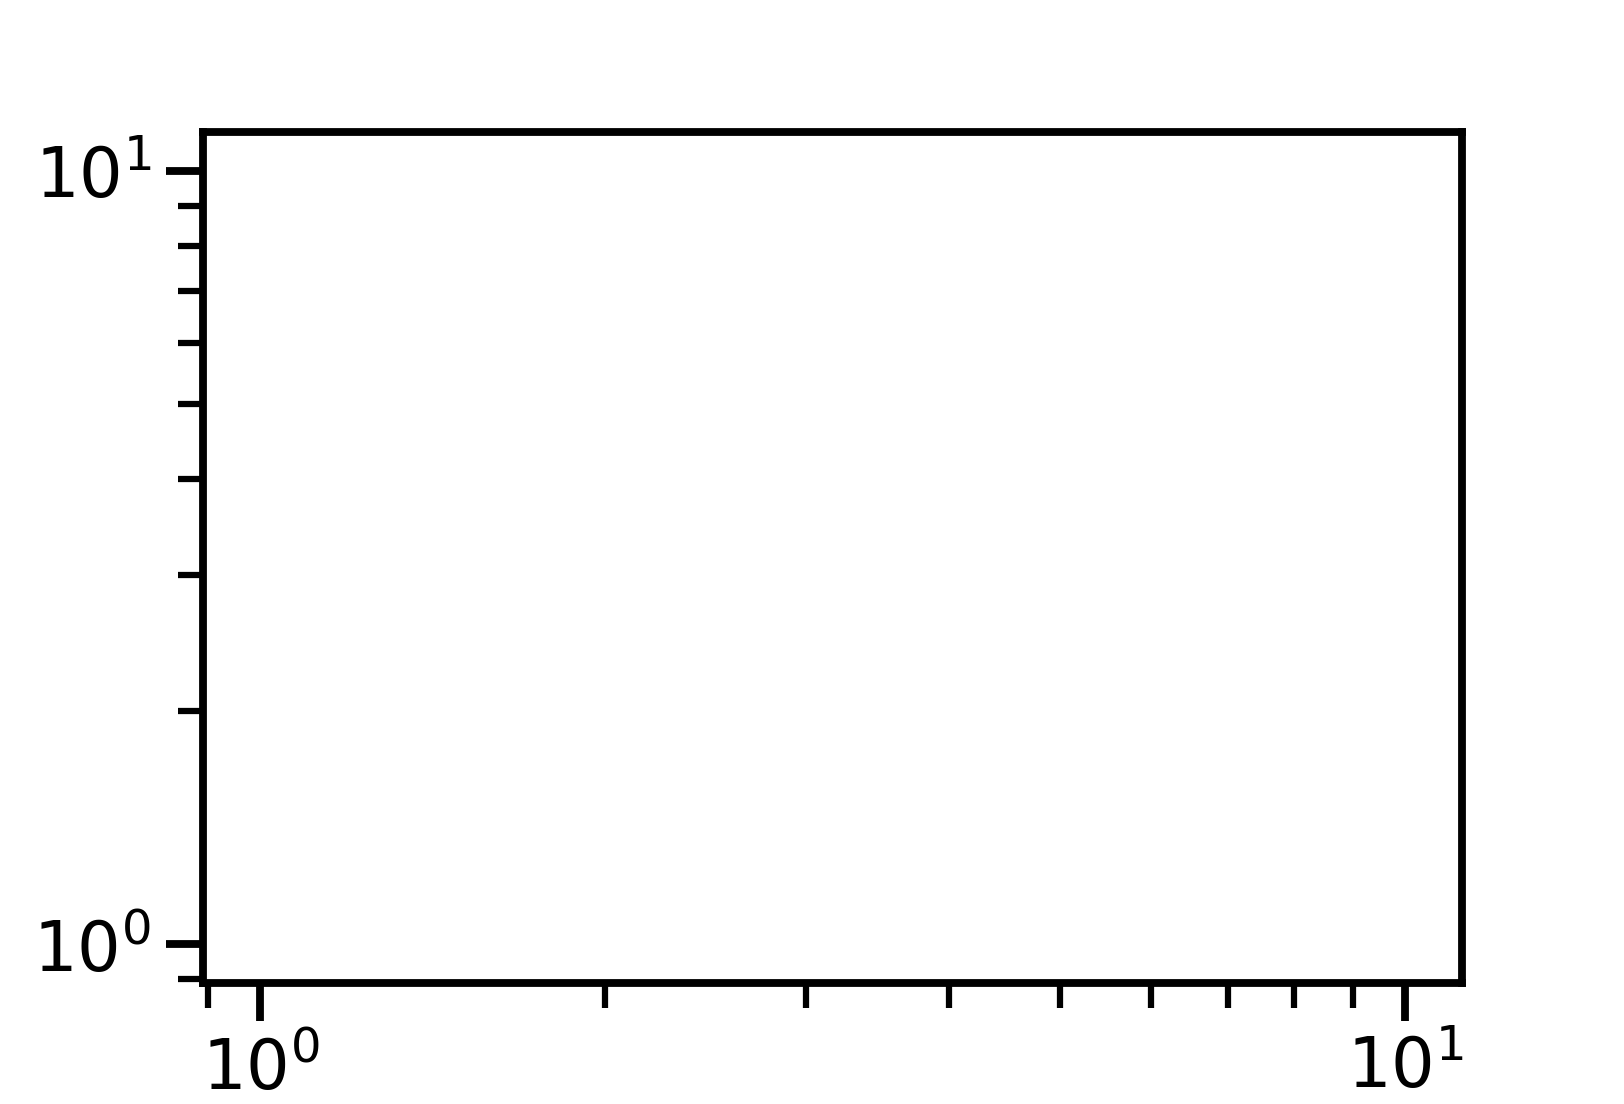

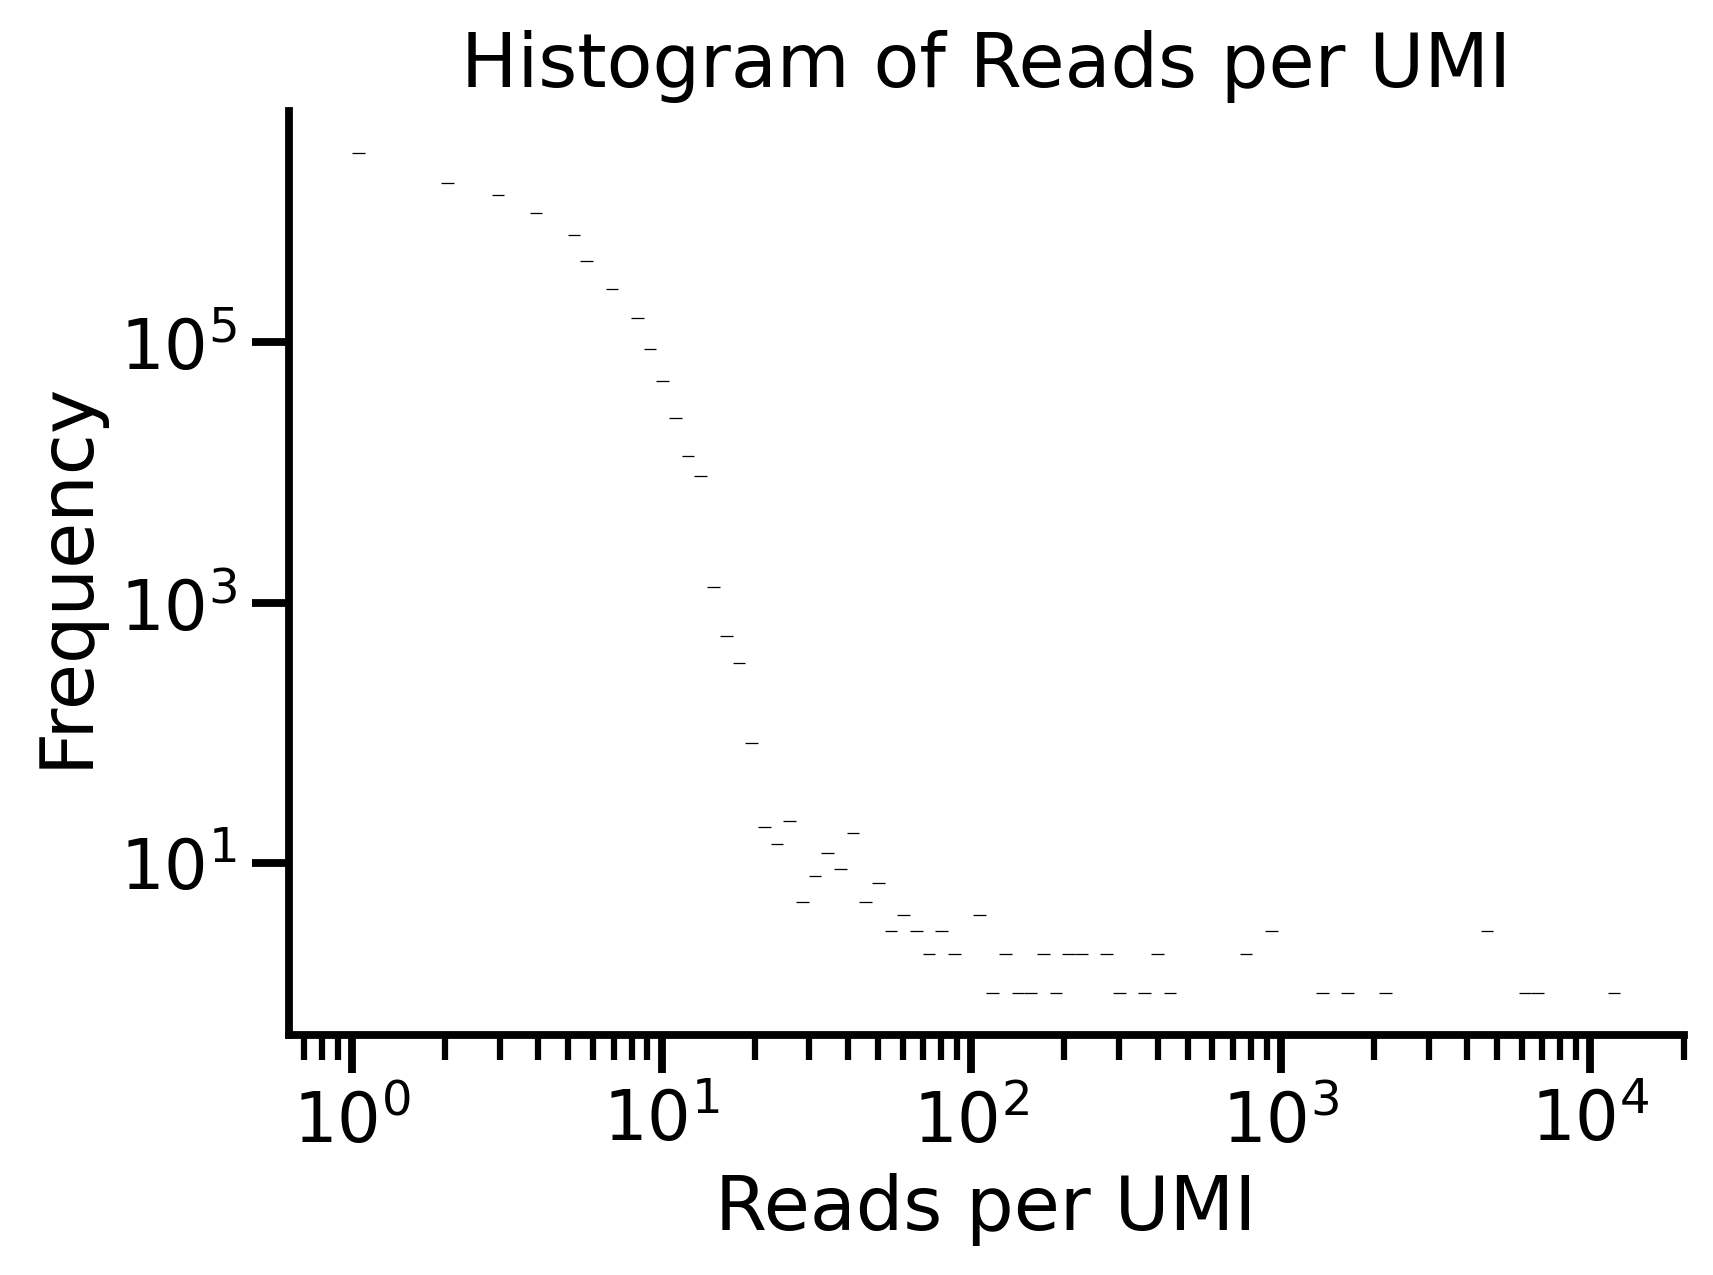

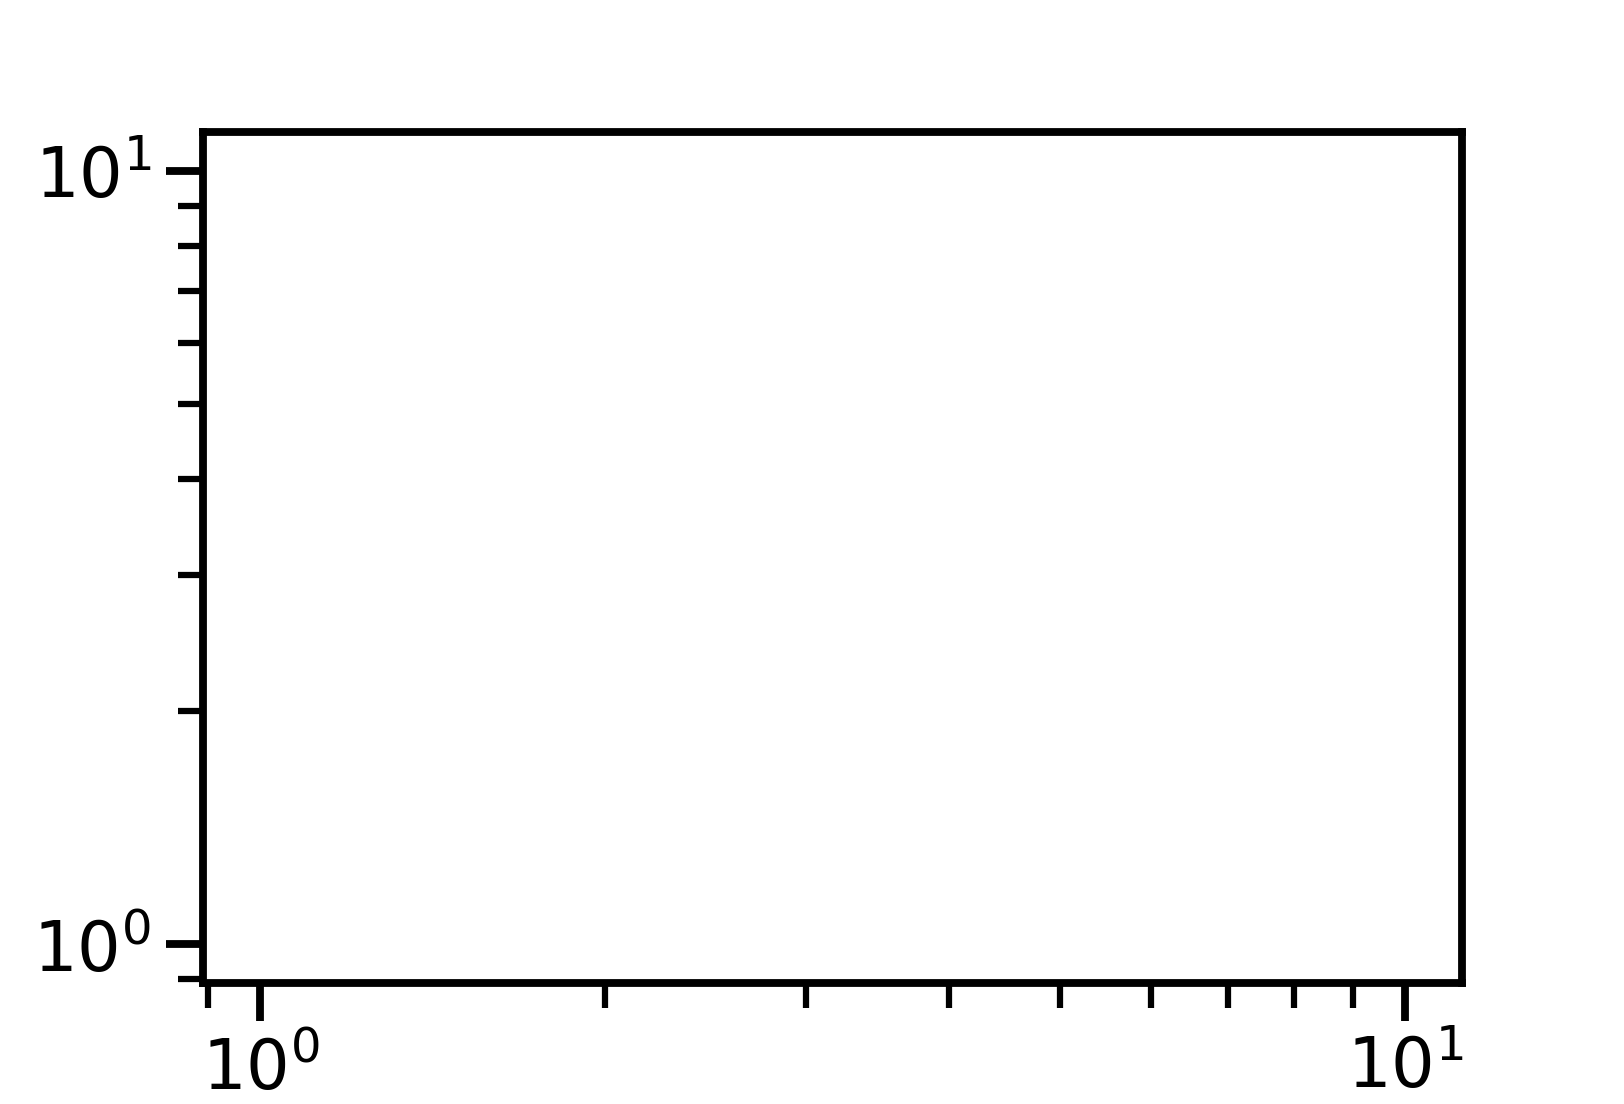

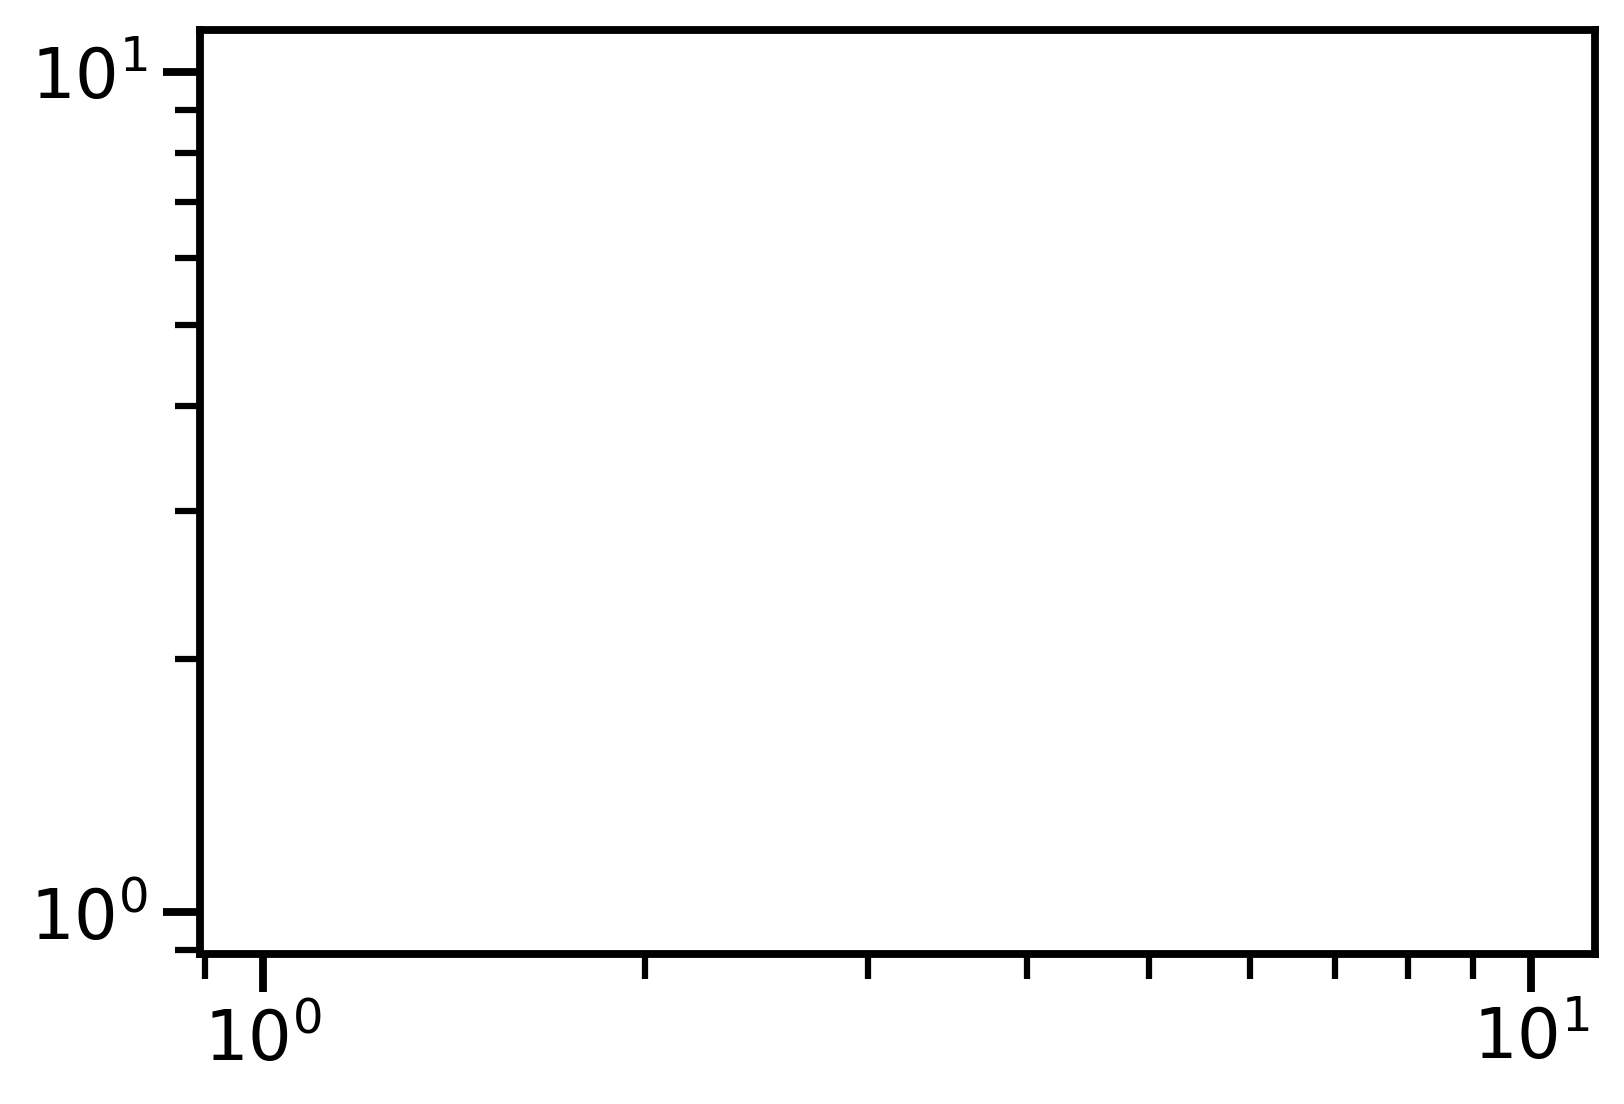

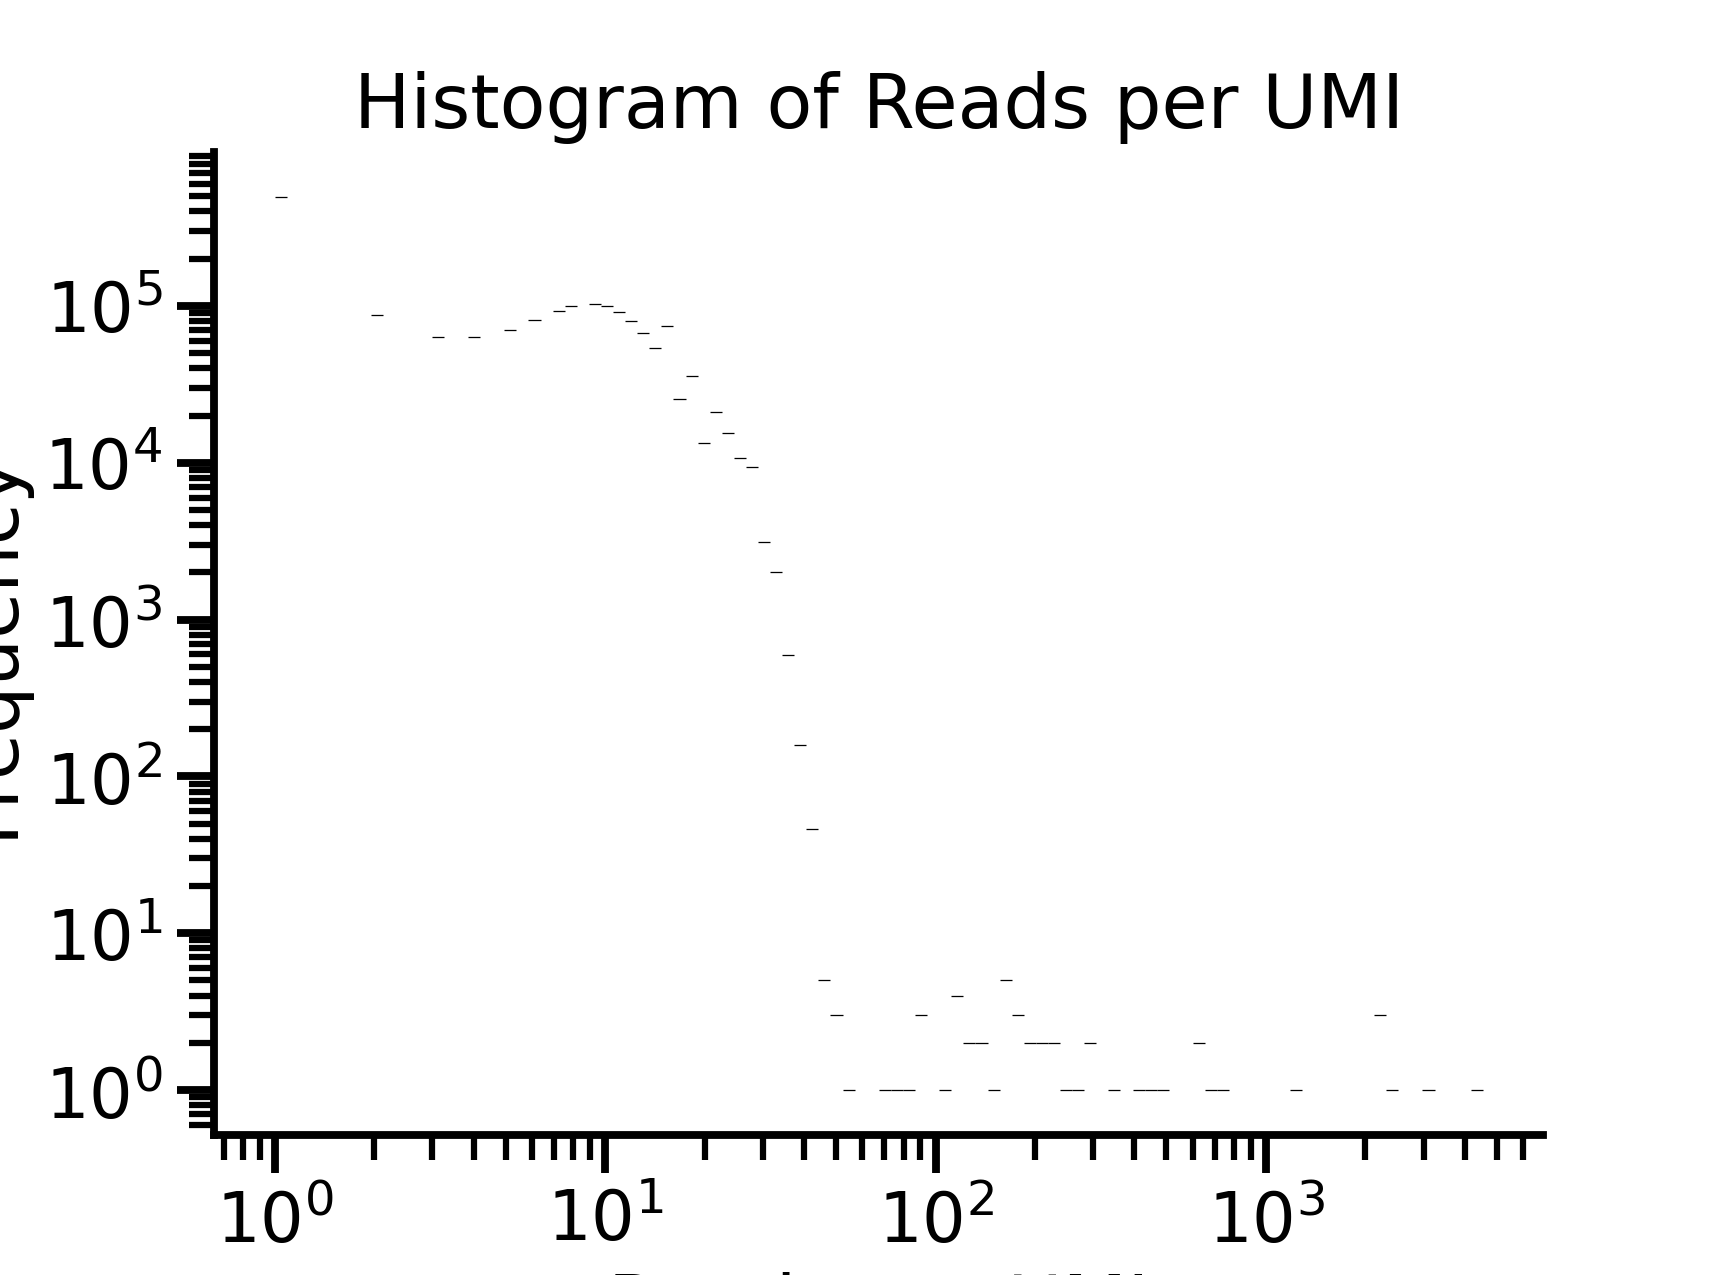

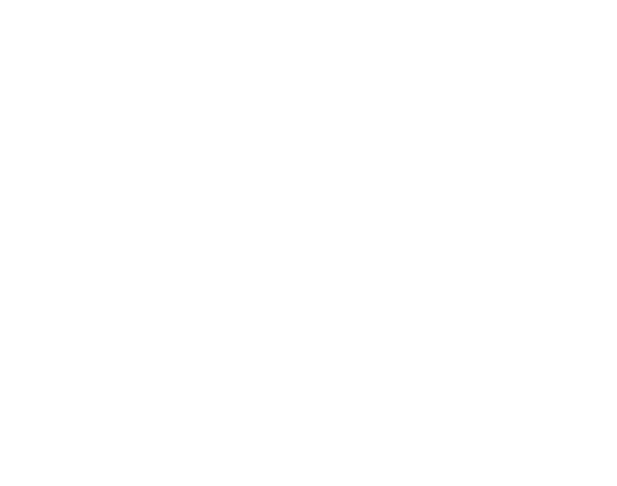

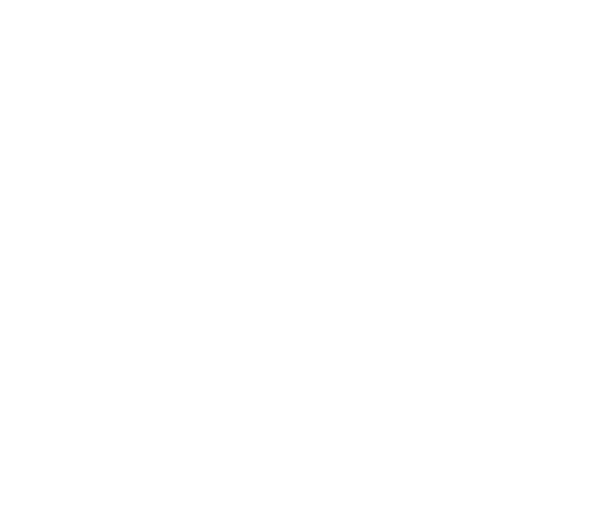

<Figure size 1800x1200 with 0 Axes>

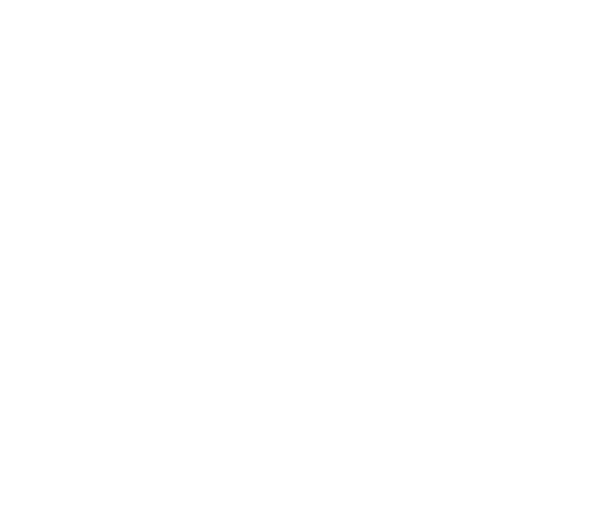

<Figure size 1800x1200 with 0 Axes>

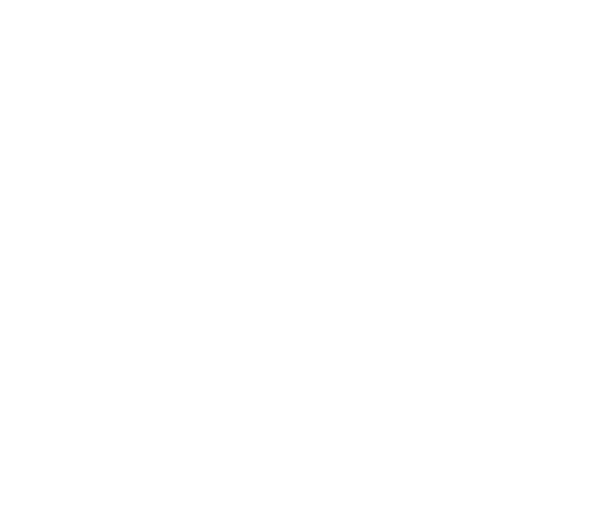

<Figure size 1800x1200 with 0 Axes>

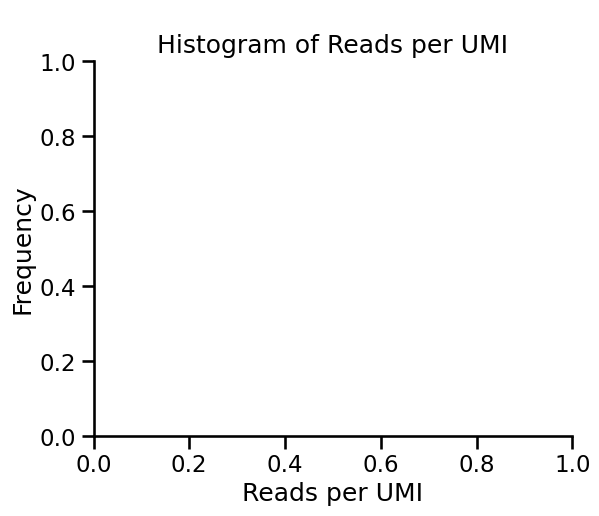

<Figure size 1800x1200 with 0 Axes>

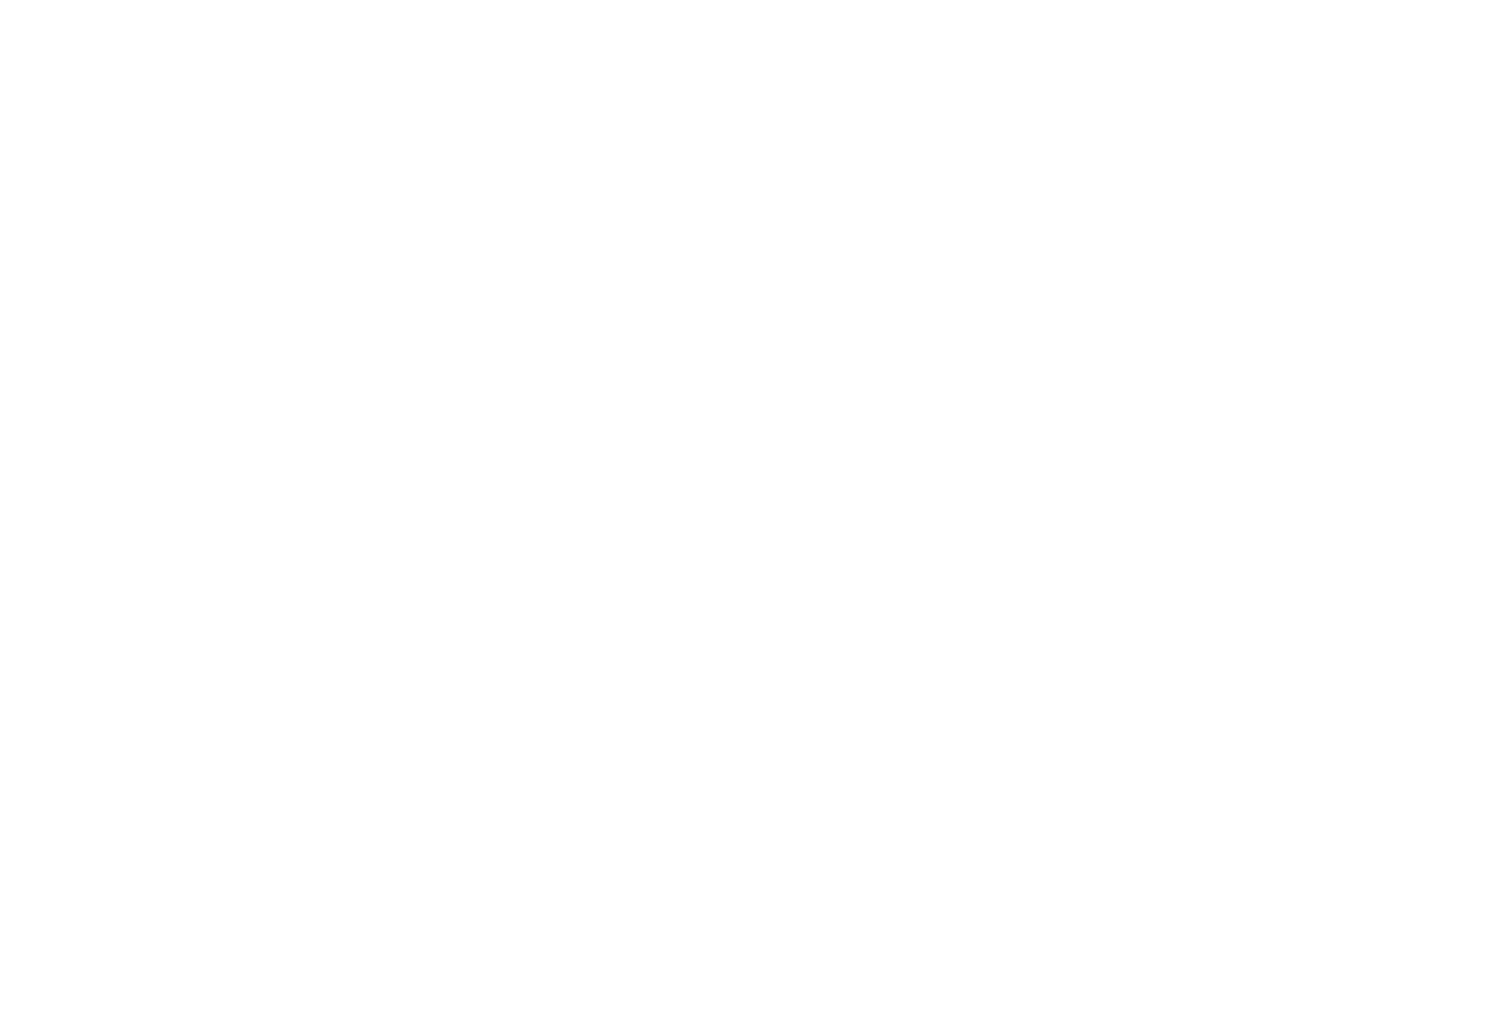

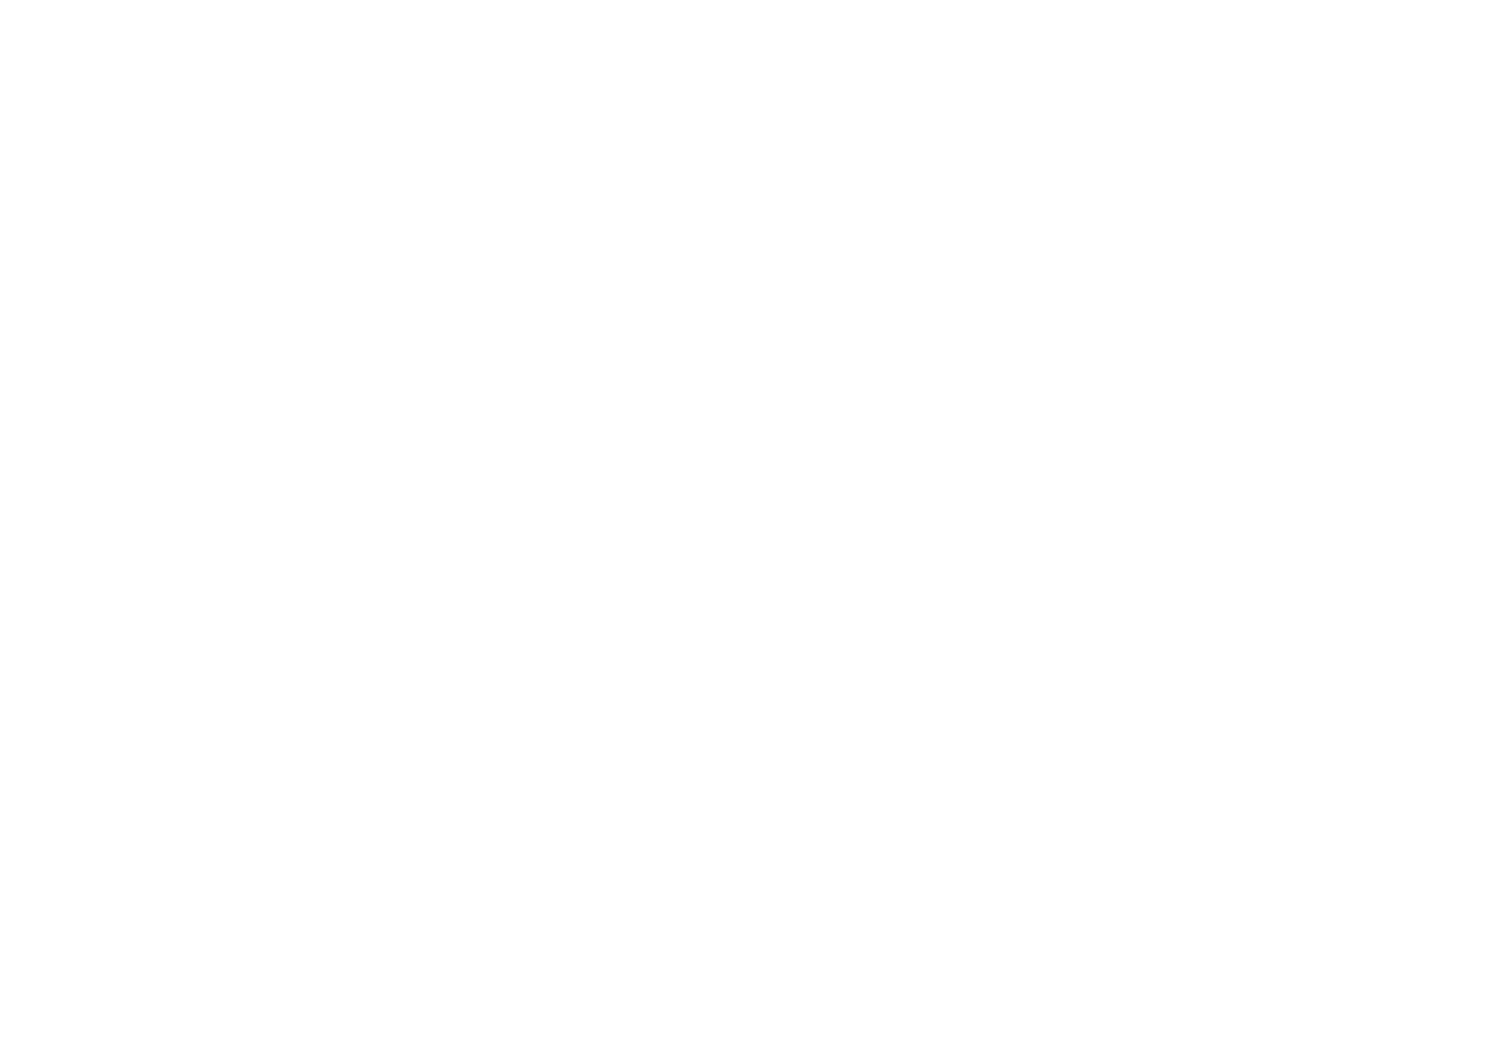

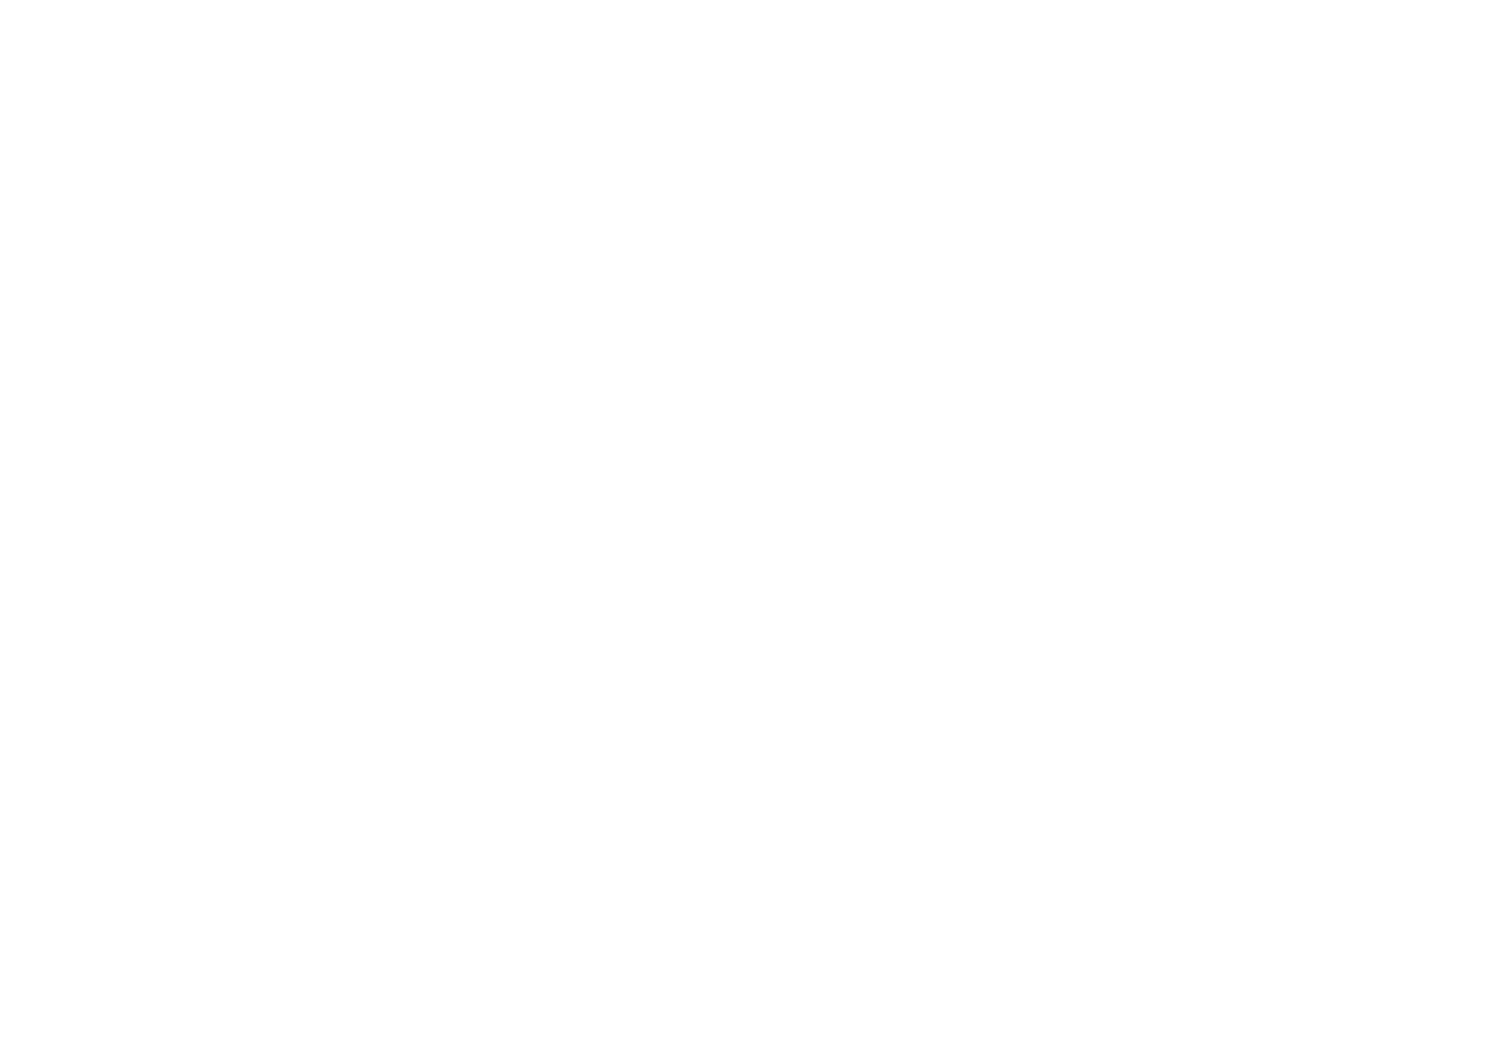

 39%|███▉      | 44/113 [02:12<04:19,  3.76s/it]

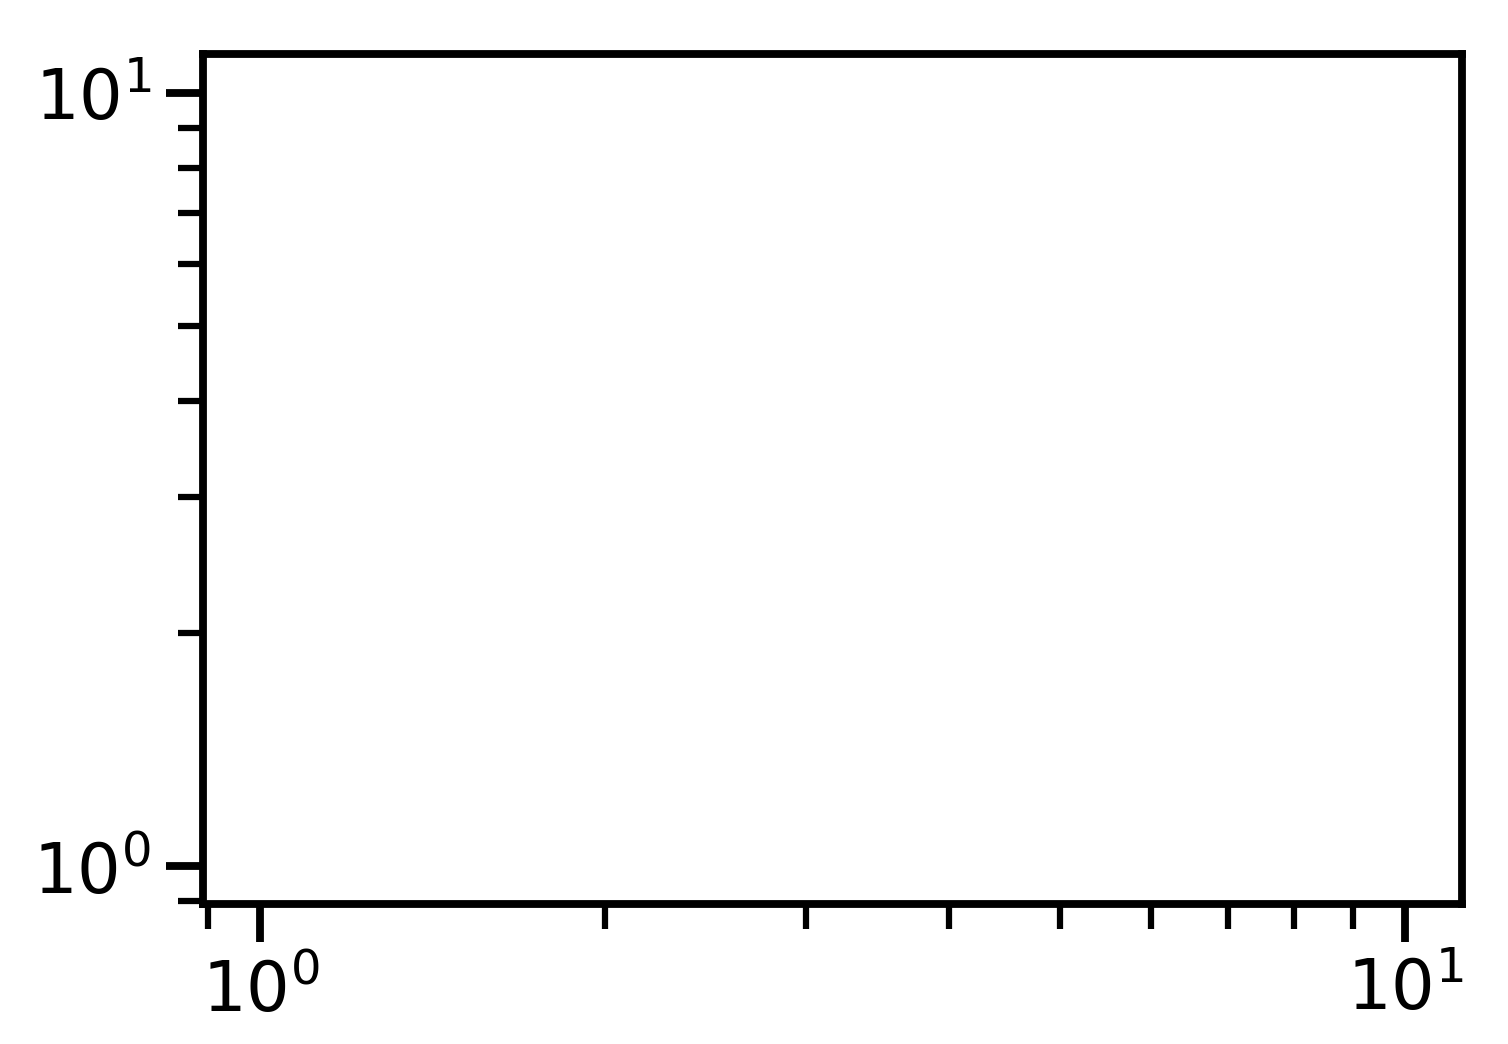

<Figure size 1800x1200 with 0 Axes>

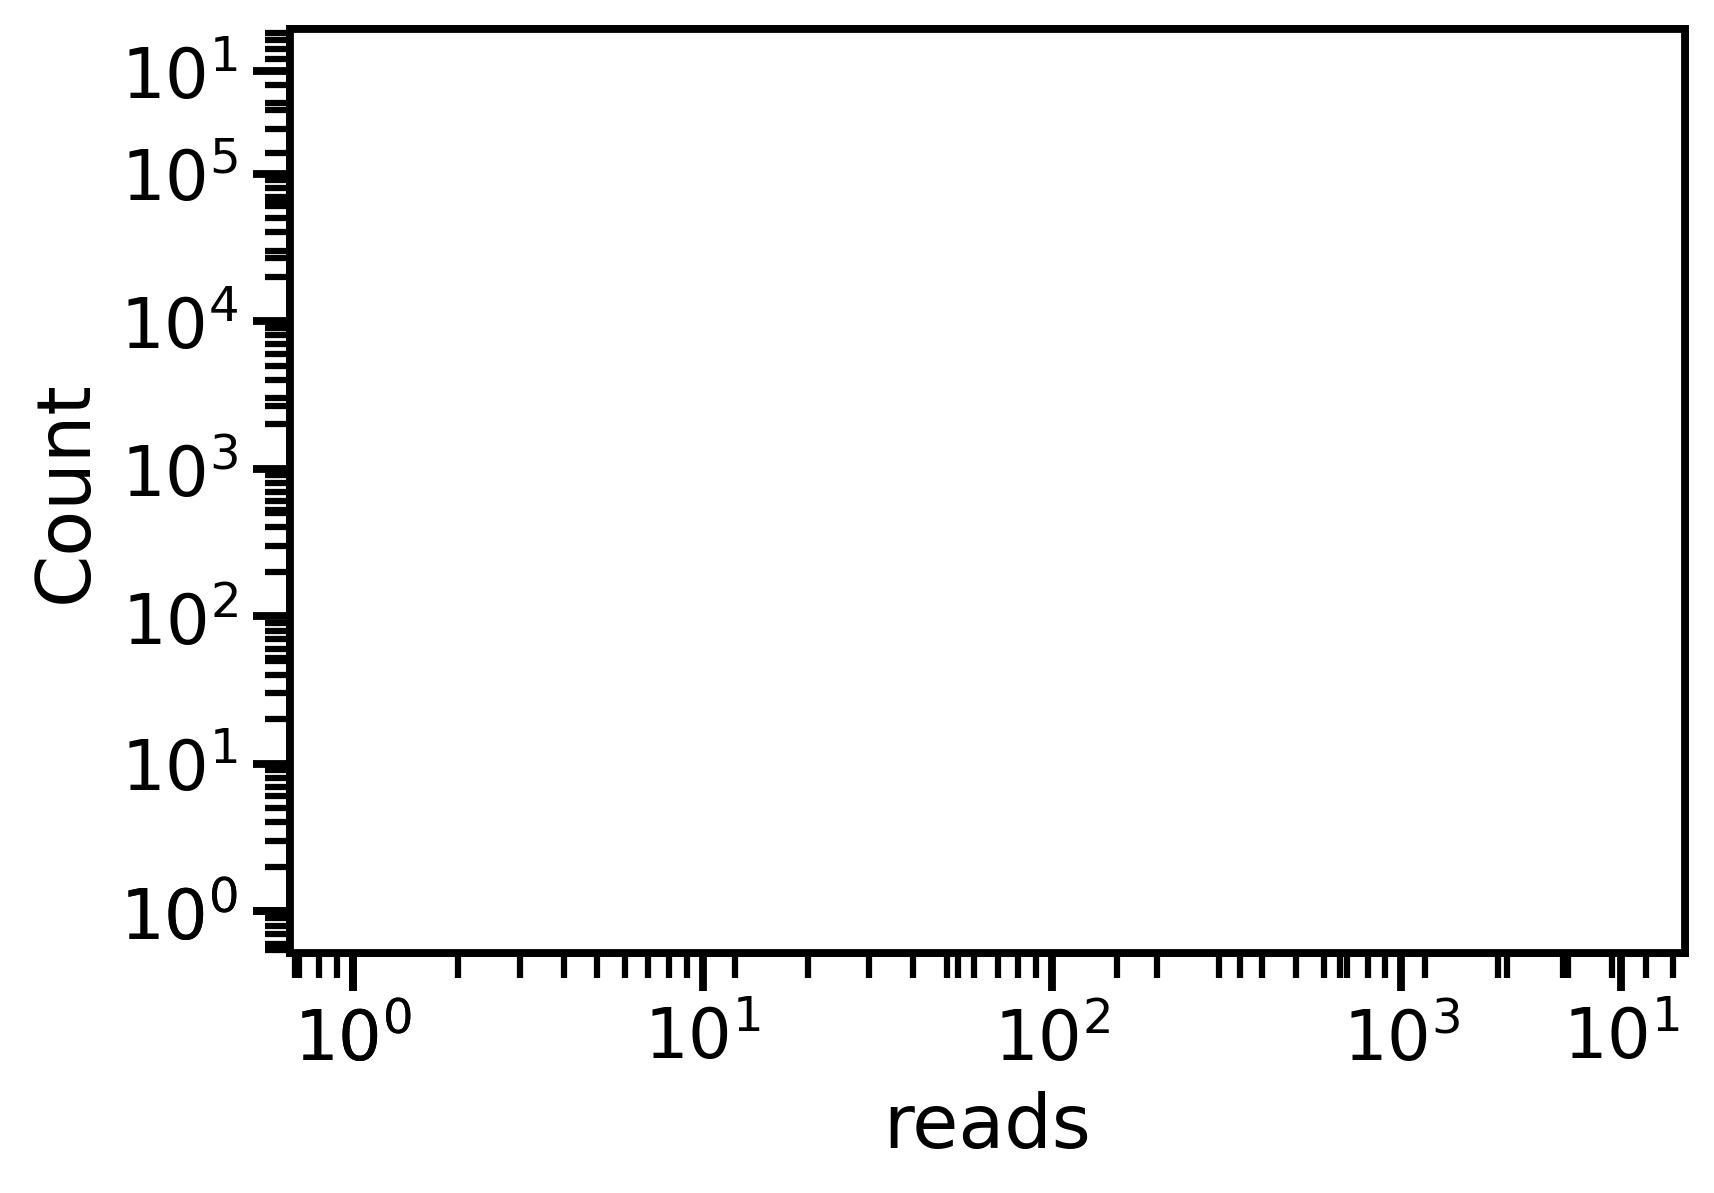

 57%|█████▋    | 64/113 [02:14<01:22,  1.69s/it]

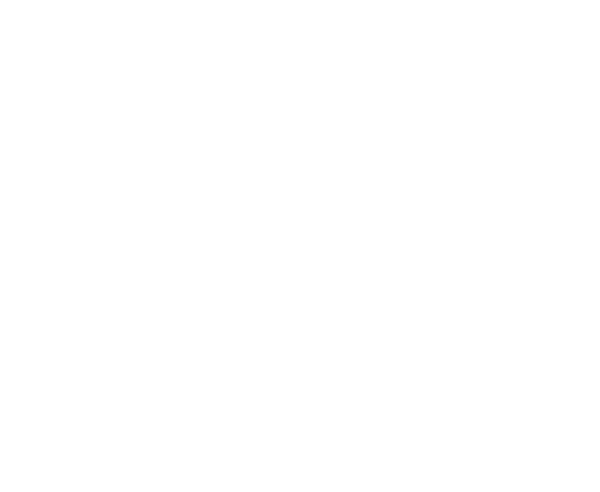

 58%|█████▊    | 65/113 [02:17<01:23,  1.74s/it]

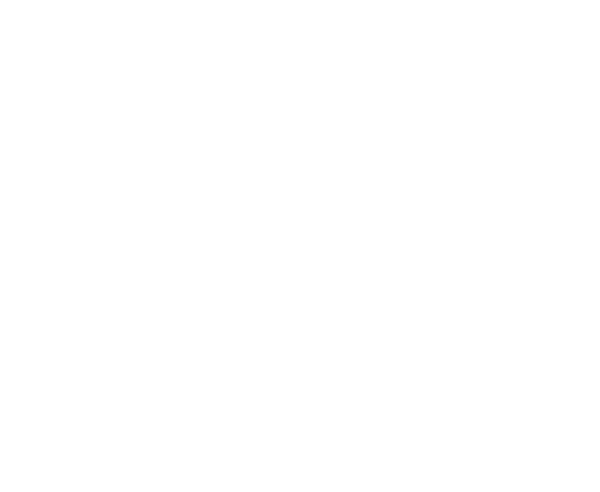

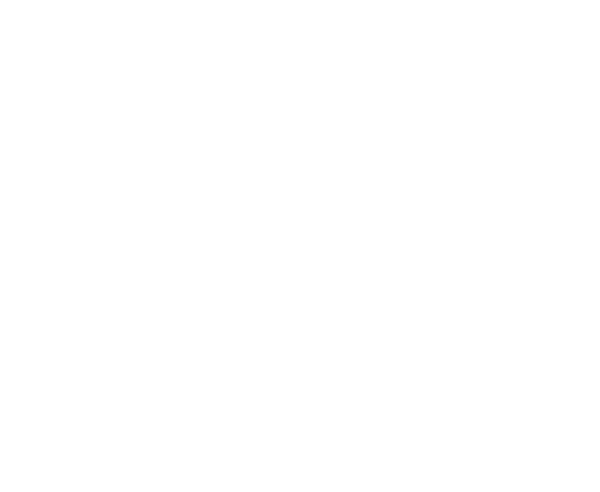

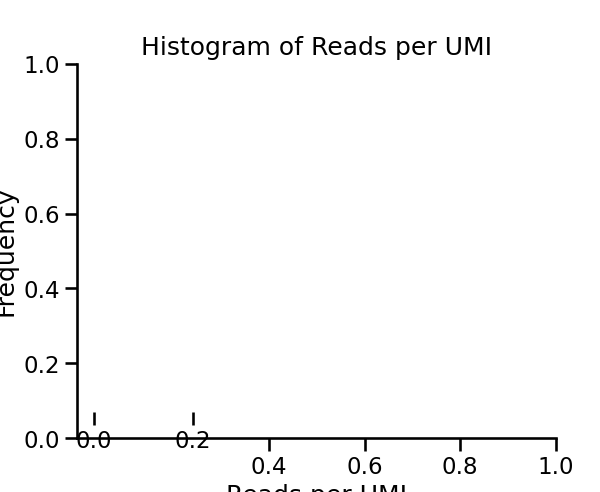

 63%|██████▎   | 71/113 [02:19<00:58,  1.40s/it]

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

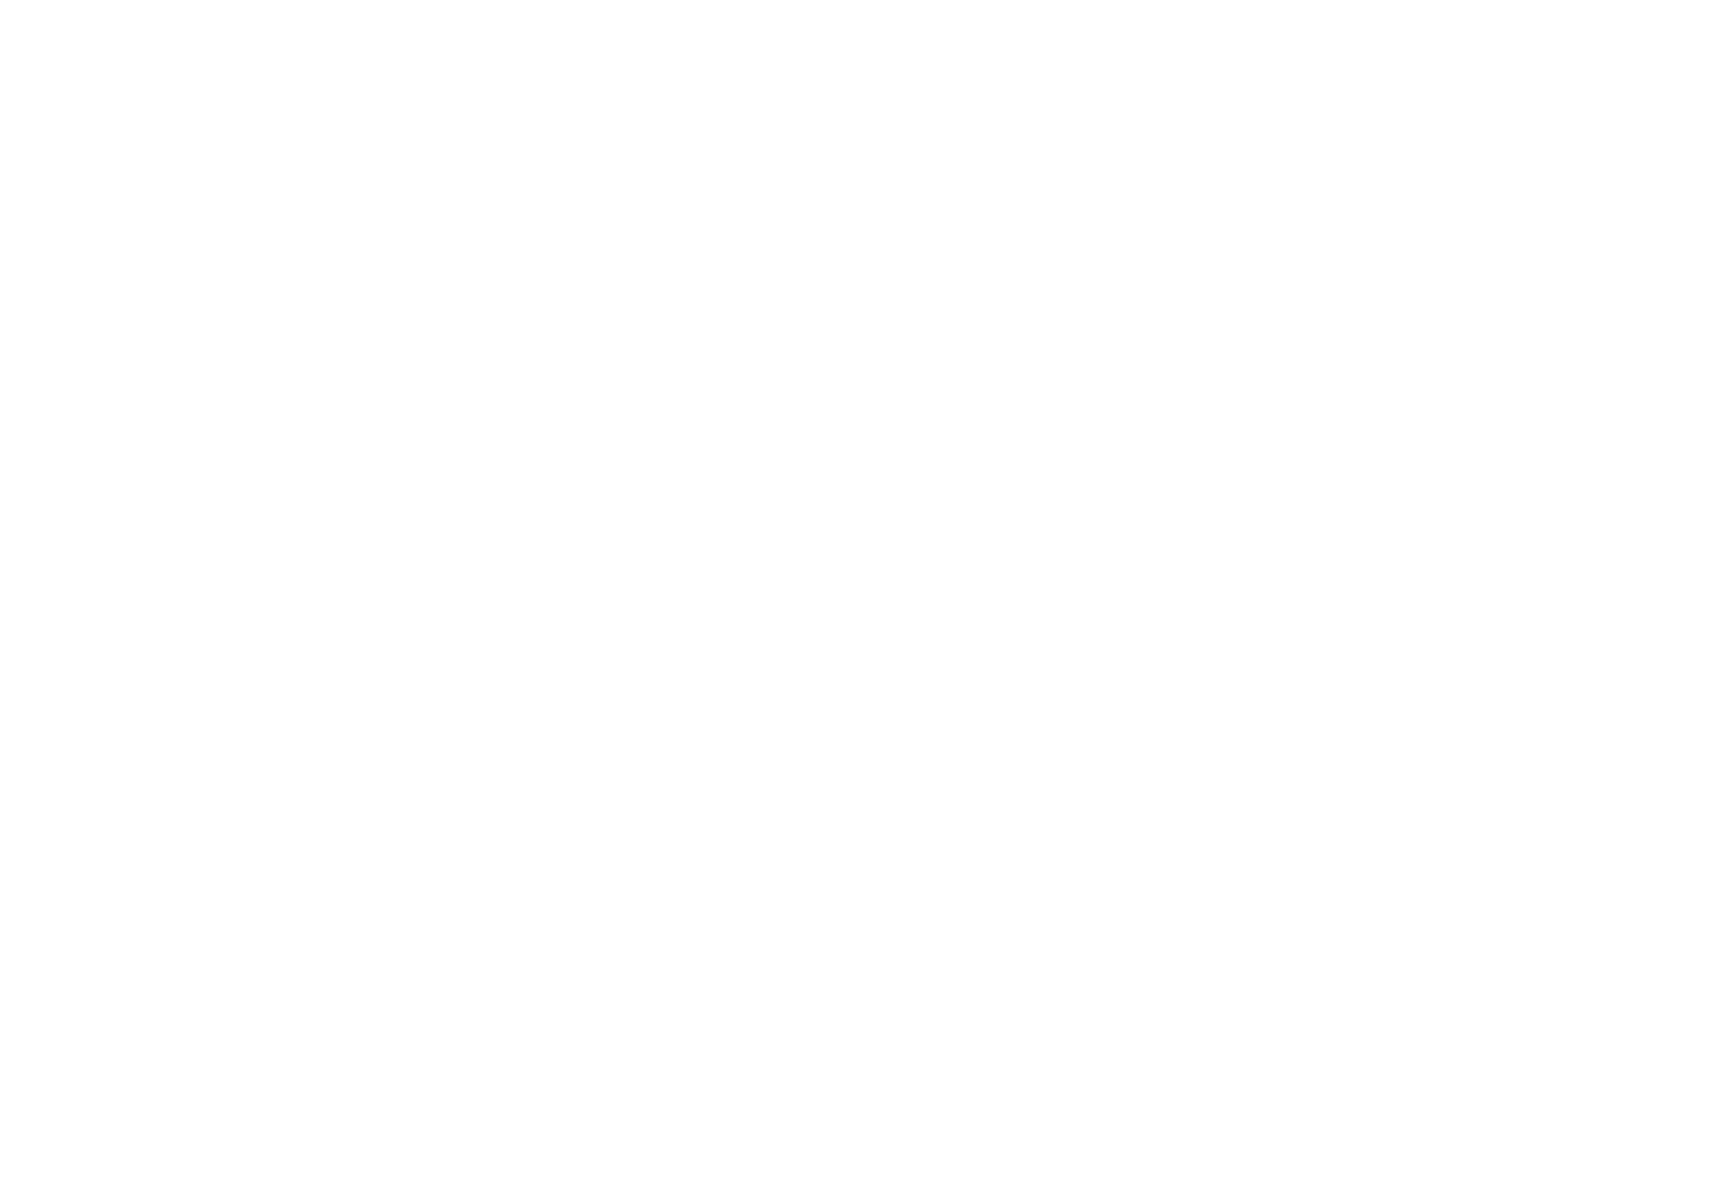

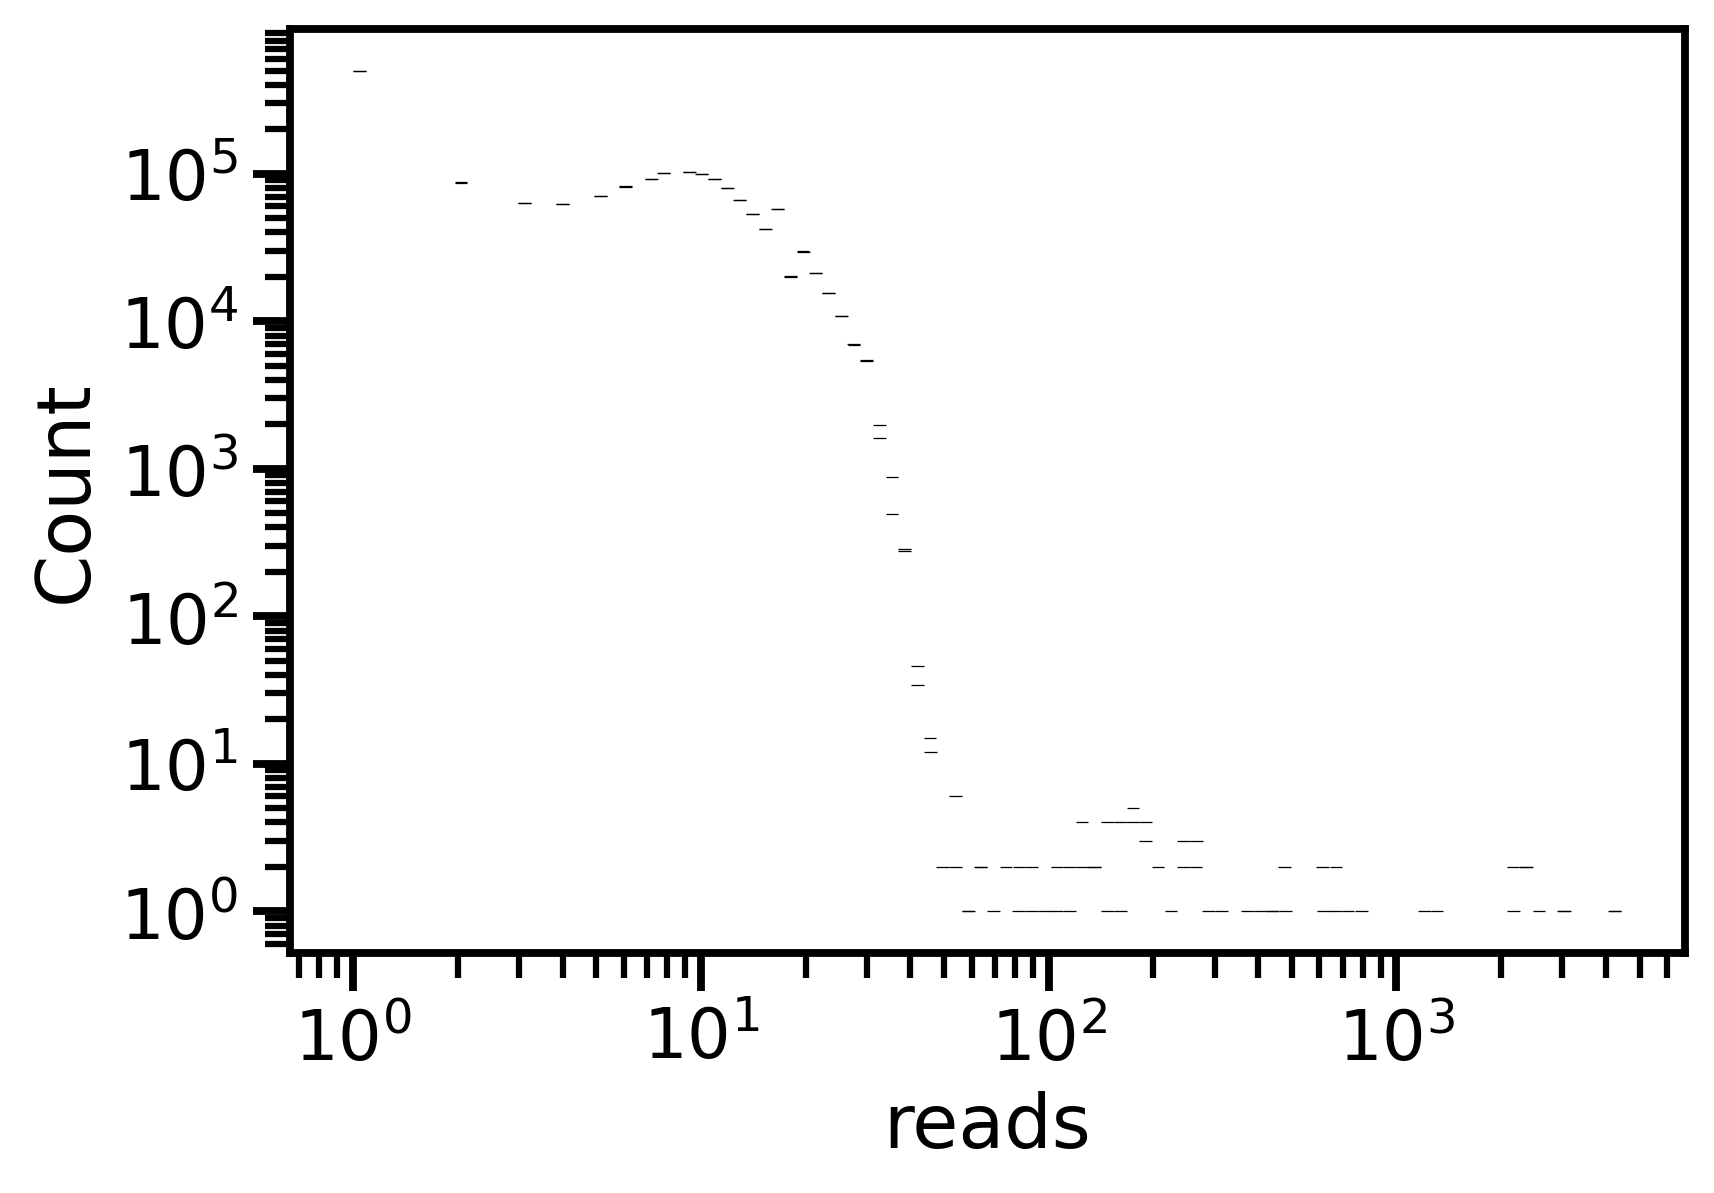

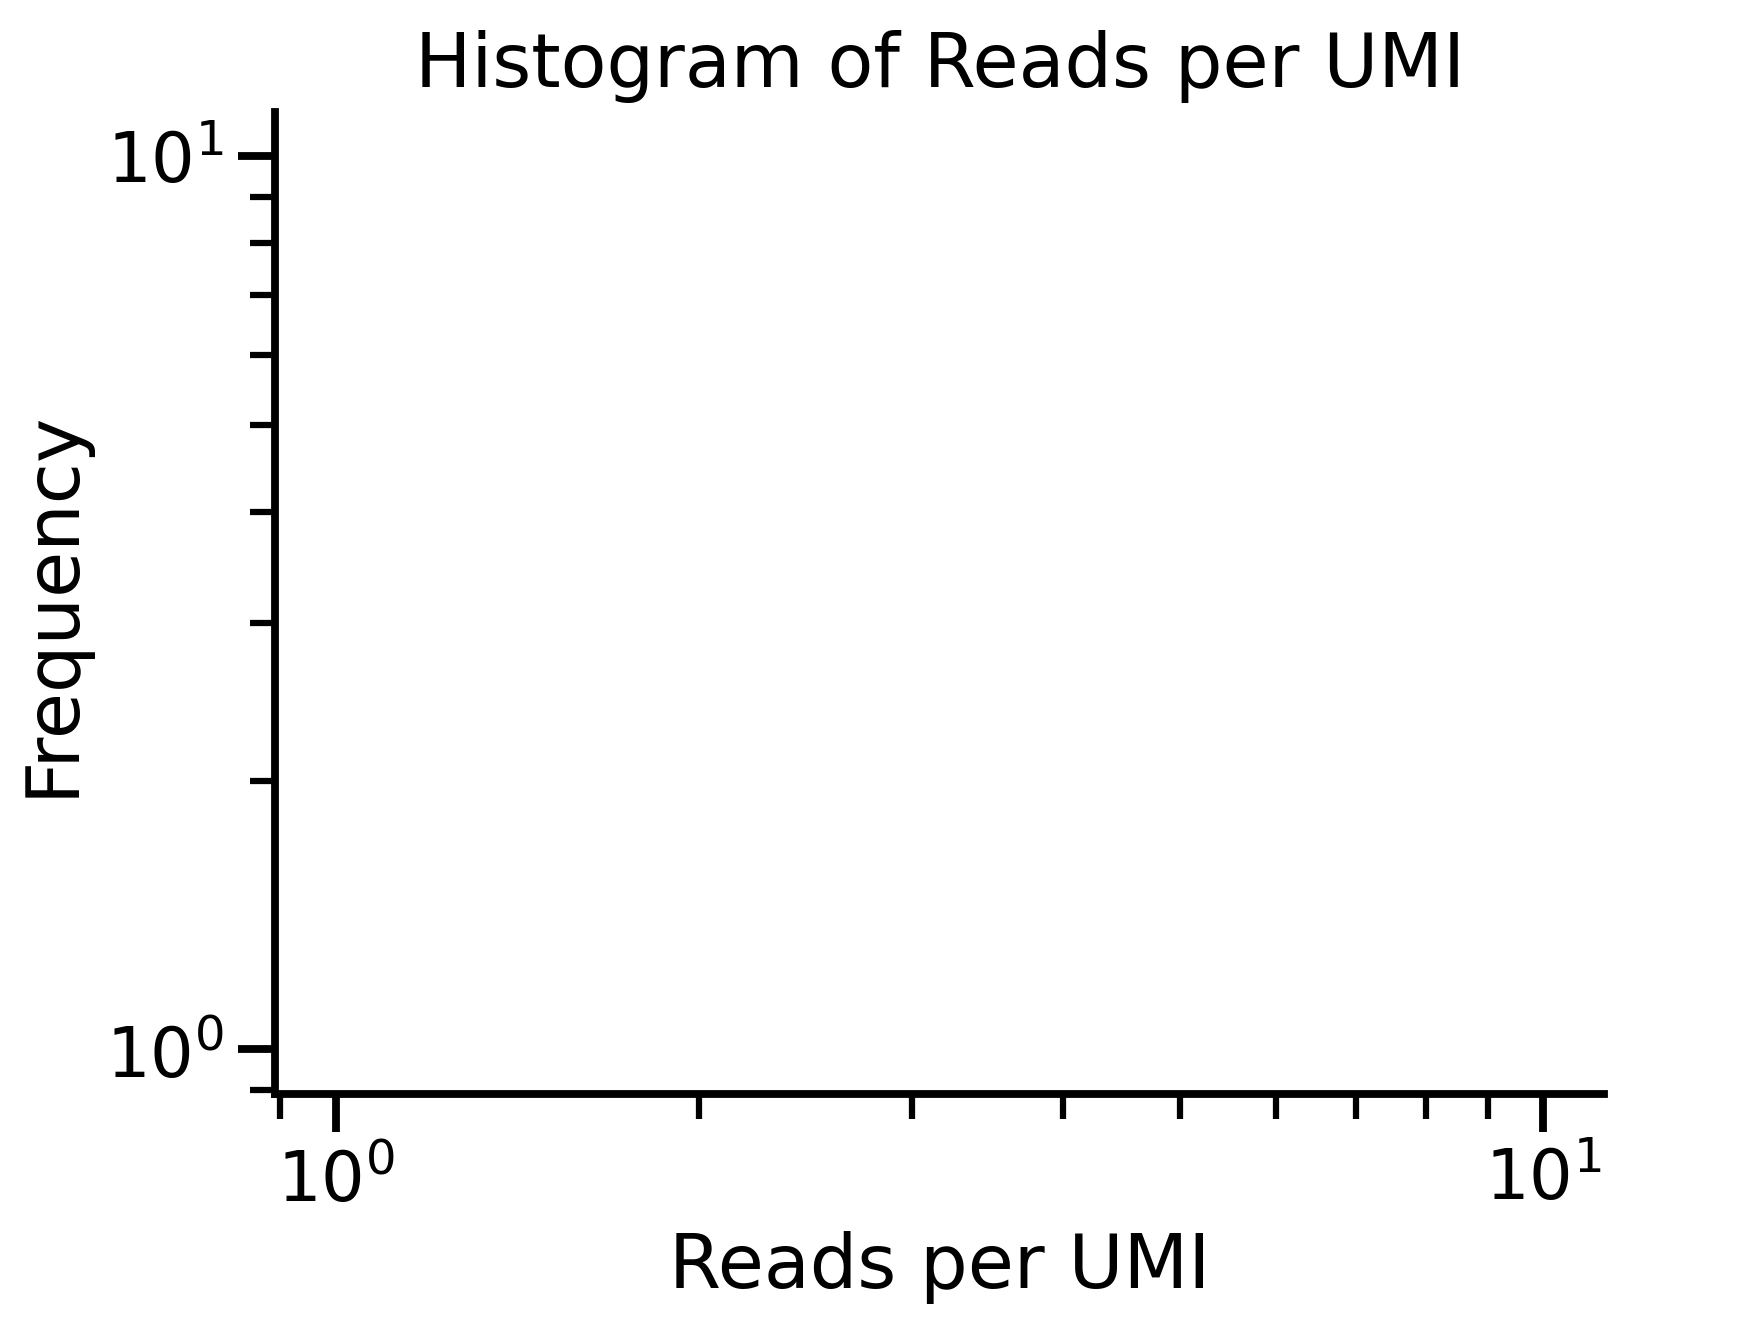

<Figure size 1800x1200 with 0 Axes>

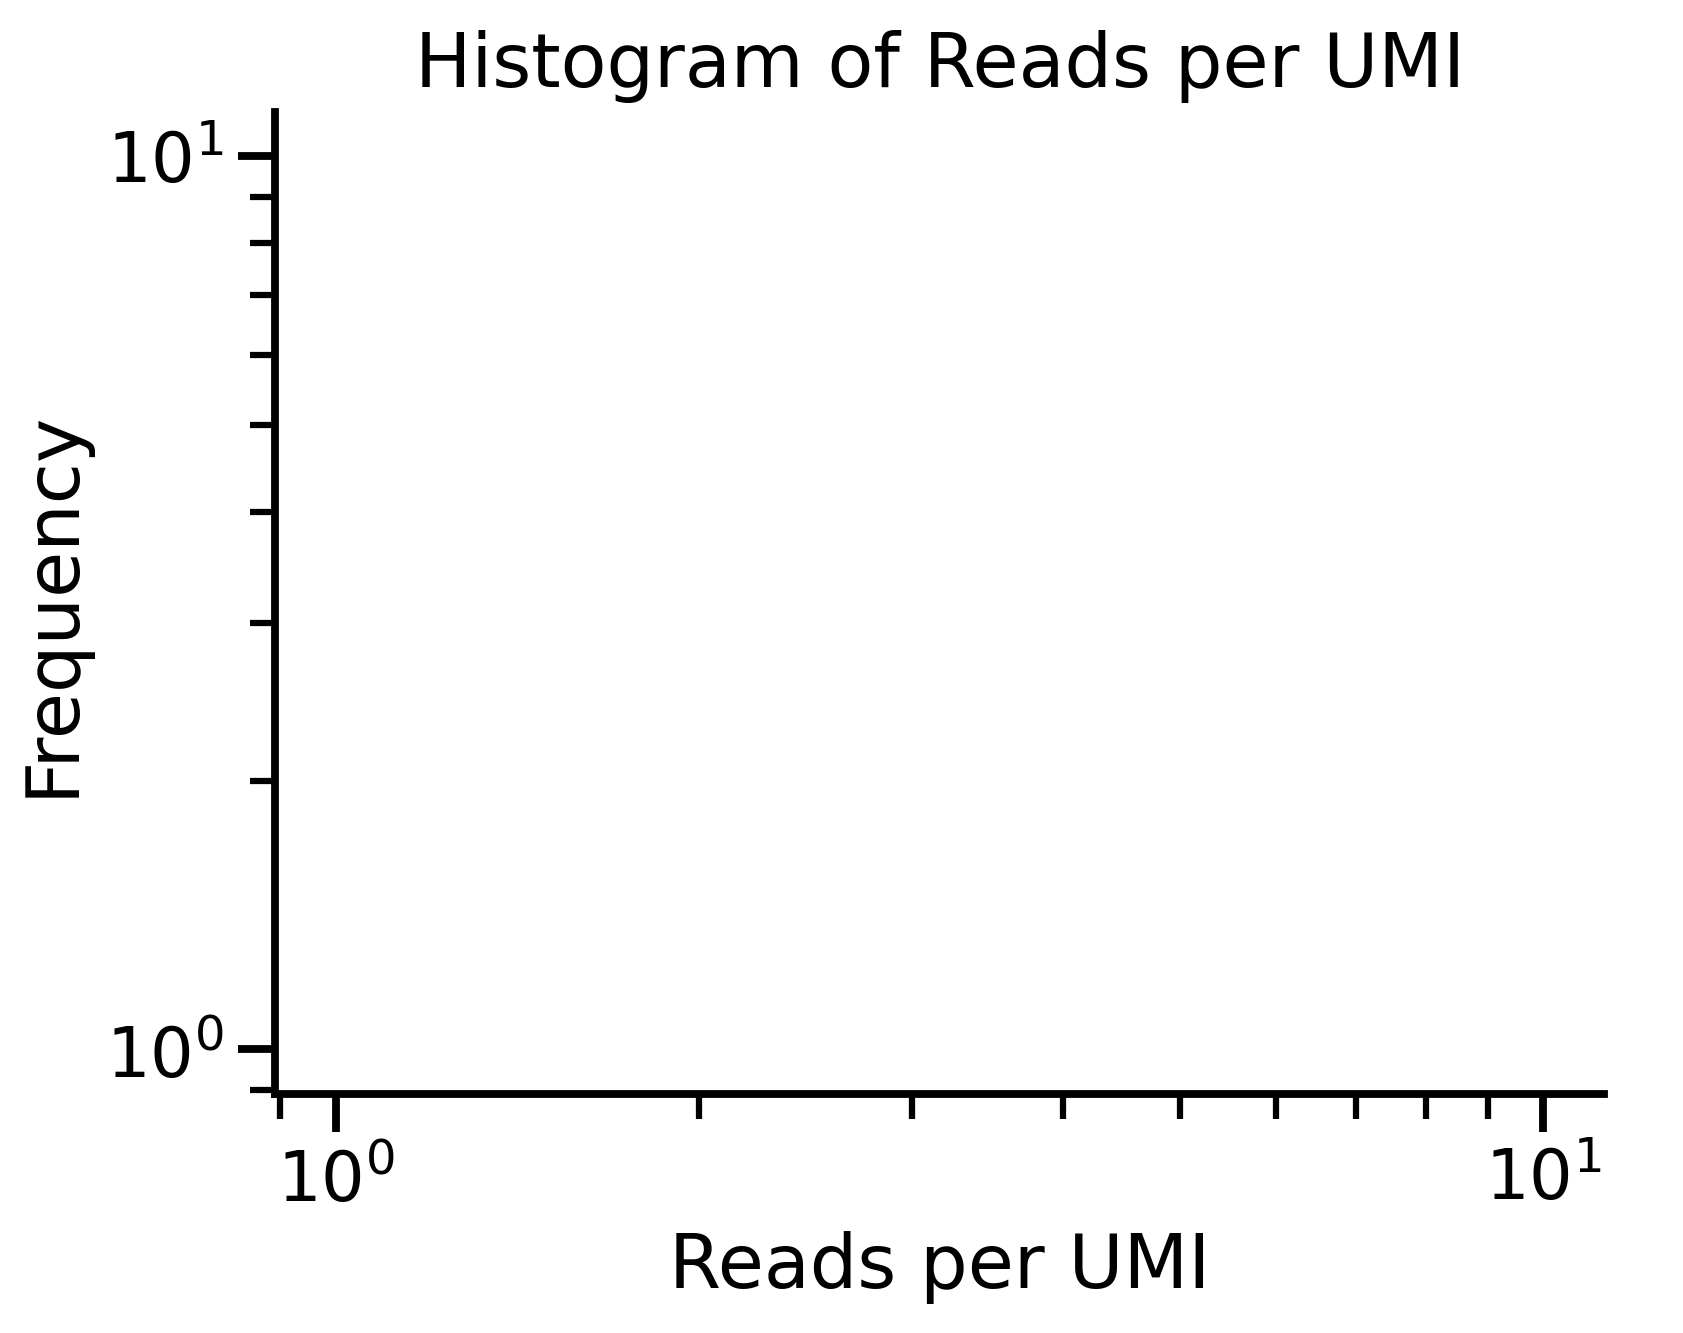

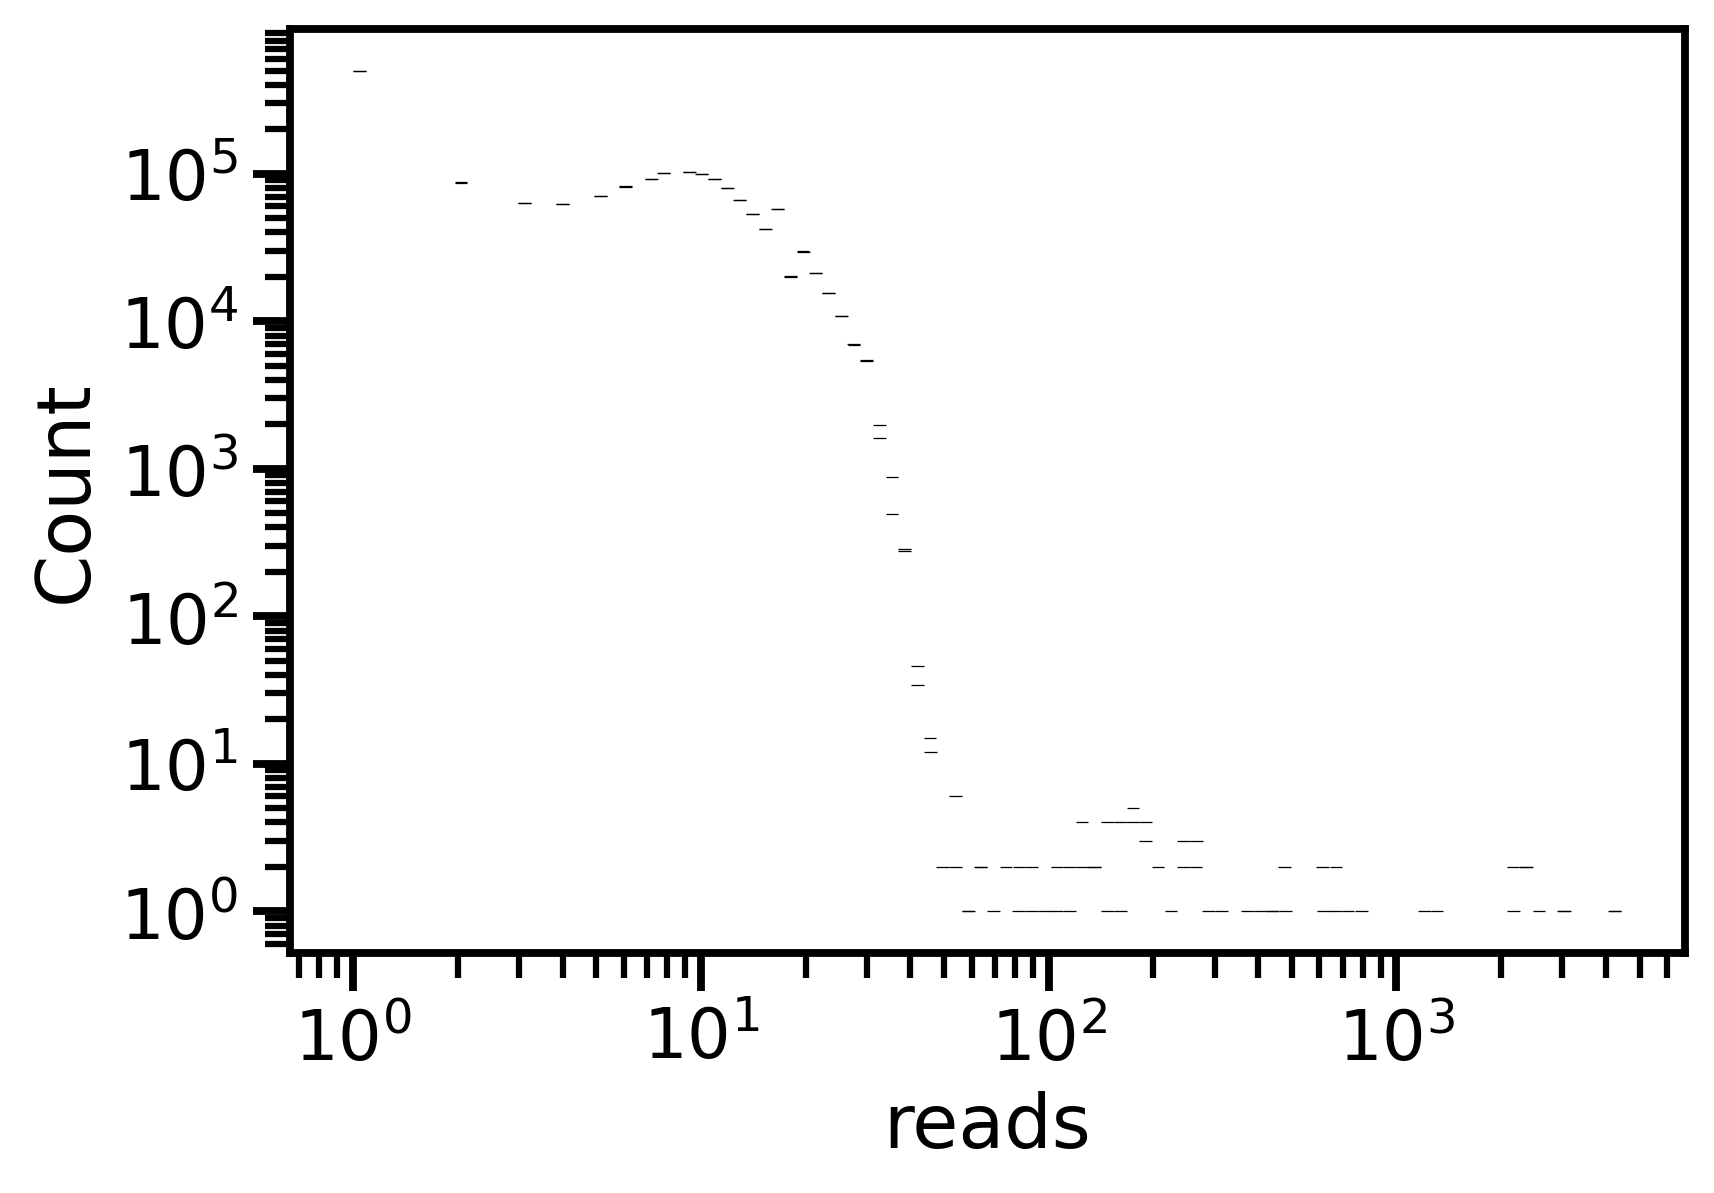

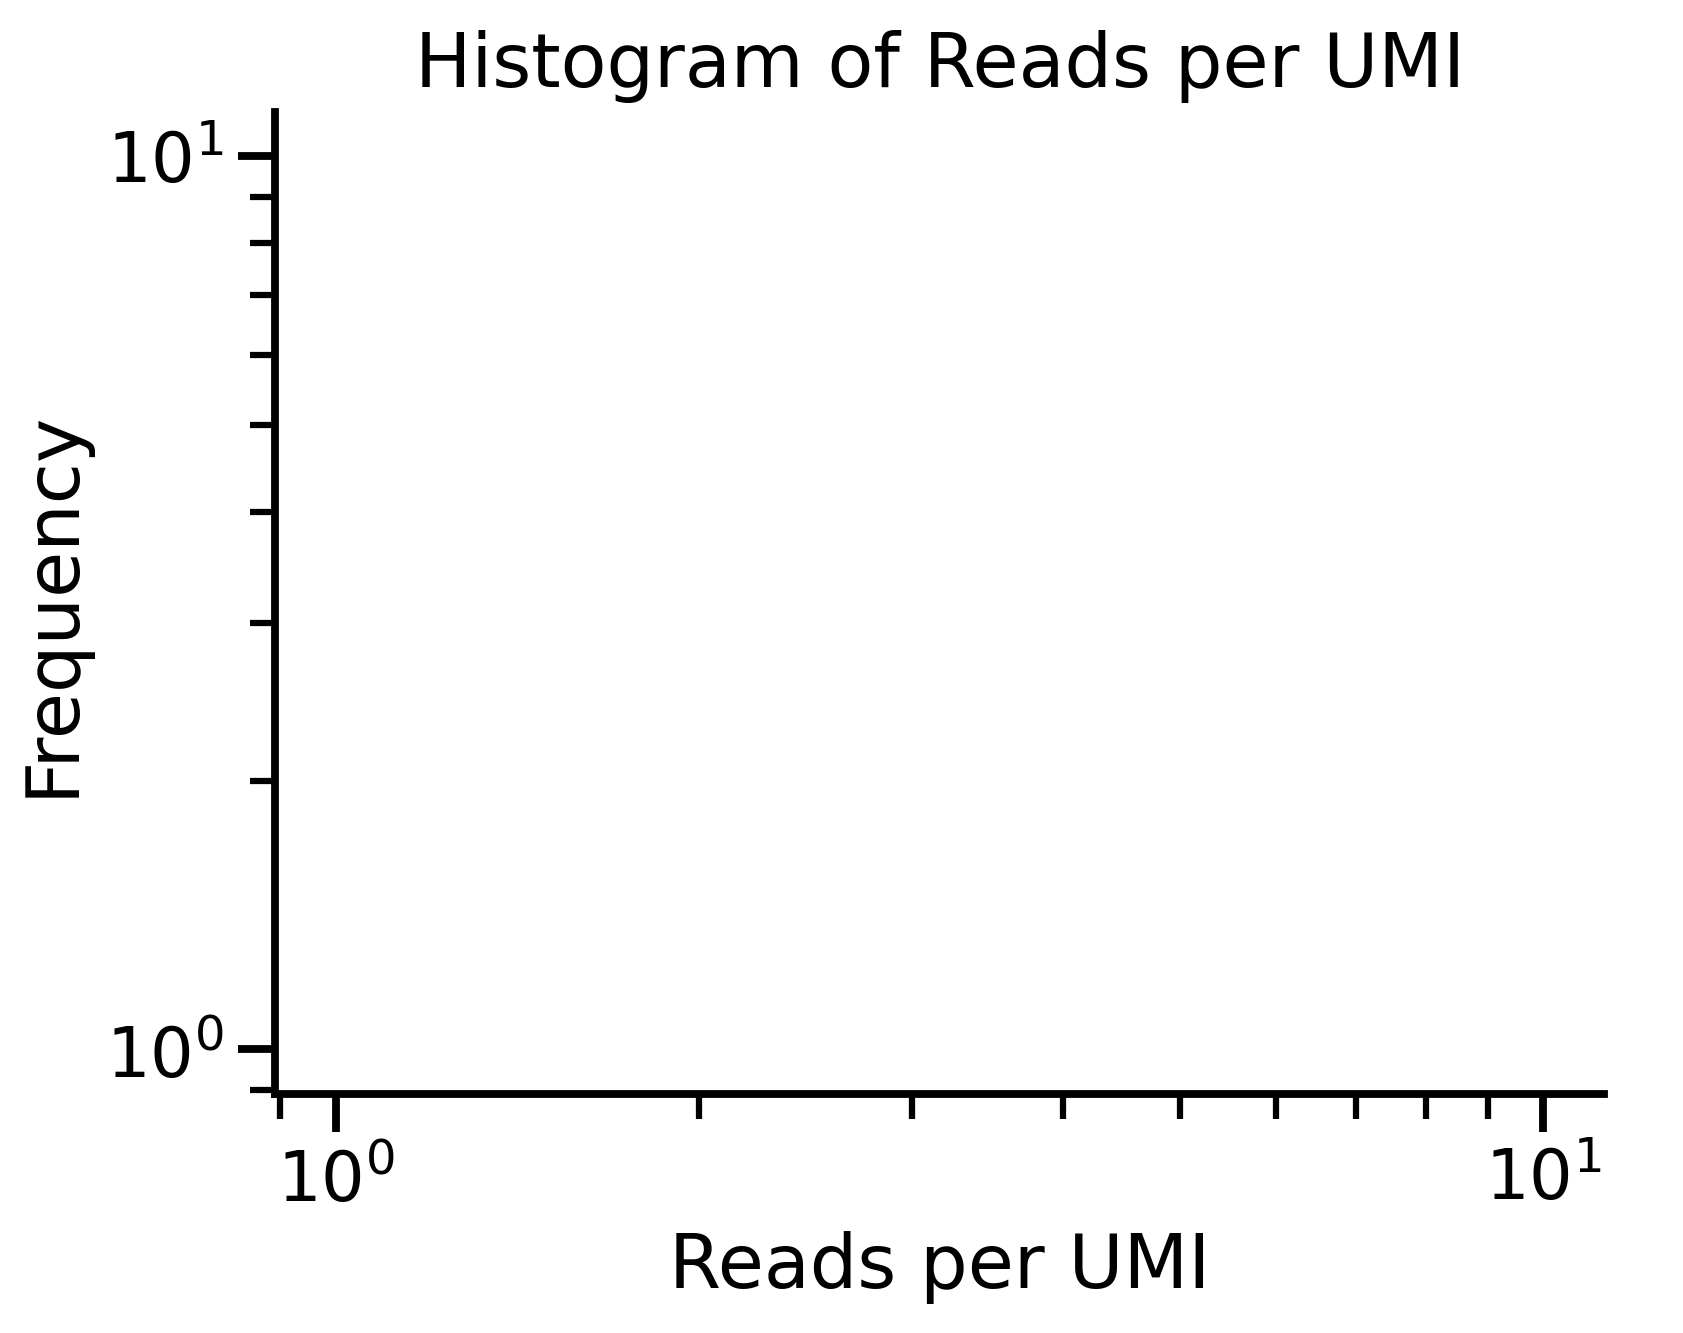

 82%|████████▏ | 93/113 [02:30<00:17,  1.11it/s]

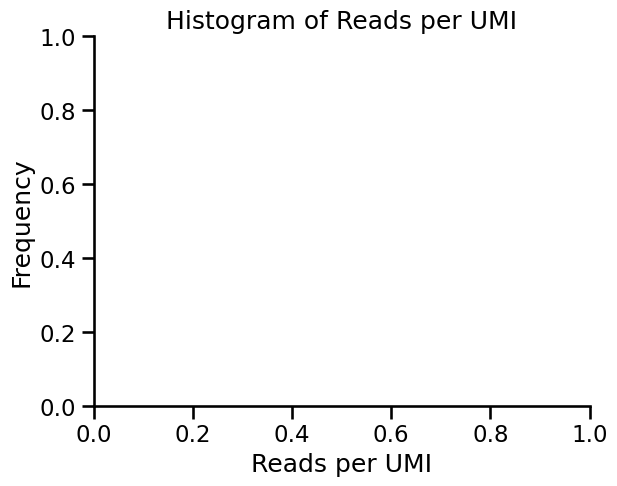

 84%|████████▍ | 95/113 [02:32<00:16,  1.12it/s]

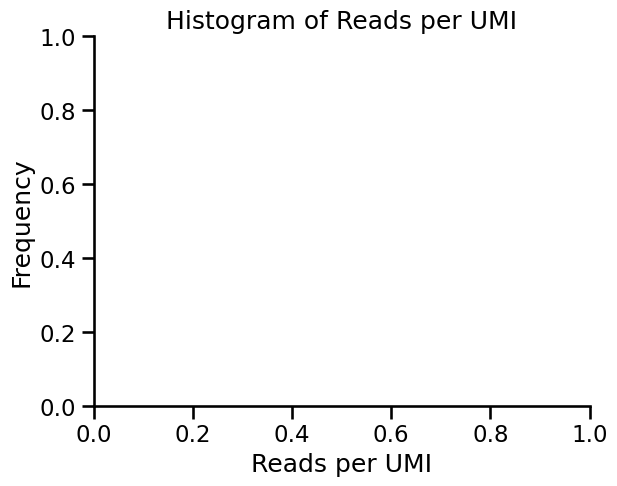

100%|██████████| 113/113 [02:33<00:00,  1.36s/it]


In [3]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import os
import tqdm
import seaborn as sns

import matplotlib.pyplot as plt

base_dir = "/Volumes/Expansion/GCN4_TREBL/downsampling/"

def process_folder(folder):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Find the reads_per_umi file
        reads_per_umi_path = next(
            (os.path.join(folder_path, file) for file in os.listdir(folder_path) if "reads_per_umi" in file and "20_chunks" in file),
            None
        )
        if reads_per_umi_path is None:
            return
        
        # Read the reads_per_umi file
        reads_per_umi_df = pd.read_csv(reads_per_umi_path, sep="\t")
        
        # Plot the histogram
        plt.figure(figsize=(6, 4), dpi=300)
        sns.set_context('talk')
        sns.histplot(reads_per_umi_df['reads'], kde=False, log_scale=(True, True), bins = 100)
        plt.title("Histogram of Reads per UMI")
        plt.xlabel("Reads per UMI")
        plt.ylabel("Frequency")
        plt.grid(False)
        sns.despine()
        
        # Save the histogram in the folder
        hist_path = os.path.join(folder_path, "reads_per_umi_histogram.png")
        plt.savefig(hist_path, bbox_inches='tight')
        plt.show()

# Get the list of folders
folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

# Use ThreadPoolExecutor to parallelize the processing
with ThreadPoolExecutor() as executor:
    list(tqdm.tqdm(executor.map(process_folder, folders), total=len(folders)))